# Trabajo Fin de Máster
## HateSpeech Detection
### Autor: Óscar Toimil Plaza
#### Tutores: Marcos Fernández Pichel y Mario Ezra Aragón Saenzpardo

-------------------------------------------

## Imports

In [123]:
import pandas as pd
from pysentimiento import create_analyzer #!pip install pysentimiento
from collections import Counter, defaultdict
from tqdm import tqdm
import matplotlib.pyplot as plt

## Variables globales

In [124]:
DATASETS_NAME = {
    'IBEREVAL_MISOGYNY_2018_TRAIN':'../data/ibereval_misogyny2018_es_train.csv',
    'IBEREVAL_MISOGYNY_2018_TEST':'../data/ibereval_misogyny2018_es_test.csv',
}
DATASETS_DELIMITERS = {
    'IBEREVAL_MISOGYNY_2018':','
}
SEED_VALUE = 1

-------------------------------------------

## Lectura datos

-----------------------------------------------

#### IBEREVAL MISOGYNY 2018

In [125]:
df_ibereval = pd.read_csv ( DATASETS_NAME['IBEREVAL_MISOGYNY_2018_TRAIN'],
        skiprows=1,
        header=None,
        names = ["_", "id", "text", "misogynous", "misogyny_category", "target"],
        delimiter=DATASETS_DELIMITERS['IBEREVAL_MISOGYNY_2018'])
df_ibereval = df_ibereval.drop('_', axis=1)


----------------------------

## NER (Named-Entity Recognition)


-----------------------------------------------

### Todos los tweets

-----------------------------------------------


In [126]:
df_ibereval.head()

,id,text,misogynous,misogyny_category,target
0,1,Módulo 01 Invitados Directivos del Sindicato '...,0,0,0
1,2,"@Causafiebres Claro, es que ha puesto imbécil ...",0,0,0
2,3,@Nanchinho A ver si haces algo que sirva para ...,1,discredit,active
3,4,@Rafhyta86 @ElDesmadre__ Habe pasame el video ...,1,discredit,passive
4,5,@Otb_35 Que te calles so guarra.,1,dominance,active


In [127]:
ner_analyzer = create_analyzer("ner", lang="es")

In [128]:
#Ejemplo de la documentacion
ner_analyzer.predict("Me voy de vacaciones a República Dominicana 😎")

TokenClassificationOutput(entities=[República Dominicana (LOC)], tokens=['Me', 'voy', 'de', 'vacaciones', 'a', 'República', 'Dominicana', ' ', 'emoji', 'cara', 'sonriendo', 'con', 'gafas', 'de', 'sol', 'emoji'], labels=['O', 'O', 'O', 'O', 'O', 'B-LOC', 'I-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'])

In [129]:
def analyze_named_entities(text):

    result = ner_analyzer.predict(text.lower())
    named_entities = [(ent["text"], ent["type"]) for ent in result.entities]

    print(f"Texto analizado: {text}")
    print(f"Entidades encontradas: {named_entities}")

    if not named_entities:
        return {}, None, []

    entity_types = [ent_type for _, ent_type in named_entities]
    entity_type_counts = Counter(entity_types)
    total_entities = len(entity_types)
    entity_type_percentages = {ent_type: (count / total_entities) * 100 for ent_type, count in entity_type_counts.items()}

    most_referenced_entity = max(Counter([ent_text for ent_text, _ in named_entities]), key=Counter([ent_text for ent_text, _ in named_entities]).get, default=None)

    return entity_type_percentages, most_referenced_entity, named_entities



In [130]:
# Analizar Named Entities en los textos
text_data = df_ibereval['text'].tolist()
results = [analyze_named_entities(text) for text in tqdm(text_data)]


  0%|          | 16/3307 [00:00<00:43, 76.50it/s]

Texto analizado: Módulo 01 Invitados Directivos del Sindicato 'Mariano Otero' Tema: 'Mobbing o Acoso Laboral y Violacion a... https://t.co/xyHv9Inct3
Entidades encontradas: [('mariano otero', 'ORG')]
Texto analizado: @Causafiebres Claro, es que ha puesto imbécil y muchas se han dado por aludidas, por eso ahora están con ella a acoso y derribo.
Entidades encontradas: [('@causafiebres', 'USER')]
Texto analizado: @Nanchinho A ver si haces algo que sirva para mejorar el mundo, hija de puta @barbijaputa
Entidades encontradas: [('@nanchinho', 'USER'), ('@barbijaputa', 'USER')]
Texto analizado: @Rafhyta86 @ElDesmadre__ Habe pasame el video donde adan diga puta a las mujeres sevillistas...'MI NOVIA ES SEVILLISTA',no dice TODAS LAS SEVILLISTAS.
Entidades encontradas: [('@rafhyta86', 'USER'), ('@eldesmadre', 'USER'), ('adan', 'PER')]
Texto analizado: @Otb_35 Que te calles so guarra.
Entidades encontradas: [('@otb_35', 'USER')]
Texto analizado: Quiero pegarte pq estás bien imbécil y después darte


  1%|          | 24/3307 [00:00<00:44, 73.58it/s]


Texto analizado: Editar, además de complicado, es lo que hace de algo que merezca la pena o no, porque puedes haber grabado la puta hostia de planos, que si no los montas bien, con un sentido y los maquillas atractivamente, se va a la mierda.
Entidades encontradas: []
Texto analizado: Bien joder una puta alegría!! Te lo mereces pequeña #OTGala9
Entidades encontradas: []
Texto analizado: @ShimaTrek dijo que el acoso no es tan grave porque al menos no es violación ?????
Entidades encontradas: [('@shimatrek', 'USER')]
Texto analizado: Todo política... no se levanta la sesión y estos hijos de puta mandan a los peones que están en la plaza y provocar violencia... 15 policías heridos pero no pasa nada... si esos que están ahí son el pueblo... DIOS MIO el pueblo es mi vieja que se rompe el lomo laburando no ellos.
Entidades encontradas: []
Texto analizado: Casuso callate de una puta vez https://t.co/tWmjW1UFMM
Entidades encontradas: [('casuso', 'PER')]
Texto analizado: @eduardoc60 @RuiDeAzeve

  1%|▏         | 49/3307 [00:00<00:41, 78.27it/s]

Texto analizado: le dije a mi mamá que extrañaba a un pibito y me tiró los pelos jajajajajajajjaja enseñandome como en los viejos tiempos perra
Entidades encontradas: []
Texto analizado: @Dlagox no sabes cuanto
Entidades encontradas: [('@dlagox', 'USER')]
Texto analizado: Y yo atorado en el tráfico, claramente tu eres la perra de esta relación. https://t.co/2CaxQqwHqQ
Entidades encontradas: []
Texto analizado: Nada más vulgar y de mala educación entrar a mi casa y gritarme sin saber de que me habla. TE MERECES EL INFIERNO PERRA.
Entidades encontradas: []
Texto analizado: @birarxs nono claro que no, callate q mientras tenga alcohol vos tragas perra
Entidades encontradas: [('@birarxs', 'USER')]
Texto analizado: Dos amigos hablando: -Raúl, q me das por mi mujer? -Nada -Trato hecho.
Entidades encontradas: []
Texto analizado: @vignaxnnayar No tenes nada que agradecer, te lo merecesssss blda !!! Te amo mas zorra💙💙
Entidades encontradas: [('@vignaxnnayar', 'USER')]
Texto analizado: @SamuSG_ p


  2%|▏         | 65/3307 [00:00<00:41, 78.09it/s]

Texto analizado: @AgathaBribli Te lo mereces, por usar uñas de GUARRA
Entidades encontradas: [('@agathabribli', 'USER')]
Texto analizado: @palopascalee paloma cállate la boca que sos de flaca hija de perra una envidia
Entidades encontradas: [('@palopascalee', 'USER'), ('paloma', 'PER')]
Texto analizado: Me maman esos casos en los que el hombre es el enculado y la mujer es bien perra, es como ver el otro lado de la moneda 🤔
Entidades encontradas: []
Texto analizado: dicen que los animales son los más fieles, pero si tú eres una perra, qué pasó?!!!
Entidades encontradas: []
Texto analizado: @TeleShowTV @EdgarCamarasa Si era tan buena no estaría preso por ABUSO ACOSO VIOLACIÓN A UN MENOR. Que pague para que aprenda el y sus seres queridos.
Entidades encontradas: [('@teleshowtv', 'USER'), ('@edgarcamarasa', 'USER')]
Texto analizado: ¿Estás en contra de Erdogan? Pues te ponemos una foto con una polla en la cara y manipulamos el titular. https://t.co/qbG04sMOsv
Entidades encontradas: [('erdo


  2%|▏         | 73/3307 [00:00<00:45, 71.52it/s]

Texto analizado: DIPUTADOS.HIJOS DE PUTA Q. VAN A PROVOCAR A LOS GENDARMES . QUIENES SON ?? KMAXIMO DEL CAÑO MORO BREGMAN CUANDO LUCHARON ×LOS JUBILADOS??
Entidades encontradas: [('kmaximo del caño moro bregman', 'PER')]
Texto analizado: Pegarte en la cara con un sartén > ver Friends. https://t.co/HGNu2v8g7C
Entidades encontradas: []
Texto analizado: @ERROR14501 @BIZARROMAN09 Callate perra y no
Entidades encontradas: [('@error14501', 'USER'), ('@bizarroman09', 'USER')]
Texto analizado: @PoderFeminazi Cállate y hazme la cena.
Entidades encontradas: [('@poderfeminazi', 'USER')]
Texto analizado: @Anita_Romi Cállate la puta boca challenge no eres una mierda de persona y si te draggean pues las cogemos y las matamos https://t.co/uZThUJRoPD
Entidades encontradas: [('@anita_romi', 'USER')]
Texto analizado: @tinaletina Ojalá no fuera así, pero tristemente lo es. Normalmente y gracias a Dios en el 90% de los casos son mujeres normales.+
Entidades encontradas: [('@tinaletina', 'USER')]
Texto ana


  3%|▎         | 89/3307 [00:01<00:43, 74.55it/s]

Texto analizado: NO ES CULPA MIA UUUUO, LA ZORRA DE TU NOVIA QUIERE ARRANCAR, NO ES CULPA MIA, UUUUO
Entidades encontradas: []
Texto analizado: ''¿Quieres buscar fama pa tirarte la kiada, pa follarte a la más guarra y ganarte 4 perras? Yo te la regalo primo, solo trae desgracia. Yo ya escuchaba al Edu y el decía: 'fuck the fama'''
Entidades encontradas: [('edu', 'PER')]
Texto analizado: @aloayzah @MangeSuazo @joseantoniokast Oye, clouseau, de tanto pegarte en la cara ya la tienes plana. Algún otro argumento aparte de repetir mil veces un emoticon?
Entidades encontradas: [('@aloayzah', 'USER'), ('@mangesuazo', 'USER'), ('@joseantoniokast', 'USER')]
Texto analizado: @Sonia_Cameselle Esta mujer es una perra.
Entidades encontradas: [('@sonia_cameselle', 'USER')]
Texto analizado: @Relatofeminista Hemos empezado de puta madre, si seguimos este paso llegaremos a las cuevas antes de que rajoy diga la próxima gilipollez
Entidades encontradas: [('@relatofeminista', 'USER'), ('rajoy', 'PER')]
Tex


  3%|▎         | 106/3307 [00:01<00:41, 77.22it/s]

Texto analizado: A ver cielo, ¿sabe tu coño a la polla de mi marido?, porque si es así... también me lo comeré muy a menudo https://t.co/xrqIBf4VMq
Entidades encontradas: []
Texto analizado: @anaisbernal Pásalo muy bien,te lo mereces 😘😘
Entidades encontradas: [('@anaisbernal', 'USER')]
Texto analizado: @HuxGeneraI « hijo de perra. Por supuesto no lo haría, solo el muy bastardo se lo merecía por intentar siempre menospreciarle .... Si los golpes no funcionaban, habría de intimidarlo aún de la manera más repugnante —
Entidades encontradas: [('@huxgenerai', 'USER')]
Texto analizado: @erreleny @Fel_blan Buena descripción, aunque se te ha olvidado decir la puta moralina. Todos tienen que ENSEÑARTE y EDUCARTE con su puta moralina de los cojones. Es una serie muy milenial.
Entidades encontradas: [('@erreleny', 'USER'), ('@fel_blan', 'USER')]
Texto analizado: Esa gente insultando y condenando al asesino de Diana Quer pero que luego le quitan importancia al acoso, violación y maltrato a la muje


  4%|▎         | 124/3307 [00:01<00:39, 80.74it/s]

Texto analizado: @Solanopo Cállate sorete buscan un muerto hijos de puta, ojalá se te muera tu mascota en navidad
Entidades encontradas: [('@solanopo', 'USER')]
Texto analizado: ¿Porque se dice que la cerveza tiene hormonas femeninas? Porque cuando la bebes conduces mal, dices tonterias y nadie te hace caso.
Entidades encontradas: []
Texto analizado: 1-Acoso no es abuso ni violación 2-Naturalizar un acoso como si nada sin mediar palabra que retracte conductas no está ni un poco bueno
Entidades encontradas: []
Texto analizado: Monica dejate de tonterias, Nerea lo ha hecho de puta madre , yo no veo nada q objetar #OTGala9
Entidades encontradas: [('monica', 'PER'), ('nerea', 'PER')]
Texto analizado: @Andrefcarmona @ValeeJurado Tu eres una perra
Entidades encontradas: [('@andrefcarmona', 'USER'), ('@valeejurado', 'USER')]
Texto analizado: @BeeluArzola callate puta mal parida perra re culia inconciente callada deberias estar maldita
Entidades encontradas: [('@beeluarzola', 'USER')]
Texto an


  4%|▍         | 142/3307 [00:01<00:38, 81.34it/s]

Texto analizado: Tengo frío en mis piernitas.... ahhh pero quería venir en perra enseñando pierna no?
Entidades encontradas: []
Texto analizado: Todos estan negados a enseñarme a manejar hijos de puta ya los voy a atropellar tarde o temprano
Entidades encontradas: []
Texto analizado: Una violación cada 8 horas en españa Más de 1000 asesinatos machistas desde 2003 Todas hemos sufrido acoso callejero alguna vez Pero oye, son casos aislados y somos unas exageradas porque 'vivimos en uno de los mejores países del mundo' https://t.co/mcSF1sGWQn
Entidades encontradas: [('españa', 'LOC')]
Texto analizado: @abc_es @HiginiaRoig Ya está la niña del exorcista diciendo tonterías. Has visto lo que a hecho la guarra de tú hija.
Entidades encontradas: [('@abc_es', 'USER'), ('@higiniaroig', 'USER')]
Texto analizado: Lo estoy contando a sara lo que me pasó el 28/12 y me está llamando zorra, no es culpa mía ok JAJSAJAKSJAKSAKJSKJ
Entidades encontradas: [('sara', 'PER'), ('28/12', 'TIME')]
Texto analizad


  5%|▍         | 159/3307 [00:02<00:40, 78.04it/s]

Texto analizado: @angela15rubio Callate y sacate la puta eso
Entidades encontradas: [('@angela15rubio', 'USER')]
Texto analizado: Una mujer es tildada de zorra, buscafama etc y automáticamente está mintiendo, se le falta el respeto y se le cree al hombre. Cualquier semejanza con lo que consumimos todas las noches, es pura casualidad.
Entidades encontradas: []
Texto analizado: @nick17buero Opaa jajaja comemela entonces ajajaj
Entidades encontradas: [('@nick17buero', 'USER')]
Texto analizado: @prssrx +Si te molesta que te miren raro, es culpa de tus complejos y la unica opcion es adelgazar. Y si no te molesta seguiras con tu vida.
Entidades encontradas: [('@prssrx', 'USER')]
Texto analizado: A Benzema le va a nacer un embrión en la garganta de tanto chuparle la polla a Zidane
Entidades encontradas: [('benzema', 'PER'), ('zidane', 'PER')]
Texto analizado: @effeditallup Star Wars: crea un personaje masculino complejo de puta madre La gente: *estas tonterías*
Entidades encontradas: [('@effe


  5%|▌         | 175/3307 [00:02<00:39, 78.36it/s]

Texto analizado: @bichoscristo Ya ni me hables de esa escoria, aunque no todos son malos.
Entidades encontradas: [('@bichoscristo', 'USER')]
Texto analizado: ¿Y si dejas de alimentar la cultura de la violación y el acoso mejor? Uno viste la hueá que se le antoje https://t.co/77QrEgbIzF
Entidades encontradas: []
Texto analizado: @Emol No apruebo hechos como la violación o el acoso sexual, pero el riesgo de este tipo de campañas es que se pasa de hacer conciencia frente a un hecho determinado a un fanatismo extremo, en la que pagan 'justos por pecadores'.
Entidades encontradas: [('@emol', 'USER')]
Texto analizado: Vuélvete una perra con quien lo merezcas https://t.co/TxrsCYQYQ8
Entidades encontradas: []
Texto analizado: @IrantzuVarela Mezclas conceptos, hablar de acoso es una cosa, de sexo o violación es otra. El acoso es no aceptar un no, es usar palabras groseras, pero no saludar, presentarse, invitar a un café una sola vez, aceptando el si o el no como respuesta, o in
Entidades encont


  6%|▌         | 191/3307 [00:02<00:41, 75.18it/s]

Texto analizado: No entiendo por qué no te gusta mi perra si tú eres más perra q ella
Entidades encontradas: []
Texto analizado: @JorgeCalabres Cállate hija de perra mongolo de mierda
Entidades encontradas: [('@jorgecalabres', 'USER')]
Texto analizado: @ami_abud callate gorda babosa igual q tu perra
Entidades encontradas: [('@ami_abud', 'USER')]
Texto analizado: Porque ladra tanto mi perra? La puta madre cállate un poco
Entidades encontradas: []
Texto analizado: @SrtoAdriGH abusaba de él, es una zorra merecía morir.
Entidades encontradas: [('@srtoadrigh', 'USER')]
Texto analizado: El problema con la violación y el acoso si son un problema cultural, que uno hable de machismo no quiere decir que uno hable de la santidad femenina. Hay mujeres machistas violadoras/acosadoras, las hay
Entidades encontradas: []
Texto analizado: @LaUnionAM800 No es mas imbécil porque no es mas alto... el y su guarra, par de analfabetos funcionales... instigadores y apologistas a la violencia...!!!
Entidades e


  6%|▋         | 207/3307 [00:02<00:40, 77.01it/s]

Texto analizado: @Irene_Montero_ Y tú eres mejor que ese cerdo hijo de puta de @eduardoinda qué decepción de podemos https://t.co/2JzLiEgMDa
Entidades encontradas: [('@irene_montero', 'USER'), ('@eduardoinda', 'USER'), ('podemos', 'ORG')]
Texto analizado: Otra puta injusticia.... Raoul grande Te mereces lo mejor #OTGala8
Entidades encontradas: [('raoul', 'PER')]
Texto analizado: @justlikecams callate camila y dame seguidores perra
Entidades encontradas: [('@justlikecams', 'USER'), ('camila', 'PER')]
Texto analizado: @EJCJ @MartinaSotoPose No creo que nadie confunda acoso con seducción ni violación con fantasia sexual.
Entidades encontradas: [('@ejcj', 'USER'), ('@martinasotopose', 'USER')]
Texto analizado: Es la hora de la siesta. ¿Cómo se dice 'siesta' en femenino? Fregar los platos.
Entidades encontradas: []
Texto analizado: @carmonangelica @anaisbernal Por que no la salió del coño decirlo, a quién has venido a juzgar, a Salma o al puto acosador?
Entidades encontradas: [('@carmonange


  7%|▋         | 224/3307 [00:02<00:41, 74.83it/s]

Texto analizado: @qweenbellaC callate de una vez perra en celo
Entidades encontradas: [('@qweenbellac', 'USER')]
Texto analizado: Si por rechazar, enseñar el culo, enseñar las tetas, follar, liarme con quien me salga dl coño o etc soy una guarra, tranquil@s, seré aún más guarra todavía. Pero lo que realmente soy, es libre, libre de hacer con mi cuerpo y con mi vida lo que YO quiera, no lo que a ti te guste.
Entidades encontradas: []
Texto analizado: O Panamá es muy chico, o tu eres muy perra.
Entidades encontradas: [('panamá', 'LOC')]
Texto analizado: @Barbijaputa este pequeñajo lleva dos días pegado a mi por culpa de los putos petardos https://t.co/4jBvYLFG3O
Entidades encontradas: [('@barbijaputa', 'USER')]
Texto analizado: ESTA MUJER ES UNA VERDADERA PERRA......SERA QUE SE EMBRIAGA CON LA SANGRE QUE DERRAMA EL PUEBLO HUMIDE ARGENTINO? https://t.co/InR3jvSOYm
Entidades encontradas: []
Texto analizado: 'No eres una perra para advertir enseñando los dientes. Ahora, ven conmigo. Siéntat


  7%|▋         | 240/3307 [00:03<00:41, 73.86it/s]

Texto analizado: feliz año zorra, te amo imbécil :( @poetswonho
Entidades encontradas: [('@poetswonho', 'USER')]
Texto analizado: @ViktorBautista @DGii Hijo de perra como tú eres una botella...te conviene
Entidades encontradas: [('@viktorbautista', 'USER'), ('@dgii', 'USER')]
Texto analizado: @el_pais Más d 17 denuncias por acoso sexual incluyendo Una violacion a su propia esposa y una relación promiscua con su hija Ivanka.Universidad y fundación Trump en NY cerrados por fraude y lavado d dinero,Siete bancarrotas,este delincuente tiene d todo 
Entidades encontradas: [('@el_pais', 'USER'), ('ivanka.universidad', 'PER'), ('fundación trump', 'ORG'), ('ny', 'LOC')]
Texto analizado: @TNFamosos Uy pero que cochino el que acoso a la fea está. No se le cree nada a la imbécil está maju creo se llama. Un asco y mentirosa la mina
Entidades encontradas: [('@tnfamosos', 'USER'), ('maju', 'PER')]
Texto analizado: Esta página les puede decir si alguien del cast o crew de una movie ha sido acusado de 


  8%|▊         | 256/3307 [00:03<00:41, 73.81it/s]

Texto analizado: @ciudad_magazine Malísimo el comentario, no tiene respeto por todas las mujeres que sufren acoso o violación y no se lee cree. Lastima por que ella llega a un montón de niños y su mensaje no está bueno ni es normal.
Entidades encontradas: [('@ciudad_magazine', 'USER')]
Texto analizado: @VidalSieteDiez Tú eres la perra, no te dejes engañar.
Entidades encontradas: [('@vidalsietediez', 'USER')]
Texto analizado: @lagarder81 Ya tengo claro q tu eres tonto y ya está ..eres como un loro todo lo que ves lo pones sin tener ni puta idea de lo q pones...es q otra explicación no le saco...tb te vas ahora con los vascos...por si los catalanes tb se sale rana.
Entidades encontradas: [('@lagarder81', 'USER')]
Texto analizado: @NicolasMaduro Callate la jeta perra que de este año no pasas
Entidades encontradas: [('@nicolasmaduro', 'USER')]
Texto analizado: @salvameoficial @BelenEstebanM Tu eres una HDP,MALA GUARRA ODIABLE EL SER MAS VIL SINVERGÜENZA DESGRACIADA DROGADICTA DE MIERDA Bel


  8%|▊         | 273/3307 [00:03<00:38, 77.84it/s]

Texto analizado: mi novia es una puta merienda😍🤯😛💦
Entidades encontradas: []
Texto analizado: @PhilipMarlowe10 @quimforn Tu eres un poco bastante hijo de la gran puta no? Y no es una pregunta cabronazo. Es una jodida afirmación #alertaporhijodeputa #alertacabronazo #alertatuputamadre
Entidades encontradas: [('@philipmarlowe10', 'USER'), ('@quimforn', 'USER')]
Texto analizado: La puta escena en la que la asiática salva a Finn? Pero tu eres subnormal o como va?
Entidades encontradas: [('finn', 'PER')]
Texto analizado: Y por la PEDERASTIA, VIOLACIÓN y ACOSO IMBÉCIL @SandovalIniguez?? Por esos PECADOS DEBERÍA TEMBLAR TU IGLESIA de VERGÜENZA!! @Pontifex_es Póngales un bozal a esos curas hocicones, lengua de diablos, machines, misóginos, homófobos, DENIGRAN su Iglesia y OFENDEN a la Sociedad #Asco https://t.co/96KjZa8rFq
Entidades encontradas: [('@sandovaliniguez', 'USER'), ('@pontifex_es', 'USER')]
Texto analizado: Esto me recordó a la señora que vi ayer en el super, enseñándole a la hija d


  9%|▉         | 290/3307 [00:03<00:37, 79.41it/s]

Texto analizado: @ladivaza Vamos DIVAZA TU PUEDES 💝👑 TU ERES LA MAS PERRA ❤🎆👑
Entidades encontradas: [('@ladivaza', 'USER'), ('divaza', 'PER')]
Texto analizado: @anaisbernal Merecían que se le cortase la polla a él y al juez que dictó su inocencia ...y los abogados que asumieron su defensa al horno con sus huevos el la boca 😡😡😡
Entidades encontradas: [('@anaisbernal', 'USER')]
Texto analizado: 'te voy a enseñar política de una forma objetivCRISTINA ES UNA HIJA DE RE MIL PUTA'
Entidades encontradas: []
Texto analizado: @kolderiu19 Pero decir que entras a un barrio y que te meten una polla en la garganta jajajaja
Entidades encontradas: [('@kolderiu19', 'USER')]
Texto analizado: @el_pais La educación y la cultura tiene mucho peso y sí acoso y violación son crímenes y cada país e individuo lo evalúan de formas diferentes... Y los casamientos de infantes, la pedofilia, la trata de personas, etc. Demasiados crímenes sin atender.
Entidades encontradas: [('@el_pais', 'USER')]
Texto analizado: 


  9%|▉         | 306/3307 [00:03<00:39, 75.75it/s]

Texto analizado: Y tu eres perra?
Entidades encontradas: []
Texto analizado: 'Y ésta canción se la dedico a mi perra (Laika) . Tú eres mi Laiki Mi Laiki , Laiki , Laiki . Mi Laiki , Laiki , Laiki Perra perra perra Lai Lai ' Ahr lo que es estar al pedo. ' :v https://t.co/fN6Mj5tRQt
Entidades encontradas: [('laika', 'PER'), ('laiki', 'PER'), ('laiki', 'PER'), ('laiki', 'PER'), ('laiki', 'PER'), ('laiki', 'PER'), ('laiki', 'PER'), ('laiki', 'PER')]
Texto analizado: me estresa que me hablen mientras escucho música CALLATE LA PUTA MADRE CALLATE NO ME HABLES MAS
Entidades encontradas: []
Texto analizado: esas jotillas ridículas de biografías pedorras de #twitter y fotos enseñando la panochita de perra sucia deberían adjuntarle: jota, inventada y posona; pinches guangas.
Entidades encontradas: [('twitter', 'PROD')]
Texto analizado: Le estoy enseñando a árabes decir “pinche puta” 😂😂😂😂 ¿En que momento me volví la mexicana que prometí jamás ser? 🤦🏾‍♀️😂
Entidades encontradas: [('árabes', 'OTHER')


 10%|▉         | 323/3307 [00:04<00:38, 78.33it/s]

Texto analizado: No le encuentro la puta gracia a los memes y videos con la canción de movimiento naranja, todos mecos compartiendo esas tonterías 🙄🤭
Entidades encontradas: []
Texto analizado: @wikitetas_culos Movimiento SEMEN apoya esas tetas. Un RT para difundir la campaña!
Entidades encontradas: [('@wikitetas_culos', 'USER')]
Texto analizado: @Proctologo Maldito hijo de perra... no sé por que no se fue por una puta letrina en su pueblo y se ahogó en mierda, como lo merecia.
Entidades encontradas: [('@proctologo', 'USER')]
Texto analizado: Y mis primas calladas pq saben que aquí la perra de la familia soy yo y que con un mensaje les arruino la vida perfecta que aparentan, a parte las dos me caen bien 🙄
Entidades encontradas: []
Texto analizado: @tamaraasavio jajajajajaj soy imbecil tremeno acoso a tu tuiti pobre ajajajjaa yo + <3
Entidades encontradas: [('@tamaraasavio', 'USER')]
Texto analizado: Otra puta vez enseñando prioridades.
Entidades encontradas: []
Texto analizado: Antonio 


 10%|█         | 339/3307 [00:04<00:39, 75.57it/s]

Texto analizado: @LaloBrn Vi un cortometraje de unos 35 min aproximadamente muy bueno, te lo recomiendo, busca en Google 'Una paciente muy guarra' se llama
Entidades encontradas: [('@lalobrn', 'USER'), ('google', 'PROD')]
Texto analizado: @XxkirtsxX @keepingaIex callate la puta boca pesado
Entidades encontradas: [('@xxkirtsxx', 'USER'), ('@keepingaiex', 'USER')]
Texto analizado: @anaisbernal @AmparoRubiales Por ello está la ley que no ha salido por culpa de los dos partidos de derechas PP y CS. La ley de la violencia de género es muy necesaria que se revise no es no. Así es el patriarcado no puede seguir campando por sus respeto,
Entidades encontradas: [('@anaisbernal', 'USER'), ('@amparorubiales', 'USER')]
Texto analizado: @hermanntertsch Basta! Poned pie en pared a tanta provocación y cortad la humillación de estos cuatro hijos de perra,
Entidades encontradas: [('@hermanntertsch', 'USER')]
Texto analizado: como me caga que me digan te recomiendo una pelicula y me la empiecen a contar


 11%|█         | 356/3307 [00:04<00:37, 77.93it/s]

Texto analizado: “Que tú eres perra,miau,miau,miau”. –Valentina 17 años,mientras piensa para que nació JAJSJAJAJAJAJA.
Entidades encontradas: [('valentina', 'PER')]
Texto analizado: La insistencia en flirsteo sin correspondencia es: Acoso - La violación es un delito- No admito otra interpretación que justifique estas situaciones- Ver video https://t.co/TVx2jFE2aM
Entidades encontradas: []
Texto analizado: @Mata974 @lorefeliz @iuandalucia @ciktricstrans @Barbijaputa @iunida @PSOE @ahorapodemos Zorra y puta no son machistas? Vaya hombre, el premio a la feminista del año ya tiene dueño
Entidades encontradas: [('@mata974', 'USER'), ('@lorefeliz', 'USER'), ('@iuandalucia', 'USER'), ('@ciktricstrans', 'USER'), ('@barbijaputa', 'USER'), ('@iunida', 'USER'), ('@psoe', 'USER'), ('@ahorapodemos', 'USER')]
Texto analizado: @AquiCorroVrgara Porque tú eres más perra todavía. 💅👄👅👑💄
Entidades encontradas: [('@aquicorrovrgara', 'USER')]
Texto analizado: Tanta denuncia de acoso sexual y violación y yo 


 11%|█▏        | 374/3307 [00:04<00:36, 80.38it/s]

Texto analizado: '¿La mitad de sueldo por ser mujer?' http://t.co/HXOVOaiOuj Así es, porque aguantarlas cuesta el doble. #TomaDosTazas
Entidades encontradas: []
Texto analizado: @lauraburrel missin pegarte en la cara con lonchas de queso vecina https://t.co/67PdyfJRFW
Entidades encontradas: [('@lauraburrel', 'USER')]
Texto analizado: @antu_cerevin @BornetVane Callate perra jajajajajajajajajaja
Entidades encontradas: [('@antu_cerevin', 'USER'), ('@bornetvane', 'USER')]
Texto analizado: @julianpineiro Callate, decís eso porque tu perra no llora porque ESTÁ CASI SORDA
Entidades encontradas: [('@julianpineiro', 'USER')]
Texto analizado: @IsabellaRugger1 @AndyIniesta28 Callate puta.
Entidades encontradas: [('@isabellarugger1', 'USER'), ('@andyiniesta28', 'USER')]
Texto analizado: @ValeriaGV0222 @ibaewhore Oye oye, le enseñaré esto a mi mamá, perra
Entidades encontradas: [('@valeriagv0222', 'USER'), ('@ibaewhore', 'USER')]
Texto analizado: Te quiero comer toda la polla — Pos eso hay que gana


 12%|█▏        | 383/3307 [00:04<00:38, 75.93it/s]

Texto analizado: -¿porque los hombres se casan con las mujeres? -porque las cabras no saben fregar los platos.
Entidades encontradas: []
Texto analizado: @pedrons97 Jajajaj si we tu eres bien perra chismosa
Entidades encontradas: [('@pedrons97', 'USER')]
Texto analizado: Salir con mi novia es solo para que una que otra zorra se me cargue en frente, osea hola tiene novia respeta lpm me hierve la cabeza 😣😂
Entidades encontradas: []
Texto analizado: @zombyerss hola zombie eres un ovni te pego en la cara a ver si empiezas con esta batalla yea
Entidades encontradas: [('@zombyerss', 'USER')]
Texto analizado: @kanouted10S @kike57108578 Dice claramente mi novia es sevillista y es una puta más ... Evidentemente se refiere a las sevillistas como putas
Entidades encontradas: [('@kanouted10s', 'USER'), ('@kike57108578', 'USER')]
Texto analizado: @camilaarbonaa8 Por acoso y violación a la intimidad
Entidades encontradas: [('@camilaarbonaa8', 'USER')]
Texto analizado: @vikidonda Cállate Tilinga ator


 12%|█▏        | 400/3307 [00:05<00:37, 77.99it/s]

Texto analizado: @MartiBalcells @MagdalenaProust Si no puedes relacionarte con mujeres, no es culpa de la mayoría de prostitutas explotadas, escoria.
Entidades encontradas: [('@martibalcells', 'USER'), ('@magdalenaproust', 'USER')]
Texto analizado: ¿Por qué una mujer no puede ser guapa e inteligente? Porque sería un hombre.
Entidades encontradas: []
Texto analizado: @NatachaJaitt @ulisesjaitt @MarceloPolino Como no te mato por hija de puta y por puta provocadora , perra , mereces la muerte sucia HDP
Entidades encontradas: [('@natachajaitt', 'USER'), ('@ulisesjaitt', 'USER'), ('@marcelopolino', 'USER')]
Texto analizado: Se nos rien en la cara @atleti y a vosotros os suda la polla. https://t.co/M2Rw1bH7as
Entidades encontradas: [('@atleti', 'USER')]
Texto analizado: @Melinamartt Callate perra desgraciada , estoy enojada con vos. Pd: yo no tengo cuñadas.
Entidades encontradas: [('@melinamartt', 'USER')]
Texto analizado: Eres la vieja mas osicona y zorra del mundo que no te mereces andar c


 13%|█▎        | 417/3307 [00:05<00:37, 76.97it/s]

Texto analizado: @Relatofeminista Su puta madre (No lo paro de oír).
Entidades encontradas: [('@relatofeminista', 'USER')]
Texto analizado: @ash_london Eres tan hipócrita, que no mereces ni los insultos. Pero me voy a sacrificar, perra.
Entidades encontradas: [('@ash_london', 'USER')]
Texto analizado: @Pajaropolitico En México no solo es acoso y/o violación sino hasta feminicidio y dónde están los gritos de justicia, no se llevaron un Oscar, ni tuvieron cuentas millonarias. Estas mujeres denunciaron 20 años después mientras estos seguían haciendo de la
Entidades encontradas: [('@pajaropolitico', 'USER'), ('méxico', 'LOC'), ('oscar', 'EVENT')]
Texto analizado: Mira si no te pego una ostia en la cara es porq tengo educación
Entidades encontradas: []
Texto analizado: @Tatian57955424 Antes que con la polla dura, follarte con mis dedos a la vez que te mamo tu coño empapado....mmmmm👅👅💦💦💦
Entidades encontradas: [('@tatian57955424', 'USER')]
Texto analizado: Me escupes a mí en la cara follando


 13%|█▎        | 434/3307 [00:05<00:36, 78.11it/s]

Texto analizado: @TitoHunterLoL A ver también te digo que no es por hacer acoso, que es por violacion y asesinato xddd
Entidades encontradas: [('@titohunterlol', 'USER')]
Texto analizado: Mmm.. espera, ¿cómo dices? https://t.co/EqktqoDn6t
Entidades encontradas: []
Texto analizado: Que cuza antes la calle, una mujer inteligente o una tortuga vieja? Una tortuga vieja porque las mujeres inteligentes no existen ...
Entidades encontradas: []
Texto analizado: @AlexiaBiava Jajajajajaj zorra imbecil mi idola
Entidades encontradas: [('@alexiabiava', 'USER')]
Texto analizado: La puta que me pario. Hago coreos y no las filmó y ahora no se que enseñarrrrr diosssss.
Entidades encontradas: []
Texto analizado: Espero que tengan un buen año y reciban lo que merezcan menos yo porque yo me jodería por puta JAJAJAJAJJAJAAJAJAJAJJAJAJAJA
Entidades encontradas: []
Texto analizado: @miquelreyes23 miquel reyes ni puta idea de quien eres pero me estoy descoñando te mereces mi follow
Entidades encontradas: [('


 14%|█▎        | 450/3307 [00:05<00:36, 78.41it/s]

Texto analizado: Que hijos de puta como estos estén en la calle solo pueden provocar este tipo d cosas. El detenido por el crimen de Víctor Laínez ya cumplió condena por dejar tetrapléjico a un policía en Barcelona https://t.co/3hwGtBPxTj
Entidades encontradas: [('víctor laínez', 'PER'), ('barcelona', 'LOC')]
Texto analizado: Lo mejor de todo ver a Anabel con cara de asco jeje fijo que te lo mereces zorra https://t.co/3MMQKUAWYG
Entidades encontradas: [('anabel', 'PER')]
Texto analizado: @santibarbagela1 Callate chapa la puta madre te voy a vomitar el farol
Entidades encontradas: [('@santibarbagela1', 'USER')]
Texto analizado: @cualquiercositv @elonmusk CALLATE PUTA DE MIERDA, RESPETA AL DIOS
Entidades encontradas: [('@cualquiercositv', 'USER'), ('@elonmusk', 'USER')]
Texto analizado: A personas: callate el osico puñetas A mi perra: ya callate la bocaaaa no estes ladrando
Entidades encontradas: []
Texto analizado: De mis punterías. Tu eres la puta mayor
Entidades encontradas: []
Texto 


 14%|█▍        | 467/3307 [00:06<00:36, 77.10it/s]

Texto analizado: Si te ponen una polla en la cara tu primer instinto es chuparla
Entidades encontradas: []
Texto analizado: ¡¡SEMEN!! Movimiento machista internacional. Únete.
Entidades encontradas: []
Texto analizado: @anaisbernal Claaaarooo como no le gritó estaba actuando de manera respetuosa... porque si yo te digo zorra mentirosa pero te lo digo suavecito no paaaasaaaa naaaadaaaa... que falta de empatía tan deleznable. Esta no es la justicia que queremos
Entidades encontradas: [('@anaisbernal', 'USER')]
Texto analizado: @Alvenef @LeaVieilletoile Cállate perra
Entidades encontradas: [('@alvenef', 'USER'), ('@leavieilletoile', 'USER')]
Texto analizado: Cuando Albiol deje la política le pueden contratar como director de Okdiario porque lo de inventarse cosas y difamar se le da de puta madre.
Entidades encontradas: [('albiol', 'PER'), ('okdiario', 'ORG')]
Texto analizado: @vozdelatierra Basura, tú eres quien no tiene la talla para representarnos en el Congreso, no haz hecho ni mierda 


 15%|█▍        | 483/3307 [00:06<00:36, 77.32it/s]

Texto analizado: @josesinito @LeaderDeus @NewSchool_CL Cállate vo si Eri mi perra
Entidades encontradas: [('@josesinito', 'USER'), ('@leaderdeus', 'USER'), ('@newschool_cl', 'USER')]
Texto analizado: Orita mi perra me despertó para enseñarme su nuevo peluche fav💓
Entidades encontradas: []
Texto analizado: @buflot Tú eres mi perra secundaria, me refería a la primaria
Entidades encontradas: [('@buflot', 'USER')]
Texto analizado: Comemela mientras te meto los dedos https://t.co/R1gEttjD4S
Entidades encontradas: []
Texto analizado: Pensar que la mujer es una perra de por si es algo horrible, pero que eso sea por celos, es una conchudez.
Entidades encontradas: []
Texto analizado: @IrantzuVarela Por mujeres como tú nos podemos pasar por el coño las tontadas que dicen los machistas
Entidades encontradas: [('@irantzuvarela', 'USER')]
Texto analizado: hoy, en el curro, le he montado un pollo interesante a un niñato al que le estoy enseñando... soy un hijo de puta a veces, sip
Entidades encontra


 15%|█▌        | 499/3307 [00:06<00:37, 75.70it/s]

Texto analizado: Mis padres tienen 30 años de casados y 4 hijos y yo ni siquiera puedo enseñarle a mi perra que haga del baño en un sólo lugar.
Entidades encontradas: []
Texto analizado: yo - me picó un animal wey. mi hermana - te lo mereces por zorra.
Entidades encontradas: []
Texto analizado: Y llega cantando. Lo mato. Que te calles ya hasta la puta gala, que me vas a dar el día #OTDirecto18D
Entidades encontradas: []
Texto analizado: LA PUTA MADRE LO Q HABÍA LLORADO XQ ENCIMA LO RE AMABA A RAMA SE MERECÍA EL MUNDO https://t.co/zXG0vg0VgD
Entidades encontradas: [('rama', 'PER')]
Texto analizado: @JorgeUrielPeal2 @JAIMEXELPINGU7 @YixGamingXD @leandronahuelv5 @AdairGT Tu eres solo mia zorra >:'v💔
Entidades encontradas: [('@jorgeurielpeal2', 'USER'), ('@jaimexelpingu7', 'USER'), ('@yixgamingxd', 'USER'), ('@leandronahuelv5', 'USER'), ('@adairgt', 'USER')]
Texto analizado: @reuvenmx Ya càllate hijo de tu puta perra madre a nadie le importa culero!
Entidades encontradas: [('@reuvenmx', 'U


 16%|█▌        | 517/3307 [00:06<00:35, 78.95it/s]

Texto analizado: Os voy a enseñar una foto muy guarra mia
Entidades encontradas: []
Texto analizado: Subiendo y bajando por mi polla, tu coño estrechito y jugoso, siempre apretado, haciendo una presión que me asfixia y me da placer, quiero correrme dentro de ti https://t.co/oe2JBGcr4Q
Entidades encontradas: []
Texto analizado: @chrisgatico CALLATE YEGUA, MALDITA PERRA AHRE
Entidades encontradas: [('@chrisgatico', 'USER')]
Texto analizado: @AjitPaiFCC mereces morirte pedazo de mierda hijo de puta ojalá te entren un millón de tumores en el p uto cerebro hijo de la gran zorra.
Entidades encontradas: [('@ajitpaifcc', 'USER')]
Texto analizado: Miriam se merecía una canción decente para bordarlo y es que la perra lo ha bordado y se ha quedado tan tranqui! #OTGala8
Entidades encontradas: [('miriam', 'PER')]
Texto analizado: La zorra de @laufer4 riéndose en la cara de mica mientras lloraba hay la tienen ala careta esa
Entidades encontradas: [('@laufer4', 'USER'), ('mica', 'PER')]
Texto analiza


 16%|█▌        | 533/3307 [00:06<00:37, 74.70it/s]

Texto analizado: Que Las Mujeres Son Perras🐶 o.O ? No Parcero No Hay Mujer Perra🐶 Sino Cansada De Que Un Hombre No Le Demuestre... https://t.co/ScXTRGZHdn
Entidades encontradas: []
Texto analizado: @keyawnce @manicalvie Cállate puta barata
Entidades encontradas: [('@keyawnce', 'USER'), ('@manicalvie', 'USER')]
Texto analizado: 'Todas las mujeres son fuertes' Dicen las que lloran porque un tipo gordo en una pantalla la llamo puta, pero dejando eso de lado, hay que ser muy rastrera para usar las violaciones y el maltrato para ganar en un tema donde no tienen nada que ver. https://t.co/lYFKpUFStn
Entidades encontradas: []
Texto analizado: @laverde1976 Podrá sentir lo que usted quiera, pero no es violación ni acoso sexual. Y es usted quien debe detenerlo.
Entidades encontradas: [('@laverde1976', 'USER')]
Texto analizado: @GI0RGIELL0 cállate perra! unas birras después de toda la mierda familiar navideña?
Entidades encontradas: [('@gi0rgiell0', 'USER')]
Texto analizado: @g23_o Cállate perra 


 17%|█▋        | 549/3307 [00:07<00:36, 76.00it/s]

Texto analizado: @TowandaRebels Justamente los violadores son la escoria de los hombres, la forma más baja de vida animal
Entidades encontradas: [('@towandarebels', 'USER')]
Texto analizado: @Relatofeminista Hay que ser un verdadero imbécil para hacer 'bromas' con un asunto tan serio como el acoso callejero, y encima se creerá gracioso y todo pfff
Entidades encontradas: [('@relatofeminista', 'USER')]
Texto analizado: Ahhh claro, captas eso pero no todos los malditos palos que te tiro y andas con el que 'te boludean', te pego o lo hace alguien más?
Entidades encontradas: []
Texto analizado: Matt Damon critica campaña contra el acoso y la violación sexual - La Prensa de Honduras https://t.co/GYtXQtZoj0
Entidades encontradas: [('matt damon', 'PER'), ('honduras', 'LOC')]
Texto analizado: Dice que las mujeres son lo mejor pero las trata de PERRA😕
Entidades encontradas: []
Texto analizado: Lo malo del tema de acosos sexual que se da en TODOS lados… es simple… abuso físico, violación o coacci


 17%|█▋        | 565/3307 [00:07<00:35, 77.45it/s]

Texto analizado: @HenriFalconLara No digas nada que tú eres cómplice de lo que está pasando... y recuerda seguirás siendo la perra más perra de Venezuela
Entidades encontradas: [('@henrifalconlara', 'USER'), ('venezuela', 'LOC')]
Texto analizado: @ElInformanteMX @Cabify_Mexico Pinche bastardo ojalá un dia me lo tope para enseñarle a no ser un hijo de su puta madre
Entidades encontradas: [('@elinformantemx', 'USER'), ('@cabify_mexico', 'USER')]
Texto analizado: @diegobranca Cállate pedazo de hijo de puta lacras como me gustaría encontrarte Sorete mal cagado esta noche te busco por América bancatela Cagon
Entidades encontradas: [('@diegobranca', 'USER'), ('américa', 'LOC')]
Texto analizado: @jcastle1995 mejor cállate perra lmao
Entidades encontradas: [('@jcastle1995', 'USER')]
Texto analizado: @BrokenDreamss__ Mina: ¡YO QUE CARAJOS SE! ¡NO TENGO NI PUTA IDEA DEL PORQUE ME QUIEREN A MI! ¡HASTA PIENSO QUE TU ERES MUCHO MEJOR QUE YO!
Entidades encontradas: [('@brokendreamss', 'USER')]
Texto


 18%|█▊        | 581/3307 [00:07<00:36, 75.23it/s]

Texto analizado: @Ainsuca @Camilochaparro_ @DanielSamperO «El mejor y la mejor amigo o amiga del hombreo la mujer es el perro o la perra»
Entidades encontradas: [('@ainsuca', 'USER'), ('@camilochaparro', 'USER'), ('@danielsampero', 'USER')]
Texto analizado: @fedevigevani Cuando te conozca te pego un chicle en la cara a ver si te ves algún día bien
Entidades encontradas: [('@fedevigevani', 'USER')]
Texto analizado: @LUCIANA_LEON_R No metas a Víctor Raúl en tu perra das, ya la jodiste , ahora callate
Entidades encontradas: [('@luciana_leon_r', 'USER'), ('víctor raúl', 'PER')]
Texto analizado: @MandiocaTeFoka si.. comemela a mi
Entidades encontradas: [('@mandiocatefoka', 'USER')]
Texto analizado: @sofiavetrano callate q vos estás re perra
Entidades encontradas: [('@sofiavetrano', 'USER')]
Texto analizado: El arbol este es un pesao, por que tiene bigote? — Cállate la puta boca y disfruta del best gaem https://t.co/sOysnbMbGJ
Entidades encontradas: []
Texto analizado: @vmoulian @baradit Put


 18%|█▊        | 598/3307 [00:07<00:34, 77.91it/s]

Texto analizado: Merecido después de dos semanas enseñando la ruta más perra en busca la historia de fedex 😌😌😌 https://t.co/b1rwNUrA4o
Entidades encontradas: [('fedex', 'ORG')]
Texto analizado: @anaisbernal Sigo pensando con el vómito en la garganta a punto de echarlo que a estos hay que gastarlos y al juez también. Por muy bruta que quede en este momento hasta la castración me parece poco
Entidades encontradas: [('@anaisbernal', 'USER')]
Texto analizado: @hydrasitoo Mira hydrox de los cojones se me está inflando la puta panocha ya cállate un puto mes cabezabunque
Entidades encontradas: [('@hydrasitoo', 'USER')]
Texto analizado: Os habéis pasado décadas llamando 'guarra' a Maribel Verdú por enseñar cacho. O a Victoria Abril. Tampoco vamos a pedirle peras al olmo.
Entidades encontradas: [('maribel verdú', 'PER'), ('cacho', 'TITLE'), ('victoria abril', 'PER')]
Texto analizado: Te mereces morir hija de puta https://t.co/YIK0K0iHTd
Entidades encontradas: []
Texto analizado: @____crlsph No 


 19%|█▊        | 614/3307 [00:08<00:36, 74.42it/s]

Texto analizado: 'Me pegó un puñetazo en la cara y acabé en el suel', así ha contado Esther, profesora, el acoso que sufrió. Escúchalo con @ExpositoCOPE https://t.co/JtEQ0FpwjN
Entidades encontradas: [('esther', 'PER'), ('@expositocope', 'USER')]
Texto analizado: @alyzaid_duarte Callate perra la amaneciiii
Entidades encontradas: [('@alyzaid_duarte', 'USER')]
Texto analizado: @Barbijaputa Chica, la verdad me da igual que tengas coño o falo y pelotas, lo importante para mí es lo escribes y la verdad lo haces más bien con el cerebro que con los genitales. Así sigue dando guerra!
Entidades encontradas: [('@barbijaputa', 'USER')]
Texto analizado: @showproblemaC9 YO CREO KE LA MUJER ES UNA ALTA ZORRA....!!!!
Entidades encontradas: [('@showproblemac9', 'USER')]
Texto analizado: Tenés que ser muy hijo de puta para decir que eras su novio, le cagaste la vida chabón. Y te mereces lo peor corta.
Entidades encontradas: []
Texto analizado: @lautaroaguirree imbecil hoy te pego una piña te fracturo l


 19%|█▉        | 631/3307 [00:08<00:34, 77.41it/s]

Texto analizado: @CutieMoon_ CÁLLATE, ERES PERFECTO MALDITA SEA NO LE HAGAS CASO A LA PERRA ZORRA DE TITÁN, QUE TE VALGA PUTA VERGA LO QUE DIGA, AAAAAAAAH
Entidades encontradas: [('@cutiemoon', 'USER'), ('titán', 'PER')]
Texto analizado: @CFKArgentina Cállate ladrona hija de puta... Caraduras
Entidades encontradas: [('@cfkargentina', 'USER')]
Texto analizado: @IaraPicatto1 Callate que yo tmb te extraño perra
Entidades encontradas: [('@iarapicatto1', 'USER')]
Texto analizado: #HaceMuchoQue no te callas
Entidades encontradas: []
Texto analizado: @rocioquirogaaa @AlbaaRocio Vos tambien callate y contestame los wpp perra 😑
Entidades encontradas: [('@rocioquirogaaa', 'USER'), ('@albaarocio', 'USER')]
Texto analizado: Tu chica es un poco guarra 😊 — Quién se supone que es mi chica https://t.co/bmgezed3wY
Entidades encontradas: []
Texto analizado: @anaisbernal Feliz año nuevo Ana te mereces lo mejor.😘
Entidades encontradas: [('@anaisbernal', 'USER'), ('ana', 'PER')]
Texto analizado: @__Irenela


 20%|█▉        | 647/3307 [00:08<00:34, 76.90it/s]

Texto analizado: @nikolas79jf Imbécil nivel escoria de alcantarilla
Entidades encontradas: [('@nikolas79jf', 'USER')]
Texto analizado: Yo veo a mujeres destruidas por acoso laboral y callejero. Otras con depresión debido a violación sexual o maltrato físico. Y conocí a varias que se suicidaron por este tipo de comportamientos machistas. Vas a seguir con tu show pobre? https://t.co/JE6MEgvIh4
Entidades encontradas: []
Texto analizado: Qué bueno que vives lejos por qué tengo ganas de pegarte en la cara por marik😡😡
Entidades encontradas: []
Texto analizado: @Pankedios @Barbijaputa La historia popular se la inventa el pueblo. Ella decide inventarse su parte, aprovechando para provocar a gente como tú. Yo soy un tio y me molesta ver como os poneis a corregir ciertas gilipolleces mientras q luego os escandaliza
Entidades encontradas: [('@pankedios', 'USER'), ('@barbijaputa', 'USER')]
Texto analizado: Aaaa les quería enseñar estas fotos del sábado que me sentía bn perra https://t.co/pgtAiVclT


 20%|██        | 663/3307 [00:08<00:35, 75.24it/s]

Texto analizado: 'Puede tomar la forma del acoso, el tocamiento, el incesto, la violación o la explotación en prostitución o pornografía. Sucede en el hogar, las escuelas, las instituciones de atención, lugares de trabajo y dentro de comunidades en su conjunto.”(UNICEF) https://t.co/aG3MifLf7o v
Entidades encontradas: []
Texto analizado: @NicolasMaduro Sin agua, sin luz, sin comida. Dios te dé el castigo que te mereces hijo de la gran puta.
Entidades encontradas: [('@nicolasmaduro', 'USER')]
Texto analizado: Que te vv mi puta vida, cállate, alejate ptm
Entidades encontradas: []
Texto analizado: @xIvan_lhdp -Azoto tu cara- Comemela
Entidades encontradas: [('@xivan_lhdp', 'USER')]
Texto analizado: @jxshstalker Mi polla en tu culo es lo que hay Pero no porque no soy activa
Entidades encontradas: [('@jxshstalker', 'USER')]
Texto analizado: Pueden dejar de decir que una mujer es una puta por disfrutar de su sexualidad o subir fotos en bikini/ropa interior. Me dan ganas de revolearles una mo


 21%|██        | 679/3307 [00:08<00:34, 76.15it/s]

Texto analizado: Acusan al exrapero y productor musical Russell Simmons por violación y acoso sexual https://t.co/9LHdi1VyyQ https://t.co/ZUgreTzoEo
Entidades encontradas: [('russell simmons', 'PER')]
Texto analizado: @laurabozzo Callate la boca vieja loca ven lame mi axila perra
Entidades encontradas: [('@laurabozzo', 'USER')]
Texto analizado: Vendida, @IndiraHuilca, tienes cara para demostrar tu hipocresía, mejor cállate, perra. https://t.co/mLwCXla1nn
Entidades encontradas: [('@indirahuilca', 'USER')]
Texto analizado: RT SEMEN!! Una ayuda para expandir un movimiento necesario @ElMachistaQamas
Entidades encontradas: [('@elmachistaqamas', 'USER')]
Texto analizado: @juanbrujox @darias171 @TSJ_Legitimo @CybernetVzla @jcsosazpurua Dr. En que materia lo enseñaron ese vocabulario de perra de burdel?
Entidades encontradas: [('@juanbrujox', 'USER'), ('@darias171', 'USER'), ('@tsj_legitimo', 'USER'), ('@cybernetvzla', 'USER'), ('@jcsosazpurua', 'USER')]
Texto analizado: @krmenph5 @pibesevilli


 21%|██        | 687/3307 [00:08<00:36, 70.94it/s]

Texto analizado: @DaianaCostas_ Callate dijeeeeee! Sos alta perra y punto.
Entidades encontradas: [('@daianacostas', 'USER')]
Texto analizado: ¿Cuántas vidas son arruinadas por falsas acusaciones de violación y acoso? El caso del estudiante de psicología Liam Allan es sólo uno de muchos errores judiciales. https://t.co/Nl64oUt1VO
Entidades encontradas: [('liam allan', 'PER')]
Texto analizado: @PatriaPreciosa Tal vez gege no te responda pero yo si , callate maldita perra acomplejada lambucia miserable
Entidades encontradas: [('@patriapreciosa', 'USER'), ('gege', 'PER')]
Texto analizado: A mi amigo le dijo PUTA pero él no deja de enseñar el pito en Twitter! 🙄
Entidades encontradas: [('twitter', 'PROD')]
Texto analizado: @huerguita5 @EnLuchaMujeres @Relatofeminista Vaya pelis te montas, mírate la puta cabeza primero y preocúpate de los demás después. Abusar y explotar no entran dentro de hacer lo q quiera y ser libre. Ale! A fregar!
Entidades encontradas: [('@huerguita5', 'USER'), ('@enlu


 21%|██        | 702/3307 [00:09<00:44, 58.86it/s]

Texto analizado: @Agstinaramos5 Cállate, vos porque ya estás casada maldita perra
Entidades encontradas: [('@agstinaramos5', 'USER')]
Texto analizado: @Ethan_Ash62 Mira Ethan voy a putear a quien merezca ser puteado sea k, M o x y, pero estos hijos de puta avala el roban pero algo hacen eso nos transforma en un país de mierda y no por el país sino por la gente, y estos enfermos de mierda avalan todo
Entidades encontradas: [('@ethan_ash62', 'USER'), ('ethan', 'PER')]
Texto analizado: @alvaro_delgado @NegroMontesMX @ManceraMiguelMX 'operativo'??? Eso es acoso, prepotencia y violacion a derechos civiles. Esos sujetos que fungen como policía son para secuestrar.
Entidades encontradas: [('@alvaro_delgado', 'USER'), ('@negromontesmx', 'USER'), ('@manceramiguelmx', 'USER')]
Texto analizado: ¿Que por qué me encanta @mermise ? Pues porque es la puta ama, ahora cállate q me tienes hasta el kiwi.
Entidades encontradas: [('@mermise', 'USER')]
Texto analizado: Aborto de ardilla — Jaja callate abort


 21%|██▏       | 709/3307 [00:09<00:44, 58.60it/s]


Texto analizado: 'No es lo mismo una violación -que es un crimen- a un acoso a un piropo en la calle que puede incomodar a alguna y hace todo un pedo de eso' Martha Lamas, la antropóloga feminista más famosa de México.
Entidades encontradas: [('martha lamas', 'PER'), ('méxico', 'LOC')]
Texto analizado: Alooo, pero tu eres perra, obvio se iba a convertir en perro para que le gustaras duh https://t.co/HmpTDHYkWN
Entidades encontradas: []
Texto analizado: @medelcami01 Tu eres mi perra cierto
Entidades encontradas: [('@medelcami01', 'USER')]
Texto analizado: sé mi dopamina.. dejame drogarme en tu coño y follarte en la cocina..
Entidades encontradas: []
Texto analizado: no me va a dar rabia porque me di la inyección callate estúpida no me muerdas vos que sos perra https://t.co/VetY24HKjG
Entidades encontradas: []
Texto analizado: @MarisaGlave callate perra de mierda... anda preparando tus maletas, te vas presa junto con la ratera villaran, la otra ratera heredia y la terruca veronika mendoz

 22%|██▏       | 722/3307 [00:09<00:44, 57.91it/s]

Texto analizado: @PabloTinoco Cállate perra y ven a calentarme que hace frío. PD. Te extraño.
Entidades encontradas: [('@pablotinoco', 'USER')]
Texto analizado: No te mereces que te responda pero aún así, lo voy a hacer. No me conoces en absoluto para decir que soy una zorra. Que uses eso como insulto, ya dice mucho de ti. Estoy segura de que un tío como tú, que va diciendo “zorra” a una tía sin razón, también tiene tías a patadas. https://t.co/wLuQpKxWkx
Entidades encontradas: []
Texto analizado: @ronuevo @FCBarcelona_es Bobo hijo de perra, usted cree que va a enseñarle a Messi o llega a aprender del más grande?
Entidades encontradas: [('@ronuevo', 'USER'), ('@fcbarcelona_es', 'USER'), ('messi', 'PER')]
Texto analizado: @elopi23 La celebración de Carmona algún sportinguista aún tiene la polla en la garganta #elproblemanoerapacoherrera
Entidades encontradas: [('@elopi23', 'USER'), ('carmona', 'PER')]
Texto analizado: @_raindancer2 TU ERES LA AMIGA QUE SE METE LAS POLLAS DOBLÁS POR EL C


 22%|██▏       | 736/3307 [00:09<00:43, 59.23it/s]

Texto analizado: @abiaquino015 Callate jajaja si noooo dos pajaros de un tiro jaja si se da bien sino se pueden ir a la re puta madre jajajaja qhdp
Entidades encontradas: [('@abiaquino015', 'USER')]
Texto analizado: @ash_london CALLATE PERRA LOCA CON METERTE CON LOUIS YA ES MUCHO . TE METES CON BARDERAS
Entidades encontradas: [('@ash_london', 'USER'), ('louis', 'PER')]
Texto analizado: @xDeputyGrimes Pero si tú eres la perra.
Entidades encontradas: [('@xdeputygrimes', 'USER')]
Texto analizado: Catherine Deneuve contra las protestas de #Hollywood por los acosos sexuales. “La violación es un crimen. Pero la seducción insistente o torpe no es un delito, ni la galantería una agresión machista” #MeToo https://t.co/pGWbJzJ3ge https://t.co/PHJMT09xM0
Entidades encontradas: [('catherine deneuve', 'PER'), ('hollywood', 'LOC')]
Texto analizado: Estoy tan tan feliz por mi amiga pochaa.. sos todo hija de perra. No te mueras nunca.TE MERECESS TODO LO BUENO QUE TE PASAAAAAAAA
Entidades encontradas: 


 23%|██▎       | 749/3307 [00:10<00:43, 59.07it/s]

Texto analizado: @takenbypilots EL DE LA IZQUIERDA TE PEGO UNA PATADA EN LA CARA QUE COSITA MONA AHRSJLSV
Entidades encontradas: [('@takenbypilots', 'USER')]
Texto analizado: Wey ya cállate cómete la puta pluma y ya cállate
Entidades encontradas: []
Texto analizado: ¿Qué hacer para que a una mujer le brillen los ojos? Ponerle una linterna en la oreja. #SinCerebro #SinDerechos #SinPolla
Entidades encontradas: []
Texto analizado: @anaisbernal Si no tienes cuenta en Suiza...no mereces la pena😢😢
Entidades encontradas: [('@anaisbernal', 'USER'), ('suiza', 'LOC')]
Texto analizado: @VeryMadLex Este señor es imbécil de la polla
Entidades encontradas: [('@verymadlex', 'USER')]
Texto analizado: @xAnna_Evans Se clava en tu culo y empieza a follarte rápido. [No! -gruño angustiado] me remuevo angustiado y me dan con una cuerda en la espalda mientras el tío te folla el culo, rodeada de vomito, sangre y dolor.
Entidades encontradas: [('@xanna_evans', 'USER')]
Texto analizado: @Cazatalentos @ElenaSGal


 23%|██▎       | 762/3307 [00:10<00:41, 60.68it/s]

Texto analizado: Comemela — AQUI AQUI AQUI NI HAY QUIEN VIVA AQUI NO AQUI NO https://t.co/4b1kyvugxI
Entidades encontradas: []
Texto analizado: me encanta lo guarra que eres, te follaria hasta provocarte un nuevo desgarro vaginal — si provocas un desgarro vaginal follando follas bastante mal https://t.co/j8U6umdicd
Entidades encontradas: []
Texto analizado: @Metapodsin eres un imbécil de mierda nos tienes envidia pq somos la polla es eso verdad metapod lo sabia
Entidades encontradas: [('@metapodsin', 'USER'), ('metapod', 'PROD')]
Texto analizado: @AidenMockingjay @Daniel_Bugby Aiden creo que ves las mismas lagunas lógicas q yo. ¿Por qué el feminismo es lo bueno y el machismo lo malo?
Entidades encontradas: [('@aidenmockingjay', 'USER'), ('@daniel_bugby', 'USER'), ('aiden', 'PER')]
Texto analizado: @LuzSalgado_R calláte perra sarnosa tú hablando de corrupción...y se te olvido la salita del SIN con tu cach....montesinos??
Entidades encontradas: [('@luzsalgado_r', 'USER'), ('montesinos', 


 23%|██▎       | 776/3307 [00:10<00:46, 54.82it/s]

Texto analizado: @LeticiaDolera Madre mia! Y mi hijo me quiere dar nietos! Pero si el mundo es una puta mierda😱😡
Entidades encontradas: [('@leticiadolera', 'USER')]
Texto analizado: @EsDeNegritos un RT para difundir SEMEN! Movimiento machista internacional. Únete como activista!!
Entidades encontradas: [('@esdenegritos', 'USER')]
Texto analizado: @LaRetuerka @mivecinayyo @MonederoJC Tú eres un hijo de perra!!!
Entidades encontradas: [('@laretuerka', 'USER'), ('@mivecinayyo', 'USER'), ('@monederojc', 'USER')]
Texto analizado: ¿Cuántas veces se ríe una mujer con un chiste? Tres veces: cuando se lo cuentan, cuando se lo explican y cuando lo entiende.
Entidades encontradas: []
Texto analizado: @gabii_Rp Mereces ser cartonero hijo de puta jaja
Entidades encontradas: [('@gabii_rp', 'USER')]
Texto analizado: Es como 'maldita sea cállate ese maldito hocico perra de mierda' https://t.co/cdca5TXBnk
Entidades encontradas: []
Texto analizado: @mariogigasanche Tu eres mi perra
Entidades encontradas


 24%|██▎       | 782/3307 [00:10<00:48, 51.77it/s]

Texto analizado: @anaisbernal Si pensáis que MM es imbécil perdida, paráos un momento a pensar en los personajes que hayan podido ver en ella a la Periodista del Año 2017... 🤤
Entidades encontradas: [('@anaisbernal', 'USER'), ('mm', 'PER')]
Texto analizado: @NievesD36 @el_pais ¿Distingues entre una violación o entre un acoso laboral? o lo metes todo en el mismo pack?. Cuando te meten mano o te proponen en el trabajo no te ponen una navaja en el cuello. Tú eliges si es conveniente o no y de esa elección corre
Entidades encontradas: [('@nievesd36', 'USER'), ('@el_pais', 'USER')]
Texto analizado: @alejandrapl12 @manuelzr Perra muerta de hambre vos cállate ese ladro de juanrobando no es el presidente de honduras
Entidades encontradas: [('@alejandrapl12', 'USER'), ('@manuelzr', 'USER'), ('juanrobando', 'PER'), ('honduras', 'LOC')]
Texto analizado: @xLittleBlue Callate que una esta ahora en el pueblo acompañada de un pajaro y una perra
Entidades encontradas: [('@xlittleblue', 'USER')]
Texto 


 24%|██▍       | 794/3307 [00:10<00:52, 48.26it/s]

Texto analizado: @Martukkki @mividaconmi @yodominguez Es que la puta libre lucha denuncia la explotación sexual. No tiene nada que ver! Por la explotación laboral en la industria textil vamos a abolir la industria textil? No. Vamos a perseguir la explotación
Entidades encontradas: [('@martukkki', 'USER'), ('@mividaconmi', 'USER'), ('@yodominguez', 'USER')]
Texto analizado: perra cállate la boca y continúa tu desafío 😘 https://t.co/jKWSPZvQED
Entidades encontradas: []
Texto analizado: Sólo dentro de los límites del humor, quizá es esta la solución compensatoria para ellas en el tema de la carne roja https://t.co/xKuiLibt9J
Entidades encontradas: []
Texto analizado: @JoaquinPrietito vení pero a vos no te pego en la cara pq sos muy lindo jajaja<3
Entidades encontradas: [('@joaquinprietito', 'USER')]
Texto analizado: El acoso cibernético y la violación a la intimidad son faltas graves. #DENÚNCIALO
Entidades encontradas: []
Texto analizado: Ahora soplar verdades y evidencias en la cara de l


 24%|██▍       | 804/3307 [00:11<00:53, 47.21it/s]

Texto analizado: - Mujer, has progresado, solo has estado 2 horas en el telefono, por cierto quien era? -Nada, uno que se había equivocado
Entidades encontradas: []
Texto analizado: @PedroJuanFigue1 Como decía el father... si tú eres una perra ps yo soy más perro 🎶
Entidades encontradas: [('@pedrojuanfigue1', 'USER')]
Texto analizado: Gracias a dios mis papas me enseñaron hablar bastante bien y no ando por la calle gritandome puta con 'amigas' 😊
Entidades encontradas: []
Texto analizado: @Monique_1714 @adriasolebabi Y tú eres una zorra estúpida
Entidades encontradas: [('@monique_1714', 'USER'), ('@adriasolebabi', 'USER')]
Texto analizado: @olbasexual Que te calles la puta boca, que tu existencia me repugna, gilipollas
Entidades encontradas: [('@olbasexual', 'USER')]
Texto analizado: @generoenaccion @Barbijaputa A mi anterior perra guía la teniamos que atar para que no se escapara del panico que le daba. Charley al menos lo lleva mejor.
Entidades encontradas: [('@generoenaccion', 'USER'


 25%|██▍       | 816/3307 [00:11<00:49, 50.81it/s]

Texto analizado: Porque andan llamando gata, zorra o puta a baekhyun si es hombre, manga de ridiculas
Entidades encontradas: [('baekhyun', 'PER')]
Texto analizado: Perdón Chofi pero a mi me diste a entender que la mujer es una perra ajajajajajjajajajaja https://t.co/0T6sKarW9Z
Entidades encontradas: [('chofi', 'PER')]
Texto analizado: @Zurine3 Cuánto hijo de puta sobra en el mundo...
Entidades encontradas: [('@zurine3', 'USER')]
Texto analizado: @spreadxngirl AH, YO SOY AKI, ENCANTADA FUMIKO. //comemela
Entidades encontradas: [('@spreadxngirl', 'USER')]
Texto analizado: Hombres de España. Que no os frene el voto femenino. Somos más y nuestra opinión sigue contando más. ¡TodOs a las urnas!
Entidades encontradas: []
Texto analizado: @ximeeacuna @liveforlouisx Sobre un político que tiene denuncias por violación y acoso sexual a menores
Entidades encontradas: [('@ximeeacuna', 'USER'), ('@liveforlouisx', 'USER')]
Texto analizado: @A24COM Callate hijo de puta! Chorro corrupto.uds.empezaron l


 25%|██▌       | 831/3307 [00:11<00:40, 61.08it/s]

Texto analizado: CACHO GUARRA QUE TE CALLES YA Y ME DEJES ESTUDIAR https://t.co/YKoWtvaRwB
Entidades encontradas: [('cacho', 'PER')]
Texto analizado: Hoy @ArandinaCF clama contra el #abusosexual tras el caso de los ex jugadores del club. #sucesos #Arandina https://t.co/yyg9ASxWlQ
Entidades encontradas: [('@arandinacf', 'USER'), ('arandina', 'LOC')]
Texto analizado: #Aranda se manifiesta contra los #abusos #sexuales en los prolegómenos del #partido entre el #Arandina y el #Numancia B https://t.co/lExhKT7dTg
Entidades encontradas: [('aranda', 'PER'), ('arandina', 'GROUP'), ('numancia', 'GROUP')]
Texto analizado: encabezado: Sergio Sarmiento on Twitter: 'Faltas como la violación y el acoso d… https://t.co/DNSYsT53fj, see more https://t.co/qgzAAKDP8K
Entidades encontradas: [('sergio sarmiento', 'PER'), ('twitter', 'PROD')]
Texto analizado: Feliz año nuevo... DE PUTA MIERDA!!! Que no, que no. En serio. Os merecéis todo lo bueno que os pase. De todo corazón, VIRGINIA.
Entidades encontradas: 


 26%|██▌       | 848/3307 [00:11<00:34, 71.72it/s]

Texto analizado: Jajajaja cállate perra 😂❤️😂😂😂 https://t.co/vxFQGusOBh
Entidades encontradas: []
Texto analizado: @lortegadiaz Perra maldita tú eres la primera en la@hoguera por crímenes de lesa humanidad perra maldita
Entidades encontradas: [('@lortegadiaz', 'USER')]
Texto analizado: @Placedalia1 Tu eres mas de Estar guarra
Entidades encontradas: [('@placedalia1', 'USER')]
Texto analizado: -¿cual es el vehículo de una mujer? -la aspiradora.
Entidades encontradas: []
Texto analizado: @iduvina Zorra terrorista, imbécil e ignorante sos vos.
Entidades encontradas: [('@iduvina', 'USER')]
Texto analizado: @BlueeVeins que te calles la puta boca hombre (hecho con el teclado ese que va a voz sabes no se como se llama pero ese)
Entidades encontradas: [('@blueeveins', 'USER')]
Texto analizado: Así son:VULGARES.No tienen más argumentos Aprendieron el legado aquel:'Te pego en la cara marica' del innombrable. @efrapotter @Infracer @gurozu @ELCOCODIAZ https://t.co/R1PUZDKif8
Entidades encontradas: [


 26%|██▌       | 865/3307 [00:12<00:33, 73.20it/s]

Texto analizado: @Antodaianna ay sí, cuando encima estás así y te dicen 'ay te pusiste colorada' jaja la puta madre callateee
Entidades encontradas: [('@antodaianna', 'USER')]
Texto analizado: @poisonedMar Qué perra tan inteligente, mereces una galletita 🍪
Entidades encontradas: [('@poisonedmar', 'USER')]
Texto analizado: @s0ymia JAJAJA YA CÁLLATE PERRA DRAMÁTICA DAS PENA Y RISA
Entidades encontradas: [('@s0ymia', 'USER')]
Texto analizado: @_AgustinPereyra Me spoileaste, no mereces vivir la puta madre
Entidades encontradas: [('@_agustinpereyra', 'USER')]
Texto analizado: Pinche Astrid perra hasta en mis sueños eres tonta No te lo mereces 🙄
Entidades encontradas: [('astrid', 'PER')]
Texto analizado: Porque a los niños, cuando su novia es cabrona y perra las traen como reynas y cuando los tratan biek y bonito son unos cabrones de la mierda. No entiendo
Entidades encontradas: []
Texto analizado: @Barbijaputa Pues sí. Debe ser que en el mundo-mierda de este gilipollas ser puta es un insult


 27%|██▋       | 882/3307 [00:12<00:31, 76.93it/s]

Texto analizado: Y pensar que la perra desgraciada me muerde cuando trataba de enseñarle trucos o a saltar la cuerda. ;_;
Entidades encontradas: []
Texto analizado: @Romang0920 Y tu eres una puta
Entidades encontradas: [('@romang0920', 'USER')]
Texto analizado: #HaceMuchoQue no me la comes
Entidades encontradas: []
Texto analizado: @fjac1980 Jajaja picado de que si tu eres la zorra que vive pendiente de Herrera, comenzaste el año acordandote de el
Entidades encontradas: [('@fjac1980', 'USER'), ('herrera', 'PER')]
Texto analizado: Me preguntaron por qué mi perro tiene collar rosado y mi perra uno verde. 'No será al revés?'. No amis porfa callate.
Entidades encontradas: []
Texto analizado: COMO PUTA MADRE ME EMPERRAN ESAS PUTAS DE INSTAGRAM QUE CON 1,000 FOLLOWERS Y POR ENSEÑAR EL CULO SE AUTOPROCLAMAN FIGURAS PÚBLICAS, PINCHES PERRAS SIN AMOR LAS ODIO PUTAS PENDEJAS
Entidades encontradas: [('instagram', 'PROD')]
Texto analizado: @logela También he visto usar “escarceos amorosos” para re


 27%|██▋       | 900/3307 [00:12<00:30, 79.92it/s]

Texto analizado: Detienen a tres #jugadores de la #Arandina por presuntos #abusossexuales a una #menor https://t.co/vgkgFox4a5 #movimientojupsin #gentejupsin NO al #acoso
Entidades encontradas: [('la', 'GROUP'), ('arandina', 'GROUP'), ('movimientojupsin', 'GROUP')]
Texto analizado: A estás niñas no le enseñaron que uno puede ser “dama” y “perra” a la vez ...
Entidades encontradas: []
Texto analizado: @joancach @DaleFiera @mauroboselli Toñito otra vez tu??? Ya cállate y disfuta el triunfo de nuestro equipo ta perra puta madre!!!
Entidades encontradas: [('@joancach', 'USER'), ('@dalefiera', 'USER'), ('@mauroboselli', 'USER'), ('toñito', 'PER')]
Texto analizado: @joeldavid26 On tu eres muy perra
Entidades encontradas: [('@joeldavid26', 'USER')]
Texto analizado: @CorpoRosaBlanca @paulitagarciag @BluRadioCo Alias el paisa, te mereces es una carcel debajo de la tierra. Hijo de perra, chanda.
Entidades encontradas: [('@corporosablanca', 'USER'), ('@paulitagarciag', 'USER'), ('@bluradioco', 'U


 27%|██▋       | 909/3307 [00:12<00:30, 77.74it/s]

Texto analizado: hay que cortarle los huevos con un alicate a los que dicen que las mujeres denuncian acoso y violación solo porque el tipo es feo.
Entidades encontradas: []
Texto analizado: @CasftSamu CALLATE PUTA EJEJAJ
Entidades encontradas: [('@casftsamu', 'USER')]
Texto analizado: @SergioRamos Hundido ? Tu como los gorrinos, te mezclas con la mierda,bueno tu eres la mierda, hijo de puta. Das asco como persona eres escoria. Sólo eres basura
Entidades encontradas: [('@sergioramos', 'USER')]
Texto analizado: @JonatanViale @Intratablestv Cállate lacra hijo de puta. Mercenario, forro indigno
Entidades encontradas: [('@jonatanviale', 'USER'), ('@intratablestv', 'USER')]
Texto analizado: @Valeria_Martell @NopaIep Si, estoy de acuerdo. A ningún hombre le pasaría por la cabeza que una mujer es puta por subir fotos semi desnuda. Libertad y respeto.
Entidades encontradas: [('@valeria_martell', 'USER'), ('@nopaiep', 'USER')]
Texto analizado: Me obligan a tragar polla y me mean en la cara 😮 ht


 28%|██▊       | 927/3307 [00:12<00:29, 80.76it/s]

Texto analizado: Las viejas de antes, puteaban bonito para ganar dinero. Las de hoy acusan de acoso o violacion a algún pobre y buen hombre.
Entidades encontradas: []
Texto analizado: #HaceMuchoQue no tienes derechos #Honey...
Entidades encontradas: []
Texto analizado: Esta noche se sale de fiesta. Si alguno pretende ligar con alguna mujer ya sabéis el dicho: Sábado sabadete, un polvete y al garete.
Entidades encontradas: []
Texto analizado: Le cuento a Magali algo que me hizo llorar y la estúpida me dice 'se lo merecía, por zorra le pasa' Aveces la odio tanto jajaj
Entidades encontradas: [('magali', 'PER')]
Texto analizado: Hola me dijeron que tu novia es una perra
Entidades encontradas: []
Texto analizado: @Felipez360 Pero tambien fue muy injusta y guarra esa desclasificacion, se preferia algo menos abusado
Entidades encontradas: [('@felipez360', 'USER')]
Texto analizado: ¿Que es mejor cagar o follar? ¡Cagar! porque después no tienes que estar dandole besitos al bater durante media h


 29%|██▊       | 945/3307 [00:13<00:30, 77.71it/s]

Texto analizado: la calle es una zorra pero baby tu eres más por eso cuándo llego me vuelvo a enamorar
Entidades encontradas: []
Texto analizado: @alpiNo_10 Comemela yonki. A ver si jugamos al player
Entidades encontradas: [('@alpino_10', 'USER'), ('yonki', 'PER')]
Texto analizado: me he despertado con muchísimas ganas de: pedirme un happy meal y de pegarle a alguien en la cara o en la polla
Entidades encontradas: []
Texto analizado: @Pushsy_Herem @April_Gamer *.* me podes enseñar de como miércoles dibujas tan bien? Enseñame chamaca perra Ahre esta emosho uwu
Entidades encontradas: [('@pushsy_herem', 'USER'), ('@april_gamer', 'USER')]
Texto analizado: @LeticiaDolera @jaimeaja De puta pena al parecer
Entidades encontradas: [('@leticiadolera', 'USER'), ('@jaimeaja', 'USER')]
Texto analizado: Baby yo sé, que tú eres bien puta yo lo sé 🎶 La puse en cuatro pero nunca la besé 🎶😂😂😂😂
Entidades encontradas: []
Texto analizado: @Jhonqv13 Jajajajaja, tu eres loco? Luis nunca en la puta vida
Entid


 29%|██▉       | 962/3307 [00:13<00:29, 79.41it/s]

Texto analizado: que no¿? por que eres tan puta zorra mentirosa¿ cualquier user chica es mas juguetona que tu, puta monja — Bueno, suele pasar yo no busco ser juguetona ^^ https://t.co/k8D4HmBwzb
Entidades encontradas: []
Texto analizado: Yo se que puedo ser una perra pero solo cuando me hacen algo, hay cosas que de verdad no me merecía.
Entidades encontradas: []
Texto analizado: @PrincipeVaron @_Brix__ @Re152005 @Barbijaputa @Yiyefly Coño eso parece un lobo xdios..donde esta el lazo del pelo ehhhh 😈😈😈😈😈
Entidades encontradas: [('@principevaron', 'USER'), ('@_brix', 'USER'), ('@re152005', 'USER'), ('@barbijaputa', 'USER'), ('@yiyefly', 'USER')]
Texto analizado: @GustavoBruzone No digas tonterías. HAY QUE DEFENDER A LOS JUBILADOS DE EDTOS REPRESORES PROVOCSDORES SINIESTROS HIJOS DR PUTA
Entidades encontradas: [('@gustavobruzone', 'USER')]
Texto analizado: @acciomalfxy JAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJA LA PUTA MADRE TE LO MERECES POR USARME COMO MEME SIEMPRE
Entidade


 30%|██▉       | 979/3307 [00:13<00:28, 80.65it/s]

Texto analizado: @jamp____16 Eso ya se sabe amiga y también el que dice que una mujer es una puta Eso segnfica que el es narigón y puto asco Pero yo respeto a todas las mujeres
Entidades encontradas: [('@jamp___16', 'USER')]
Texto analizado: @DVDFRRP @niluspc @sextaNoticias Imbécil dice!! Luego vais de educados y pacíficos y sois auténtica escoria....basura
Entidades encontradas: [('@dvdfrrp', 'USER'), ('@niluspc', 'USER'), ('@sextanoticias', 'USER')]
Texto analizado: @EliBazzini @candelaberango CÁLLATE QUE NO VAS A SER ASÍ LA RE PUTA QUE TE PARIO TAS RE FLACA LOCA QUIERO TU CUERPO
Entidades encontradas: [('@elibazzini', 'USER'), ('@candelaberango', 'USER')]
Texto analizado: @Aguus_Donan Callate que tu mama esta re perra o no @FranciisAlvarez ?
Entidades encontradas: [('@aguus_donan', 'USER'), ('@franciisalvarez', 'USER')]
Texto analizado: @CeelMateos Cállate maldita perra.
Entidades encontradas: [('@ceelmateos', 'USER')]
Texto analizado: @salvameoficial Cállate ya Puta Belén ostia Tia


 30%|███       | 997/3307 [00:13<00:29, 79.36it/s]

Texto analizado: @ash_london @edsheeran Hija de perra
Entidades encontradas: [('@ash_london', 'USER'), ('@edsheeran', 'USER')]
Texto analizado: https://t.co/ItYktmuAh8 Pero eh, que las mujeres son unas santas y los hombres unos hijos de puta, machistas, opresores.. puto asco de sociedad, las leyes no son iguales para ambos generos.
Entidades encontradas: []
Texto analizado: @Calvincandie69 Tanta berga q traen en el carrete y se espantan x el semen en la cara de la niña.. hijos de perra..
Entidades encontradas: [('@calvincandie69', 'USER')]
Texto analizado: Y la perra que quiera hablar de mi que venga y me lo diga en la cara que la escupo
Entidades encontradas: []
Texto analizado: -¿Dónde vas con esas rodilleras nena? -A una entrevista de trabajo -Ah, entiendo
Entidades encontradas: []
Texto analizado: Siempre su hija preferida tiene que tener todo,pero por que no entras en tu culo hijo de puta
Entidades encontradas: []
Texto analizado: @michelle_sexxx eres mi maldito juguete preferido 


 31%|███       | 1015/3307 [00:13<00:29, 77.16it/s]

Texto analizado: En resumen, que si tu novia te llama malparido imbécil o tu novio te llama zorra trimaldita, da igual. Si te mete bien es worth.
Entidades encontradas: []
Texto analizado: @rU_1970 muestra como teni esa vagina de puta caliente llena de moco wacha culia hija de la perra traga semen 146:146
Entidades encontradas: [('@ru_1970', 'USER')]
Texto analizado: -¿Por que las mujeres tienen Un sexto sentodo? -Porque no usan los otros cinco
Entidades encontradas: []
Texto analizado: Igual no me la baja nada porque me estoy re perra está imbécil me va a venir a decir algo toca de acá
Entidades encontradas: []
Texto analizado: jajajajajaja me bloqueó la hija de perra esa.
Entidades encontradas: []
Texto analizado: @JamieFerreira10 tu novia es una zorra, me la folle las veces que yo quise
Entidades encontradas: [('@jamieferreira10', 'USER')]
Texto analizado: Ayer me estaba muriendo de una perra infección en la garganta y hoy me la peló, ya estoy mejor. 😎
Entidades encontradas: []
Text


 31%|███       | 1033/3307 [00:14<00:28, 79.21it/s]

Texto analizado: @ash_london mas odio asi ti aunque intentes ignorarlo hija de fruta te metiste con nuestro bebé ahora jodete perra y deja tu hipocresía
Entidades encontradas: [('@ash_london', 'USER')]
Texto analizado: Ahí esta mi hermosa perra enseñando el culo a todos https://t.co/xMPojsEqMi
Entidades encontradas: []
Texto analizado: @SrLunatik ¿A que me suda la polla tu opinión? Eres imbécil y hay que decírtelo.
Entidades encontradas: [('@srlunatik', 'USER')]
Texto analizado: me saqué un 9 en el final de biología para vos hija de puta q no me quisiste promocionar por unas centésimas EN TU CARA Y EN TU CANCHA
Entidades encontradas: []
Texto analizado: acusación de violación contra Melanie Martinez: zorra estás acabada acusación de violación contra cualquier hombre: 'presunto violador', 'habrá que oír ambas versiones', 'denuncia falsa', 'qué llevaba puesto?', 'iba borracha?',' puede ser mentira'...
Entidades encontradas: [('melanie martinez', 'PER')]
Texto analizado: Y a mercurio? Cua


 32%|███▏      | 1050/3307 [00:14<00:28, 80.37it/s]

Texto analizado: @Ryogure @Papelicioso Esa zorra se merecia todo lo que le pasò. De hecho, en la parte del juego donde tenes una cita con una de las dos, a mi me aparecio Tifa. Chere: playing otomes even if it's not an otome.
Entidades encontradas: [('@ryogure', 'USER'), ('@papelicioso', 'USER'), ('tifa', 'PER')]
Texto analizado: @ivan4bolivar Cállate que asustas a la perra. (Y a mí también me das miedo)
Entidades encontradas: [('@ivan4bolivar', 'USER')]
Texto analizado: @anaisbernal ¿¡Un debate!? No es sólo dar voz. Se ha de enseñar qué es un maltrato y por qué no se ha de cuestionar lo que es un maltrato. Las señales en la piel se ven, las que dejan en la mente no.
Entidades encontradas: [('@anaisbernal', 'USER')]
Texto analizado: @UnicornHappy13 CALLATE PERRA!! :'v
Entidades encontradas: [('@unicornhappy13', 'USER')]
Texto analizado: Fav si te vienes a dormir conmigo y te pego una patada en la cara al despertarnos por la mañana.
Entidades encontradas: []
Texto analizado: @gliclazida


 32%|███▏      | 1068/3307 [00:14<00:27, 80.49it/s]

Texto analizado: Que mierda tienen en la cabeza cuando creen que una violacion o situacion de acoso que les estan contando ES MENTIRA????? O sea,son joda gente
Entidades encontradas: []
Texto analizado: @Pantolomeo Si no tuviéramos probabilidades de ser víctimas de acoso y violación NO TENDRÍAMOS MIEDO! Es un atentado contra la libertad de la mujer para hacer lo que quiera, sin tener que tener miedo de que alguien pueda violarla.
Entidades encontradas: [('@pantolomeo', 'USER')]
Texto analizado: @DrodriguezVen tu eres la perra mas perra de las perras
Entidades encontradas: [('@drodriguezven', 'USER')]
Texto analizado: @Culossexys un RT para SEMEN, Movimiento machista internacional!
Entidades encontradas: [('@culossexys', 'USER')]
Texto analizado: Alguien por favor me puede decir cuando en una denuncia por acoso o violación COMPROBADA, la sociedad se ha puesto de lado del agresor? Es para una amiga. https://t.co/eTgykUcA2f
Entidades encontradas: []
Texto analizado: @pildoracida No a desa


 33%|███▎      | 1077/3307 [00:14<00:28, 78.28it/s]

Texto analizado: @IrantzuVarela A mi lo que digas tú me importa una puta mierda la verdad.
Entidades encontradas: [('@irantzuvarela', 'USER')]
Texto analizado: @ChrisPortvgal No! puedes con ese papel para ser SANTANA se requiere ser una PERRA!! desde nacimiento y tu eres demasiado Quinn Fabray es decir mosquita muerta. 😘 https://t.co/n7fjVtswRZ
Entidades encontradas: [('@chrisportvgal', 'USER'), ('santana', 'PER'), ('quinn fabray', 'PER')]
Texto analizado: 28: te amodio, odio a la perra de tu amiga ☺️☺️pero tú eres mi vida *tijerazo*
Entidades encontradas: []
Texto analizado: @AlemanS_ jajajajaj cállate perra, cumplime y súmale que me debes ir 1’ al Tasty Rails ‘conmigo’ 🤨
Entidades encontradas: [('@alemans', 'USER')]
Texto analizado: @FlanaganMcPhee @Zurine3 Necesito pintarme el coño y salir con el al aire
Entidades encontradas: [('@flanaganmcphee', 'USER'), ('@zurine3', 'USER')]
Texto analizado: @FabSopee la perra y pega cuernos del grupo @JeonYumii la callada pero peligrosa @Nakamot


 33%|███▎      | 1094/3307 [00:14<00:29, 75.26it/s]

Texto analizado: ¿Qué se tienen que poner las mujeres en los hombros para estar atractivas? Las rodillas.
Entidades encontradas: []
Texto analizado: @AguussOpperttii CÁLLATE CARA DURA HIJO DE TU PERRA MADRE, me clavaste el visto después de 3 mensajes preguntándote que te pasaba, te voy a dar un trompon gil.
Entidades encontradas: [('@aguussopperttii', 'USER')]
Texto analizado: Esta mujer es una perra de mierda yo le saco la cucha a ella la maraca culia https://t.co/QPdiKGAJcE
Entidades encontradas: []
Texto analizado: Dijo que mucha mierda hablas, acaba y comemela antes que llegue mi mama.
Entidades encontradas: []
Texto analizado: tú callate mamaguebo que eres rolo e' puta
Entidades encontradas: []
Texto analizado: @ReSidentG1RL @BlendFreshon Cállate perra
Entidades encontradas: [('@residentg1rl', 'USER'), ('@blendfreshon', 'USER')]
Texto analizado: @gabrielboric @patricionavia Puta que te CAGARON 'Y yo creo que tú eres un burgués que se cree revolucionario. Pero a la hora de los qui’


 34%|███▎      | 1112/3307 [00:15<00:28, 78.06it/s]

Texto analizado: tener una polla en la cara de jessi en un pony al decir que era brony o
Entidades encontradas: [('jessi', 'PER'), ('brony', 'PER')]
Texto analizado: @TowandaRebels esto pasa cuando no tienes ni puta idea de lo que hablas y pretendes ir de moderna y salvadora de las prostitutas y te pegan un zasca espectacular #HolaAbolicionista
Entidades encontradas: [('@towandarebels', 'USER')]
Texto analizado: 'Los huracanes con nombre de mujer son más letales' https://t.co/Wql6F2Em2U
Entidades encontradas: []
Texto analizado: @Asleerr @MIAREsproject callate la puta boca y vete a una biblioteca buscas una seccion donde haya feminismo y te quedas callado y lees y dejas de soltar gilipolleces comparable a la tierra es plana en cuanto a retroceso en los debates
Entidades encontradas: [('@asleerr', 'USER'), ('@miaresproject', 'USER')]
Texto analizado: @AlvaroUribeVel Pa’ pegarte en la cara MARICA.
Entidades encontradas: [('@alvarouribevel', 'USER')]
Texto analizado: Todos: -#NoTodosLosHo


 34%|███▍      | 1129/3307 [00:15<00:27, 78.37it/s]

Texto analizado: Mi mejor amiga me defendió sin agredirle verbalmente, él respondió con comentarios del estilo 'Callate, puta guarra zorra asquerosa'
Entidades encontradas: []
Texto analizado: @obseno1 @RosaLaConejita Mmmmm la mas tetona y puta de Mexico, pinche puta tan buena . Mmmm te mereces k te usan, abusan en la cama, y te cogen como la puta k eres, mmmm mama una verga puta💵🍆😉😘
Entidades encontradas: [('@obseno1', 'USER'), ('@rosalaconejita', 'USER'), ('mexico', 'LOC')]
Texto analizado: @poputonadEminem Ayy gracias en verdad, te mereces todo lo bueno del mundo \>:v/ ahre eres lo + y me caes de puta madre peeero no tengo WhatsApp ;-; a que esa no te la esperabas ;y
Entidades encontradas: [('@poputonademinem', 'USER'), ('whatsapp', 'PROD')]
Texto analizado: Estoy felizzzzzzzzzzzzz!! Igual quiero decir que flor merecía ser salvada hijos de puta!! La rompió bailando
Entidades encontradas: [('flor', 'PER')]
Texto analizado: @ItzDebiddogg Callate puta madre https://t.co/YdLDEjvIFy
Enti


 35%|███▍      | 1145/3307 [00:15<00:27, 77.59it/s]

Texto analizado: Agos te voy a extrañar bocha perra pero te mereces el mejor viaje de todos t amo mil, te voy a extrañar mucho mucho enserio https://t.co/PhRKFBNuYb
Entidades encontradas: [('agos', 'PER')]
Texto analizado: Olé perra hijueputa @Andreeaa_05 enseñarle que usted si sabe:3
Entidades encontradas: [('@andreeaa_05', 'USER')]
Texto analizado: No fue acoso nada más, fue intento de violación a un menor de edad. 😫 Todo lo que dice Marta Lamas bien lo pudo haber repetido un machiprogre y abre la puerta a que usen su opinión 'calificada' para justificar abusos. https://t.co/gUq0cd2oKX
Entidades encontradas: [('marta lamas', 'PER')]
Texto analizado: RECIÉN A LAS 4:17 SE QUEDO CALLADA LA PERRA DE LOS VECINOS. La re putísima madre, me voy a dormir antes de que empiece a joder de nuevo
Entidades encontradas: []
Texto analizado: ¡¡¡Ahora si!!! ¡¡Hoy empieza la lucha!! Esto es cosa de hombres!!
Entidades encontradas: []
Texto analizado: Alice Glass acusa a su ex compañero en Crystal Castl


 35%|███▌      | 1161/3307 [00:15<00:27, 76.69it/s]

Texto analizado: AY YA CÁLLATE HIJA DE TODA TU PUTA MADRE. APARTE DE PUTA, ARGUENDERA
Entidades encontradas: []
Texto analizado: @elchiringuitotv @As_TomasRoncero #ChiringuitoKepa tu eres gilipollas roncero!! Donde está vuestra puta factoría?
Entidades encontradas: [('@elchiringuitotv', 'USER'), ('@as_tomasroncero', 'USER'), ('roncero', 'PER')]
Texto analizado: Una cuarta persona podría estar relacionada con el caso de presuntos abusos sexuales en Aranda https://t.co/10TCa5mPHP #Arandina #Españahoy
Entidades encontradas: [('aranda', 'LOC'), ('arandina', 'LOC'), ('españahoy', 'LOC')]
Texto analizado: Gracias twitter por enseñarme tuits de hace 22h que no he vidto porque los quitaste de mi puta TL a la hora en la que fueron escritos :))))
Entidades encontradas: [('twitter', 'PROD')]
Texto analizado: CALLATE YA NO TE PUEDES ESTAR RIENDO CADA PUTA FRASE CALLATE A LA VERRRRRGA YAAAA
Entidades encontradas: []
Texto analizado: @kirneak @lhrivero75 Tu eres más de manifestarte con nazis sin rep


 36%|███▌      | 1177/3307 [00:16<00:28, 75.26it/s]

Texto analizado: @hugo_gonzalez1 @orgullorayado @Rayados @PUMAmexico @pumafootball CÀLLATE EL PUTO HOCICO HIJO DE TU PERRA MADRE PINCHE MANOS GUANGAS, LÀRGO DE MI EQUIPO PERRO! ..hoy ganamos.
Entidades encontradas: [('@hugo_gonzalez1', 'USER'), ('@orgullorayado', 'USER'), ('@rayados', 'USER'), ('@pumamexico', 'USER'), ('@pumafootball', 'USER')]
Texto analizado: Nunca pensé que un capitulo de Dr. House me iba a hacer llorar tanto 💔 Amber eras una perra pero no merecías eso 😞
Entidades encontradas: [('dr. house', 'TITLE'), ('amber', 'PER')]
Texto analizado: @AriiSayago Ay callate perra si siempre voy a tu casa bueno hiba porque hsce cuanto no voy jajajaj
Entidades encontradas: [('@ariisayago', 'USER')]
Texto analizado: @BrotherDroiid @Snowknight9 Pero si tu eres Igual de perra Y rata Haci que no vengas a hablar maldita dejenerada >:v
Entidades encontradas: [('@brotherdroiid', 'USER'), ('@snowknight9', 'USER')]
Texto analizado: La puta madre se lo merecían tanto https://t.co/PRM9Fv2lfp
En


 36%|███▌      | 1193/3307 [00:16<00:28, 75.11it/s]

Texto analizado: @YaniraVazquez3 Y coño también, asi que imagínate prencas del coño y comemelas 🤔🤔
Entidades encontradas: [('@yaniravazquez3', 'USER')]
Texto analizado: ¿Cómo le digo a mi hermano que su novia es una zorra? 😐
Entidades encontradas: []
Texto analizado: Esto es posesión, machismo, acoso, violación a la intimidad de la persona, y nadie cae en la cuenta que están así por “un cariño” que acaba siendo una tortura. https://t.co/owf0retc4c
Entidades encontradas: []
Texto analizado: @abril9979 Cállate pelotuda imbécil si sos hermosa la próxima te pego te amo bye
Entidades encontradas: [('@abril9979', 'USER')]
Texto analizado: Las feministas hablan de acoso contra darthes pero lo defiende flor vigna y es una tarada imbécil pelotuda esa coherencia no te la robo
Entidades encontradas: [('darthes', 'PER'), ('flor vigna', 'PER')]
Texto analizado: @cxwww @anaisbernal Sigo pensando lo mismo. Enseñar a las mujeres a pelear no acabará con el machismo y la violencia. Hay que acabar con el


 37%|███▋      | 1210/3307 [00:16<00:26, 77.69it/s]

Texto analizado: @El_PiraTha Cállate perra que me dejaste en seen, mal amigo
Entidades encontradas: [('@el_piratha', 'USER')]
Texto analizado: Mientras no te afecte, cállate la puta boca, que os la sude lo que haga la gente, pesaos, cansinos, callad ya uf
Entidades encontradas: []
Texto analizado: @PabloFonta86 @TowandaRebels pero tu eres un auténtico imbécil y un potencial machista? ideología de izquierdas? Tú eres una vergüenza.
Entidades encontradas: [('@pablofonta86', 'USER'), ('@towandarebels', 'USER')]
Texto analizado: @GrPepe tu novia es una perra Tiene las mismas tetas que una perra preñada JAAJJAAJA Que asco Tanto Ego que tienes mmgvo
Entidades encontradas: [('@grpepe', 'USER')]
Texto analizado: @Duune_ @Juan3256426 @Emocristo CALLATE TU HIJO DE PERRA ay las mayus
Entidades encontradas: [('@duune', 'USER'), ('@juan3256426', 'USER'), ('@emocristo', 'USER')]
Texto analizado: @Txuanra Pero si ese estaba amariconao con la guarra esa del pub, te veo más como Vivi, buscando el senti


 37%|███▋      | 1226/3307 [00:16<00:26, 77.79it/s]

Texto analizado: @SChipolini5 Jajajajajaja cállate vos perra
Entidades encontradas: [('@schipolini5', 'USER')]
Texto analizado: Comemela toda, estrujala muerdela, esta como una piedra en cuanto te la meta te rompo. Sí tenéis algún aporte y queréis que os lo suba yo mandarmelo por MD que lo preparo y os lo subo, si queréis os menciono y si no, no. https://t.co/1ki5Nev2Pm
Entidades encontradas: []
Texto analizado: @PaulaOrtizz Callate que si saliste sobria maldita perra
Entidades encontradas: [('@paulaortizz', 'USER')]
Texto analizado: @TxeisoBF @ian554 @oslaru @23Raczynski @ciudhast @GirautaOficial @policia @guardiacivil Tú eres la PERRA BASTARDA que justificó el asesinato de un Patriota porque era falangista. Eres una mierda SECESIONISTA, y una basura MARXISTA ¿y te atreves a califica
Entidades encontradas: [('@txeisobf', 'USER'), ('@ian554', 'USER'), ('@oslaru', 'USER'), ('@23raczynski', 'USER'), ('@ciudhast', 'USER'), ('@girautaoficial', 'USER'), ('@policia', 'USER'), ('@guardiacivil


 38%|███▊      | 1242/3307 [00:16<00:27, 74.10it/s]

Texto analizado: Miguel por favor cállate de una puta vez
Entidades encontradas: [('miguel', 'PER')]
Texto analizado: Por qué se desea feliz navidad? Es un puta semana de mierda, ya está bien de tonterías.
Entidades encontradas: []
Texto analizado: Nudos en la garganta que sólo tu polla puede deshacer.
Entidades encontradas: []
Texto analizado: @electindiana320 Es mierda licuada de perro, por que tu eres una perra no puede ser tuya. Si waaaa?
Entidades encontradas: [('@electindiana320', 'USER')]
Texto analizado: @LeticiaDolera Pues una puta mierda
Entidades encontradas: [('@leticiadolera', 'USER')]
Texto analizado: 7- Skam, Noora sætre Se merecía ser feliz con William, aveces puede ser una perra sin darse cuenta pero en el fondo es un amor de persona, me enamoré de ella antes de ver la serie https://t.co/vFqtumdKIb
Entidades encontradas: [('skam', 'TITLE'), ('noora', 'PER'), ('william', 'PER')]
Texto analizado: Entre brisas me llega la voz de alguien cantando y solo pienso: cállate per


 38%|███▊      | 1258/3307 [00:17<00:27, 75.17it/s]

Texto analizado: Cuantos operarios hacen falta para limpiar una cocina? Ninguno, eso es cosa de mujeres. #CállateYfriega
Entidades encontradas: []
Texto analizado: Feliz Novidad @Juanpelota, tu eres una fuerte Perra https://t.co/keYmgcOiCS
Entidades encontradas: [('@juanpelota', 'USER')]
Texto analizado: @MaaleLanda2 Jajaja callate perra, jamas haria eso
Entidades encontradas: [('@maalelanda2', 'USER')]
Texto analizado: la mujer es una perla no una perra
Entidades encontradas: []
Texto analizado: @iamyamille Últimamente a la gran mayoría de actores/cantantes famosos los están acusando de violación u acoso. Btw, gracias por responder
Entidades encontradas: [('@iamyamille', 'USER')]
Texto analizado: @ierrejon Día 8 de Diciembre a 3 Grados Celsius. Por favor Iñigo dime si esto es precariedad, acoso, violacion de derechos... y sí es el ejército y sí hay mujeres. Creo que cada uno elige su trabajo. Seguramente esas chicas cobren algo más que las que Ud.
Entidades encontradas: [('@ierrejon',


 39%|███▊      | 1274/3307 [00:17<00:26, 75.49it/s]

Texto analizado: Perra, pero callada, me gusta.
Entidades encontradas: []
Texto analizado: @RicardoPatinoEC @JorgeGlas Tú eres otro ladron hijo de puta
Entidades encontradas: [('@ricardopatinoec', 'USER'), ('@jorgeglas', 'USER')]
Texto analizado: la novia es mas puta y el pelotudo sigue estando con ella , ni pa bosta la mina mas zorra y el ni hablar mas gil todavía , le re kbio
Entidades encontradas: []
Texto analizado: Como por ejemplo esto, me produce una sensación de ansiedad y ganas de ir a cortarle la polla al imbécil https://t.co/ByxbzTRNEM
Entidades encontradas: []
Texto analizado: Acoso, violacion a la integridad de una persona, está siendo utilizada una persona para satisfacer el morbo de cientos , cochinada de canal doble moral https://t.co/fzZ72Ye89X
Entidades encontradas: []
Texto analizado: @codyivxn AY YA CALLATE EL HICICO HIJA DE TU PUTA MADRE TE VOY A SOÑAR
Entidades encontradas: [('@codyivxn', 'USER')]
Texto analizado: @TiaFeminazi ¿Las quién? ¿Muj..qué?
Entidades enco


 39%|███▉      | 1291/3307 [00:17<00:25, 77.57it/s]

Texto analizado: @Merii2193 Tu callate que esa horita te la has comido por tu cara bonita... puta!
Entidades encontradas: [('@merii2193', 'USER')]
Texto analizado: @levmauc Cállate de una puta vez. ¿Quieres saber que se siente al matar un hombre? Pues algo horrible, maldita sea. Lo único peor es que te den una medalla de valor por matar a un pobre crío que lo único que quería era rendirse. -Kowalski (Gran Torino)
Entidades encontradas: [('@levmauc', 'USER'), ('-kowalski', 'PER'), ('gran torino', 'TITLE')]
Texto analizado: @daanii202 la puta madre ojalá todos pudieran tener alguien como vos en sus vidas, te mereces todo lo bueno que te pase y más amiga!!! aaaaa sos tan hermosa q lloro, te amo con todo mi ❤ y para siempre!
Entidades encontradas: [('@daanii202', 'USER')]
Texto analizado: @AlanGarciaPeru Los otros se venden. Ja. Tú eres la puta política mayor. Eres la Madame ! Vergüenza ajena das. Pobres tus hijos. Habrán aprendido de tu cinismo?
Entidades encontradas: [('@alangarciaperu',


 40%|███▉      | 1308/3307 [00:17<00:25, 77.63it/s]

Texto analizado: @divazasfernet TU ERES IDIOTA COÑO E TU MADRE PERRA TIENES EL MEJOR NOMBRE DE LA HISTORIA
Entidades encontradas: [('@divazasfernet', 'USER')]
Texto analizado: tu te mereces mas que un escarnio publico hija de perra https://t.co/2mVpT5YoPt
Entidades encontradas: []
Texto analizado: Una chica no es una guarra, una zorra, una puta, una buscan por su manera de vestir.
Entidades encontradas: []
Texto analizado: @thor_victor @dosemeart @EfrenAlqN @Mitwzc @tintarlos @HotSpanishTV callate hijo de puta madre ojala maten atoda tu familia
Entidades encontradas: [('@thor_victor', 'USER'), ('@dosemeart', 'USER'), ('@efrenalqn', 'USER'), ('@mitwzc', 'USER'), ('@tintarlos', 'USER'), ('@hotspanishtv', 'USER')]
Texto analizado: no sé que onda mi perra se volvió muy callada ah que ni habla pero si se ve muy triste y ya ni nos hace caso lo único que hace es dormir
Entidades encontradas: []
Texto analizado: @pelusasaez1 Ha sido por regañarle xq le iba a pegar a un perro.. Me salta tu cáll


 40%|████      | 1324/3307 [00:17<00:26, 76.12it/s]

Texto analizado: El juez cita a declarar a la menor que denunció abusos por parte de jugadores de la #Arandina https://t.co/vD92Mxs04Q https://t.co/kbTiYIpwol
Entidades encontradas: [('arandina', 'LOC')]
Texto analizado: @Ndemoniado @Zurine3 Coño hay una GRAN cantidad de vídeos porno amateur y son bastante buscados la verdad, porque son chicas 'normales', la gente se imagina su vecina, su amiga, etc. Bueno, pero ¿que tiene que ver? Habláis del porno como tal no de sus cir
Entidades encontradas: [('@ndemoniado', 'USER'), ('@zurine3', 'USER')]
Texto analizado: @diarioas Buaffff con la Iglesia hemos topado los que dicen que son periodistas sois la mayoría no todos sois escoria
Entidades encontradas: [('@diarioas', 'USER')]
Texto analizado: @parejasexnovato Busca en https://t.co/l5H8kI9cz8. Pagina muy guarra. Talvez ahí
Entidades encontradas: [('@parejasexnovato', 'USER')]
Texto analizado: @Faitelson_ESPN Hijo de perra ya callate chingada madre! @cuauhtemocb10 dale otro santo puyazo mi emp


 41%|████      | 1341/3307 [00:18<00:25, 76.25it/s]

Texto analizado: @FakuuFlores No todos tenemos tus mañas zorra
Entidades encontradas: [('@fakuuflores', 'USER')]
Texto analizado: Uno de mis propósitos para este 2018: enseñarle a mi perra a traerme el desayuno a la cama.
Entidades encontradas: []
Texto analizado: @xMarteen @apmc312 Callate la perra boca que ya no lo toy
Entidades encontradas: [('@xmarteen', 'USER'), ('@apmc312', 'USER')]
Texto analizado: Puta que me buena callada de hocico https://t.co/feBLWc61ao
Entidades encontradas: []
Texto analizado: @diarioas Le pega primero en la cara 'tonto la polla'
Entidades encontradas: [('@diarioas', 'USER')]
Texto analizado: @Friedducha Coincido contigo en casi todo, hay muchas formas d violación y acoso sexual. La educación es mala, los medios masivos y todo esta sexualizado, 1 violador merece la muerte, pero x mirar, yo he visto tu perfil, en algunas fotos estas desnuda y n
Entidades encontradas: [('@friedducha', 'USER')]
Texto analizado: @Zenghelis @_Soletita Las dos somos rubias. Ella


 41%|████      | 1358/3307 [00:18<00:24, 78.24it/s]

Texto analizado: La delgada y filosísima línea entre culpabilizar a la víctima de acoso y aventarle en la cara el ejercicio de honestidad moral: Tú fuiste parte de ese sistema y te callaste, hasta hoy que ya no tienes mucho que perder, vienes y lo señalas.
Entidades encontradas: []
Texto analizado: @jdd94 merengue callate la puta boca. que no pintas nada! guarro!
Entidades encontradas: [('@jdd94', 'USER')]
Texto analizado: @ainoatundidor3 Callate, q tu si q t presenta. Pedazo d perra
Entidades encontradas: [('@ainoatundidor3', 'USER')]
Texto analizado: Lloré como una estúpida después de pegarle a mi perra pero como rompió la pared se lo merecía
Entidades encontradas: []
Texto analizado: Tener un grupo de 28 miembros ayudo en algo al fin, COMEMELA HAIN
Entidades encontradas: []
Texto analizado: @agoan2009 aaaaa cállate q t voy a tener miedoooo si sacamos los trapos al sol t mato perra pq me has abandonada jajajajajajajaja nos vemos el miercoles si es q no t vas al lago etc etc ❤❤❤
Entid


 42%|████▏     | 1374/3307 [00:18<00:24, 77.58it/s]

Texto analizado: ¿Por que si a una mujer le pegan un tiro en la cabeza dura tres dias en morirse? Porque a los tres dias la bala encuentra el cerebro.
Entidades encontradas: []
Texto analizado: YA CÁLLATE MALDITA PERRA RIDÍCULA
Entidades encontradas: []
Texto analizado: @vibrium_ JAJAJAJAJAJA El multitasking es lo de hoy: Perra en Instagram, emo en Twitter, ridículas por Facebook y divas en WhatsApp, todo a la misma vez y sin mezclar historias.
Entidades encontradas: [('@vibrium', 'USER'), ('instagram', 'PROD'), ('twitter', 'PROD'), ('facebook', 'PROD'), ('whatsapp', 'PROD')]
Texto analizado: Cuando tu eres la única que sabe hacer Picoway Resolve y todas quieren que les enseñes, te sientes la más perra del mundo 😂💆🐩
Entidades encontradas: []
Texto analizado: @ejutv Ahora defiendes a la. Iglesia hijo. De perra? Eres una mierda, no mereces llamarte humano, en que mala hora habras nacido
Entidades encontradas: [('@ejutv', 'USER')]
Texto analizado: Russell Simmons recibe nueve denuncias má


 42%|████▏     | 1390/3307 [00:18<00:25, 76.04it/s]

Texto analizado: @eloyalvidrez10 Tu eres mi lady zorra barata
Entidades encontradas: [('@eloyalvidrez10', 'USER')]
Texto analizado: @NalgonaTw1 Deliciosa tetas para comemela a besoo
Entidades encontradas: [('@nalgonatw1', 'USER')]
Texto analizado: @Ializar @lauradlcalle @VenACenarTV Es incierto! Te olvidaste lo de ZORRA! Pero bueno si tú eres feliz así adelante! No voy há gastar mis energias cn alguien cm tú por alguien cm Carolina. Solo daba mi opinión! No me vale la pena. Buenas noches
Entidades encontradas: [('@ializar', 'USER'), ('@lauradlcalle', 'USER'), ('@venacenartv', 'USER'), ('carolina', 'PER')]
Texto analizado: @eugravano sos una persona re linda siempre estas para todos, t mereces lo mejor y hoy nos vemos perra t extraño mucho ahre ñ
Entidades encontradas: [('@eugravano', 'USER')]
Texto analizado: @xxxAirol @HealP_ @xxxeyeless Cállate puta perra después quieres que nosea mamón contigo puta perra deja de creerte gringa si naciste en la CDMX deseguro
Entidades encontradas: [(


 42%|████▏     | 1398/3307 [00:18<00:26, 72.82it/s]

Texto analizado: ¿Ya les he contado que si fuera rica/millonaria sería toda una PERRA?, Yisus me está enseñando humildad... Y no he aprendido mucho ldvdd.
Entidades encontradas: [('yisus', 'PER')]
Texto analizado: @NetflixES Una serie genial, que habla de tabús que poco a poco dejan de serlo: el suicidio, la violación y el acoso escolar.
Entidades encontradas: [('@netflixes', 'USER')]
Texto analizado: @pichula_sad weón la perra que tengo se puso a ladrar y ahora está callada, tengo miedo AAAAAAAA voy a quemar la casa
Entidades encontradas: [('@pichula_sad', 'USER')]
Texto analizado: @ivanzarak eres un cinico mereces que te caiga un rayo para que te mueras rabiblanco hijo puta. Perra la madre que te parió.
Entidades encontradas: [('@ivanzarak', 'USER')]
Texto analizado: @NexusSep @ximicomics @Barbijaputa Pues aki tenemos a los nietos y tataranietos de un genocida viviendo de puta madre
Entidades encontradas: [('@nexussep', 'USER'), ('@ximicomics', 'USER'), ('@barbijaputa', 'USER')]
Text


 43%|████▎     | 1414/3307 [00:19<00:25, 73.75it/s]

Texto analizado: Enseñar Tampax llenos de sangre en una red social no es ir de moderna, es de ser una guarra fracasada de la vida sin vergüenza alguna, hijas de puta.
Entidades encontradas: []
Texto analizado: [13/12 19:53] Maga Zorra💘: Amiga te mereces esto y más, ojala este pibe valga la pena y te llene de sonrisas [13/12 19:53] Maga Zorra💘: Q te corra la tanga y no el RIMMEL NO LA PUEDO NO AMAR
Entidades encontradas: [('maga', 'PER'), ('maga', 'PER')]
Texto analizado: @Jota_linares En Argentina pasa lo mismo la mujer es una puta.investigan la familia.y nunca al agresor.en 2017 moría una mujer cada 23 horas
Entidades encontradas: [('@jota_linares', 'USER'), ('argentina', 'LOC')]
Texto analizado: Me ha parecido una puta mierda que no se cumpla esto,porque se merecian cantar esto. Si,lo digo. https://t.co/jQXulXOf7i
Entidades encontradas: []
Texto analizado: Señores, esa ES la definición de acoso sexual. No hace falta consumar una violación para incurrir en acoso. '[...] mujeres para l


 43%|████▎     | 1431/3307 [00:19<00:24, 77.21it/s]

Texto analizado: QUE OS FOLLEN A TODOS VEO PORNO EN MI CASA Y ME JALO EL GANSO CON UN MONTON DE VIEJAS Y MI NOVIA ES UNA GUARRA
Entidades encontradas: []
Texto analizado: @LunaUrlure @guapilla_vanesa GUARRA mejor busca alguien que te ponga mirando para Cuenca, que es lo que te hace falta, Guarrilla
Entidades encontradas: [('@lunaurlure', 'USER'), ('@guapilla_vanesa', 'USER'), ('cuenca', 'LOC')]
Texto analizado: GRAVISIMO, PERSECUCION Y ACOSO, VIOLACION DE DDHH. REGIMEN IMPIDE SALIDA DE NIÑOS VENEZOLANOS A REENCONTRARSE CON SUS PADRES EN EL PERU. LOS DETIENE. https://t.co/NmcZdipCDL @TAMARA_SUJU @alfredoromero
Entidades encontradas: [('peru', 'LOC'), ('@tamara_suju', 'USER'), ('@alfredoromero', 'USER')]
Texto analizado: @Lud_Army @TeamVChile @KCA_2018 @CNCOmusic @BTS_twt Mejor callate basura las mierdas como tu no deberian de existir perra tu y tu familia
Entidades encontradas: [('@lud_army', 'USER'), ('@teamvchile', 'USER'), ('@kca_2018', 'USER'), ('@cncomusic', 'USER'), ('@bts_twt', '


 44%|████▍     | 1447/3307 [00:19<00:24, 77.40it/s]

Texto analizado: Las mujeres tb son libres de ligarse a los hombres. El asunto es cómo se hace. La violacion ,el acoso ,el abuso no es la forma. https://t.co/4YA52foBA0
Entidades encontradas: []
Texto analizado: Estou farta desa historia de #notodosloshombres... ata cando nos asasinan vos tedes que poñer de vítimas??
Entidades encontradas: []
Texto analizado: @Zurine3 @protestona1 Por dioss que puta vergüenza es esta! 😠
Entidades encontradas: [('@zurine3', 'USER'), ('@protestona1', 'USER')]
Texto analizado: @Nayra_mex @blacknavi420 @escortsnat @Nayrazd1 Tu eres mi perra
Entidades encontradas: [('@nayra_mex', 'USER'), ('@blacknavi420', 'USER'), ('@escortsnat', 'USER'), ('@nayrazd1', 'USER')]
Texto analizado: @ResetG123 Tu eres más directo y habrías sido en plan: + oye si te meto la puntita ? - no +TARDE ZORRA.
Entidades encontradas: [('@resetg123', 'USER')]
Texto analizado: Guarra buscando a un abuelo por la ventana https://t.co/A21y8EVnUA https://t.co/emkE1Ub5JA
Entidades encontradas: 


 44%|████▍     | 1463/3307 [00:19<00:24, 76.22it/s]

Texto analizado: @_anapastor_ Haz una búsqueda en Twitter con el filtro 'Ana Pastor guarra' y verás cuántos perfiles hay de okupas. Un ejemplo: 👇 https://t.co/SzZ9EdZamr
Entidades encontradas: [('@_anapastor', 'USER'), ('twitter', 'PROD'), ('ana pastor', 'PER')]
Texto analizado: @21Cordeliamar Cállate hija de perra, tienes pruebas de que Fujimori es asesino? porque te puedes ir presa por difamación. Fujimori no fue condenado por lesa humanidad, infórmate bien reconchatumare.
Entidades encontradas: [('@21cordeliamar', 'USER'), ('fujimori', 'PER'), ('fujimori', 'PER')]
Texto analizado: @sonoeduardo no seas pinche hijo de puta mejor callate y retira tus comentarios pendejo
Entidades encontradas: [('@sonoeduardo', 'USER')]
Texto analizado: @Trolasodemierda el empujón en plan cállate la puta bocaaa
Entidades encontradas: [('@trolasodemierda', 'USER')]
Texto analizado: @Humbert8204 Publica una foto con una polla metida en tu culo bb
Entidades encontradas: [('@humbert8204', 'USER')]
Texto ana


 45%|████▍     | 1479/3307 [00:20<00:24, 75.37it/s]

Texto analizado: @marca Quien fue el hijo de puta malparido que escribió este artículo ? Si tú eres un hijo de puta léelo bien cabron, como hacen esta comparación? De verdad tienen que ser brutos
Entidades encontradas: [('@marca', 'USER')]
Texto analizado: @TuGolosa69 Delicioso culo para montarte como te mereces deliciosa perra
Entidades encontradas: [('@tugolosa69', 'USER')]
Texto analizado: @Relatofeminista @elsadurst la educación sexual también es aprender que las mujeres con polla existen y son víctimas de violacion... Violan los hombres no las pollas.
Entidades encontradas: [('@relatofeminista', 'USER'), ('@elsadurst', 'USER')]
Texto analizado: @RSaladb94 Estoy en mi pueblo. La Castilla profunda. No todos tenemos la suerte de pueblo grande como tu, ZORRA
Entidades encontradas: [('@rsaladb94', 'USER'), ('castilla profunda', 'LOC')]
Texto analizado: @Cr7Fran4ever y le puso la polla en la cara al camp nou en el supercopa
Entidades encontradas: [('@cr7fran4ever', 'USER'), ('camp nou',


 45%|████▌     | 1496/3307 [00:20<00:23, 76.77it/s]

Texto analizado: Temas en el almuerzo de hoy: religiones, creencias, estilo de vida hippie, violación y acoso. A veces me gusta ser grande
Entidades encontradas: []
Texto analizado: Hoy se quema el 2K17 gracias por enseñarme mucho, y viene 2K18 como así que SKEREE perra ajjaja
Entidades encontradas: []
Texto analizado: Acoso, abuso o violación - (https://t.co/DQLGU3qhzO)
Entidades encontradas: []
Texto analizado: @Relatofeminista El es un cabron y la otra una zorra dependiendo de si sabía o no la situación del tio
Entidades encontradas: [('@relatofeminista', 'USER')]
Texto analizado: Ah que perra decepción. Ni pedo, me lo merecía supongo.
Entidades encontradas: []
Texto analizado: Acoso sexual e intentos de violación a masajistas en España: 'Estoy harta de que me pidan un 'final feliz'' https://t.co/CkOOL2zwFI https://t.co/NoBqUZG9kZ
Entidades encontradas: [('españa', 'LOC')]
Texto analizado: OLIMPISMO | Pese a las acusaciones de acoso y violación en su país, el israelí Alex Gilady seg


 46%|████▌     | 1513/3307 [00:20<00:22, 78.48it/s]

Texto analizado: @Vampiregirl_83 ¿Porque no te prostituís guarra ? Aprende a respetar a otros fandoms o que ¿buscaos atención?
Entidades encontradas: [('@vampiregirl_83', 'USER')]
Texto analizado: @Favorit0 Difundamos Movimiento SEMEN! Un RT de ayuda!
Entidades encontradas: [('@favorit0', 'USER')]
Texto analizado: @DylanCabj_1905 si imbecil mas vale que no te vayas con ninguna zorra
Entidades encontradas: [('@dylancabj_1905', 'USER')]
Texto analizado: mira esa wea, hermano. Una zorra en la cara https://t.co/bSgGX8vBWy
Entidades encontradas: []
Texto analizado: @ValencianosHoy @DrodriguezVen Delci es una puta,pero tu eres una prepago de 5 pesos piaso mierda
Entidades encontradas: [('@valencianoshoy', 'USER'), ('@drodriguezven', 'USER'), ('delci', 'PER')]
Texto analizado: @Untrust666 Cállate ok? Se aman déjalos, vida solo hay una perra.
Entidades encontradas: [('@untrust666', 'USER')]
Texto analizado: @AgusMariano17 @astrobrix @saintlean asi le digo a tu mami callate perra
Entidades enco


 46%|████▌     | 1529/3307 [00:20<00:22, 77.48it/s]

Texto analizado: @javosss @elcolombiano @JuanManSantos Mas asesino eres tu y tu perra madre malparido no mereces seguir viviendo en este país hdp se ve q apoyas asesinos y eres cómplice de crimines no sirves para un culo
Entidades encontradas: [('@javosss', 'USER'), ('@elcolombiano', 'USER'), ('@juanmansantos', 'USER')]
Texto analizado: @vico_volkov Tú eres un puto transexual hijo de perra.
Entidades encontradas: [('@vico_volkov', 'USER')]
Texto analizado: @MaraElenes @alv8609 @lopezdoriga Cállate perra
Entidades encontradas: [('@maraelenes', 'USER'), ('@alv8609', 'USER'), ('@lopezdoriga', 'USER')]
Texto analizado: @SpagghettosMC Tu pero que lo gracioso es cuando empieza a decir gang gang gang mientras le pega con la polla en la cara de ma chavala xD
Entidades encontradas: [('@spagghettosmc', 'USER')]
Texto analizado: @BrenMendieta_FV Cállate que a él lo amas que a mí perra, también te quiero un mundo. Sos de fierro Brendita
Entidades encontradas: [('@brenmendieta_fv', 'USER'), ('brend


 47%|████▋     | 1545/3307 [00:20<00:23, 74.92it/s]

Texto analizado: La cultura de la violación es un invento de las feminazis y el acoso callejero no es para tanto. Sólo son cuatro locos que andan sueltos. https://t.co/79itxlTZgu
Entidades encontradas: []
Texto analizado: @_FernandaCaso No mereces mi amistadabputa perra olvidadora
Entidades encontradas: [('@_fernandacaso', 'USER')]
Texto analizado: DÉJATE DE WEBIAR ZORRA MAL PARIDA YO NO TE TIRO WEAS VKOOK EN LA CARA MARIA JAVIERA TE VOY A SACAR LA CTM https://t.co/ofEH8W3Gor
Entidades encontradas: [('maria javiera', 'PER')]
Texto analizado: @daniellemx_ Te mereces mas la portadabde la revista playboy.. Por zorra.. Y mentirosa..
Entidades encontradas: [('@daniellemx', 'USER'), ('playboy', 'TITLE')]
Texto analizado: Hay q entender q este imbécil y todos los q lo repiten llevan cuatro años chupando polla madridista, es normal q ahora salgan del armario, paciencia, volveran como ratas a esconderse. https://t.co/bxlMUwVVRL
Entidades encontradas: []
Texto analizado: @DinahBoludaa JAJJAJAJAJ


 47%|████▋     | 1562/3307 [00:21<00:23, 75.37it/s]

Texto analizado: Espero que este año merezca la pena. Porq parece que 2017 termina de puta madre para lo que ha sido 🤑🤑
Entidades encontradas: []
Texto analizado: @ClaudiaRocaL Pero si tú eres la primera en poner peros cuando te digo para salir, PERRA
Entidades encontradas: [('@claudiarocal', 'USER')]
Texto analizado: Cada vez me gusta más mi cuerpo, que pasa??soy una guarra por enseñar las piernas?? una provocadora por una foto en toalla?? el problema no es mío, publico lo que me gusta.
Entidades encontradas: []
Texto analizado: @lortegadiaz TU ERES CULPABLE DE ESTA DESGRACIA Y QUIERES LAVARTE TU CARA MALDITA PERRA @lortegadiaz HÁBLALE AL MUNDO DEL GRAN FRAUDE A LA NACIÓN. UNA IMAGEN VALE MÁS QUE MIL PALABRAS. https://t.co/xFsTdrAtUA
Entidades encontradas: [('@lortegadiaz', 'USER'), ('@lortegadiaz', 'USER')]
Texto analizado: Mujer Fail I https://t.co/j57X2pTafA
Entidades encontradas: []
Texto analizado: @Yullian2 A veces creo que tú eres su perra.
Entidades encontradas: [('@yullian2',


 48%|████▊     | 1579/3307 [00:21<00:22, 77.28it/s]

Texto analizado: @feminicidio No solo eso sino que hay miles de denuncias falsas de acoso y de violación y escraches arruinando la vida a hombres inocentes. ¿Cuál es el motivo de la marcha? ¿Brecha salarial? no existe. Eligen distintas carreras. Y es mas en algunos casos 
Entidades encontradas: [('@feminicidio', 'USER')]
Texto analizado: Que odioso cuando te hablan apenas abríS UN OJO LA PUTA MADRE CÁLLATE QUE TODAVÍA NO REACCIONÓ
Entidades encontradas: []
Texto analizado: La vez que me niego a enseñarle a usar ig a mi mamá me dice: - Yo te enseñé a usar una cuchara puta de mierda! Siempre te la llevabas al ojo, ibas a quedar tuerta!!! Jajajajajajaj
Entidades encontradas: [('ig', 'PROD')]
Texto analizado: @DeathAnimalVamp -seguia moviendome mientras mi polla palpitaba en tu culo y mi cola daba descargas muy fuertes en tu coño-
Entidades encontradas: [('@deathanimalvamp', 'USER')]
Texto analizado: ¿En què se diferencia un hombre de una mujer? En que el hombre es masculino, la mujer masc


 48%|████▊     | 1587/3307 [00:21<00:24, 69.04it/s]

Texto analizado: no puedo creer lo que ronca mi perra y encima cada vez más fuerte hijA CALLATE
Entidades encontradas: []
Texto analizado: @laialamasguapa Te mereces un block por eae comment perra jajajaja
Entidades encontradas: [('@laialamasguapa', 'USER')]
Texto analizado: Mi gfa me dijo que era una perra y le dije que 'ah fíjate, tu eres mi mamá', si amigos ya pueden pasar a visitarme estoy en la cama 13 del ISSSTE.
Entidades encontradas: [('issste', 'ORG')]
Texto analizado: Le canto canciones de amor a mi perra y me mira como diciendo callate estúpida 💛💛💛
Entidades encontradas: []
Texto analizado: RENZO Y LA CONCHETUMADRE!!! HIJO DE PERRA!!!! MERECES LA MUERTE MÁS CRUEL DE LA@PUTA VIDA, MARICON CULIAO. #RevelacionesTormentosas #PerdonaNuestrosPecados
Entidades encontradas: [('renzo', 'PER')]
Texto analizado: Su novia es puta
Entidades encontradas: []
Texto analizado: @JoseAMeadeK @aurelionuno Hijo de tu perra como el gazolinazo verdad si ya sabemos que tu eres hechos para joder mas


 48%|████▊     | 1602/3307 [00:21<00:27, 61.98it/s]

Texto analizado: Joder nena, como me gusta cuando frotas tu coño empapado con mi polla y mis huevos, sentir ese calor, tus nalgas sobre mi, tu maravillosa espalda moviéndose tan sexy, quiero follar contigo ahora https://t.co/ejJlOx0loM
Entidades encontradas: []
Texto analizado: Mi goals mujer es tener una vajilla súper súper súper súper perra con oro ylm.
Entidades encontradas: []
Texto analizado: A mí no me mires con esos ojos que te como toda la boca. — Comemela. https://t.co/7L2yeCsIMN
Entidades encontradas: []
Texto analizado: @jotavicio Jajajajaja, yo sé que tú eres la perra pero en está ocasión hablaba de tu hermana.
Entidades encontradas: [('@jotavicio', 'USER')]
Texto analizado: ¿Que es una mujer inteligente? -un travesti.
Entidades encontradas: []
Texto analizado: @JxstAnAngel No eres aburrido, eres sincero. No es culpa tuya que no te guste la polla de alguien.
Entidades encontradas: [('@jxstanangel', 'USER')]
Texto analizado: @palbarjh @edusolanosolano Es correcto una cosa es


 49%|████▉     | 1615/3307 [00:21<00:29, 57.25it/s]

Texto analizado: @caamibotella Callate puta , vamos a hacer algo q me aburro
Entidades encontradas: [('@caamibotella', 'USER')]
Texto analizado: @IvanaYojanan “Hijos de la gran puta, salgan enseñando la purrunga ustedes” exclamó la bella y muy inteligente “máster” 🤔
Entidades encontradas: [('@ivanayojanan', 'USER')]
Texto analizado: @Pardobrrisa Te mereces eso y más, porque a mi no me dejas dormir zorra
Entidades encontradas: [('@pardobrrisa', 'USER')]
Texto analizado: @IrantzuVarela Reportado. Este imbecil nos dice hasta cuando y cuanto nos tenemos que maquillar. Bloquealo. Aburre hasta a las ovejas.
Entidades encontradas: [('@irantzuvarela', 'USER')]
Texto analizado: Mi papá me estaba enseñando a pelear y me agarro a upa y el hijo de perra me tiro a la pileta... GRACIAS MI AMORR ME CAGUE DE FRÍO
Entidades encontradas: []
Texto analizado: @demoniocaotico Es flipante lo que ha dicho, Es la típica persona que justifica cualquier violación o acoso. Pero lo más triste es que puede que det


 49%|████▉     | 1621/3307 [00:22<00:30, 55.37it/s]

Texto analizado: @greedyaja no u callate cono perra yana
Entidades encontradas: [('@greedyaja', 'USER'), ('yana', 'PER')]
Texto analizado: @pavoacuerda Aqui son acosadores porque les mandan un dm... las haría hablar con una victima de acoso o violación a estas infradotadas para que dejen de hablar estupideces. Asco me dan como mujer.
Entidades encontradas: [('@pavoacuerda', 'USER')]
Texto analizado: @Andreea_maartin @TheShooterCoC @Albalovemusic13 Te lo mereces todo❤ Tee adoro perra
Entidades encontradas: [('@andreea_maartin', 'USER'), ('@theshootercoc', 'USER'), ('@albalovemusic13', 'USER')]
Texto analizado: @mafecontreras8 Tu en tu amplia sabiduría, defineme cuando una mujer es perra
Entidades encontradas: [('@mafecontreras8', 'USER')]
Texto analizado: @lopezdoriga Y la vida de los niños con cancer perra,que murieron por aplicarles quimios falsas perra? Mereces morir en la hoguera
Entidades encontradas: [('@lopezdoriga', 'USER')]
Texto analizado: @gabrielawiener @NewYorkTimes_es Lo q


 49%|████▉     | 1635/3307 [00:22<00:27, 59.73it/s]

Texto analizado: Por que las mujeres van de a 2 al baño? por mientras una caga la otra le aprieta la cabeza para que salga toda la mierda.
Entidades encontradas: []
Texto analizado: @PeyejitoStyle @Zeildoux y tu eres un hijo de la gran puta y tu novia una guarra jajaja
Entidades encontradas: [('@peyejitostyle', 'USER'), ('@zeildoux', 'USER')]
Texto analizado: Por que no se mueren manga de boludos. Acoso es acoso aca y en tu culo chau https://t.co/RnvqHQ59zE
Entidades encontradas: []
Texto analizado: @ojvr__ Acho cállate jodía perra 🙄
Entidades encontradas: [('@ojvr', 'USER')]
Texto analizado: Mi hermano me acaba de enseñar un juego de puzzles de móvil en el que no puedes tocar la pantalla Y ME ESTOY CAGANDO EN LA PUTA
Entidades encontradas: []
Texto analizado: @vikidonda Cállate GUARRA!!!
Entidades encontradas: [('@vikidonda', 'USER')]
Texto analizado: @marfilag Tú eres una zorra con pecado original, no te puedes quedar embarazada como la Virgen.
Entidades encontradas: [('@marfilag', '


 50%|████▉     | 1649/3307 [00:22<00:27, 61.31it/s]

Texto analizado: ¿Mojigatas, moralinas? ¿Neta? ¿Por estar en contra del acoso sexual y la violación en el trabajo?
Entidades encontradas: []
Texto analizado: @anaisbernal Todo muy logico, que escoria de gente...
Entidades encontradas: [('@anaisbernal', 'USER')]
Texto analizado: Mis papás me enseñaron a ser agradecidos, así que te agradecería que te fueras a chingar a tu puta madre pinche culera.
Entidades encontradas: []
Texto analizado: ¿Quién les enseñará a los hijos fe puta a ser hijos de puta?
Entidades encontradas: []
Texto analizado: Si maltratas a un animal sos un hijo de puta y te merecés vivir de la peor manera
Entidades encontradas: []
Texto analizado: @inmasug @FarrePuri @KRLS Claro,ha servido para darle en la cara al PP una ostia.Ahora empieza el acoso y derribo del PP contra la Arrambada.
Entidades encontradas: [('@inmasug', 'USER'), ('@farrepuri', 'USER'), ('@krls', 'USER'), ('pp', 'PER'), ('pp', 'PER')]
Texto analizado: @everian777 @Zurine3 @karlitosway41 Puf. Vale. Para


 50%|█████     | 1663/3307 [00:22<00:25, 63.38it/s]

Texto analizado: Por violación y Acoso sexual https://t.co/TSRoNVRY22
Entidades encontradas: []
Texto analizado: @mundodeportivo @AntoGriezmann Poco os mereceis hijos de puta 😂😂😂😂😂
Entidades encontradas: [('@mundodeportivo', 'USER'), ('@antogriezmann', 'USER')]
Texto analizado: @Laloydoris Tu eres tu gozando como una perra
Entidades encontradas: [('@laloydoris', 'USER')]
Texto analizado: @LeonDeJapon Jajajajajaja tu eres uno, diego jajajajajaja mentira perra perra perrraaaaaaaaaa de mierda jajaja ♡
Entidades encontradas: [('@leondejapon', 'USER'), ('diego', 'PER')]
Texto analizado: Y en que quedó lo del acoso, violación y etcéteras de hace 2 semanas? Se hizo denuncia a la policía? O todo se fue en el timeline como siempre? Si alguien me actualiza porf!!! 🧐
Entidades encontradas: []
Texto analizado: Cuando veo otra puta que llega a tw a enseñar las chichis para llenar con extraños el vacío que dejo una figura paterna en su vida. https://t.co/agAgQhVip3
Entidades encontradas: [('tw', 'PR


 51%|█████     | 1677/3307 [00:23<00:28, 57.08it/s]

Texto analizado: @daleleoncl Golazo en la cara de la zorra AlexiZ ZáncheZ, que estaba en el estadio esa tarde, y que quería que Cobreloa fuera campeón... no sin antes haber dicho que soñaba con volver a jugar en colocolo. https://t.co/OHuf9q9gLs
Entidades encontradas: [('@daleleoncl', 'USER'), ('alexiz zánchez', 'PER'), ('cobreloa', 'GROUP'), ('colocolo', 'GROUP')]
Texto analizado: Es odioso ser perra con mi madre pero te juro esta mujer es insoportableeeee Ok
Entidades encontradas: []
Texto analizado: Zorra Colau,amante de moros,pensando en votantes.Si tú eres atea desgraciada!!! https://t.co/Fv38CCZOUv
Entidades encontradas: [('zorra', 'PER'), ('colau', 'PER')]
Texto analizado: Me levanté de malhumor cc. Hoy no esto pa esto. Cállate la puta, boca https://t.co/808mlKYMo8
Entidades encontradas: []
Texto analizado: @Barbijaputa Por suerte sigue siendo lo suficientemente imbécil para decir 'cuando vamos a dejar de vernos como rivales' para que la gente no piense que ha aprendido al respe


 51%|█████     | 1683/3307 [00:23<00:30, 54.10it/s]

Texto analizado: Cuando te dicen que tu mujer es una perra!! https://t.co/dugyoVKqM3
Entidades encontradas: []
Texto analizado: Estoy enseñándole a mi perra a dormir en su camita y no conmigo y resulta que a la que había que acostumbrar es a mi😭
Entidades encontradas: []
Texto analizado: Pinche zorra — porque, tu eres puto https://t.co/WShh423ejM
Entidades encontradas: []
Texto analizado: @mlalanda @NoInvisibles @nichkle89_klein @lanuevaespana A ver, con Franco eso no pasaba porque en lugar de curarte (si al medico de turno además de su sueldo no le pagabas la consulta) te dejaba morir de pulmonía y el año que siguiente ya no te volvías a 
Entidades encontradas: [('@mlalanda', 'USER'), ('@noinvisibles', 'USER'), ('@nichkle89_klein', 'USER'), ('@lanuevaespana', 'USER'), ('franco', 'PER')]
Texto analizado: @anaisbernal Puta envidia de la juventud y de la libertad.
Entidades encontradas: [('@anaisbernal', 'USER')]
Texto analizado: @Relatofeminista Mucho imbécil suelto por el mundo.
Entida


 51%|█████▏    | 1695/3307 [00:23<00:29, 54.59it/s]

Texto analizado: Vuestras madres no son tela pesadas enseñándoos vídeos d mierda del wha kno hacen NI PUTA GRACIA????????
Entidades encontradas: []
Texto analizado: @cristinabernxl Y bien que hace. No eres ninguna guarra por enseñar tu precioso cuerpo. Eres preciosa y los que piensen lo contrario, fuera. 🙄💕
Entidades encontradas: [('@cristinabernxl', 'USER')]
Texto analizado: @NunkMasKK CALLATE IMBÉCIL. LA GENTE MARCHA CONTRA EL GOBIERNO HIJO DE PUTA QUE TENEMOS 😒
Entidades encontradas: [('@nunkmaskk', 'USER')]
Texto analizado: @Raviolsquad callate se me ve perfecta perra
Entidades encontradas: [('@raviolsquad', 'USER')]
Texto analizado: puta q odio la voz chillona d la perra d Spotify CÁLLATE POR FVAOR NADIE VA A PAGAR ESO
Entidades encontradas: [('spotify', 'ORG')]
Texto analizado: Miles de mensajes de: 'Menuda guarra' 'Es una zorra enseñando' 'Así luego se quejan de las violaciones'
Entidades encontradas: []
Texto analizado: @Zurine3 Las prostitutas estarán hasta el coño de ti Pablo


 52%|█████▏    | 1707/3307 [00:23<00:31, 50.22it/s]

Texto analizado: Antonin anda de zorra regalada y seguro hasta hace gritar de placer a su 'mejor amigo'. Cariño, tú mereces mucho más que eso, ¿... — Porque soy un idiota, pero un idiota feliz por el momento. Siempre optimista, anónimo, siempre op... https://t.co/UPyYDQKEC4
Entidades encontradas: [('antonin', 'PER')]
Texto analizado: Loba callada antes que la perra ladrando
Entidades encontradas: [('loba', 'PER')]
Texto analizado: Hoy, en cosas que se leen por twitter, presentamos: Los piropos son acoso, machismo, violación y todas las gilipolleces que usted pueda imaginar. #Gilipollecesdetwitter
Entidades encontradas: [('twitter', 'PROD')]
Texto analizado: @YolandaNeed Callate perra yo hago lo que quiero
Entidades encontradas: [('@yolandaneed', 'USER')]
Texto analizado: Hay que ser tonto para poner el tuit de la bomba con la foto del niño con la polla en la cara un mashup de baneos
Entidades encontradas: []
Texto analizado: Pues si la verdad si yo enseño la polla por internet aceptarí


 52%|█████▏    | 1718/3307 [00:23<00:33, 47.26it/s]

Texto analizado: Igual tú para follarte a alguien te fijas en su personalidad pero en una APP que es para FOLLAR no todos tienen que tener el mismo criterio.
Entidades encontradas: []
Texto analizado: @DavidZ_CR @muriRooster @Santiag470 @SurgicalGolem Por una puta vez que me quedo callada me echáis mierda, pues no sabéis con quien os habéis metido.
Entidades encontradas: [('@davidz_cr', 'USER'), ('@murirooster', 'USER'), ('@santiag470', 'USER'), ('@surgicalgolem', 'USER')]
Texto analizado: @Zurine3 Quienes han sacado esto no han comido un coño en su vida no? Porque no creo que el maquillaje tenga buen sabor
Entidades encontradas: [('@zurine3', 'USER')]
Texto analizado: @KLAN_YAKUZA que rico .. follarte hasta dejar mi leche chorreando en tu culo waoo
Entidades encontradas: [('@klan_yakuza', 'USER')]
Texto analizado: @incredi_boi Por lo del productor que acusaron varias actrices de violacion o acoso. Una dijo que meryl sabia y no dijo nada, Meryl despues dijo que era mentira que nunca su


 52%|█████▏    | 1733/3307 [00:24<00:27, 58.18it/s]

Texto analizado: @Albiitanolove @JRuizOrtiz96 Una de dos, o dices que todas las mujeres son tontas, o no tienes ni zorra idea del significado de las palabras que usas, Por otro lado, 'maricón' es muy despectivo, a ver si vigilias un poco esa homofobia que estamos en el si
Entidades encontradas: [('@albiitanolove', 'USER'), ('@jruizortiz96', 'USER')]
Texto analizado: @CandeCent Ute tranquila mí amiga me oio? Si querés que no te joda la vida te quedas callada perra hijaeputa y pásame el abon candesita! Cuale son tus cosquillas nene
Entidades encontradas: [('@candecent', 'USER')]
Texto analizado: @natalia_mhg LLEGÁS A DECIR QUE ME VIOLE A ESE ÁRBOL Y TE PEGO UNA PIÑA EN LA CARA QUE TE VA A DEJAR UNA MARCA DE MILANESA A LO BATMAN ahre
Entidades encontradas: [('@natalia_mhg', 'USER'), ('batman', 'PER')]
Texto analizado: En que se parece superman a una mujer lista: En que los dos son personajes de ciencia-ficción.
Entidades encontradas: [('superman', 'PER')]
Texto analizado: @TowandaRebels S


 53%|█████▎    | 1749/3307 [00:24<00:23, 66.84it/s]

Texto analizado: @Barbijaputa Cómo que no? El mítico 'y mi coño lo disfruta' jajajaja.
Entidades encontradas: [('@barbijaputa', 'USER')]
Texto analizado: @ClaseObreraSXX @PayLark4 @Relatofeminista Si no estoy apoyando su ideologia soy un machista hijo de puta asesino resentido social
Entidades encontradas: [('@claseobrerasxx', 'USER'), ('@paylark4', 'USER'), ('@relatofeminista', 'USER')]
Texto analizado: @fidgetspintana callate perra tonta
Entidades encontradas: [('@fidgetspintana', 'USER')]
Texto analizado: @carolgrillito @marcelaguinaga @MashiRafael cállate perra
Entidades encontradas: [('@carolgrillito', 'USER'), ('@marcelaguinaga', 'USER'), ('@mashirafael', 'USER')]
Texto analizado: @britneyspears Perra te lo mereces, esa presentación de WORK BICTH estuvo a tu altura, por fin le hiciste justicia a la canción y al álbum Britney Jean al presentar la canción en un programa de TV luciendo hermosa, acuerpada y subliminal
Entidades encontradas: [('@britneyspears', 'USER'), ('britney jean


 53%|█████▎    | 1765/3307 [00:24<00:21, 72.28it/s]

Texto analizado: -¿Por que una mujer se alegra al acabar en 6 meses un puzle de 4 piezas? -Porque en la caja ponia de 2 a 3 años.
Entidades encontradas: []
Texto analizado: Si me da arrechera una mujer doble moral diciéndole perra a otra y la mardeta también es alta perra. Cállate mmgva que tambien le metes a la puteria pero te la das de santa.
Entidades encontradas: []
Texto analizado: @RickyJavier2001 @sofiavianeylh @davidpepi00 Cállate perra
Entidades encontradas: [('@rickyjavier2001', 'USER'), ('@sofiavianeylh', 'USER'), ('@davidpepi00', 'USER')]
Texto analizado: Artistas francesas critican el 'puritanismo' de la campaña contra el acoso.'La violación es un crimen. Pero el flirteo insistente o torpe no es un delito, ni la caballerosidad una agresión machista' https://t.co/HIetXJEJiU vía @Elperiodico
Entidades encontradas: [('@elperiodico', 'USER')]
Texto analizado: @__rpl21 😂 tú eres mi perra https://t.co/OiBg2bv3Kp
Entidades encontradas: [('@__rpl21', 'USER')]
Texto analizado: Tápa


 54%|█████▍    | 1781/3307 [00:24<00:20, 75.67it/s]

Texto analizado: Una imbecil y tarada racista ... Las joyas del “proces” . Escoria https://t.co/sZWc5gb1T1
Entidades encontradas: []
Texto analizado: @NathalyMendieta Imbecil te lo merecías. Agradéceme perra https://t.co/Dn3lcV4A4z
Entidades encontradas: [('@nathalymendieta', 'USER')]
Texto analizado: 'Lavar los platos reduce el estrés' http://t.co/YXDqWsdx4Z Les vendrá bien después de pensar más de 10 min seguidos (Tampoco hará milagros)
Entidades encontradas: []
Texto analizado: @davidpepi00 Cállate perra que estás igual
Entidades encontradas: [('@davidpepi00', 'USER')]
Texto analizado: Una ayuda para promover el movimiento!! RT SEMEN!! @mcolmenerro Gracias, hombre!!
Entidades encontradas: [('@mcolmenerro', 'USER')]
Texto analizado: @MASCOTASDECALLE @TeranNathalie Si de verdad dejaste asi a la perra eres una porquería de persona y mereces lo peor pana. Das asco.
Entidades encontradas: [('@mascotasdecalle', 'USER'), ('@terannathalie', 'USER')]
Texto analizado: 'perra' 'sucia' 'pura' '


 54%|█████▍    | 1797/3307 [00:24<00:20, 73.85it/s]

Texto analizado: @SombriXX @aixiNOOO @InesArrimadas Callaté perra, que es la cuenta B de arrimadas?? 😱😱
Entidades encontradas: [('@sombrixx', 'USER'), ('@aixinooo', 'USER'), ('@inesarrimadas', 'USER'), ('arrimadas', 'PER')]
Texto analizado: @lortegadiaz Coño eh tu madre maldita perra pudrete mamagueba Tu eres culpable
Entidades encontradas: [('@lortegadiaz', 'USER')]
Texto analizado: buen decia mi abuelo ... la mas callada y la que dice que no es la mas puta https://t.co/ULtqZfVmTh
Entidades encontradas: []
Texto analizado: @PauCastorena Mejor escúpeme en la cara maldita escoria
Entidades encontradas: [('@paucastorena', 'USER')]
Texto analizado: Si esa perra no te valora botala mereces alguien mejor
Entidades encontradas: []
Texto analizado: 'Te mereces lo mejor de todo' MENTIRA >:V ELLA ES UNA ZORRA QUE SE METIÓ CON EL OTRO ARRUINA PAREJAS(?)
Entidades encontradas: []
Texto analizado: @Brigitte_Grey Perra /\ te enseñaré lo que es el nuevo orden mundial
Entidades encontradas: [('@brigi


 55%|█████▍    | 1813/3307 [00:25<00:20, 73.79it/s]

Texto analizado: @cirovitale__ yo se q soy la persona indicada para estos momentos, no te lo mereces, pero sos mi hermano hijo de mil puta, ahi t hablo
Entidades encontradas: [('@cirovitale', 'USER')]
Texto analizado: @sr_hater_ No es guarra por vestirse como quiera o enseñar más o menos, como si quiere subir fotos desnuda, a ti que coño te importa? Tu tienes un problema grave
Entidades encontradas: [('@sr_hater', 'USER')]
Texto analizado: JAJAJAJA te lo mereces, perra https://t.co/c8Eo4ctpWw
Entidades encontradas: []
Texto analizado: @AnitaBotwin Presentar a las firmantes del manifiesto como defensoras de la violación y el acoso es, como poco, exagerado, yo creo que malintencionado
Entidades encontradas: [('@anitabotwin', 'USER')]
Texto analizado: JAJAJAJAJAJAJAJAJJAJA TU ERES UN HIJO DE PUTA 😹 https://t.co/FzzN2triMR
Entidades encontradas: []
Texto analizado: Igual vas a recibir lo que mereces. Perra.
Entidades encontradas: []
Texto analizado: #JUGONES Pedrerol, tienes la polla de Gu


 55%|█████▌    | 1830/3307 [00:25<00:19, 76.60it/s]

Texto analizado: @yasmxx_ @laurited tener polla no te convierte en violador potencial porque para empezar no todos los hombres tienen polla, asi que si, es innecesario y transfobo. el machismo lo producen los hombres, no las pollas
Entidades encontradas: [('@yasmxx', 'USER'), ('@laurited', 'USER')]
Texto analizado: @danieljadue @MarianaLaActriz Callate concha de tu madre comunacho hijo de puta que nacio en cuna de oro
Entidades encontradas: [('@danieljadue', 'USER'), ('@marianalaactriz', 'USER')]
Texto analizado: @donchetoalaire si de por sí la jente anda confundida en esto días i usted enseñando eso perra falla de san Andrés ya detónate
Entidades encontradas: [('@donchetoalaire', 'USER'), ('san andrés', 'LOC')]
Texto analizado: @Relatofeminista Pero que ridiculas sois enceder la tv y verlo con vuestros ojos
Entidades encontradas: [('@relatofeminista', 'USER')]
Texto analizado: @Arthur_Zh69 CÓMO QUE TE FOLLAS A UNA PERRA Y OLVIDAS SU NOMBRE:0 Sí, bebé, me gusta mucho tu inglés, podrías


 56%|█████▌    | 1846/3307 [00:25<00:19, 75.25it/s]

Texto analizado: Una mujer tan lista, tan lista, tan lista, que todo el mundo le llamaba Paco.
Entidades encontradas: [('paco', 'PER')]
Texto analizado: Cuando dicen que saques gente tóxica de tu vida para ser feliz, pero tú eres lo más tóxico que tienes en tu perra vida. https://t.co/W6WayOYLkH
Entidades encontradas: []
Texto analizado: A mi si me enseñaron a compartir, perra!!!
Entidades encontradas: []
Texto analizado: Sigue hablando de golpe la hija de puta. Mereces que te empalen en la Plaza de Mayo Carrio! #NoALaReformaPrevisional #Cacerolazo
Entidades encontradas: [('plaza de mayo', 'LOC'), ('carrio', 'PER')]
Texto analizado: Mi hermano llego a casa lleno de chupones y lo primero que le dice mi tia que la novia es una puta JAJAJAJAJAJAJ ke
Entidades encontradas: []
Texto analizado: @joseantoniokast @clautierna Callate NAZI CTM tu y todos los hijos de puta de derecha se tomaron todos los poderes durante 16 años enjuiciando y desapareciendo gente , matandola y tienes cara de habla


 56%|█████▋    | 1863/3307 [00:25<00:18, 77.50it/s]

Texto analizado: Joder nena fóllame como tu sabes, muévete sobre mi, aprieta mi polla con tu coño sin piedad, te abrazo, pego tus pezones contra mi pecho mientras te beso, tus gemidos en mi boca https://t.co/nbXmKAT2Pd
Entidades encontradas: []
Texto analizado: es un acoso, no una violación en sí me parece https://t.co/N1tpjzrDak
Entidades encontradas: []
Texto analizado: @abruchirinx cállate abril, te voy a pegar. Tas re perra💖
Entidades encontradas: [('@abruchirinx', 'USER')]
Texto analizado: wey callate el hocico una sola perra vez en tu vida por favor
Entidades encontradas: []
Texto analizado: *Hola! Tu eres la ex de mi novio? *Si Hola!!! *te tengo un regalo !! *awn que es?? *comida para perros! PERRA https://t.co/NREpkqDFwB
Entidades encontradas: []
Texto analizado: El riesgo constante de acoso y violación para las niñas y adolescents migrantes y refugiadas se produce en toda su trayectoria por parte de agresores que incluyen proveedores de servicios y personas que deberían proteg


 57%|█████▋    | 1879/3307 [00:26<00:19, 74.94it/s]

Texto analizado: Que no es presunto 🐍 @informativost5 que ESCORIA😈 es CULPABLE del ASESINATO,DESAPARICION,SECUESTRO Y VIOLACIÓN de #DianaQuer angelico 😓🌷💕🐾🌛 D.E.P que este ESCORIA😈q su trastorno solo es #HijoPutismoAgudo va a pagarlo 😈😈 #TodasSomosDiana 💕🐾🌛
Entidades encontradas: [('@informativost5', 'USER'), ('dianaquer', 'PER'), ('angelico', 'PER')]
Texto analizado: @zieglersengel Es que he leído cosas como: ¿Y el próximo álbum? HOLA?? CÁLLATE LA PUTA BOCA SI TIENES UN MÍNIMO DE RESPETO POR TU IDOLO
Entidades encontradas: [('@zieglersengel', 'USER')]
Texto analizado: @cvaloor Tú ni tu puta coalición me van a enseñar de izquierdas... fracasados!
Entidades encontradas: [('@cvaloor', 'USER')]
Texto analizado: @Pipescorcia te amo mi hermano, tu eres mi única perra fiel
Entidades encontradas: [('@pipescorcia', 'USER')]
Texto analizado: Hay gente imbécil y luego está la que le echa la culpa a DolarToday de que el país esté como la escoria más grande que se haya podido parir.
Entidades enco


 57%|█████▋    | 1895/3307 [00:26<00:19, 74.11it/s]

Texto analizado: 'No estas mal solo por mi, otras cosas también te tienen mal' 'viste, te digo que te calles y seguis' 'gran puta, estas loca vos' jajajajajaja basta https://t.co/Bft6X7ZQpe
Entidades encontradas: []
Texto analizado: Y pase lo que pase no votéis a una mujer, que no podrá ocuparse de su cargo por tener que cuidar la casa y lavar la ropa del hombre #deber
Entidades encontradas: []
Texto analizado: @MemeBurgos tu eres la perra https://t.co/FSN6n9BTBH
Entidades encontradas: [('@memeburgos', 'USER')]
Texto analizado: Cepeda eres la puta viuda negra. Y llegarás a la final quitándole el puesto otro que se lo merezca más. #hedicho #OTGala7
Entidades encontradas: [('cepeda', 'PER')]
Texto analizado: Como #BlackWomen Salvaron al Evangelicalismo Para los cristianos negros, el acoso sexual y la violacion son un problema tan importante como el aborto. https://t.co/R89Mhf8hlY
Entidades encontradas: []
Texto analizado: @EtheriousVagry Tu eres mi perra no te dare unfo
Entidades encontr


 58%|█████▊    | 1903/3307 [00:26<00:19, 73.15it/s]

Texto analizado: @ivanantoniocam3 @FutbolStarsCF Para qué no lees, tu eres el hijo de perra
Entidades encontradas: [('@ivanantoniocam3', 'USER'), ('@futbolstarscf', 'USER')]
Texto analizado: Cuatro bomberos en EEUU suspendidos por acoso homofóbico y tentativa de violación a un recluta https://t.co/7VrzGkPp5q vía @MenMagazineGay
Entidades encontradas: [('eeuu', 'LOC'), ('@menmagazinegay', 'USER')]
Texto analizado: Sabes porque las mujeres van vestidas de blanco el dia de la boda ; para hacer juego con el microondas,la nevera,la lavadora...
Entidades encontradas: []
Texto analizado: @JeromeGarffer A la verdad q tu eres bien HIJOEPUTA con este comentario. Salchicha so CABRON? Eso ni tu puta MADRE SE LO CREE! Que muerto de hambre es este Garfferito. @ricardorossello @jayfonsecapr @NotiUno @normandoh @riverasaniel @CNNEE @FEMAespanol @E
Entidades encontradas: [('@jeromegarffer', 'USER'), ('garfferito', 'PER'), ('@ricardorossello', 'USER'), ('@jayfonsecapr', 'USER'), ('@notiuno', 'USER'), ('


 58%|█████▊    | 1919/3307 [00:26<00:20, 68.42it/s]

Texto analizado: @TiaFeminazi Movimiento SEMEN! A fregar todas! http://t.co/u9WvI5Fr18
Entidades encontradas: [('@tiafeminazi', 'USER')]
Texto analizado: Pero en serio se la comerias? O sea si te dicen tu comemela — Hombre pues en el medio de la calle no, pero vamos obvio JAJAJAJDJAJ https://t.co/YC6vhMlKRT
Entidades encontradas: []
Texto analizado: @chater9000 @myriambregman @NicolasdelCano @Solanopo Hijos de perra, para lo unico que sirven es para provocar y seguir haciendo mierda el país. Nunca van a gobernarnos en su puta y reventada vida. Queremos vivir en Paz, si no les gusta la Democracia no s
Entidades encontradas: [('@chater9000', 'USER'), ('@myriambregman', 'USER'), ('@nicolasdelcano', 'USER'), ('@solanopo', 'USER')]
Texto analizado: @elespectador Pues por eso. ¿Decir que el acoso no es tan violento como la violación no le parece violento?
Entidades encontradas: [('@elespectador', 'USER')]
Texto analizado: Oye puta @perrenkes callate ya por favor
Entidades encontradas: [('@pe


 59%|█████▊    | 1936/3307 [00:26<00:18, 74.28it/s]

Texto analizado: @NicolasdelCano @aquisiclaudia Callate hijo de puta pelotudo cómplice de la derecha! Llamaste a votar en blanco porque decías que eran lo mismo sorete! Acá tenés 'lo mismo' ahora forro!!
Entidades encontradas: [('@nicolasdelcano', 'USER'), ('@aquisiclaudia', 'USER')]
Texto analizado: me cago en tus muertos _ Hija de puta, zorra de mierda, muérete' #CamilaVallejo .... Que Tu Eres Bien Puta #camilavallejo TU MUERTETu Eres Bien puta agregado, https://t.co/ZjcSsLMW4f
Entidades encontradas: [('camilavallejo', 'PER'), ('camilavallejo', 'PER')]
Texto analizado: @CervantesFAQs Rodrigo Lanza es un asesino y tu eres un hijo de puta malnacido
Entidades encontradas: [('@cervantesfaqs', 'USER'), ('rodrigo lanza', 'PER')]
Texto analizado: Sería la puta hostia! Pero no sé quién le puede enseñar algo, eso sí, desfibriladores a mano, eskerrik askoooo!!! https://t.co/HrFunTjFwh
Entidades encontradas: []
Texto analizado: @Wismichu Siempre en nuestros corazones y su polla siempre en tu cu


 59%|█████▉    | 1953/3307 [00:27<00:18, 73.64it/s]

Texto analizado: JAJAJAJAAJAJAJAJAJAA CÁLLATE PENDEJA SHUACALE MUÉVALE PUTA https://t.co/29bEGqwAYO
Entidades encontradas: []
Texto analizado: @ponchogomezg Existe mucho acoso y violación a los derechos humanos dentro de los planteles Ojalá que se atiendan de manera eficiente ya que muchas veces quedan en el olvidó las quejas y se siguen cometiendo atropellos.
Entidades encontradas: [('@ponchogomezg', 'USER')]
Texto analizado: que estan haciendo los dos han enseñado la polla en la cara y me la deje asi
Entidades encontradas: []
Texto analizado: un chabon me dijo, muy confiado cabe aclarar, que en las situaciones de acoso, abuso, violacion y violencia machista las mujeres podemos ir a la policia que ellos se encargan de todo y problema solucionado. No sabia si reirme o llorar https://t.co/kuMCZJOye5
Entidades encontradas: []
Texto analizado: @Fraanpereyra_ No es culpa miiiia uooo, la zorra de tu novia quiere arrancar
Entidades encontradas: [('@fraanpereyra', 'USER')]
Texto analizado: Fr


 60%|█████▉    | 1969/3307 [00:27<00:18, 72.08it/s]

Texto analizado: @cosecharoja Me parece una aberración la violación y el acoso, creo que a las denuncias frente a la ley y/o a los medios hay que hacerla inmediatamente para q se tomen medidas in situ y no tiempo después, con sólo el hecho viralizar y escrachar a la perso
Entidades encontradas: [('@cosecharoja', 'USER')]
Texto analizado: GRACIOSO VER A TANTAS #FEMINAZIS ALARMADAS CON LA COLUMNA DE ANTONIO CABALLERO MIENTRAS CALLAN ANTE TODOS LOS ABUSOS SEXUALES DE LAS FARC #VocesUnidasONU #FINALLIGAAGUILAxWIN https://t.co/eCuntisW3J
Entidades encontradas: [('antonio caballero', 'PER'), ('farc', 'GROUP')]
Texto analizado: @IrantzuVarela Claro porque todo lo que hace un pene esta mal y todo lo que hace un coño es maravilloso... A ver si te tropiezas con todas tus generalizaciones
Entidades encontradas: [('@irantzuvarela', 'USER')]
Texto analizado: Los niños que en vez de ponerte la polla en tu culo para q bailes, bailan contigo y bailan bien me encantaan
Entidades encontradas: []
Texto a


 60%|██████    | 1985/3307 [00:27<00:17, 74.64it/s]

Texto analizado: @Csanchezberzain @DLasAmericas Callate hijo de perra no soy masista. Tu eres de la misma calaña q quintana. Hijo de puta no toenes moral para reclamar nada. !!!
Entidades encontradas: [('@csanchezberzain', 'USER'), ('@dlasamericas', 'USER'), ('quintana', 'PER')]
Texto analizado: @mujerlunabella No te enamores, esa chica es una maldita zorra, quien sabe cuántas enfermedades venereas tenga, mejor dale una patada en la concha y mándala directo a diablo que se joda
Entidades encontradas: [('@mujerlunabella', 'USER')]
Texto analizado: @lusiluu24 @SurgicalGolem @muriRooster Callate perra mira la foto de perfil que tienes tu quieres que te cojan y te olvidas de el
Entidades encontradas: [('@lusiluu24', 'USER'), ('@surgicalgolem', 'USER'), ('@murirooster', 'USER')]
Texto analizado: Y en la cara de muchos venezolanos amiga mia! Miserable @RicardoSanchezX eres una escoria https://t.co/fWUXi1dGfY
Entidades encontradas: [('@ricardosanchezx', 'USER')]
Texto analizado: #ninjasdelcho


 61%|██████    | 2002/3307 [00:27<00:16, 78.01it/s]

Texto analizado: @MauricioMaurox @alansaldana7 Ojala usaras vestidos y tacos para que seas felíz como mereces perra
Entidades encontradas: [('@mauriciomaurox', 'USER'), ('@alansaldana7', 'USER')]
Texto analizado: @GetawayCar78 Hierba mala nunca muere, dicen. Es un pedazo de imbecil que ojala le cerraran el canal. Es el Logan/Jake paul español. Escoria
Entidades encontradas: [('@getawaycar78', 'USER'), ('logan', 'PER'), ('jake paul', 'PER'), ('español', 'OTHER')]
Texto analizado: @ivanmoreirab @rjimenez_perez Iván mejor trabaja pedazo de imbécil deja de paracitar en la politica escoria inutil https://t.co/Xq8wVCcBDc
Entidades encontradas: [('@ivanmoreirab', 'USER'), ('@rjimenez_perez', 'USER'), ('iván', 'PER')]
Texto analizado: Voy a provocar a la perra del hijo del jefe a ver si me muerde una pata u lo que sea, y así me incapaciten, y no vengo a trabajar en estos días no tan bonitos.🌚😂
Entidades encontradas: []
Texto analizado: @Relatofeminista Hasta el coño xD
Entidades encontradas: [


 61%|██████    | 2018/3307 [00:27<00:16, 75.85it/s]

Texto analizado: Ahora mirad la actuación de Raoul y decidme a mi puta cara que merecía quedarse frente a Cepeda. DECÍDMELO.
Entidades encontradas: [('raoul', 'PER'), ('cepeda', 'PER')]
Texto analizado: @backsideval35 Jajajaja 😁 yo sé tú eres esa perra 🐩 que termina mordiendo el santa 🎅
Entidades encontradas: [('@backsideval35', 'USER')]
Texto analizado: Dustin Hoffman se enfrenta a nuevas acusaciones de acoso y violación https://t.co/5Oz6Sm7kNo Cinemanía #cine #peliculas https://t.co/C4JzaxSTIj
Entidades encontradas: [('dustin hoffman', 'PER')]
Texto analizado: @martinezlleixa @1daniel197 Callate hijo de perra
Entidades encontradas: [('@martinezlleixa', 'USER'), ('@1daniel197', 'USER')]
Texto analizado: “Puta que bueno que me enseñaron a tocar la flauta en la primaria, me ha servido un chingo en mi vida” -Nadie nunca en su perra vida
Entidades encontradas: []
Texto analizado: @TiaFeminazi Y lo que no es la voz, ¿Eh? ¡Movimiento SEMEN!
Entidades encontradas: [('@tiafeminazi', 'USER')]



 62%|██████▏   | 2034/3307 [00:28<00:17, 71.99it/s]

Texto analizado: @Maaaaimolina Callate puta y decime ya cuando nos juntamos
Entidades encontradas: [('@maaaimolina', 'USER')]
Texto analizado: mira, me cansas, cállate q no tienes ni puta idea de nada https://t.co/xDapnC6xLV
Entidades encontradas: []
Texto analizado: @SergioMassa Calláte chorro hijo de puta!!! Parásito!!!
Entidades encontradas: [('@sergiomassa', 'USER')]
Texto analizado: @agaxiolag cállate puta! Aprende a hablar y blanqueate el hocico. #ExatlonMx
Entidades encontradas: [('@agaxiolag', 'USER'), ('exatlonmx', 'TITLE')]
Texto analizado: @hectorguimarey Lo unico que quiero es que te calles hijo de puta flequillos
Entidades encontradas: [('@hectorguimarey', 'USER')]
Texto analizado: @RafaelVazquez21 te hice un dibujo pero la verdad me da puta pena enseñarlo xD Es horrible xDDD
Entidades encontradas: [('@rafaelvazquez21', 'USER')]
Texto analizado: @RanguGamer Tú puedes rangu si pudiste con la zorra de Dahlia podrás con esta tú eres el phoniex de la vida real
Entidades encont


 62%|██████▏   | 2050/3307 [00:28<00:17, 73.08it/s]

Texto analizado: @rloiam @Candela_t14 A ver tu eres tonto o que? Es una puta lucha de las mujeres, MUJERES no puedes ser feminista, eres un aliado de las mujeres, ALIADO, repito, las mujeres LUCHAN POR SUS DERECHOS Y TU TE ALIAS A ELLAS, PORQUE NO ERES IGUAL QUE ELLAS +
Entidades encontradas: [('@rloiam', 'USER'), ('@candela_t14', 'USER')]
Texto analizado: @FerIglesias sos un tremendo hijo de puta te mereces la peor mierda. salu2
Entidades encontradas: [('@feriglesias', 'USER')]
Texto analizado: No mereces usar un meme de Saitama para esta puta mierda. https://t.co/E1Vv1NPnEX
Entidades encontradas: [('saitama', 'TITLE')]
Texto analizado: I want to write you a song se merecia mas y la puta madre la letra es lo mas hermoso y la melodia es paz total la concha de la lora SE MERECIA MAS
Entidades encontradas: []
Texto analizado: @Tetas_Y_Culos RT Movimiento SEMEN!
Entidades encontradas: [('@tetas_y_culos', 'USER')]
Texto analizado: Hola soy Leo y tú? AHHH sí, tú eres Pendejo porque MARCAS V


 62%|██████▏   | 2066/3307 [00:28<00:16, 74.17it/s]

Texto analizado: @_mariaps En la cárcel es donde mereces estar pedazo de mierda. Pero con las presas 'buenas' ya me entiendes hija de puta
Entidades encontradas: [('@_mariaps', 'USER')]
Texto analizado: Cabron tú no eres patrón tú eres la puta de pina
Entidades encontradas: [('pina', 'PER')]
Texto analizado: @atahirAraque @indianajoness07 @carlosmoreno1 Ah tu eres la puta barata del vestido rojo? Ven para que te pongan presa aqui por estar hechandole vaina al gobierno https://t.co/pl4qpvVfAu
Entidades encontradas: [('@atahiraraque', 'USER'), ('@indianajoness07', 'USER'), ('@carlosmoreno1', 'USER')]
Texto analizado: @R_MR12 Tu eres mi puta tu no cuentas 🙄😂
Entidades encontradas: [('@r_mr12', 'USER')]
Texto analizado: @CremadeCrack ............. ' Te mereces una persona igual de puta culera que tu :) ... FELIZ PUTO AÑO 201_ ' Esa plantilla nunca falla
Entidades encontradas: [('@cremadecrack', 'USER')]
Texto analizado: @toxiclxui tú eres mi puta no, mi putisima favorita❤
Entidades encontr


 63%|██████▎   | 2083/3307 [00:28<00:15, 77.73it/s]

Texto analizado: PERDÓN SI SOY EGOÍSTA Y PERDÓN SI TE ALEJO. PERO ASÍ ME ENSEÑARON A SER Y NO CONOZCO OTRA PUTA MANERA DE SER
Entidades encontradas: []
Texto analizado: @manuelferrara Tu eres un tío impresionante. Como persona no sabemos cómo eres, pero como actor, una puta bomba
Entidades encontradas: [('@manuelferrara', 'USER')]
Texto analizado: @bubyeckmann @EviBlink21 @RubenGHRV Como eres tan plasta niña. Callate ya la puta boca mojabragas, ridicula
Entidades encontradas: [('@bubyeckmann', 'USER'), ('@eviblink21', 'USER'), ('@rubenghrv', 'USER')]
Texto analizado: @hectorbecerrilr Cállate mantenido por el pueblo , Hijo de Puta ; a ver si te dan trabajo en Chiclayo te odian , Cagada
Entidades encontradas: [('@hectorbecerrilr', 'USER'), ('chiclayo', 'LOC')]
Texto analizado: @sorluciacaram Que dios me perdone, pero TÚ eres una hija de Satanás, solo una hija de puta puede hacer semejante comparación, vete a Argentina y haz allí tus misas negras.
Entidades encontradas: [('@sorluciacaram'


 63%|██████▎   | 2099/3307 [00:29<00:15, 76.26it/s]

Texto analizado: Ke puta pesada de chavala callate ya
Entidades encontradas: []
Texto analizado: @AntonioAdan13 En qué momento de la frase “mi novia es una puta más” no querías ofender? Por saber más que nada... tu novia bien no? Cómo se ha sentido?
Entidades encontradas: [('@antonioadan13', 'USER')]
Texto analizado: Wey eres más puta que tu bato mejor callate
Entidades encontradas: []
Texto analizado: Zidane eres un grandísimo hijo de la gran puta. Y Benzema no mereces vestir un segundo más está camiseta. Ridículo ante un equipo patético
Entidades encontradas: [('zidane', 'PER'), ('benzema', 'PER')]
Texto analizado: Yo no me olvido de ti, mereces mucho más de lo que tienes. Pero .... puta vida cuantas ganas tenía de verte levantar la copa en el Campin, así es la vida ojalá algún día regreses a levántala https://t.co/u1gjJr0TdN
Entidades encontradas: []
Texto analizado: @RicardoPatinoEC @ODigitalEc Callate maricon hijo de puta caga sabana y narcotraficante ya largate del pais chucha de


 64%|██████▍   | 2115/3307 [00:29<00:16, 74.29it/s]

Texto analizado: Menuda puta mierda...Otra vez ha vuelto a ganar Cepeda cuando no se lo merecía #OTGala7
Entidades encontradas: [('cepeda', 'PER')]
Texto analizado: @hramosallup Maldito hijo de puta, tu eres cómplice de toda esta vagabundería, falso, vendido, arrastrado, cierra ese pico que ya nadie te cree, políticamente estás muerto basura.
Entidades encontradas: [('@hramosallup', 'USER')]
Texto analizado: Es que nadie va a ser capaz de no cagarla de una puta vez? Coño ya con las tonterías
Entidades encontradas: []
Texto analizado: Hola mi ex es una puta loca de la cabeza y tú eres un puta porque no quisiste estar conmigo y cuando te vea te voy a faltar el respeto en tu cara porque yo soy muy bueno, me pasan estas cosas en la vida de bueno que soy.
Entidades encontradas: []
Texto analizado: vale, vengo a enseñar la puta obra de arte del siglo 21 https://t.co/3PEJCXTgxn
Entidades encontradas: []
Texto analizado: @vivianalacroze @CFKArgentina Callate vos HIJA DE PUTA Vende patria vos y


 64%|██████▍   | 2132/3307 [00:29<00:15, 77.26it/s]

Texto analizado: @PabloMijangos41 @DeniseDresserG Cállate tú hijo de puta si no te gusta ábrete
Entidades encontradas: [('@pablomijangos41', 'USER'), ('@denisedresserg', 'USER')]
Texto analizado: @Everfetts Cállate y respóndeme perra
Entidades encontradas: [('@everfetts', 'USER')]
Texto analizado: @Lolo__Caggiano callate y retoma la puta serie
Entidades encontradas: [('@lolo__caggiano', 'USER')]
Texto analizado: Ese puta necedad tuya de que las mujeres tienen que ser serias, calladas y no tener voz fuerte me da ganas de gritar hasta estallar...
Entidades encontradas: []
Texto analizado: 'Mi novia es Sevillista y es una puta más.' Antonio Adán portero del Betis. Machista del mundo. #Asco RESPETEN SI QUIEREN RESPETO.
Entidades encontradas: [('antonio adán', 'PER'), ('betis', 'GROUP')]
Texto analizado: Q hijo d puta. Cállate 😂😂😂😂 #LQSAForever
Entidades encontradas: []
Texto analizado: @abiipaolinelli Callate que con vos tampoco se puede ver una puta película, gila
Entidades encontradas: [


 65%|██████▍   | 2148/3307 [00:29<00:15, 77.16it/s]

Texto analizado: @justinevonlars Gran puta hay que enseñarles a Cojer también pío?
Entidades encontradas: [('@justinevonlars', 'USER')]
Texto analizado: Se lo merecía. Lo crack que es, aguante flor vignaaaaaaaa, la puta madre
Entidades encontradas: [('flor vignaaa', 'PER')]
Texto analizado: @eduardoamadeo CALLATE PELOTUDO FORRO HIJO DE PUTA
Entidades encontradas: [('@eduardoamadeo', 'USER')]
Texto analizado: @miccalvente Jajajajaj callateee, en serio? Que hijos de puta
Entidades encontradas: [('@miccalvente', 'USER')]
Texto analizado: La única que se merecía el tatuaje era mi perra, le debo tanto💕 es lo más fiel que me pudo haber regalado la vida.. Vales la pena, vales la vida Muñe💕
Entidades encontradas: []
Texto analizado: @PacoDelMazo PERRITA TU NOVIO NO TE MERECE EL ES TAN LINDO Y HERMOSO ES COMO UN OSITO DE PELUCHE MEDIO PENDEJO..PERO TU ERES UNA PUTA
Entidades encontradas: [('@pacodelmazo', 'USER')]
Texto analizado: Te mereces a alguien que piense que eres lo mejor que le ha pasa


 65%|██████▌   | 2156/3307 [00:29<00:14, 76.83it/s]


Texto analizado: el año no a empezado ni de puta coña como esperaba y me merecía.
Entidades encontradas: []
Texto analizado: @lapurisimayoro @lorenagm7 @Barbijaputa Me bloqueó hace siglos. Le dio por decir muchas tonterías sobre mí en conversaciones con otras personas. Usando el rumor falso para desprestigiar. A mí me parece un comportamiento muy lamentable y que dice mucho y m
Entidades encontradas: [('@lapurisimayoro', 'USER'), ('@lorenagm7', 'USER'), ('@barbijaputa', 'USER')]
Texto analizado: @BeeluArzola Mereces Lo Peor Hija De Mil Puta! Ojalá Nunca Más Vuelvas Ah Ver Ah Tús Hijas Basura..
Entidades encontradas: [('@beeluarzola', 'USER')]
Texto analizado: - Paulinho no vale para.. - Shhhh callateeeee - Perooo... - Que te calles la puta boca eh, ni una más, capichi? @auronplay https://t.co/yyqUJ0QnTc
Entidades encontradas: [('paulinho', 'PER'), ('@auronplay', 'USER')]
Texto analizado: @salvameoficial madre mía Gustavo.. cállate la puta boca de una vez si no quieres hacer más daño. T

 66%|██████▌   | 2173/3307 [00:29<00:15, 73.44it/s]

Texto analizado: Buah chaval se me han saltado las lagrimas de lo bien que lo ha hecho. ANA WAR ERES LA PUTA AMA TIA TE MERECES TODO Y ESTAMOS ORGULLOSOS DE TI JODER #OTDirecto16D
Entidades encontradas: [('ana war', 'PER')]
Texto analizado: Aprovechando el aniversario vendrán las acusaciones de violacion y acoso. Veamos quien cae. 🤔 https://t.co/Bxf9V5kcMt
Entidades encontradas: []
Texto analizado: Pobre niño jesús... porque si le llevan lo que tu eres le va a caer tremendo comunista hijo de puta encima! desde venezuela con cariño... argentino sinvergüenza https://t.co/se8FdeYwKq
Entidades encontradas: [('jesús', 'PER'), ('venezuela', 'LOC'), ('argentino', 'OTHER')]
Texto analizado: @TuestyGam3r @HappyLittleToad QUE APRENDAS A ESCRIBIR HIJO DE LA GRAN PUTA CÁLLATE YA COÑO
Entidades encontradas: [('@tuestygam3r', 'USER'), ('@happylittletoad', 'USER')]
Texto analizado: @zamue23 @ivancastello Tú eres un poeta, pero sin puta idea de fútbol. Si hace mal su trabajo, a la mierda. Aquí o en Pe


 66%|██████▌   | 2189/3307 [00:30<00:15, 72.14it/s]

Texto analizado: @nerayu3107 Cállate la puta boca que me muero de la risa again
Entidades encontradas: [('@nerayu3107', 'USER')]
Texto analizado: HARTA ME TIENEN CON EL “mi artista no se banco años de burlas” QUE IMPORTA LA PUTA MADRE CÁLLATE LA BOCA QUE TÚ TWEET NO VA HACER QUE CAMBIEN DE OPINIÓN.
Entidades encontradas: []
Texto analizado: Puta que le gusta provocar al CSM de KKKast
Entidades encontradas: [('kkkast', 'PER')]
Texto analizado: @AjoyAgua45 @crisdel57 Esa mujer es un deshonor para el género... Yegua puta y montonera... En mi vida vi semejante autodescripcion, si ella lo dice x algo será
Entidades encontradas: [('@ajoyagua45', 'USER'), ('@crisdel57', 'USER')]
Texto analizado: Comemela toda!! Vía #VecinaBella https://t.co/920PCltyXa
Entidades encontradas: []
Texto analizado: NADIE me tiene paciencia, nadie me quiere enseñar a jugar al truco man son tremendos forros de mierda hijos de puta los cago odiando a todos
Entidades encontradas: []
Texto analizado: Yao caverga te com


 67%|██████▋   | 2205/3307 [00:30<00:14, 73.56it/s]

Texto analizado: @SergioMassa @GracielaCamano @PatoBullrich Discúlpame pero ya me cansaste corrupto hijo de puta cállate y volvé al tigre.si te aceptan porque saliste tercero te acordas
Entidades encontradas: [('@sergiomassa', 'USER'), ('@gracielacamano', 'USER'), ('@patobullrich', 'USER')]
Texto analizado: LA PUTA MADRE TE MERECES TODO LO BUENO @flor_vigna, TODOS LOS AÑOS DEMOSTRAS QUE SOS LA MEJOR 💛💛💛💛 #Showmatch2017 MANDA BAILA FLOR AL 13013
Entidades encontradas: [('@flor_vigna', 'USER'), ('flor', 'PER')]
Texto analizado: @lokeiron @salazar29paty No sabes una puta mierda de mi.... asi que callate el hocico.
Entidades encontradas: [('@lokeiron', 'USER'), ('@salazar29paty', 'USER')]
Texto analizado: Si las mujeres son unas ”hijas de puta” los hombres lo son el triple.
Entidades encontradas: []
Texto analizado: Que bronca cuando te despertas de la siesta pq estan hablando muy fuerte en el living, callate la puta boca plissssss
Entidades encontradas: []
Texto analizado: @aaguscastillo 


 67%|██████▋   | 2222/3307 [00:30<00:14, 75.38it/s]

Texto analizado: @elchiringuitotv Cállate la puta boca paquete 😡😡😡😡😡😡
Entidades encontradas: [('@elchiringuitotv', 'USER')]
Texto analizado: Ya hay que ser hijo de puta para no darle a tu perro alimentos cárnicos sólo porque tú eres vegano hiper mega cool activist pro animal life
Entidades encontradas: []
Texto analizado: @skeletomh tú eres la perra idiota y yo el viejo, okurr
Entidades encontradas: [('@skeletomh', 'USER')]
Texto analizado: @elultimopeter Tu eres demasiado perra 😂
Entidades encontradas: [('@elultimopeter', 'USER')]
Texto analizado: Inés arrimadas cállate la puta boca de una vez me dijo el mundo estaba kung fu bailando
Entidades encontradas: [('inés arrimadas', 'PER')]
Texto analizado: @celesteborghi5 callate q le paso a mili, m paso ami, faltas vos gorda puta todo es posible
Entidades encontradas: [('@celesteborghi5', 'USER'), ('mili', 'PER')]
Texto analizado: @ArmadaEspaola TU ERES UNA PUTA DE NOM GUARRA.
Entidades encontradas: [('@armadaespaola', 'USER')]
Texto anali


 68%|██████▊   | 2238/3307 [00:30<00:14, 75.59it/s]

Texto analizado: LO HERMOSA QUE ES CAMKLA LA PUTA AMDRE ESTA MUJER ES ARTEEE
Entidades encontradas: [('camkla', 'PER')]
Texto analizado: Los amigos de verdad son los que se pueden reír de ti y al mismo tiempo no te faltan el respeto cállate la puta boca y a estar agradecido de que somos lo mejor especialmente yo https://t.co/BGqkI2pF2X
Entidades encontradas: []
Texto analizado: @paquitoeldela13 @FuriaRojaTV Que murmullos ni que hpta. Callate futbolera hijo de puta no estes sapiando peorra. Que no sabes ni mierda @tulioagomez es quien contrat.
Entidades encontradas: [('@paquitoeldela13', 'USER'), ('@furiarojatv', 'USER'), ('@tulioagomez', 'USER')]
Texto analizado: @vanesukrbs CÁLLATE LA PUTA BOCA Y FELIZ NAVIDAD AMIGA <3<3<3<3<3<3
Entidades encontradas: [('@vanesukrbs', 'USER')]
Texto analizado: @radiomitre Callate negra puta! ya te va a llegar el día que pagues por todo esto.
Entidades encontradas: [('@radiomitre', 'USER')]
Texto analizado: @SuspendemeeEsta @femitana Haz un favor a las


 68%|██████▊   | 2254/3307 [00:31<00:14, 74.29it/s]

Texto analizado: Y eso traducido sería 'para la concha tuya que me estás spoileando todo y voy re atrás callate la puta que te parió'. https://t.co/BBRqDHCJ7B
Entidades encontradas: []
Texto analizado: @perradesatan @iamjoseAM Pues tengo todo el día del señor libre. Y como tú eres una perra del ángel caído he pensado que podíamos hacerlo frente a una iglesia.
Entidades encontradas: [('@perradesatan', 'USER'), ('@iamjoseam', 'USER')]
Texto analizado: @MilenkaRo @cositodelabic Cállate hija de puta JAJAJJAJAJAJAJ DEJAME EN PAS
Entidades encontradas: [('@milenkaro', 'USER'), ('@cositodelabic', 'USER')]
Texto analizado: Aula 21, chica de jersey amarillo con rayas. No me importa una puta mierda lo que te entre en el examen. Cállate por favor 😥
Entidades encontradas: []
Texto analizado: @DjLamYT @MarinaMayrin CALLATE LA PUTA BOCA TIO
Entidades encontradas: [('@djlamyt', 'USER'), ('@marinamayrin', 'USER')]
Texto analizado: Hijo de tu puta madre, eres un pesado callate ya. https://t.co/QBtbRVJa


 69%|██████▊   | 2270/3307 [00:31<00:14, 72.23it/s]

Texto analizado: No, ni somos todos iguales ni todos tenemos el mismo derecho a vivir. Si eres puta escoria no mereces otra cosa que un tiro en la sien, a ver si ahora resulta que vamos a tener que aplaudirles por querer cargarse a gente no-blanca, no-hetero por el mero hecho de serlo.
Entidades encontradas: []
Texto analizado: Feliz cumpleaños @RamonxxxnomaR, un año más siendo LEYENDA! Que tengas un día de puta madre y celébralo como te mereces! Un abrazo!
Entidades encontradas: [('@ramonxxxnomar', 'USER')]
Texto analizado: #VÍDEO 'Mi novia es sevillista y es una puta más': Antonio Adán tras el derbi sevillano https://t.co/xlz9LDJTMA https://t.co/mfOKaznamq
Entidades encontradas: [('antonio adán', 'PER'), ('sevillano', 'OTHER')]
Texto analizado: @C5N @AlbericoBarrios Nada perdón ni la puteada que te mereces, hijo de puta
Entidades encontradas: [('@c5n', 'USER'), ('@albericobarrios', 'USER')]
Texto analizado: @elrod_g @jonawoodz35 Jajajajajajajajajajajaajaj mike cb yo te amo cc tu eres


 69%|██████▉   | 2286/3307 [00:31<00:13, 74.11it/s]

Texto analizado: sus tonterias de crio... esque son de crio pero me molestan hostia puta que rabia
Entidades encontradas: []
Texto analizado: e tios soy sallanman barrabaja cat callate ya deja ... — Ni puta idea. Hay tanta peña que podria escribirme ... https://t.co/SZKW4RTTmQ
Entidades encontradas: [('sallanman', 'PER'), ('barrabaja', 'PER')]
Texto analizado: @sextaNoticias 52% de Catalanes quieren que te calles la puta boca
Entidades encontradas: [('@sextanoticias', 'USER')]
Texto analizado: Hijo e puta tu eres bueno pero yo soy el mejor
Entidades encontradas: []
Texto analizado: Que odio me da mirar pelis con mis hnos, todo me preguntan. MIRALA Y CALLATE LA PUTA MADREEEEEE, ME EXASPERAN!!!!!!!
Entidades encontradas: []
Texto analizado: No me gusta el queso una puta mierda, huele mal y sabe peor, que pasa? Algún problema? Con las tonterías ya
Entidades encontradas: []
Texto analizado: Baby, por qué eres así? Tú eres puta
Entidades encontradas: []
Texto analizado: Ésto publicaste desp


 70%|██████▉   | 2303/3307 [00:31<00:13, 77.11it/s]

Texto analizado: A Tomi Alegre JAKSKKSJSJ — Cállate q tdv estoy de duelo puta https://t.co/ilHP09OzCK
Entidades encontradas: [('tomi', 'PER')]
Texto analizado: @PatoBullrich hija de puta, asesina, pará con la represión!! Hasta piedras tiran los gendarmes, mereces la muerte momia hija de puta
Entidades encontradas: [('@patobullrich', 'USER')]
Texto analizado: @CandeeLucero_ @MLauttaro Cállate puta
Entidades encontradas: [('@candeelucero', 'USER'), ('@mlauttaro', 'USER')]
Texto analizado: @CaroPapaleo Cállate Yegua Puta Culiada hija de Montoneros Mal Paridos
Entidades encontradas: [('@caropapaleo', 'USER')]
Texto analizado: Yo queria que ganeee Feede y Lauritaaa,se lo reee mereciaan,encima Bailaron Perfectamente biennnn❣️ 😍 LA PUTA MADREEEE💔😢👎🏻
Entidades encontradas: [('feede', 'PER'), ('lauritaaa', 'PER')]
Texto analizado: @dayaneishka_s TU ERES BIEN PUTA NO TE IMPORTA NAHH. 😂
Entidades encontradas: [('@dayaneishka_s', 'USER')]
Texto analizado: Si algún día tengo una hija lo primero que


 70%|███████   | 2319/3307 [00:31<00:13, 73.66it/s]

Texto analizado: @Asensifc Pasa buenas fiestas con tu familia tu que puedes. #EseEsElMensaje y callate la puta boca. #nimurcianasnihostias. Y las hostias q te deberian dar a ti por puto bocaza.
Entidades encontradas: [('@asensifc', 'USER')]
Texto analizado: @vikidonda HIJA DE MIL PUTA! VOS AGITASTE ESTÁ MIERDA! MERECES ESTÁR EN CANA. SOS UNA LACRA PARA ESTE PAÍS
Entidades encontradas: [('@vikidonda', 'USER')]
Texto analizado: Odiame pero al mirarte a un espejo recuerda: yo soy agil y atractivo, tú eres una puta cerda Y es que tienes tanta tonteria y tienes tanta maldad, que en algun sitio de tu cuerpo se tiene que acumular
Entidades encontradas: []
Texto analizado: Mi mamá me desperto para ayudar a alex con el minecraft, la puta que me pario quien me vino a enseñarle jugar
Entidades encontradas: [('alex', 'PER'), ('minecraft', 'TITLE')]
Texto analizado: @auronplay @Esteban_Alva_ Jajaj que gracioso kion cuando dise no pares de ablarme raul y despues callate hijo puta
Entidades encontrad


 71%|███████   | 2335/3307 [00:32<00:13, 74.64it/s]

Texto analizado: Mi primito insulta con 'Puto, Maricon, Puta' PENDEJO DE MIERDA CALLATE
Entidades encontradas: []
Texto analizado: @_Gxbxh @Dianbanana_ perra estupida ahora tu eres la gorda
Entidades encontradas: [('@_gxbxh', 'USER'), ('@dianbanana', 'USER')]
Texto analizado: @JordiWild @Frank_Cuesta Anda cállate la puta boca subnormal que te ha pegado un zasca que se ha escuchado desde allí.
Entidades encontradas: [('@jordiwild', 'USER'), ('@frank_cuesta', 'USER')]
Texto analizado: @AFDLP Bueno pues entonces en vez de olvidar repetiremos una vez más: 'mi novia es del sevilla y es una puta más!!!' #minoviaesdelsevillayesunaputamas @AntonioAdan13 todo nuestro apoyo!!!
Entidades encontradas: [('@afdlp', 'USER'), ('sevilla', 'LOC'), ('@antonioadan13', 'USER')]
Texto analizado: @Ricardo_Peralta Cállate puta creo que aún sigo ebria 😂
Entidades encontradas: [('@ricardo_peralta', 'USER')]
Texto analizado: Que hija de puta,no creo que ningún chico en el mundo se merezca lo que le hico esta min


 71%|███████   | 2351/3307 [00:32<00:12, 74.82it/s]

Texto analizado: La puta madre no quiero parar de llorar cuando Mica escribe algo o cuando veo el vídeo de ayer, se merecía demasiado llegar a la final no puedo creer lo q paso
Entidades encontradas: [('mica', 'PER')]
Texto analizado: No mereces vivir hija de un gran puta y la concha bien de tu madre, y el puto de tu padre que te hicieron. https://t.co/rldjkj0zas
Entidades encontradas: []
Texto analizado: @Pablo_Torello @vikidonda @Leonardo_Grosso Van a provocar a las balas con sus pieles oscuras. Hijo de puta renunciá. Vas a ser juzgado
Entidades encontradas: [('@pablo_torello', 'USER'), ('@vikidonda', 'USER'), ('@leonardo_grosso', 'USER')]
Texto analizado: @FilmusDaniel Represión? Hijo de mil puta! Mereces que te caguen de un piedrazo los negros de mierda y sientas en carne propia!!
Entidades encontradas: [('@filmusdaniel', 'USER')]
Texto analizado: @EnterateCali CALLATE QUE LA LLUVIA DAÑO TODO ANDATE A DORMIR LA PUTA QUE TE PARIO.
Entidades encontradas: [('@enteratecali', 'USER')]
T


 72%|███████▏  | 2367/3307 [00:32<00:12, 75.83it/s]

Texto analizado: “Mi novia es sevillista y es una puta más”: el polémico cántico del portero del Betis https://t.co/nwWUJuZtqO https://t.co/Ba5fcySx7L
Entidades encontradas: [('betis', 'GROUP')]
Texto analizado: Que tal otro aporte anónimo son de la puta de mi esposa, así los dejó en navidad enseñando le los calzones al vecino rt y siguenos @TANGASUCIA @Tangasrobadas https://t.co/70ioUjveqY
Entidades encontradas: [('@tangasucia', 'USER'), ('@tangasrobadas', 'USER')]
Texto analizado: @mcclives Me apunto para enseñarle a volar a ese hijo de puta
Entidades encontradas: [('@mcclives', 'USER')]
Texto analizado: .... Que Tu Eres Bien Puta ------ #CamilaVallejo - https://t.co/iXjefLcHk8
Entidades encontradas: [('camilavallejo', 'PER')]
Texto analizado: @yonggukl Mira tu eres una hija de la gran puta y te voy a bloquear porque yo a ti no te he hecho nada y vienes a unirte a la fiesta.
Entidades encontradas: [('@yonggukl', 'USER')]
Texto analizado: QUE haces con cc mogolica pili — Puta tomi cal


 72%|███████▏  | 2383/3307 [00:32<00:12, 74.42it/s]

Texto analizado: Estimado @tonialba, los catalanes no tenemos genes franceses. Los tenemos alemanes y tú eres un hijo de puta. Documento cedido por el Institut Nova Historia o como yo los llamo: 1984. La imagen es una coña, lo hijo de puta que eres, no. https://t.co/DZB9I12vMo
Entidades encontradas: [('@tonialba', 'USER'), ('catalanes', 'OTHER'), ('franceses', 'OTHER'), ('alemanes', 'OTHER'), ('institut nova', 'ORG')]
Texto analizado: @La_Gr0sera Si vas a enseñar Enséña bien hija de tu puta madre siempre es la misma mierda... PENDEJA
Entidades encontradas: [('@la_gr0sera', 'USER')]
Texto analizado: Yo no te discuto como sacar una muela así que cállate la puta madre
Entidades encontradas: []
Texto analizado: – Querer es poder. – Entonces puedo que te calles la puta boca.
Entidades encontradas: []
Texto analizado: @RubnTjar Callate puta camille 0-8 mientras tiras una base entera. Fedeer de mierda. HIJUEPUTA MALPARIO WEBON
Entidades encontradas: [('@rubntjar', 'USER'), ('camille', 'PER')]


 72%|███████▏  | 2391/3307 [00:32<00:13, 70.35it/s]

Texto analizado: ¿Que es lo último que se oyo en el Titanic? -!!!NO LE DEJES EL TIMON A ELLA ¡¡¡
Entidades encontradas: []
Texto analizado: @Sabbatella Cállate ladrón hijo de puta si durante muchos años ustedes se cagaron en el pueblo se le terminó la impugnidad lacra
Entidades encontradas: [('@sabbatella', 'USER')]
Texto analizado: @SantaFe Pastrana hijo de puta!!!Omar no se merecia una salida asi, dio mucho a esta institución porq no se fue usted con Urrego, Solís y plata
Entidades encontradas: [('@santafe', 'USER'), ('pastrana', 'PER'), ('urrego', 'PER'), ('solís', 'PER'), ('plata', 'PER')]
Texto analizado: @SVQBiris1 Su novia es puta seguro pero no por ser sevillista si no por estar cn tigo por tu dinero @AntonioAdan13
Entidades encontradas: [('@svqbiris1', 'USER'), ('@antonioadan13', 'USER')]
Texto analizado: @coronilhartmann @TarekWiliamSaab tu eres un angelito hijo hijo de la gran puta con ese apellido
Entidades encontradas: [('@coronilhartmann', 'USER'), ('@tarekwiliamsaab', 'U


 73%|███████▎  | 2407/3307 [00:33<00:12, 72.86it/s]

Texto analizado: Y tú eres una puta mierda que solo sirves para decir gilipollas y q gente como tú te den la razón, que vivan las fiestas y más las d pueblo https://t.co/FlfTcshHQD
Entidades encontradas: []
Texto analizado: @stevelean4real pues no te voy a engañar mis tuits son una puta mierda pero pa q pueda enseñárselo a mis colegas y fardar de q me sigues la verdad
Entidades encontradas: [('@stevelean4real', 'USER')]
Texto analizado: Te gusta cuando te lo mete y por eso me pide que cuando se lo meta le entre completo, tu eres bien puta y te suba con retros y eso que te gustan los retos, a tu novio que se quede quieto pa darle 50 tengo un peine completo y pa darte en el toto tengo un bicho prietooo
Entidades encontradas: []
Texto analizado: Al hijo de puta que hizo el video de havana con el gallo, te mereces todo, en serio
Entidades encontradas: [('havana', 'TITLE')]
Texto analizado: Doy gracias a mis profes x enseñarme a usar un compás pero llevo un cuarto se puta vida vivido y aun 


 73%|███████▎  | 2423/3307 [00:33<00:12, 72.21it/s]

Texto analizado: espero que los que votasen que mimi se fuese de la escuela tenga un 2018 de puta pena porque os lo merecéis por este dolor que me creado sin warmi #otnavidad
Entidades encontradas: [('mimi', 'PER'), ('2018', 'TIME'), ('warmi', 'PER')]
Texto analizado: Tendría que ser legal compartir la cara de estos hijos de puta, no encima tener miedo de enseñarla. https://t.co/Gj1bYp0Cwe
Entidades encontradas: []
Texto analizado: @anaisbernal Si me dejas te voy a hacer la vida imposible, te voy a dejar en la ruina, te quemaré la clinica, eres una hija de puta.
Entidades encontradas: [('@anaisbernal', 'USER')]
Texto analizado: A la mujer búscala delgada y limpia que gorda y guarra ella se volverá.
Entidades encontradas: []
Texto analizado: @SuspendemeeEsta @ReplicantGirl Ni siquiera puedes entender la puta ironía, en serio cállate ya anda
Entidades encontradas: [('@suspendemeeesta', 'USER'), ('@replicantgirl', 'USER')]
Texto analizado: Esta pendeja me esta trabando la cabeza. CALLATE 


 74%|███████▍  | 2439/3307 [00:33<00:12, 72.27it/s]

Texto analizado: @lautigarciaaa jajajajajajajajajajajajaajjaja callate hijo de puta y venite a casa por ese fernet
Entidades encontradas: [('@lautigarciaaa', 'USER'), ('fernet', 'PROD')]
Texto analizado: @TareckPSUV Si tu eres otro delincuente hijo de puta porque o sales del país porque sabes, lo que te pasa si dejas Venezuela maldito delincuente Horita te sientes grande pero todo algún se acaba y el día que pase eso cairas fondo malandro hijueputa
Entidades encontradas: [('@tareckpsuv', 'USER'), ('venezuela', 'LOC')]
Texto analizado: Una persona pública, que diga 'mi novia es sevillista, es una puta más' denota además de gilipollismo, que el fútbol sigue, sigue y sigue siendo un ámbito totalmente machista y discriminatorio. Va hilo
Entidades encontradas: []
Texto analizado: Tipico : si una chica no le cae otra chica es por que para la otra es una PUTA 😂 pero solo por que no le cae bien
Entidades encontradas: []
Texto analizado: Si cualquier cosa es violación o acoso, se minimizan la v


 74%|███████▍  | 2455/3307 [00:33<00:11, 74.43it/s]

Texto analizado: @DrodriguezVen Cállate hija de Puta!!!
Entidades encontradas: [('@drodriguezven', 'USER')]
Texto analizado: Escuelas públicas enseñando a bebés a cantar: Cargol treubanya vuy sortir d'España. Lo estais haciendo de puta madre
Entidades encontradas: [('cargol', 'PER'), ('treubanya', 'ORG')]
Texto analizado: @Mierdalocapriau Es q hay gente que va provocando. Esa puta gente que se dedica a enseñar la cara... no te dan ganas de partírsela? A mí mucha... deberían no ir enseñándola porq luego una no se puede contener y llueven hostias
Entidades encontradas: [('@mierdalocapriau', 'USER')]
Texto analizado: El portero del betis es un machista, al igual q todos los q cantais 'mi novia es del Sevilla y es una puta mas' morirse
Entidades encontradas: [('betis', 'GROUP'), ('sevilla', 'GROUP')]
Texto analizado: @BasketZaragoza Algo estilo 'Hijos de puta, sinvergüenzas' se puede enseñar? 😂
Entidades encontradas: [('@basketzaragoza', 'USER')]
Texto analizado: @srtaalegre_ Siiii jajjaja


 74%|███████▍  | 2463/3307 [00:33<00:12, 66.03it/s]

Texto analizado: @Troi_2_Tata que puta novia??? tu eres mi novia!!
Entidades encontradas: [('@troi_2_tata', 'USER')]
Texto analizado: Porque mierda no se mueren hijos de puta,micaela se lo merecía más que todos los fracasados esos
Entidades encontradas: [('micaela', 'PER')]
Texto analizado: Para romperles la puta cara que asco dais, os merecéis lo peor que os pase por babosos, machistas y cerdos de mierda que sois algunos. https://t.co/9pXsFFccPa
Entidades encontradas: []
Texto analizado: De.la polvera sos loas hijo se puta mereces lo peor enano h de puta fracasado hace 16 q no festejas puto te colgas de esa copita gil come verga
Entidades encontradas: []
Texto analizado: Yo a mi perra: oye tu eres bollera verdad??? Te he visto intentando montar a otras perras a mi no me engañas
Entidades encontradas: []
Texto analizado: Fui muy hija de puta pero es que se lo merecía
Entidades encontradas: []
Texto analizado: acaso te digo lo hijo puta que pareces? o me quejo de que seas un amargado dí


 75%|███████▍  | 2477/3307 [00:34<00:13, 59.58it/s]

Texto analizado: -Hey Fonsi - QUE VERGA QUERES DEMI, LA PUTA MADRE YA PASÓ, CALLATE.
Entidades encontradas: [('fonsi', 'PER'), ('demi', 'PER')]
Texto analizado: @RealBetis Valores como el 'mi novia es sevillista y una puta más' o el 'Rubén Castro alé, Rubén Castro alé, no fue tu culpa, era una puta, lo hiciste bien'?
Entidades encontradas: [('@realbetis', 'USER'), ('sevillista', 'OTHER'), ('rubén castro alé', 'PER'), ('rubén castro alé', 'PER')]
Texto analizado: soñé q le decía a simon poxyran q su novia es re linda y q estoy enamorada de juan, la re puta madre si tan solo fuese real 💔
Entidades encontradas: [('simon', 'PER'), ('juan', 'PER')]
Texto analizado: @SevillaFC @AlbertOrtegaES1 Puta Sevilla no os merecéis a alguien como el, mirad la plantilla que tenéis y donde estáis, no se que os creéis
Entidades encontradas: [('@sevillafc', 'USER'), ('@albertortegaes1', 'USER'), ('sevilla', 'GROUP')]
Texto analizado: Taburete: 'A casa de Dron, a casa de Dron, nos vamos a casa, a casa de Dr


 75%|███████▌  | 2490/3307 [00:34<00:14, 57.51it/s]

Texto analizado: Ósea se merecía lo que le pasó por puta, descuidada, mochilera y ofrecida verdad, querido cisticerco? https://t.co/ywl2G76Fxi
Entidades encontradas: []
Texto analizado: @RHCarrilloDeA Callate la puta boca que hemos jugado bien saes https://t.co/njRfRuKFxi
Entidades encontradas: [('@rhcarrillodea', 'USER')]
Texto analizado: @ManuelBartual Chica CÁLLATE la puta boca ya y vuelve al anonimato con dignidad.
Entidades encontradas: [('@manuelbartual', 'USER')]
Texto analizado: @todonoticias @jorgejorge68 Callate hijo de puta golpista.!!!
Entidades encontradas: [('@todonoticias', 'USER'), ('@jorgejorge68', 'USER')]
Texto analizado: @julihavas @miabreaur callate puta gorriada
Entidades encontradas: [('@julihavas', 'USER'), ('@miabreaur', 'USER')]
Texto analizado: Y con dos monjas diciendote que te calles la puta jeta JAJAJAJAJA ay 2017 fuiste mi mejor año xDD https://t.co/T8cL7kZKHc
Entidades encontradas: []
Texto analizado: @abc_es Hijos de puta! Que en la tierra vive más gent


 76%|███████▌  | 2502/3307 [00:34<00:14, 56.16it/s]

Texto analizado: QUE NO SON NI LAS OCHO DE LA MAÑANA, CALLATE Y ECHATE A DORMIR EN VEZ DE HABLAR DE LA PUTA ESPICHA.
Entidades encontradas: []
Texto analizado: Estuve a punto de decirle a ese maldito gordo hijo 'e la grandísima puta que me enseñara las tetas para hacerme una paja rusa a lo caleta.
Entidades encontradas: []
Texto analizado: Adán canta que su novia es del #Sevilla 'y es una puta más' https://t.co/wYeyhcNBx4 #Betis #SevillaBetis https://t.co/72IRrT43ph
Entidades encontradas: [('adán', 'PER'), ('sevilla', 'GROUP'), ('betis', 'GROUP'), ('sevillabetis', 'GROUP')]
Texto analizado: @Claudiashein @martibatres @CitlaFoto @craviotocesar @FadlalaAkabani @morenaestatalDF @morena_cdmx Callate puta!!
Entidades encontradas: [('@claudiashein', 'USER'), ('@martibatres', 'USER'), ('@citlafoto', 'USER'), ('@craviotocesar', 'USER'), ('@fadlalaakabani', 'USER'), ('@morenaestataldf', 'USER'), ('@morena_cdmx', 'USER')]
Texto analizado: Raoul la primera ves nominado y la actitud de puta pena c


 76%|███████▌  | 2514/3307 [00:34<00:14, 55.55it/s]

Texto analizado: @RAJICRES @Fourty35 @IrantzuVarela Si pero claro ese hijo de puta mandaba a ejecutar a los alemanes que violaban mujeres mientras los soviéticos y norteamericanos se cansaron de violar y degradar mujeres. Vitoria total 👏👏👏👏👏
Entidades encontradas: [('@rajicres', 'USER'), ('@fourty35', 'USER'), ('@irantzuvarela', 'USER'), ('alemanes', 'OTHER')]
Texto analizado: Así que tú eres el hijo de puta que se está comiendo todos los ñus... Vente que vamos a hablar https://t.co/E7H7lsvFic
Entidades encontradas: []
Texto analizado: @jhasmani_campos Cállate hijo de tu puta madre, traicionero cabrón te vas al Salqui cabrón, te tenía como ídolo ahora te deseo la muerte, traicionero, vergüenza pendejo. Maldito pasaste la vereda.
Entidades encontradas: [('@jhasmani_campos', 'USER'), ('salqui', 'LOC')]
Texto analizado: @FilmusDaniel @A24COM Esto lo provocaron uds, manga de hijos de puta.
Entidades encontradas: [('@filmusdaniel', 'USER'), ('@a24com', 'USER')]
Texto analizado: Que gente ma


 76%|███████▋  | 2528/3307 [00:35<00:13, 59.00it/s]

Texto analizado: 17. tú eres un hijo de la gran puta la vd, haces cosas muy feas con motivos que más vale que sean de peso (confío que sí) pero luego hablo contigo y se me pasa todo porque sueltas una tontería y ya me alegras?? me veo reflejada o algo, en fin tu sangre es sucia pero no más que yo
Entidades encontradas: []
Texto analizado: @tromepe Tú eres la malagua celulitica puta barata https://t.co/tjDXyEKLzu
Entidades encontradas: [('@tromepe', 'USER')]
Texto analizado: No, bola mongolica rellena de pudín, no, no, ¡NO! La flaca se viste así porque le da la puta gana, no para provocarte a ti, ahorrate tus palabras, maldita esfera rolluda
Entidades encontradas: []
Texto analizado: que asco me da la puta gente que campea y hace el guarro en fortnite espero que si tu eres alguien de ellos dejes este juego ya:/
Entidades encontradas: [('fortnite', 'PROD')]
Texto analizado: @johnny21es Algun@ no tiene ni puta idea de fútbol, desengáñate. Decir cientos de nombres y tonterías al tuntún y q


 77%|███████▋  | 2540/3307 [00:35<00:13, 55.15it/s]

Texto analizado: yo me fumo porrazos y tus vines son mas cutres que mi puta abuela cantando villancicos callate hostia
Entidades encontradas: []
Texto analizado: mi viejo acaba de decir “negros de mierda vayan a laburar” CALLATE HIJO DE RE MIL PUTA
Entidades encontradas: []
Texto analizado: La que dijo me encargaré de que tengas hijos de puta tranquila Dios te preparará tu sitio donde mereces😊aqui y aĺli
Entidades encontradas: []
Texto analizado: @Slow_Dancer_ No te lo mereces perra
Entidades encontradas: [('@slow_dancer', 'USER')]
Texto analizado: @DiputadosFPV_pj @fvallejoss @cyngarciaradio Cállate hija de puta ,LADRONA,cobrando tres sueldos del estado
Entidades encontradas: [('@diputadosfpv_pj', 'USER'), ('@fvallejoss', 'USER'), ('@cyngarciaradio', 'USER')]
Texto analizado: @SamiDoural LA PUTA MADRE CALLATE
Entidades encontradas: [('@samidoural', 'USER')]
Texto analizado: @voz_populi Vete a tomar por culo gilipollas, tu Felipe tendrías q estar en la puta mina y cállate la boca!! Que


 77%|███████▋  | 2552/3307 [00:35<00:13, 55.05it/s]

Texto analizado: Sinceramente te mereces pasar roncha y comer mierda, con chavez hubiese pasado igual, el fue otra puta de Fidel y una gran maldicion para este pais, fue un ladron, resentido y un fracasado, pa que sepais https://t.co/lQq997uhBV
Entidades encontradas: [('chavez', 'PER'), ('fidel', 'PER')]
Texto analizado: LA PUTA MADRE POR QUE TÚ ERES MAJA Y LA MIERDA DE TU PERSONAJE NO ME TIENES HARTO https://t.co/Kn3gGE25gJ
Entidades encontradas: []
Texto analizado: ojalá poder pegarle un puñetazo a mi cerebro y decirle que me deje ya en paz macho que insistente eres cállate ya la puta boca joder
Entidades encontradas: []
Texto analizado: @doblepesexual tu eres lindísima puta anormal de mierda
Entidades encontradas: [('@doblepesexual', 'USER')]
Texto analizado: Que pena que haya gente tan hija de puta capaz de abandonar a un perro en plena calle. Un tiro en la cabeza es lo que mereceis
Entidades encontradas: []
Texto analizado: @BerserkerSaiyan @CellMagnifico Tu callate TREMENDA PINCH


 78%|███████▊  | 2564/3307 [00:35<00:13, 55.60it/s]

Texto analizado: @BlankaRota @_vickygzz @leylamalenb @reggiierocket @Ludbre1 @paulidraper Callate puta
Entidades encontradas: [('@blankarota', 'USER'), ('@_vickygzz', 'USER'), ('@leylamalenb', 'USER'), ('@reggiierocket', 'USER'), ('@ludbre1', 'USER'), ('@paulidraper', 'USER')]
Texto analizado: 1- no se pintan para crear un efecto en ti 2- por merecer os mereceis una puta mierda https://t.co/88AN9WNs1i
Entidades encontradas: []
Texto analizado: @lopezdoriga Tu eres la puta del gobierno y del @PRI_Nacional y no soy bot...
Entidades encontradas: [('@lopezdoriga', 'USER'), ('@pri_nacional', 'USER')]
Texto analizado: @angelic07790105 @Rubiu5 Callate puta fea https://t.co/PPPoBTGu9a
Entidades encontradas: [('@angelic07790105', 'USER'), ('@rubiu5', 'USER')]
Texto analizado: no hace falta q haya violación o casos extremos para q haya acoso, lamentablemente es algo muy común hoy en día, si todas las sufrimos es pq la mayoría de los hombres lo hace
Entidades encontradas: []
Texto analizado: @Coc


 78%|███████▊  | 2570/3307 [00:35<00:13, 53.14it/s]

Texto analizado: #A24 Rossi la reprecionla provocaron ustedes golpista hijo de puta
Entidades encontradas: [('rossi', 'PER')]
Texto analizado: @joseantoniokast @TrinidadMaria17 Cállate re concha de tu madre hijo de perra con caca @biobio @Chileokulto @Cooperativa
Entidades encontradas: [('@joseantoniokast', 'USER'), ('@trinidadmaria17', 'USER'), ('@biobio', 'USER'), ('@chileokulto', 'USER'), ('@cooperativa', 'USER')]
Texto analizado: Lo quiero tanto al gil culiao, me hace los días con sus tonterías. Odio que me lleve la contraria, pero puta que lo extrañaba. No te alejes más, pequeño Zky. https://t.co/Bs3G7etf52
Entidades encontradas: [('zky', 'PER')]
Texto analizado: @alessito_ Neneeee callate yo estaba mas mojau que una puta resibiendo por los dos rrrrrtos. Tambn me molesté...
Entidades encontradas: [('@alessito', 'USER')]
Texto analizado: en nombre del pueblo venezolano manuel bartual callate la puta boca ya imbecil
Entidades encontradas: [('manuel bartual', 'PER')]
Texto analizado:


 78%|███████▊  | 2582/3307 [00:36<00:14, 51.03it/s]

Texto analizado: @AmericaMirandaR Puta, tantos años de ser bff y ni sabes que perfectamente yo te puedo enseñar. 😒
Entidades encontradas: [('@americamirandar', 'USER')]
Texto analizado: @Juan12Champions Joder no me sale esto va a su puta bola. Gracias por enseñarmelo, veo tus RT pero para ver tus saludos me meto en tu perfil 😍😍😍😘😘😘
Entidades encontradas: [('@juan12champions', 'USER')]
Texto analizado: Nose si me está afectando el alcohol pero INUYASHIKI NO SE MERECÍA MORIR HIJOS DE PUTA
Entidades encontradas: [('inuyashiki', 'PER')]
Texto analizado: @ivfkn callate puta, las putas no hablan puta puta puta.
Entidades encontradas: [('@ivfkn', 'USER')]
Texto analizado: @soyboosteada TU TYA K ES X LA NOXE K EN TEORIA TU ERES LA LISTA MENUDA PUTA MIKERDA DE ROLEPLAY ESTASMOS AHCIENDO TUS PUTOSA MEURTOS AFASA
Entidades encontradas: [('@soyboosteada', 'USER')]
Texto analizado: EL ORGULLO QUE SIENTO🏼ES INMENSO, SOS ÚNICO💙 Te lo re mereces porque sos un actorazo de la puta madre https://t.co/Q4F


 78%|███████▊  | 2593/3307 [00:36<00:14, 49.22it/s]

Texto analizado: me puse a repasar todo lo que me enseñaron en zoonosis extraño la puta madre
Entidades encontradas: []
Texto analizado: @TurokJr Si, eso es lo “terrorifico” del cine de horror, pero cuál es la gracia de las malditas tonterías, para eso veo una puta comedia 😒
Entidades encontradas: [('@turokjr', 'USER')]
Texto analizado: Con todo y sin todo el respeto que me mereces que pinche puta buena estas https://t.co/Rnpq8ZDB2G
Entidades encontradas: []
Texto analizado: @PabloHiriart Tú eres hijo de puta no de Dios
Entidades encontradas: [('@pablohiriart', 'USER')]
Texto analizado: Leandro groffoy la re concha de tu puta madre mereces morirte por pelotudo
Entidades encontradas: [('leandro groffoy', 'PER')]
Texto analizado: En serio Seokjin no esta entre los rostros mas guapos??? Me quieren ver la cara de estúpida EL MERECIA EL PUESTO NÚMERO UNO HIJOS DE PUTA
Entidades encontradas: [('seokjin', 'PER')]
Texto analizado: ME CAGO EN LA PUTA ALFRED MERECÍA SER FAVORITO. VIVA MICHAEL JA


 79%|███████▊  | 2603/3307 [00:36<00:15, 46.28it/s]

Texto analizado: Santi: estoy aburrido Tia: por qué no trajiste tu pista así jugabas? David: Cállate hija de puta de pedo que lo hicimos olvidar😂 #MerryChristmas
Entidades encontradas: [('santi', 'PER'), ('tia', 'PER'), ('david', 'PER')]
Texto analizado: @xAlexJuegaJuego No necesariamente por enseñar de más en una foto signifique que sea puta, creo que necesitas familiarizarte un poco más con el concepto y no es que la defienda pero quitense esa puta mentalidad de que por tomarse una foto así ya es una 'P
Entidades encontradas: [('@xalexjuegajuego', 'USER')]
Texto analizado: @BarraganAdolfo @PinkyGrace_ 😂😂😂😂😂😂😂 odio los y yo másssssss jajajaja o pues a mi... callate la puta boca y escucha joder! JAJAJA
Entidades encontradas: [('@barraganadolfo', 'USER'), ('@pinkygrace', 'USER')]
Texto analizado: @Ricardo202 Imbecil eres tú. Ya sácate ese rancho de la cabeza. Miles de niñas niños y jóvenes padecen de acoso en línea y en la vida real. Pendejadas como esas que tuiteas mantienen vivo el od


 79%|███████▉  | 2618/3307 [00:36<00:11, 59.34it/s]

Texto analizado: SI SOLO ME DESPERTARON PARA PROVOCARME UN PUTO ATAQUE DE ANSIEDAD MEJOR ME HUBIERAN ASFIXIADO CON LA PUTA ALMOHADA
Entidades encontradas: []
Texto analizado: Puta es puta y se trata como puta mujer es mujer y se trata como mujer😴💪
Entidades encontradas: []
Texto analizado: dices que eres super puta porque le diste tu numero a un chamo que ni conocías ... cállate niña rata
Entidades encontradas: []
Texto analizado: @LopezCamilo97 QUE TE CALLES GRAN HIJO DE PUTA
Entidades encontradas: [('@lopezcamilo97', 'USER')]
Texto analizado: a veces quiero opinar algo pero me doy cuenta que no tengo ni puta idea del tema y antes de decir cualquier cosa mejor me quedo callada
Entidades encontradas: []
Texto analizado: @elisacarrio Que gorda hija de puta. Te mereces ser jubilada de la minima. Forra de mierda
Entidades encontradas: [('@elisacarrio', 'USER')]
Texto analizado: HIJO DE MIL PUTA. HAY QUE ENSEÑARLO A VOLAR A ÉL POR SER UNA MIERDA, QUE BRONCA WEON https://t.co/Sm3Vgeph3p
Ent


 80%|███████▉  | 2633/3307 [00:37<00:10, 64.68it/s]

Texto analizado: Que bien se siente flamear, se lo merecía la hija de re mil puta
Entidades encontradas: []
Texto analizado: @gabicerru Anda a la puta q te pario. Quien te pensas q sos para enseñar a la militancia? Te la das de sobradora encima jaja . En breve terminas como sanguchito Bossio.
Entidades encontradas: [('@gabicerru', 'USER'), ('sanguchito bossio', 'PER')]
Texto analizado: @VTVcanal8 Maduro tu eres un maldito a ti lo que te sale es vala hijo de puta
Entidades encontradas: [('@vtvcanal8', 'USER'), ('maduro', 'PER')]
Texto analizado: @nsascast @MarHuidobro menuda cara tienes..si tienes verguenza cállate la puta boca que menuda mierda has parido tia
Entidades encontradas: [('@nsascast', 'USER'), ('@marhuidobro', 'USER')]
Texto analizado: Me he pasado toda mi puta vida teniendo que enseñar el carnet para demostrar que tengo la nacionalidad y que nací aquí. He tenido que decir dos veces o tres mi nombre. Porque María del Carmen con mi cara como que no.
Entidades encontradas: [(


 80%|████████  | 2648/3307 [00:37<00:09, 68.10it/s]

Texto analizado: TE MERECES QUE SE TE QUEME LA MILANESA Y TODO LO MALO DEL MUNDO. Una puta temporada me faltaba U N A S O L A https://t.co/erOF235vpq
Entidades encontradas: []
Texto analizado: Ej2: es que es bien puta anda enseñando su cuerpo y eso en que le ayuda a ser feminista?
Entidades encontradas: []
Texto analizado: Yo con alguien tóxico>>> “Mira, hacemos como que tú eres 2017, y te vas muy para la gran puta mierda...”
Entidades encontradas: []
Texto analizado: Adan: mi novia es sevillista, y es una puta mas..ahi claro que sii el señorio y la caballerosidad que le enseñaron en la cantera del Real de Madrid. Eso se mama desde chiquitito jeje⚽👍
Entidades encontradas: [('adan', 'PER'), ('real de madrid', 'GROUP')]
Texto analizado: @Epic339YT DAME MI PUTA CUENTAAAA!!!!!! TU ERES EL MENTIROSO TUS SORTEOS SON FAKE
Entidades encontradas: [('@epic339yt', 'USER')]
Texto analizado: Hay muchos votantes de Cambiemos q de chicos parece q no les enseñaron q ser hijos de puta esta mal https://


 81%|████████  | 2663/3307 [00:37<00:09, 68.07it/s]

Texto analizado: @nicolastomas El puta Cataluña me sale del corazón. El puta España me lo enseñaron en el colegio.
Entidades encontradas: [('@nicolastomas', 'USER'), ('cataluña', 'LOC'), ('españa', 'LOC')]
Texto analizado: PUTA MIERDA COÑO. Se merecía quedarse Mireya coño. #OTGala7 pues nada Cepeda nominado otra vez.
Entidades encontradas: [('mireya', 'PER'), ('cepeda', 'PER')]
Texto analizado: “La gravedad de la violación no desvirtúa la infamia del acoso sexual” https://t.co/6j7c8Gaa8w
Entidades encontradas: []
Texto analizado: @jarid_pereira @maria_lejandra6 jarid callate brothal ella era puta pero aurelio es tan santo verdad. ella sabia con quien acostarse pa tener las cone
Entidades encontradas: [('@jarid_pereira', 'USER'), ('@maria_lejandra6', 'USER'), ('jarid', 'PER'), ('brothal', 'PER'), ('aurelio', 'PER')]
Texto analizado: Tu novia es pelotuda o se le descarrilaron los dientes? La puta madre esa inseguridaad mamita
Entidades encontradas: []
Texto analizado: Lo vuelvo a mencion


 81%|████████  | 2679/3307 [00:37<00:08, 72.18it/s]

Texto analizado: @pnique @Pablo_Iglesias_ Callate de una puta vez gilipollas a ti que cojones te importa lafgate para tu pais y dejanos en paz a la puta calle
Entidades encontradas: [('@pnique', 'USER'), ('@pablo_iglesias', 'USER'), ('lafgate', 'PER')]
Texto analizado: @Rickylpiola @Guady_07 @cande_teves123 @paz_bentivenga tu perra es alta neurotica asi que callate
Entidades encontradas: [('@rickylpiola', 'USER'), ('@guady_07', 'USER'), ('@cande_teves123', 'USER'), ('@paz_bentivenga', 'USER')]
Texto analizado: @Nosolopam Regalé el libro a mi hija de 14 años y no veas qué éxito...Le está encantando. Gracias de corazón, Pamela. A seguir currando. Feliz año! !
Entidades encontradas: [('@nosolopam', 'USER'), ('pamela', 'PER')]
Texto analizado: Maradona neta es un hijo de puta, ya hiciste lo que hiciste en tu tiempo, ya cállate la boca
Entidades encontradas: [('maradona', 'PER')]
Texto analizado: es una puta gilipollez alarmarse asi, enserio que hay de malo? no esta desnuda no tiene nada qu


 81%|████████▏ | 2695/3307 [00:37<00:08, 70.57it/s]

Texto analizado: Es que es de puta risa, os tendría que enseñar todas las transcripciones de los chats al soporte de Amazon, da para pelicula.
Entidades encontradas: [('amazon', 'ORG')]
Texto analizado: @AguuusRusso Pero que hija de puta callate Jajajajajajajajaj
Entidades encontradas: [('@aguuusrusso', 'USER')]
Texto analizado: @Isranutrof CALLATE PUTA! MIS JOJOS VUELVEEEEN 😍😍😍😍
Entidades encontradas: [('@isranutrof', 'USER')]
Texto analizado: Lo único que debe votar una mujer son sus tetas cuando hacen deporte. #GravedadAnteTodo
Entidades encontradas: []
Texto analizado: LA PUTA MADRE LA PUTA MADRE ESTOY LLORANDO. SABIA QUE IBAS A GANAR, LE ESTABAS PONIENDO TODI A ESTO. LO RE MERECES, ESTOY TAN FELIZ. DESEABA TANTO QUE SEAS LA GANADORA. @twogayghosts https://t.co/GP3sPYSnkG
Entidades encontradas: [('@twogayghosts', 'USER')]
Texto analizado: @Jaack Mirá que tú no lo sepas apreciar no te da el puto derecho de insultarle ok? Así que cállate la puta boca que él es mucho mejor persona que


 82%|████████▏ | 2711/3307 [00:38<00:08, 71.71it/s]

Texto analizado: A estos muchachos nunca les enseñaron que nunca se tienen que separar? Hijos de puta
Entidades encontradas: []
Texto analizado: ANALIZO LA SITUACIÓN POLÍTICA DE VENEZUELA Y NO ENCUENTRO ENTRE TANTO HIJO DE PUTA A NADIE QUE MEREZCA LA PRESIDENCIA DE VENEZUELA EN 2018, NI GOBIERNO, NI OPOSICIÓN RATAS DE LA MISMA MADRIGUERA, CAIMANES DEL MISMO POZO. TAL VEZ DIOS NOS SALVE O NOS INVADAN LOS MARINES...
Entidades encontradas: [('venezuela', 'LOC'), ('venezuela', 'LOC'), ('2018', 'TIME')]
Texto analizado: @aurelionuno @lopezobrador_ @JoseAMeadeK Cállate hijo de puta no sabes ler para empezar pendejo de miarda
Entidades encontradas: [('@aurelionuno', 'USER'), ('@lopezobrador', 'USER'), ('@joseameadek', 'USER')]
Texto analizado: Jurado NO OS MERECÉIS ni un GRACIAS de Mireya, se ha ido por vuestra puta culpa y esa nominación que os sacasteis de la manga, estaréis orgullosos. #OTGala7
Entidades encontradas: [('mireya', 'PER')]
Texto analizado: @piazzaagustina @Flantasma1 JAJAJAJA


 82%|████████▏ | 2727/3307 [00:38<00:07, 72.88it/s]

Texto analizado: El enojo de una mujer es como la luz de 'Check Engine'... no tienes ni puta idea qué está pasando y es mejor esperar a que se apague solo...
Entidades encontradas: []
Texto analizado: @Juanmaherrera27 @YouTube a saber que hijo de puta te la enseñaria
Entidades encontradas: [('@juanmaherrera27', 'USER'), ('@youtube', 'USER')]
Texto analizado: @lasttriot CINTIA LA PUTA MADRE!!! TE LO MERECES UNA BANDS AMIGA 💕💕💕
Entidades encontradas: [('@lasttriot', 'USER'), ('cintia', 'PER')]
Texto analizado: Cuando valen dice que esa chica es mas puta jajajaja almenos nos llevamos bien odiando a la misma persona
Entidades encontradas: [('valen', 'PER')]
Texto analizado: Tú cállate pinché puta y ve a darle de tragar a tu asquerosa bendición, ramera de mierda. https://t.co/8WAh67Bjuk
Entidades encontradas: []
Texto analizado: @Albert_Rivera @manuelvalls Cállate tu puta boca cabron de mierda
Entidades encontradas: [('@albert_rivera', 'USER'), ('@manuelvalls', 'USER')]
Texto analizado: @al


 83%|████████▎ | 2735/3307 [00:38<00:07, 73.06it/s]

Texto analizado: @puig_valls ¿ Inferiores ? Tú eres una puta Nazi, eso eres.
Entidades encontradas: [('@puig_valls', 'USER')]
Texto analizado: @Guitar_Sonic @tudicesmiau @SrGuillester211 Mira chaval eres un puto gilipollas callate ya de una puta vez
Entidades encontradas: [('@guitar_sonic', 'USER'), ('@tudicesmiau', 'USER'), ('@srguillester211', 'USER')]
Texto analizado: @MarinaAlbiol Y tú eres una comunista hija de mil puta que no sabe que la dictadura en Venezuela está matando a la gente de hambre
Entidades encontradas: [('@marinaalbiol', 'USER'), ('venezuela', 'LOC')]
Texto analizado: 'no me gustan las tías que enseñan' De puta madre colega, pero cállate la boca y no le digas nada a la chavala porque en todo caso el problema lo tienes tú por considerar que una tía vale menos por hacer eso y encima te crees que es normal
Entidades encontradas: []
Texto analizado: @TereGarciaOK CALLATE PUTA !!!!!!
Entidades encontradas: [('@teregarciaok', 'USER')]
Texto analizado: @diegocruzva @Sileti


 83%|████████▎ | 2751/3307 [00:38<00:07, 71.56it/s]

Texto analizado: @Carlos07_rcd @AntimadridVCF No mereceis estar en 1 division sois la verguenza de la liga puta depor
Entidades encontradas: [('@carlos07_rcd', 'USER'), ('@antimadridvcf', 'USER'), ('depor', 'GROUP')]
Texto analizado: Puta madre que paliza les metieron a los Kliver madre mía no merecían morir asi #lasmalcriadas
Entidades encontradas: [('kliver', 'GROUP')]
Texto analizado: @lNeko_ @xTiko98 Callate y metete party de una puta vez
Entidades encontradas: [('@lneko', 'USER'), ('@xtiko98', 'USER')]
Texto analizado: @Miriamsexxx Me parece que sería bueno hacerte eso y más. Tu eres más caliente que esa puta.
Entidades encontradas: [('@miriamsexxx', 'USER')]
Texto analizado: @Relatofeminista @hartadcrisis Podéis decirle a la subnormala esta que para qué coño me deja aquí un mensaje si me va a bloquear xD. Ya hay que ser cobarde y cínica.
Entidades encontradas: [('@relatofeminista', 'USER'), ('@hartadcrisis', 'USER')]
Texto analizado: @HendyMonteiro Empiezas de puta madre el año j


 84%|████████▎ | 2767/3307 [00:38<00:07, 70.94it/s]

Texto analizado: Jajajaj que chica es la plata la puta madree
Entidades encontradas: []
Texto analizado: Si alguna vez te trate como una princesa perdoname, no te lo merecías sos una puta.
Entidades encontradas: []
Texto analizado: Le dije a mi vieja que era rompe pija y me dice ' callate puta'AJJAJAJA la odio
Entidades encontradas: []
Texto analizado: Forzando la puta puerta y diciendo 'NONO! ES MIO ES MIO NONO! NO TE LO VOY A ENSEÑAR ES MIO!' Asi por la puta cara... De verdad que necesidad tendra la señora de coger un puto movil cuando te hemos visto ostia... Roba una tienda no robes moviles a unos jovenes que no tienen culpa
Entidades encontradas: []
Texto analizado: Kirei, mereces una muerte lenta y dolorosa hijo de puta. #FateZero
Entidades encontradas: [('kirei', 'PER')]
Texto analizado: @cinta16_ C I N T A QUE TE CALLES LA PUTA BOCA SI NO ME VAS A ENSEÑAR NADA QUE LO PASO MUY MAL JODER
Entidades encontradas: [('@cinta16', 'USER')]
Texto analizado: Amo a mi sobrina pero no puede 


 84%|████████▍ | 2783/3307 [00:39<00:07, 73.54it/s]

Texto analizado: @guarneto @nytimesES Jose tú vives en Venezuela? Eres venezolano? Si ambas respuestas son no te diría que te calles la puta jeta.
Entidades encontradas: [('@guarneto', 'USER'), ('@nytimeses', 'USER'), ('jose', 'PER'), ('venezuela', 'LOC')]
Texto analizado: No es a huevo venir con tus tops y enseñando en el gym pinche puta, vine a entrenar no a saber de qué manera te la puedo meter.
Entidades encontradas: []
Texto analizado: @elchiringuitotv Dais putisimo ASCO hijos de puta, no mereceis el respeto de nadie
Entidades encontradas: [('@elchiringuitotv', 'USER')]
Texto analizado: dices que no eres otaku pero te viste un anime de 148 capitulos hola??????????????? — Cállate la puta madre https://t.co/g2Q88EbC3n
Entidades encontradas: []
Texto analizado: @okdiario De qué vas este payaso. Cállate ya de una puta vez. Y deja de echar mierda a los demás.
Entidades encontradas: [('@okdiario', 'USER')]
Texto analizado: Odio esperar en cajeros la reconcha de tu madre puta, te voy a e


 85%|████████▍ | 2799/3307 [00:39<00:06, 74.36it/s]

Texto analizado: 'All I want for Xmas is yoQUE TE CALLES DE UNA PUTA VEZ, LOQUER, CÁLLATE YA
Entidades encontradas: []
Texto analizado: La vida misma te va a devolver lo que te mereces hijx de mil puta https://t.co/o1HJynajUU
Entidades encontradas: []
Texto analizado: Llamar humor a decir 'Mi novia es sevillista y es una puta más' es insultar, principalmente y sobre todo, a las mujeres, y al humor también.
Entidades encontradas: []
Texto analizado: YA CALLATE HIJO DE TU PUTA MADRE TENGO COSAS QUE HACER Y QUIERO DORMIRRRR PARA EVITARLAS
Entidades encontradas: []
Texto analizado: @pimpiruleta cállate, puta herniosa que estás chocheando ya con la ciática jajjaa te jode? ME ALEGRO jajaj jódete jajajajaja JÓDETE me oyes? JÓDETE JAJAJAJAJAJAJAJA este es mi regalo de Santa jajajajaj jódete jajajajaj te duele? malegro, debería dolerte m
Entidades encontradas: [('@pimpiruleta', 'USER'), ('santa', 'TIME')]
Texto analizado: @Sucubo25 Ven ami MD, te enseñaré lo que es placer puta
Entidades encontr


 85%|████████▌ | 2815/3307 [00:39<00:06, 72.60it/s]

Texto analizado: Ahora llamar machista al que canta: “Mi novia es sevillista y es una puta más” es mezclar cosas y no tener ni idea.... tela lo peor es ver la foto que encabeza tu biografía. https://t.co/UzWuItvnZC
Entidades encontradas: []
Texto analizado: @ecstasyst callate la boca hija de rre mil puta. ahporqueeeeeeeeeeeeeeeeee,io t kero
Entidades encontradas: [('@ecstasyst', 'USER')]
Texto analizado: @JMLugones @arielholan_DT @Independiente Cállate caradura hijo de puta! Vos tenés q cuidar al hincha de independiente no pegarle a la salida de la cancha
Entidades encontradas: [('@jmlugones', 'USER'), ('@arielholan_dt', 'USER'), ('@independiente', 'USER'), ('independiente', 'GROUP')]
Texto analizado: @AngieDeviluke Lo unico que te mereces por ser una puta barata jajaja
Entidades encontradas: [('@angiedeviluke', 'USER')]
Texto analizado: Paso lo que tanto se esperaba, se lo merecia por hijo de puta @yaoecabrera https://t.co/SkMjmR4hB5
Entidades encontradas: [('@yaoecabrera', 'USER')]
T


 86%|████████▌ | 2831/3307 [00:39<00:06, 73.20it/s]

Texto analizado: @ximeenavega Puta siempre oe' No te olvides lo que siempre me has querido enseñar y por mensa no aprendo jaja
Entidades encontradas: [('@ximeenavega', 'USER')]
Texto analizado: K pesao eres hostia puta no ves la hora k esssss???? Callateeee laputa bocaaaaa
Entidades encontradas: []
Texto analizado: @AnntoIglesias HIJA DDE PUTA TE LO MERECES POR TOFAS LAS VECES QUE LO HICISTE
Entidades encontradas: [('@anntoiglesias', 'USER')]
Texto analizado: La puta madre no te enseñaron a golpear la puerta 😧
Entidades encontradas: []
Texto analizado: Cristina ve cámaras y se descontrola. No es cadena, la puta madre callate ya.
Entidades encontradas: [('cristina', 'PER')]
Texto analizado: @boshe30 Callate puta cerda xao t odio puta chuky
Entidades encontradas: [('@boshe30', 'USER'), ('chuky', 'PER')]
Texto analizado: Noemí no se cansa de ser un icono y provocar a las trompetas y yo me lo estoy pasando de puta madre https://t.co/vgXpoA8cXJ
Entidades encontradas: [('noemí', 'PER')]
Text


 86%|████████▌ | 2847/3307 [00:40<00:06, 70.60it/s]

Texto analizado: @magerbon NO PODÉS SER TAN FORRO O TAN HIJO DE PUTA. Q DIOS TE DÉ MUCHA ENFERMEDAD DE TODO TIPO. Mereces lo peor del mundo
Entidades encontradas: [('@magerbon', 'USER')]
Texto analizado: Casi una puta hora esperando al tonto de @antonio_zape. Te voy a matar. PD: de nada por el spoiler, te lo mereces.
Entidades encontradas: [('@antonio_zape', 'USER')]
Texto analizado: Son unos hijos de mil puta, porque tienen que hacer eso, ella no se merecía eso, nadie se lo merece.
Entidades encontradas: []
Texto analizado: En que momento esa niñita se volvió tan Puta?? Solo sube fotos enseñando las bubis
Entidades encontradas: []
Texto analizado: @MarhwissAlone @Imvxlgez Lo peor que ni da ni puta gracia LoL tu eres él único subnormal que le mira cara de eso pinche meco que le qlea
Entidades encontradas: [('@marhwissalone', 'USER'), ('@imvxlgez', 'USER')]
Texto analizado: @drawman675 @Otrafachamas1 @ForretsGump Tu no te mereces q yo me esfuerce en poner ni una #puta coma para q te aho


 87%|████████▋ | 2863/3307 [00:40<00:06, 71.59it/s]

Texto analizado: @TSanchisG @DeluxeSabado @antena3com Tu eres un friki y un ladrón...paga lo q debes.Te vas a quedar en la puta calle.
Entidades encontradas: [('@tsanchisg', 'USER'), ('@deluxesabado', 'USER'), ('@antena3com', 'USER')]
Texto analizado: @JoseAGemio13 @ManuelPandolfo @Jose85hu Antes de inventar cállate la puta boca, no sabéis ni qué hacer ya. Escuece, escuece mucho!!!! https://t.co/h0OgLt3mDc
Entidades encontradas: [('@joseagemio13', 'USER'), ('@manuelpandolfo', 'USER'), ('@jose85hu', 'USER')]
Texto analizado: @mfp777 @CONCEPCINMARTNE @japtapias @LaVanguardia Que tonterías dices tío... No tienes ni puta idea de nada... Xd los bots pueden decir todas las cosas emotivas k sus programadores quieran y además ya hay IAs que emula sentimientos hace décadas xd típico 
Entidades encontradas: [('@mfp777', 'USER'), ('@concepcinmartne', 'USER'), ('@japtapias', 'USER'), ('@lavanguardia', 'USER')]
Texto analizado: @Shariit_Rgueez @_Axxelo Cállate. Tú eres bien zorra. 🌚❤
Entidades enco


 87%|████████▋ | 2879/3307 [00:40<00:05, 72.30it/s]

Texto analizado: @LVPibai Pues q sepas q con franco eso no pasaba
Entidades encontradas: [('@lvpibai', 'USER'), ('franco', 'PER')]
Texto analizado: Feliz año a todo el mundo!! Menos a esos hijos de puta que hacen las bromas de 'no como desde el año pasado'. Mereceis plomo en pecho❤❤❤
Entidades encontradas: []
Texto analizado: Okeyy puta envíame una enseñando un poco mas y te tradeo en Ebay por una nintendo switch que tengo ganas de jugar al super mario ( eso es que tienes mucho valor para mi) https://t.co/5yNotSLhmu
Entidades encontradas: [('ebay', 'ORG'), ('nintendo switch', 'PROD'), ('super mario', 'PROD')]
Texto analizado: @diarioas @As_TomasRoncero Llora,puto gordo.Es lo que te mereces,mierdoso hijo de puta,siuuuuuuuuubnormallllll
Entidades encontradas: [('@diarioas', 'USER'), ('@as_tomasroncero', 'USER')]
Texto analizado: @PatricioMery @Pontifex_es Callate bobo hijo de puta bestia humana lacra asquerosa izquierdistas rateros mal paridos
Entidades encontradas: [('@patriciomery', 'U


 87%|████████▋ | 2887/3307 [00:40<00:06, 69.66it/s]

Texto analizado: Me enseñaron todos los modales habidos y por haber, PERO TENGO MIOPIA LA PUTA QUE TE PARIO. https://t.co/oZP0fYVpPn
Entidades encontradas: []
Texto analizado: @clarincom Hijo de mil puta, atorrante , 30 AÑOS DE CÁRCEL TE MERECES ....!!
Entidades encontradas: [('@clarincom', 'USER')]
Texto analizado: @DalasReview Cállate la puta boca, a nadie le importa tus putos videos de una hora con 60 anuncios, tu vida es una farsa. Tus videos son buenos pero fuera de tu humor sos una mierda, si te dedicaras a tus videos y no en ir tirando mierda falsa tendrías un
Entidades encontradas: [('@dalasreview', 'USER')]
Texto analizado: Según mi abuela Natacha Jaitt se merecía que le pegue su ex. Por haberle hecho 'eso' a Latorre, por qué es puta, por qué salió tarde, por qué fue mala toda la vida. https://t.co/cMGdAYrkdC
Entidades encontradas: [('natacha jaitt', 'PER'), ('latorre', 'PER')]
Texto analizado: @_Dxku_ @goneguru4 Ti o cállate la puta boca y déjala en paz por que sabemos que no


 88%|████████▊ | 2903/3307 [00:40<00:05, 71.29it/s]

Texto analizado: @vikidonda Sos una impresentable roñosa, no mereces el lugar que ocupas, no se te cae una puta idea además de hipócrita que no soporta el debate
Entidades encontradas: [('@vikidonda', 'USER')]
Texto analizado: @Solanopo Se merecían 40 balazos en la nuca hijos de puta la represiónque no fue tal fue pq agredieron con todo ustedes forros
Entidades encontradas: [('@solanopo', 'USER')]
Texto analizado: @vozdelatierra Puta que te pasaste de pendejo para salir a decir una sola palabra, tú eres tan o más responsable de esta calamidad con tu pensamiento arcaico e irracional.
Entidades encontradas: [('@vozdelatierra', 'USER')]
Texto analizado: siempre me enseñaron a defender mis opiniones pero puta que es mejor quedarse callada aunque me hierva la sangre
Entidades encontradas: []
Texto analizado: @PabloSobrado7 claro, como tu eres un subnormal retrasado venido de otra planeta. Voy a ir a tu puta casa a romperte un brazo.
Entidades encontradas: [('@pablosobrado7', 'USER')]
Texto 


 88%|████████▊ | 2918/3307 [00:41<00:06, 63.81it/s]

Texto analizado: @Zalaca1 @Zurine3 @vmm7773 Lo desconocía eso, lo que use tipejo para defender a una escoria como esos, no justifica ir en contra del cine porno o cine para adultos que es como se conoce, cierto es que si miras porno desde muy joven puedes hacerte una idea
Entidades encontradas: [('@zalaca1', 'USER'), ('@zurine3', 'USER'), ('@vmm7773', 'USER')]
Texto analizado: @chrisdielshines @dimelozabdi_ Vos sos la puta ama callate
Entidades encontradas: [('@chrisdielshines', 'USER'), ('@dimelozabdi', 'USER')]
Texto analizado: @JLozanoA @alelagunes TU ERES HECES LAME HUEVOS HIJO DE PUTA
Entidades encontradas: [('@jlozanoa', 'USER'), ('@alelagunes', 'USER')]
Texto analizado: Que por poco lo NOMINAN os voy a matar!!!!!!! HIJOS DE PUTA! NO OS MERECÉIS MIS RESPETOS CABRONES LOSS QUE HABÉIS FALLADO HOY A ALFRED. CABRONES DE MIERDA!!!! #OTGala7
Entidades encontradas: [('alfred', 'PER')]
Texto analizado: Adán: Mi novia es Sevillista y es una Puta más!!!! 👍👌 esto confirma que de pequeño te 


 89%|████████▊ | 2933/3307 [00:41<00:05, 67.30it/s]

Texto analizado: @FacuFernandez53 ay facu la puta madree Vas a crecer muchísimo mas, sos un genio y te mereces de todo Te amo🔆 Siempre juntos
Entidades encontradas: [('@facufernandez53', 'USER'), ('facu', 'PER')]
Texto analizado: Jorge, cállate la puta boca xddd Dices eso de que lo de Rubén lo ha beneficiado como si hubiese quedado como víctima y haya ganado por eso cuando si ha ganado ha sido por lo genial concursante que fue en todo momento, no jodas. #FinalGH
Entidades encontradas: [('jorge', 'PER'), ('rubén', 'PER')]
Texto analizado: @Yolandamar3 Los musulmanes no tienen ni puta idea de lo que es una mujer. Para ellos las mujeres son esclavas.
Entidades encontradas: [('@yolandamar3', 'USER')]
Texto analizado: @noah_schnapp se merecía una nominación, estuvo de puta madre está temporada.
Entidades encontradas: [('@noah_schnapp', 'USER')]
Texto analizado: Si no tienes ni puta idea, callate, y si sabes algo, trata de discutirlo con esa persona, llevo desde los 7 años tocando hardware y


 89%|████████▉ | 2947/3307 [00:41<00:05, 68.28it/s]

Texto analizado: ESTOY ENAMORADA DE COMO SUENA LA VOZ DE CAMILA EN CROWN, ESTA MUJER ES ARTE LA PUTA MADRE
Entidades encontradas: [('camila', 'PER'), ('crown', 'TITLE')]
Texto analizado: Tú... tú eres una puta, una puta una puta y una putaaaaaaa.
Entidades encontradas: []
Texto analizado: ella puede subir lo que quiera, si no te gusta simplemente ni la sigas, y desde cuando una chica es puta simplemente por poners... — aaaa que lindx!! si tienes razon, no le hago caso jajdjs <333 https://t.co/VdOlNIKG3z
Entidades encontradas: []
Texto analizado: @adrispears @7santy Tú eres la puta Beyoncé siempre, querido ❤
Entidades encontradas: [('@adrispears', 'USER'), ('@7santy', 'USER'), ('beyoncé', 'PER')]
Texto analizado: mi papá pensó q Luli rendía hoy y me preguntó cómo le fue, la puta madre papá cállate mejor😂
Entidades encontradas: [('luli', 'PER')]
Texto analizado: @Joel_10_10 bueno q si que te calles de una puta vez y actualiza el fortnite
Entidades encontradas: [('@joel_10_10', 'USER'), (


 90%|████████▉ | 2962/3307 [00:41<00:04, 69.60it/s]

Texto analizado: @JLozanoA mejor callate hijo de tu puta madre tu eres huachicolero, y socio del cachetes, y no estas en la cárcel por este estúpido gobierno de robo y corrupcion...
Entidades encontradas: [('@jlozanoa', 'USER')]
Texto analizado: @phdesign @mimaestradevida @Montserrat33 Cállate ardido, que jamás tendrás en tu puta vida una mujer así. Machista de mierda
Entidades encontradas: [('@phdesign', 'USER'), ('@mimaestradevida', 'USER'), ('@montserrat33', 'USER')]
Texto analizado: @NuriaCSopena @Zurine3 @MAMelladoF @josenietobar Coño ya!
Entidades encontradas: [('@nuriacsopena', 'USER'), ('@zurine3', 'USER'), ('@mamelladof', 'USER'), ('@josenietobar', 'USER')]
Texto analizado: @Habubus_ PERO QUIEN ES. MATEO ahora tu eres mateo y m voy a la puta
Entidades encontradas: [('@habubus', 'USER'), ('mateo', 'PER'), ('mateo', 'PER')]
Texto analizado: Sois sucia y puta basura, se merecía ser favorita Amaia con toda la razón del mundo
Entidades encontradas: [('amaia', 'PER')]
Texto analizad


 90%|█████████ | 2978/3307 [00:41<00:04, 68.13it/s]

Texto analizado: @fibertel le podrías enseñar a @TelefonicaComAr como dar un buen servicio? HACE DOS SEMANAS ESTOY SIN INTERNET LA PUTA MADRE
Entidades encontradas: [('@fibertel', 'USER'), ('@telefonicacomar', 'USER')]
Texto analizado: @K3RIIZMA @skrapzg @Bance @GiantsGaming Que si que te calles mono, a la puta selva a llorar basura
Entidades encontradas: [('@k3riizma', 'USER'), ('@skrapzg', 'USER'), ('@bance', 'USER'), ('@giantsgaming', 'USER')]
Texto analizado: Encima callada porque claro, no puedo decir que yo estoy de puta madre así que bebo más. Veremos si salgo de aquí a 4 patas del pedo jajaja
Entidades encontradas: []
Texto analizado: No puedo parar de llorar, de reír, de cantar, de festejar. Como merecíamos esto, la re puta madre que los parió. DALE CAMPEOOOOON
Entidades encontradas: []
Texto analizado: @xdelevmmzz @Anna_Kohana13 Cállate que es de mi pueblo puta zorra
Entidades encontradas: [('@xdelevmmzz', 'USER'), ('@anna_kohana13', 'USER')]
Texto analizado: A la señora que 


 91%|█████████ | 2994/3307 [00:42<00:04, 70.90it/s]

Texto analizado: @SebasGames_ @Rubixsitx que fan que sos man la puta madre callate gordo hijo de mil puta, porque voy en donde estes y te juro que te pego una revolcada de piñas que no te imaginas lol
Entidades encontradas: [('@sebasgames', 'USER'), ('@rubixsitx', 'USER')]
Texto analizado: Miki nadal callate la puta ducha de los cojones del papa
Entidades encontradas: [('miki nadal', 'PER')]
Texto analizado: No te veia del año... CÁLLATE CONCHETUMADRE FOME RECULIAO MUERETE LUEGO HIJO DE PUTA.
Entidades encontradas: []
Texto analizado: @MissManias_ @_Soletita Pero si sois las dos rubias, qué os voy a enseñar? Jajaja. Hijas de puta.
Entidades encontradas: [('@missmanias', 'USER'), ('@_soletita', 'USER')]
Texto analizado: @TarekWiliamSaab Y tu eres una PUTA muy util a maduro y la banda de delincuentes...
Entidades encontradas: [('@tarekwiliamsaab', 'USER'), ('maduro', 'PER')]
Texto analizado: #parejainfelizSDP lq mujer es lesbiana puta
Entidades encontradas: []
Texto analizado: @ventiharm


 91%|█████████ | 3010/3307 [00:42<00:04, 71.70it/s]

Texto analizado: Neta que las morras que orinan 'de aguilita' me crean un issue bien cabrón. ¡¡¡ASÍ ENSUCIAN MÁS LA PUTA TAZA DEL BAÑO, RIDÍCULAS!!!
Entidades encontradas: []
Texto analizado: @carlosj_almon Cállate perra
Entidades encontradas: [('@carlosj_almon', 'USER')]
Texto analizado: @el_pais Tu te as ido por que no tienes ni puta idea de lo que es un hombre de idea tu eres un chaquetero fascista naci
Entidades encontradas: [('@el_pais', 'USER')]
Texto analizado: Iros a la PUTA MIERDA Mireya se merecía más quedarse #OTGala7
Entidades encontradas: [('mireya', 'PER')]
Texto analizado: @mishelleha00 Ya cállate pinche marrana, ya corrieron a tu papá por tus pendejadas y sigues y sigues en tu puta vida entenderás la grandeza de este club
Entidades encontradas: [('@mishelleha00', 'USER')]
Texto analizado: @rodotailhade CALLATE NEGRO DEL ORTO...TE LE HACES EL MALO A UNA MUJER...LA RE PUTA MADRE QUE TE PARIO...CAGON!!!!
Entidades encontradas: [('@rodotailhade', 'USER')]
Texto analizado: @


 91%|█████████▏| 3018/3307 [00:42<00:04, 70.13it/s]

Texto analizado: @SergioNhur Dejate de tonterias, lo haces de puta madre. Rendirse nunca es una opción.
Entidades encontradas: [('@sergionhur', 'USER')]
Texto analizado: @Taaaatiacosta Tatiana la puta q te parió, cállate las vas a sacar
Entidades encontradas: [('@taaatiacosta', 'USER'), ('tatiana', 'PER')]
Texto analizado: No es justificable pero... sufre el acoso de independentistas enseñándole lazos amarillos y dice que 'no se puede permitir' que eso pase en campaña... y ¿que haya candidatos encarcelados sí se puede permitir? https://t.co/HEj89QYm4T
Entidades encontradas: []
Texto analizado: @pelotazo Jajajaja... a veces me dan unas ganas de contestarte 'cállate zorra' solo para hinchar, pero nunca olvido que eres de los chunchos más piola y objetivos que habrá jamás en este cuático planeta Fútbol. ¡Saludos!
Entidades encontradas: [('@pelotazo', 'USER')]
Texto analizado: Ayyyyyyyyyy ya cállate pendejo chismoso, a nadie le importa a qué puta escuela fuiste 🙄
Entidades encontradas: []



 92%|█████████▏| 3034/3307 [00:42<00:03, 70.19it/s]

Texto analizado: @GvyMC @Wismichu Callate puta rata😂😂 ya estas llorando??
Entidades encontradas: [('@gvymc', 'USER'), ('@wismichu', 'USER')]
Texto analizado: @UCS_CDMX @777jcd @ecoParq @Peaton_No La escoria de la ciudad son los puestos ya no son ambulantes ya estan fijos los imbéciles.
Entidades encontradas: [('@ucs_cdmx', 'USER'), ('@777jcd', 'USER'), ('@ecoparq', 'USER'), ('@peaton_no', 'USER')]
Texto analizado: @Aixaa_OK @Desivalen_ Dale zorra cállate
Entidades encontradas: [('@aixaa_ok', 'USER'), ('@desivalen', 'USER')]
Texto analizado: @SandSuarez En serio qué imbéciles! Como si el acoso se acabara a punta de clases pedagógicas en un bus rojo que todo el mundo detesta usar sin importar la hora! Los acosos pasan 24/7 y en todas partes y solo la educación y cultura acabará con semejante c
Entidades encontradas: [('@sandsuarez', 'USER')]
Texto analizado: Cansado de la puta vida, tu eres el unico motivo por el que sigo en ella
Entidades encontradas: []
Texto analizado: @ohmxrvel Si lo


 92%|█████████▏| 3049/3307 [00:42<00:03, 68.02it/s]

Texto analizado: @AlvaritoMorales Eres el mas estupido comentarista que existe en verdad tu eres una escoria para la profesion!
Entidades encontradas: [('@alvaritomorales', 'USER')]
Texto analizado: Que escoria de juego, se me cierra solo y no me deja abrirlo, flipante no mereceis una mierda.
Entidades encontradas: []
Texto analizado: Ya empezamos con las tonterías!!! Lo ha hecho de puta madre coño! #OTGala7 Que viva Ana War 💃 https://t.co/vEDfnWkjR7
Entidades encontradas: [('ana war', 'PER')]
Texto analizado: @lysiada CALLATE HIIA DE PUTA YA SE LO Q ME HICISTE EM ESE ROL DE MIWRDA.. quede con secuelas..
Entidades encontradas: [('@lysiada', 'USER')]
Texto analizado: Callate zorra de Piñera https://t.co/66Z764I6Jw
Entidades encontradas: [('piñera', 'PER')]
Texto analizado: @ragaazza Pollaícas = polladas, tonterías, sinsentidos 😂😂
Entidades encontradas: [('@ragaazza', 'USER')]
Texto analizado: @ludmi526 Cállate zorra, me haces acordar a nuestro soldado caído @VickyDeamicis
Entidades enco


 93%|█████████▎| 3063/3307 [00:43<00:03, 66.98it/s]

Texto analizado: Cada puta semana igual. La puta carpeta. Estoy hasta el moño de Cepeda. No se merecía quedarse. Ojalá hagáis un poquito de autocrítica todos los que lo apoyais. #OTGala7
Entidades encontradas: [('cepeda', 'PER')]
Texto analizado: No tng ni puta idea de como coño cuentan los putos votos de vd mireya no se merecia nada de nada irse lo ha hecho 1000 veces mejor q cepeda y ha sido una Dr sus mejora actuaciones. Para nada de acuerdo enserio #OTGala7
Entidades encontradas: [('mireya', 'PER'), ('cepeda', 'PER')]
Texto analizado: cepeda está ahí por la cara bonita lo siento porque MIMI, RICKY, THALIA Y MIREYA MERECÍAN ESTAR EN LA PUTA ACADEMIA Y NO CEPEDA LO ENTENDÉIS Y DE VERDAD QUE SE PIRE LA SEMANA QUE VIENE
Entidades encontradas: [('cepeda', 'PER'), ('mimi', 'PER'), ('ricky', 'PER'), ('thalia', 'PER'), ('mireya', 'PER'), ('cepeda', 'PER')]
Texto analizado: Que puta INJUSTICIA... MIREYA MERECIA CRUZAR LA PASARELA ESTA NOCHE !!! #OTGala7 #OTDirecto11D
Entidades encontradas: 


 93%|█████████▎| 3078/3307 [00:43<00:03, 69.32it/s]

Texto analizado: Quieren erradicar el acoso solo hacia las mujeres aprobando este tipo de medidas ridículas. Concejo de Bogotá: que inteligente eres. https://t.co/BeudBRO5Dz
Entidades encontradas: [('concejo', 'ORG'), ('bogotá', 'LOC')]
Texto analizado: Esta puta blanca no se calla! Ya cállate con tu chugar daddy! Puro pinche chugar daddy! A nadie le importa pendeja!
Entidades encontradas: []
Texto analizado: VAMOOOO LA PUTA MADRE SE LO MERECÍA TANTO ESFUERZO Y HABER PASADO TANTOS TELÉFONOS NECESITÁBAMOS ESTE DESCANSO #SoltarteNoEstáEnMisPlanesMica
Entidades encontradas: []
Texto analizado: @hectorbecerrilr Hola Héctor, con todo el respeto que te mereces, que profesión tienes hijo de puta?
Entidades encontradas: [('@hectorbecerrilr', 'USER'), ('héctor', 'PER')]
Texto analizado: @riotmaria un día lograremos hacer entender que puta o no puta toda mujer es puramente libre y que ni no serlo la hace más digna ni serlo la hace indigna. https://t.co/7hBKqILQcb
Entidades encontradas: [('@riotm


 94%|█████████▎| 3093/3307 [00:43<00:03, 70.87it/s]

Texto analizado: 41. Me encantan los memes y las tonterias de twitter y Facebook, me parto la polla
Entidades encontradas: [('twitter', 'PROD'), ('facebook', 'PROD')]
Texto analizado: Estoy odiando matemática tan hija de remil puta vas a ser para qué mierda existis NO VOY A ENSEÑAR DERIVADAS EN UN JARDIN DE INFANTES ENTENDELO
Entidades encontradas: []
Texto analizado: Hasta la polla d todo, profesores que te miran por encima del hombro y te hacen sentir inutil en lugar de enseñarte
Entidades encontradas: []
Texto analizado: @deseacther tu eres mi puta poya
Entidades encontradas: [('@deseacther', 'USER')]
Texto analizado: Échate pa ca y no me discutas si yo se que tu eres bien puta
Entidades encontradas: []
Texto analizado: @raqueldiazd hija de puta!!! felicidades te lo mereces, te quiero !!🖤🖤🖤🖤
Entidades encontradas: [('@raqueldiazd', 'USER')]
Texto analizado: 'Hay muchas mujeres que siguen calladas y con miedo a perder su trabajo' Norma Cardozo, víctima de acoso en @itaipuparaguay #R8


 94%|█████████▍| 3108/3307 [00:43<00:02, 67.56it/s]

Texto analizado: @vaalenbecerra La puta madre loco, más vale q este verano aprendas , voy a tratar de enseñarte
Entidades encontradas: [('@vaalenbecerra', 'USER')]
Texto analizado: @yasmicabaleiro Jajajajaja callate zorra vieja jajaja, ya aprobé una, demasiado jajajaja
Entidades encontradas: [('@yasmicabaleiro', 'USER')]
Texto analizado: @CiroGomezL @JoseAMeadeK @RicardoAnayaC @lopezobrador Será esto el 'cállate chachalaca' que le costó perder ante @VicenteFoxQue la zorra?
Entidades encontradas: [('@cirogomezl', 'USER'), ('@joseameadek', 'USER'), ('@ricardoanayac', 'USER'), ('@lopezobrador', 'USER'), ('@vicentefoxque', 'USER')]
Texto analizado: @valecmn @mauroveneno24 Veridico. En la calle 'rica mi amor' y uno: 'que le pasa imbécil' el de nuevo: 'o zorra malparida' 😒 #resentidos
Entidades encontradas: [('@valecmn', 'USER'), ('@mauroveneno24', 'USER')]
Texto analizado: Ana se merecía una puta canción para lucirse después de como la ha dejado el jurado esta semana. Es que eso es una mier


 94%|█████████▍| 3122/3307 [00:44<00:02, 65.57it/s]

Texto analizado: @Piany_23 @flor_vigna @GonzaloGerber @LanziCarla La puta madre. “me dejaste callada, perdida enamorada, por eso quiero más quiero más quiero maaaaas...tu mirada ay ay ayyy tan solo en un segundo...” soy fan de este tema JAJAJAJAJ
Entidades encontradas: [('@piany_23', 'USER'), ('@flor_vigna', 'USER'), ('@gonzalogerber', 'USER'), ('@lanzicarla', 'USER')]
Texto analizado: @TituuStampfli A la gilada ni cabida, callate zorra si vos estas re movida (???????
Entidades encontradas: [('@tituustampfli', 'USER')]
Texto analizado: @ash_london CÁLLATE LA PUTA BOCA ESTUPIDA DEJA DE ROMPER LAS PELOTAS
Entidades encontradas: [('@ash_london', 'USER')]
Texto analizado: @Alejand64454564 Creo que te lo he explicado antes,la zorra es más cuestión de actitud, que de enseñar nada y tampoco a cualquiera.
Entidades encontradas: [('@alejand64454564', 'USER')]
Texto analizado: Una polla bien gorda en tu culo!! https://t.co/QVOJ6n5yKE
Entidades encontradas: []
Texto analizado: mIRA TU CALLATE PUT


 95%|█████████▍| 3136/3307 [00:44<00:02, 66.32it/s]

Texto analizado: después de ti no puedo decir que todas las mujeres son malas... son mas hija ‘e puta de lo que yo pensaba
Entidades encontradas: []
Texto analizado: @ileeerc Callate vos zorra
Entidades encontradas: [('@ileeerc', 'USER')]
Texto analizado: @MaivePerez Llora te lo.mereces por zorra
Entidades encontradas: [('@maiveperez', 'USER')]
Texto analizado: Ninguna mujer es tan santa como para no aprender a coger bien, ni tan puta como para no aprender a amar.
Entidades encontradas: []
Texto analizado: @120_0823 @PerroMariguano_ Tú eres la más pendeja y espantosa sirvienta provinciana.
Entidades encontradas: [('@120_0823', 'USER'), ('@perromariguano', 'USER')]
Texto analizado: @Paola5Navarro @UniPolitica @UniNoticias @TelemundoNews Cállate zorra narcotraficante colombiana q pide likes en su página cómo debes d estar d la mente ponte a trabajar xq se ve te falta dinero
Entidades encontradas: [('@paola5navarro', 'USER'), ('@unipolitica', 'USER'), ('@uninoticias', 'USER'), ('@telemund


 95%|█████████▌| 3150/3307 [00:44<00:02, 64.82it/s]

Texto analizado: @CFKArgentina Callate chorra, asesina, hija de puta en junio vas en cana, te lo aseguro...
Entidades encontradas: [('@cfkargentina', 'USER')]
Texto analizado: @VictorNarduzzi Cállate zorra https://t.co/nFS9rJtJm0
Entidades encontradas: [('@victornarduzzi', 'USER')]
Texto analizado: @troncomachin Que te calles puta de mierda https://t.co/65oVOwG1by
Entidades encontradas: [('@troncomachin', 'USER')]
Texto analizado: Esta imbécil esta buscando piña, zorra de mierda.
Entidades encontradas: []
Texto analizado: @mangelrogel Cállate puta etiqueta dejamos a nosotros los mortales y ve a jugar con tus números...
Entidades encontradas: [('@mangelrogel', 'USER')]
Texto analizado: Tengo una sobrina que estaba re mal en química, tenía que dar una prueba global y fui a enseñarle y le fue la zorra, me siento tan bien
Entidades encontradas: []
Texto analizado: SABES A QUIÉN SE A TIRADO LA PELIRROJA ESTA LA MUY GUARRA?, AL RAMÓN Y LA FALDA QUE USABA SE LE VEÍA TODO
Entidades encontradas


 96%|█████████▌| 3164/3307 [00:44<00:02, 65.10it/s]

Texto analizado: @EnamorandonosTV Cada vez enseñando mas el culo la babosita y Carmen parece sirvienta con esos trapos jajaja
Entidades encontradas: [('@enamorandonostv', 'USER'), ('carmen', 'PER')]
Texto analizado: ?!!?!?!?!?!?!?!!?!?!?????????????!?!?!?!?!?!?!?!?!?! estoy explotando hija de puta callate https://t.co/pb6xDeMlrj
Entidades encontradas: []
Texto analizado: @ponglz @IsabelaLevine @padresolalinde @portalpagina3 @JoseAMeadeK 'Una puta mas' ya mejor callate. Publicas a lo pendejo
Entidades encontradas: [('@ponglz', 'USER'), ('@isabelalevine', 'USER'), ('@padresolalinde', 'USER'), ('@portalpagina3', 'USER'), ('@joseameadek', 'USER')]
Texto analizado: 'Desbloqueme, dale zorrita. Sabes por qué te cagué a palo? Por puta, te merecías la cagada a palo' Lo que uno tiene que escuchar en la calle
Entidades encontradas: []
Texto analizado: @AlciraArgumedo @marielaluca Esta mujer es escoria, es la peor de todas, se traiciona a sí misma en cada opinión. Está muy cuerda la malnacida es u


 96%|█████████▌| 3178/3307 [00:44<00:02, 64.42it/s]

Texto analizado: Amaia besa a Alfred y cuando recuerda q hay camaras dice q ha sido sin querer JAJJAJAJAJJA Esta chica es la polla 😂😂🙌🙌🙌 (Lo unico malo es q esa escena tenia q grabarse desde la otra camara para poder velo mejor!!!) #OTDirecto14D
Entidades encontradas: [('amaia', 'PER'), ('alfred', 'PER')]
Texto analizado: O sea, si lo dice Harry Styles, no está mal, te callas, te callas TE DIJE QUE TE CALLES LA PUTA QUE TE PARIÓ
Entidades encontradas: [('harry styles', 'PER')]
Texto analizado: @daleonardi Vos callate zorra!!!! Jajaja
Entidades encontradas: [('@daleonardi', 'USER')]
Texto analizado: @_ArianaBelen Jajajaja vos cállate puta.
Entidades encontradas: [('@_arianabelen', 'USER')]
Texto analizado: @Natjiusshka @vacomotrompada @Centrojas Cállate puta lesbiana peronista
Entidades encontradas: [('@natjiusshka', 'USER'), ('@vacomotrompada', 'USER'), ('@centrojas', 'USER')]
Texto analizado: Javier A: 'hay un vídeo que dice que si quieres comerte una polla...' Noemí: 'CÁLLATE'
Entida


 97%|█████████▋| 3193/3307 [00:45<00:01, 68.21it/s]

Texto analizado: || CALLATE LA BOK ZORRA MAL PARIDA https://t.co/Z6VDnK2Wa0
Entidades encontradas: []
Texto analizado: esque zorra callate y no opines plis
Entidades encontradas: []
Texto analizado: AGUSTINA CALLATE LA PUTA MADRE LOCO
Entidades encontradas: [('agustina', 'PER')]
Texto analizado: @FriKitty @PattyCavallone callate ya la puta boca y deja a la gente vivir, pesada que eres un grano en el culo y eso que solo se de tu existencia desde hace una hora, que un crio de 17 años te tenga que decir que te estas comportando como una cría te tend
Entidades encontradas: [('@frikitty', 'USER'), ('@pattycavallone', 'USER')]
Texto analizado: @sadnesscox Cállate un rato zorra quema
Entidades encontradas: [('@sadnesscox', 'USER')]
Texto analizado: @AnaDargallo @imma0142 @Hermo46572739 @M_BrokenLeg @omnium @PPopular Tu eres lo peor de la escoria que anda suelta
Entidades encontradas: [('@anadargallo', 'USER'), ('@imma0142', 'USER'), ('@hermo46572739', 'USER'), ('@m_brokenleg', 'USER'), ('@omn


 97%|█████████▋| 3208/3307 [00:45<00:01, 69.32it/s]

Texto analizado: *chica súper sufriendo* 'Cielo, la menstruación es una bendición, no una maldición' Mira, zorra, cállate #Runaways
Entidades encontradas: []
Texto analizado: @tu_bombon22 @PonquesitoRico Jajaja tu eres una puta seria? 😈 interesante
Entidades encontradas: [('@tu_bombon22', 'USER'), ('@ponquesitorico', 'USER')]
Texto analizado: @Camilamelillan callate zorra me amas
Entidades encontradas: [('@camilamelillan', 'USER')]
Texto analizado: @DAViDav92 Cállate zorra, tú ya tienes a tus MB, deja a los míos👊🏼
Entidades encontradas: [('@davidav92', 'USER')]
Texto analizado: @Yamiii_31 @itsjoelpimentel CALLATE PUTA, ESSSTAAAA TE ESPERA.
Entidades encontradas: [('@yamiii_31', 'USER'), ('@itsjoelpimentel', 'USER')]
Texto analizado: yo: quién tú eres tú bizcochitooo (cantando) mi mamá: a la tenés clara puta Jajajajaja me estallo
Entidades encontradas: []
Texto analizado: Callate por zorra le dice Damián jajajaja
Entidades encontradas: [('damián', 'PER')]
Texto analizado: @vale_kukis @D


 97%|█████████▋| 3224/3307 [00:45<00:01, 71.81it/s]

Texto analizado: Ya pinché puta cállate!
Entidades encontradas: []
Texto analizado: @Cameeeeeeh CALLATE CAMILA LA PUTA MADRE.
Entidades encontradas: [('@cameeeh', 'USER'), ('camila', 'PER')]
Texto analizado: PERO CALLATE PUTA @Mausagus te amo
Entidades encontradas: [('@mausagus', 'USER')]
Texto analizado: @soicrystyan callate zorra siempre inventas competencias para no hacer nada
Entidades encontradas: [('@soicrystyan', 'USER')]
Texto analizado: @JuanForEverESP Callate escoria es la mejor
Entidades encontradas: [('@juanforeveresp', 'USER')]
Texto analizado: Sé que no me conoces pero quería enseñarte la clase de zorra que es tu novia😃
Entidades encontradas: []
Texto analizado: @GustavoBruzone Callate viejo pelotudo culo roto cheto de cuarta hijo de puta cipayo!!! Aguante el pueblo la concha puta de tu jermu, hermana, tia, abuela e hija la puta que te pario
Entidades encontradas: [('@gustavobruzone', 'USER')]
Texto analizado: @_sa_dg Callate zorra ayer yo estaba sanito en mis 5 sentidos 


 98%|█████████▊| 3232/3307 [00:45<00:01, 69.95it/s]

Texto analizado: Zorra no es la que lleva el escote más pronunciado en la cena de Navidad de empresa....zorra es la que no bebe, para retransmitir todo lo que hicieron los demás el lunes.
Entidades encontradas: []
Texto analizado: @ClaMoralesM No nos confundamos, muchas mujeres posan de victimas de acoso solo con una mirada, ridículas; ¿estas se habrán comparado con lo que sufrieron las guerrilleras en las Farc por ejemplo?
Entidades encontradas: [('@clamoralesm', 'USER')]
Texto analizado: A ver sos estupida o te haces? Una mujer no es puta ni zorra,por usar faldas cortas o tener el pelo rojo o por las pelotudeces que dicen que tanto le molesta? Nuestro cuerpo no es un objeto sexual,que te molesta que ande en corpinio por la casa? Si es igual a una maya idiota
Entidades encontradas: [('maya', 'PER')]
Texto analizado: @GranCule1899 @Quiquegarcai1 @Tebasjavier @realmadrid Asco da tu Puta madre ??? Tu eres mongolico como el Messi ??? Tu madre trabaja de puta chupa braguetas , culé asquero


 98%|█████████▊| 3247/3307 [00:45<00:00, 65.73it/s]

Texto analizado: @rossi_delfina Cállate hija de puta. Se les va a acabar la fiesta, el pueblo en las urnas los está castigando
Entidades encontradas: [('@rossi_delfina', 'USER')]
Texto analizado: @telefenoticias CALLATE VIEJA ZORRA
Entidades encontradas: [('@telefenoticias', 'USER')]
Texto analizado: @maylwino callate zorra maldita. supongo q estas celebrando en tu fundo o peor aun, en el fundo de un momio q te invito. ZORRA MOMIA
Entidades encontradas: [('@maylwino', 'USER')]
Texto analizado: 'es que con ese escote pareces una guarra', 'esa falda tan corta...', 'las medias de rejilla... (puta)' en fin.
Entidades encontradas: []
Texto analizado: @Ceci_fer21 q buena puta chica Argentina humm dos grandes pollas para follar tu coño y tu boca https://t.co/Ycf04nJUDj
Entidades encontradas: [('@ceci_fer21', 'USER'), ('argentina', 'OTHER')]
Texto analizado: @CineJavi Toda la puta vida las tetas fueron y serán tendencia, y si buscan excusa para enseñarlas, mejor, que coño tanta tonteria.
Entid


 99%|█████████▊| 3263/3307 [00:46<00:00, 69.31it/s]

Texto analizado: @desoir2525 Cállate rata MUDera.eres escoria.
Entidades encontradas: [('@desoir2525', 'USER')]
Texto analizado: @RodrigoUprimny Si un hombre persigue a una mujer es acoso; si la mujer acosa al hombre, está enamorada
Entidades encontradas: [('@rodrigouprimny', 'USER')]
Texto analizado: me muero por decirte que te calles la puta boca de una puta jodida vez pero voy a pasar
Entidades encontradas: []
Texto analizado: @nanyfe @echarripablo1 Sabes que hija de puta?, te mereces que te pase a vos, que te agarre un gendarme enroscado, te vacie un gas pimienta en la cara, te manosee las tetas, el culo y la concha, y te tengan dos dias en cana mientras el juez allana tu domi
Entidades encontradas: [('@nanyfe', 'USER'), ('@echarripablo1', 'USER')]
Texto analizado: Baby tu eres de verdad ninguno de esta puta son genuina. Son como las louis v feca echa en china
Entidades encontradas: [('louis v feca', 'PROD'), ('china', 'LOC')]
Texto analizado: @Nikki79899665 Te metía toda la polla 


 99%|█████████▉| 3278/3307 [00:46<00:00, 71.17it/s]

Texto analizado: Jajajajajajaa sea puta o santa eso no nos importa es una mujer con preparación y estudios, tú eres por lo que veo una sin oficio que la envidia y siente idolatría, si no te montaron cachos pues cual es tu dolor y afoque con ella? https://t.co/3pBVW6Q2Nm
Entidades encontradas: []
Texto analizado: @yaniimansilla14 No seas puta y deja de enseñarle eso a la chica 😂😂
Entidades encontradas: [('@yaniimansilla14', 'USER')]
Texto analizado: @intonarumori13 Cállate y ven ya joder hostia puta
Entidades encontradas: [('@intonarumori13', 'USER')]
Texto analizado: Sandra, se ha quedado contigo por descarte... le sudas la polla en el fondo y tú eres patética! #myhyv
Entidades encontradas: [('sandra', 'PER')]
Texto analizado: @xSuzuHopkins @gimme5yens El de mi polla a granel. Que te calles, virgen.
Entidades encontradas: [('@xsuzuhopkins', 'USER'), ('@gimme5yens', 'USER')]
Texto analizado: @juliamengo @leonvodoo Puta asquerosa cállate. Sino te gusta andate del pais
Entidades encontrad


100%|█████████▉| 3294/3307 [00:46<00:00, 72.13it/s]

Texto analizado: @ThiagoHaedo Cállate loro para vos la ropa de mujer zorra
Entidades encontradas: [('@thiagohaedo', 'USER')]
Texto analizado: Cállate puta, zorra, borracha, drogadictaaa.
Entidades encontradas: []
Texto analizado: @beleen0 Cállate zorra que no fuiste capaz de contestar mi mensaje 😒
Entidades encontradas: [('@beleen0', 'USER')]
Texto analizado: @infobae Me parecia una hueca. Ahora la creo una hija de puta. Como todas esas imbeciles que bastardean el acoso y la verdadera violencia de género
Entidades encontradas: [('@infobae', 'USER')]
Texto analizado: @PabloAlgeo Cállate la concha de tu hermana puta
Entidades encontradas: [('@pabloalgeo', 'USER')]
Texto analizado: @mujerlunabella Para que la negra si tú eres bien puta no hagas promoción pa mi que lo único que quieres es un pinché trío
Entidades encontradas: [('@mujerlunabella', 'USER')]
Texto analizado: Algunas mujeres se quejan tanto del acoso, pero ahi tienen fotos enseñando y/o sacando el culo 🙄😑
Entidades encontradas


100%|██████████| 3307/3307 [00:46<00:00, 70.61it/s]

Texto analizado: @granainosnovat1 Una boca así con una polla así da gusto verlo...... y ese escote que se ve por ahí abajo habéis conseguido poner algo duro esta tarde también!
Entidades encontradas: [('@granainosnovat1', 'USER')]
Texto analizado: PUUUUUUUUTAAAAAAAAAAAA (SI TU ERES MI PUTA) PUUUUUUUUUUUTAAAAAAAAAAAA (PUTA DEL GOBIERNO)
Entidades encontradas: []
Texto analizado: @MissHedone La han llevado para decirle CÁLLATE LA PUTA BOCA FEMINISTA DE MIERDA
Entidades encontradas: [('@misshedone', 'USER')]
Texto analizado: @LesieuxAngelina Ladrona hija de puta! Del castigo que te mereces no te vas a poder escapar. Dios está en tofos lados. No tendrás paz
Entidades encontradas: [('@lesieuxangelina', 'USER')]
Texto analizado: si no vas a aportar nada bueno, callate. ya hay demasiados hijos de puta para decirme todo lo q hago mal
Entidades encontradas: []
Texto analizado: @Cynntuu @Pipo_gabriela @AlejandroPicart @Antonellapicart Callate que a vos no te llego ni a los talones. Puta
Entidade

In [131]:
print(results[50])

({'USER': 50.0, 'PER': 50.0}, '@palopascalee', [('@palopascalee', 'USER'), ('paloma', 'PER')])


In [132]:
total_entity_type_percentages = Counter()
most_referenced_entities = {}
examples_per_entity_type = defaultdict(list)

In [133]:
for result in tqdm(results):
    if len(result) == 3:
        entity_type_percentages, most_referenced_entity, named_entities = result
    else:
        entity_type_percentages, most_referenced_entity = result
        named_entities = []

    total_entity_type_percentages.update(entity_type_percentages)
    if most_referenced_entity:
        most_referenced_entities[most_referenced_entity] = most_referenced_entities.get(most_referenced_entity, 0) + 1

    for entity_text, entity_type in named_entities:
        if len(examples_per_entity_type[entity_type]) < 100:
            examples_per_entity_type[entity_type].append(entity_text)  # Guardar hasta 10 ejemplos por tipo



100%|██████████| 3307/3307 [00:00<00:00, 175401.35it/s]


In [134]:
# Calcular porcentajes globales
total_entities_across_texts = sum(total_entity_type_percentages.values())
overall_entity_type_percentages = {ent_type: (count / total_entities_across_texts) * 100 for ent_type, count in total_entity_type_percentages.items()}

In [135]:
print("\nPorcentajes de Tipos de Entidades Nombradas en tweets:")
for ent_type, percentage in overall_entity_type_percentages.items():
    print(f"{ent_type}: {percentage:.2f}%")


Porcentajes de Tipos de Entidades Nombradas en tweets:
ORG: 0.71%
USER: 75.52%
PER: 17.42%
TIME: 0.27%
LOC: 2.34%
GROUP: 0.70%
PROD: 1.47%
EVENT: 0.25%
TITLE: 0.62%
OTHER: 0.70%


In [136]:
print("\nEjemplos de cada tipo de entidad:")
for ent_type, example in examples_per_entity_type.items():
    print(f"{ent_type}: {example}")


Ejemplos de cada tipo de entidad:
ORG: ['mariano otero', "c's", 'super size', 'foro de', 'interpol', 'podemos', 'fundación trump', 'abc', 'atv', 'unodc', 'okdiario', 'fedex', 'erc', 'pdcat', 'new york times', 'the', 'new yorker', 'iusport', 'coi', 'crystal castles', 'tv azteca', 'uacm', 'hbo', 'wwe', 'issste', 'easyjet', 'spotify', 'pri', 'anses', 'institut nova', 'treubanya', 'amazon', 'ebay', 'pri', 'concejo']
USER: ['@causafiebres', '@nanchinho', '@barbijaputa', '@rafhyta86', '@eldesmadre', '@otb_35', '@angealvarez7', '@poderfeminazi', '@ian_delacalva', '@irantzuvarela', '@pikaramagazine', '@ediixi', '@lidiahdlgo', '@leticiadolera', '@jeronimoweb', '@zurine3', '@juliotrumpet', '@shimatrek', '@eduardoc60', '@ruideazevedo411', '@dsilvao', '@bedmm', '@naybetania', '@kirarapixel', '@dalasreview', '@jk_rowling', '@wachit0', '@100akshat', '@_midoriyaa', '@neohsj', '@pprecuero', '@edgrimaldo', '@ngelsnchezc1', '@jfitzgerald_86', '@javaliverruga', '@leticiadolera', '@dlagox', '@birarxs', '

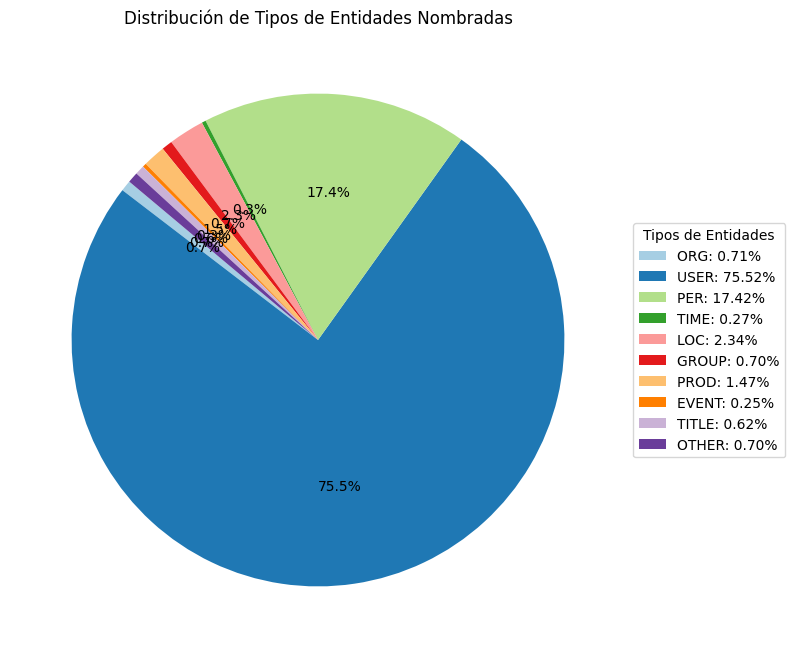

In [137]:
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(overall_entity_type_percentages.values(), startangle=140, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
ax.set_title("Distribución de Tipos de Entidades Nombradas")
legend_labels = [f"{ent_type}: {percentage:.2f}%" for ent_type, percentage in overall_entity_type_percentages.items()]
ax.legend(wedges, legend_labels, title="Tipos de Entidades", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

--------------------------------------------


-----------------------------------------------

### Tweets misóginos

-----------------------------------------------


In [138]:
# NER en tweets misoginos
text_misogynous = [text for text in df_ibereval[df_ibereval["misogynous"] == 1]["text"].tolist()]
results_ner_misogynous = [analyze_named_entities(text) for text in tqdm(text_misogynous)]


  1%|          | 13/1649 [00:00<00:26, 61.00it/s]

Texto analizado: @Nanchinho A ver si haces algo que sirva para mejorar el mundo, hija de puta @barbijaputa
Entidades encontradas: [('@nanchinho', 'USER'), ('@barbijaputa', 'USER')]
Texto analizado: @Rafhyta86 @ElDesmadre__ Habe pasame el video donde adan diga puta a las mujeres sevillistas...'MI NOVIA ES SEVILLISTA',no dice TODAS LAS SEVILLISTAS.
Entidades encontradas: [('@rafhyta86', 'USER'), ('@eldesmadre', 'USER'), ('adan', 'PER')]
Texto analizado: @Otb_35 Que te calles so guarra.
Entidades encontradas: [('@otb_35', 'USER')]
Texto analizado: L- El mejor luegar para tener mi polla ahora mismo es en la garganta de Wicca, llenándome de babas
Entidades encontradas: [('wicca', 'PER')]
Texto analizado: @AngeAlvarez7 Callate perra, re despierta estoy
Entidades encontradas: [('@angealvarez7', 'USER')]
Texto analizado: @ian_delaCalva @IrantzuVarela @pikaramagazine Oye por qué no molestas a tu puta madre?
Entidades encontradas: [('@ian_delacalva', 'USER'), ('@irantzuvarela', 'USER'), ('@pikar


  2%|▏         | 27/1649 [00:00<00:25, 62.80it/s]

Texto analizado: @pprecuero @EdGrimaldo Ni tas trabajando perra callate.
Entidades encontradas: [('@pprecuero', 'USER'), ('@edgrimaldo', 'USER')]
Texto analizado: Y yo atorado en el tráfico, claramente tu eres la perra de esta relación. https://t.co/2CaxQqwHqQ
Entidades encontradas: []
Texto analizado: Nada más vulgar y de mala educación entrar a mi casa y gritarme sin saber de que me habla. TE MERECES EL INFIERNO PERRA.
Entidades encontradas: []
Texto analizado: @birarxs nono claro que no, callate q mientras tenga alcohol vos tragas perra
Entidades encontradas: [('@birarxs', 'USER')]
Texto analizado: Dos amigos hablando: -Raúl, q me das por mi mujer? -Nada -Trato hecho.
Entidades encontradas: []
Texto analizado: @AlexandGutiz Pues dispuesto a ser un amo muy exigente! empinarte a mi gusto y nalguearte como te lo mereces por puta cachonda y zorra
Entidades encontradas: [('@alexandgutiz', 'USER')]
Texto analizado: @fxbianna Y tu eres la amiga perra que me lo va mamar a espaldas de ella, 


  2%|▏         | 34/1649 [00:00<00:25, 63.02it/s]

Texto analizado: En que se parece una mujer a un cientifico? En que al cientifico le pasan cosas por la cabeza, y a la mujer le pasan cabezas por la cosa
Entidades encontradas: []
Texto analizado: hice q la perra subiera al colchon y mi vieja la saco cagando, Q M IMPORTAN LOS PELOS ADRIANA CALLATEEEE
Entidades encontradas: [('adriana', 'PER')]
Texto analizado: @Alexaladyekt Q perra tan cojible eres puta yo ya m eh culeado a varias putas d elektra pero se nota q tu eres especial seria rico chiquitearte y darte a beber mis Miados y mis mocos
Entidades encontradas: [('@alexaladyekt', 'USER')]
Texto analizado: Soy caga palos y que! Pagame a la madre y callate el pinche osico perra ,antes que te valla peor hija de puta 🇲🇽😈
Entidades encontradas: [('méxico', 'LOC')]
Texto analizado: @alaniscristalv Cállate, pa' interés cualquiera so perra
Entidades encontradas: [('@alaniscristalv', 'USER')]
Texto analizado: @ERROR14501 @BIZARROMAN09 Callate perra y no
Entidades encontradas: [('@error14501', 


  3%|▎         | 48/1649 [00:00<00:25, 62.17it/s]

Texto analizado: ''¿Quieres buscar fama pa tirarte la kiada, pa follarte a la más guarra y ganarte 4 perras? Yo te la regalo primo, solo trae desgracia. Yo ya escuchaba al Edu y el decía: 'fuck the fama'''
Entidades encontradas: [('edu', 'PER')]
Texto analizado: @Sonia_Cameselle Esta mujer es una perra.
Entidades encontradas: [('@sonia_cameselle', 'USER')]
Texto analizado: @m_wesner1 Te mereces todo lo que está bien, que lindo verte así perra 🙌🏽💖
Entidades encontradas: [('@m_wesner1', 'USER')]
Texto analizado: Me encantaria darte unas nalgadas ricas ❤ — A mí me encantaría pegarte una hostia en la cara https://t.co/rUKwwVXlxm
Entidades encontradas: []
Texto analizado: 7. Loreen; no tengo suficientes palabras ni caracteres para definir en un tweet porque esta mujer es la puta reina de suecia. https://t.co/DnE5ZpziQI
Entidades encontradas: [('loreen', 'PER'), ('suecia', 'LOC')]
Texto analizado: Apartas el tanga a un lado, posas mi polla en tu coño y te dejas caer despacio metiéndola enter


  4%|▍         | 62/1649 [00:00<00:24, 63.68it/s]

Texto analizado: @come_hombres Agrega puta zorra yo te uso como te mereces y te ago mas puta de lo que ya eres
Entidades encontradas: [('@come_hombres', 'USER')]
Texto analizado: @IrantzuVarela Encuentro fascinante como los tíos cogen una prueba de su inutilidad (frígida, mal follada, coño reseco) y tratan de hacerlo pasar por un insulto hacia nosotras
Entidades encontradas: [('@irantzuvarela', 'USER')]
Texto analizado: ¿Porque se dice que la cerveza tiene hormonas femeninas? Porque cuando la bebes conduces mal, dices tonterias y nadie te hace caso.
Entidades encontradas: []
Texto analizado: @Andrefcarmona @ValeeJurado Tu eres una perra
Entidades encontradas: [('@andrefcarmona', 'USER'), ('@valeejurado', 'USER')]
Texto analizado: @BeeluArzola callate puta mal parida perra re culia inconciente callada deberias estar maldita
Entidades encontradas: [('@beeluarzola', 'USER')]
Texto analizado: @erices16_ Cállate vos wacha trola deja de confundir las hormonas puta
Entidades encontradas: [('@


  5%|▍         | 75/1649 [00:01<00:26, 58.46it/s]

Texto analizado: Cuando no opinas como las #feminazis quieren sos acosador/abusador/violador.... 80% de las denuncias de mujeres victimizadas son falsas. #Femimoda https://t.co/PkqOGkjziV
Entidades encontradas: []
Texto analizado: @abc_es @HiginiaRoig Ya está la niña del exorcista diciendo tonterías. Has visto lo que a hecho la guarra de tú hija.
Entidades encontradas: [('@abc_es', 'USER'), ('@higiniaroig', 'USER')]
Texto analizado: Lo estoy contando a sara lo que me pasó el 28/12 y me está llamando zorra, no es culpa mía ok JAJSAJAKSJAKSAKJSKJ
Entidades encontradas: [('sara', 'PER'), ('28/12', 'TIME')]
Texto analizado: @Alba_fcb14 Qué haces puta, cállate ya
Entidades encontradas: [('@alba_fcb14', 'USER')]
Texto analizado: @Laura99CM Ahora que me has faltado el respeto te lo puedo decir por fin: ¡A fregar puta!
Entidades encontradas: [('@laura99', 'USER')]
Texto analizado: @A3Noticias Esta tiene que ser una 'fake new' porque las mujeres son siempre las víctimas, no las hijas de puta ma


  5%|▌         | 87/1649 [00:01<00:27, 56.16it/s]

Texto analizado: Una mujer es tildada de zorra, buscafama etc y automáticamente está mintiendo, se le falta el respeto y se le cree al hombre. Cualquier semejanza con lo que consumimos todas las noches, es pura casualidad.
Entidades encontradas: []
Texto analizado: @nick17buero Opaa jajaja comemela entonces ajajaj
Entidades encontradas: [('@nick17buero', 'USER')]
Texto analizado: @prssrx +Si te molesta que te miren raro, es culpa de tus complejos y la unica opcion es adelgazar. Y si no te molesta seguiras con tu vida.
Entidades encontradas: [('@prssrx', 'USER')]
Texto analizado: ¿cual es el dia de la mujer? -El dia menos pensado-
Entidades encontradas: []
Texto analizado: Porque las mujeres ven las peliculas porno enteras? -Porque se creen que al final se van a casar o algo.
Entidades encontradas: []
Texto analizado: @Sucedaneosdesal @recap001 Pero cállate perra, que lo lo había visto xD
Entidades encontradas: [('@sucedaneosdesal', 'USER'), ('@recap001', 'USER')]
Texto analizado: Pero 


  6%|▌         | 99/1649 [00:01<00:29, 52.33it/s]

Texto analizado: Tú crees que eres cool y no eres una zorra y droga — y tu eres mi fan que tan pendiente a mi vida estas ... https://t.co/rNQvEMXCTH
Entidades encontradas: []
Texto analizado: @HdzJaleny Cállate perra por qué yo tq
Entidades encontradas: [('@hdzjaleny', 'USER')]
Texto analizado: El biribiri de las estupidas adolescentes manipuladas por la #femimoda aburre a la sociedad y enoja a los abusadores. #feminazis
Entidades encontradas: []
Texto analizado: @anto07ro Siempre te hago el aguante callate, mña si perra
Entidades encontradas: [('@anto07ro', 'USER')]
Texto analizado: @Marta04104594 Embestir te con fuerza q chilles al sentir mi.polla en tu coño humedo
Entidades encontradas: [('@marta04104594', 'USER')]
Texto analizado: @DeboraGarrido15 Cállate perra del infierno 😭
Entidades encontradas: [('@deboragarrido15', 'USER')]
Texto analizado: Estamos en periodo electoral. A pesar que las mujeres tengan derecho a voto; hagámoslo lo mejor que podamos #hombres #votojusto
Entidades 


  7%|▋         | 114/1649 [00:01<00:24, 63.78it/s]

Texto analizado: Porque ladra tanto mi perra? La puta madre cállate un poco
Entidades encontradas: []
Texto analizado: @SrtoAdriGH abusaba de él, es una zorra merecía morir.
Entidades encontradas: [('@srtoadrigh', 'USER')]
Texto analizado: El problema con la violación y el acoso si son un problema cultural, que uno hable de machismo no quiere decir que uno hable de la santidad femenina. Hay mujeres machistas violadoras/acosadoras, las hay
Entidades encontradas: []
Texto analizado: @LaUnionAM800 No es mas imbécil porque no es mas alto... el y su guarra, par de analfabetos funcionales... instigadores y apologistas a la violencia...!!!
Entidades encontradas: [('@launionam800', 'USER')]
Texto analizado: Enferma hija de mil puta y la concha gorda que te pario soreta te mereces una muerte lenta y dolorosa, te odio te odio te odio te odio gorda cinica https://t.co/UZU726enuv
Entidades encontradas: []
Texto analizado: @xTZeuS Zeus callate puta gorda q te huele la boca
Entidades encontradas: [(


  8%|▊         | 131/1649 [00:02<00:20, 72.90it/s]

Texto analizado: ESTA MUJER ES UNA VERDADERA PERRA......SERA QUE SE EMBRIAGA CON LA SANGRE QUE DERRAMA EL PUEBLO HUMIDE ARGENTINO? https://t.co/InR3jvSOYm
Entidades encontradas: []
Texto analizado: @aguandradaa callate una vez q toy feliz lo quiero compartir china puta
Entidades encontradas: [('@aguandradaa', 'USER')]
Texto analizado: @PilarBenitoG Cállate perra tú no estuviste ahí
Entidades encontradas: [('@pilarbenitog', 'USER')]
Texto analizado: @Lucasssmerlo Cállate hijo de puta. Me hace acordar a tu mamá cuando la lleve a la residencia a que se ventile un rato
Entidades encontradas: [('@lucasssmerlo', 'USER')]
Texto analizado: 2018, pelea de mis hermanos en la mañana Hermana: cállate pendejo Hermano: pendeja tú y pendeja tu perra ! Yo: omg a whole new level 😆
Entidades encontradas: []
Texto analizado: Perra agradece que te tire el licor en la blusa te lo merecías en la cabeza hp 😂🤦‍♂️ antes de hablar de mi... https://t.co/uRJEvTPI3W
Entidades encontradas: []
Texto analizado: @lort


  9%|▉         | 148/1649 [00:02<00:19, 77.10it/s]

Texto analizado: @salvameoficial @BelenEstebanM Tu eres una HDP,MALA GUARRA ODIABLE EL SER MAS VIL SINVERGÜENZA DESGRACIADA DROGADICTA DE MIERDA BelenEstebanM
Entidades encontradas: [('@salvameoficial', 'USER'), ('@belenestebanm', 'USER'), ('belenestebanm', 'PER')]
Texto analizado: Lisa agradece que tenes un dueño con corazón porque te mereces que te ahorque perra hdp😡
Entidades encontradas: [('lisa', 'PER')]
Texto analizado: @SoyDas117 @LuckasDroiidYT1 @BrandonGaming6 @LlinxaYT Y tu eres mi esposa ve a la cocina zorra >:v
Entidades encontradas: [('@soydas117', 'USER'), ('@luckasdroiidyt1', 'USER'), ('@brandongaming6', 'USER'), ('@llinxayt', 'USER')]
Texto analizado: @smercedesfranco @BSCmask007 @flynn_and_clu @abdalabucaram @daloes10 @LassoGuillermo Perra mentirosa y mereces mas calificativos ante tamaña mentira, gracias a gente como tu y al error histórico a la grabación del complot es que Abdala Bucaram ha puesto u
Entidades encontradas: [('@smercedesfranco', 'USER'), ('@bscmask007'


 10%|█         | 166/1649 [00:02<00:18, 80.60it/s]

Texto analizado: La chica de diamons me dice 'ay si tenes una cintura re chiquita' hija de puta no ves que estoy gorda, t voy a comprar igual pero cállate
Entidades encontradas: [('diamons', 'LOC')]
Texto analizado: Zaz. Enseñando los recibos. Qué perra. https://t.co/84NnOIFKRE
Entidades encontradas: []
Texto analizado: @billboard Ay estúpida perra gracias a otros tu eres famosa , idiota!!!
Entidades encontradas: [('@billboard', 'USER')]
Texto analizado: @KimKardashian @EliLinnetz Perra, tapate pasas pena. Te vives de enseñar el culo que es lo unico bueno que tienes🙄🐍
Entidades encontradas: [('@kimkardashian', 'USER'), ('@elilinnetz', 'USER')]
Texto analizado: @AgosBlanco13 Te cabe, no te lo mereces por zorra
Entidades encontradas: [('@agosblanco13', 'USER')]
Texto analizado: @GladisDiputada @Almagro_OEA2015 @OEA_oficial VIEJA CEROTA HIJA DE LA GRAN PUTA CALLATE MALDITA PERRA.
Entidades encontradas: [('@gladisdiputada', 'USER'), ('@almagro_oea2015', 'USER'), ('@oea_oficial', 'USER')]
T


 11%|█         | 175/1649 [00:02<00:20, 73.33it/s]

Texto analizado: Otra puta vez enseñando prioridades.
Entidades encontradas: []
Texto analizado: Joder nena me mata como te mueves, agarrar tu culo fuerte, separar tus nalgas, sentir tu coño apretando mi polla mientras me comes la boca, eres salvaje y eso me encanta https://t.co/uOU3Qj9saE
Entidades encontradas: []
Texto analizado: @MarialeOficial Ya cállate puta caballo hija de tu perra madre
Entidades encontradas: [('@marialeoficial', 'USER')]
Texto analizado: zorra eres tu que no te sientes hombre y no entiendes que toda mujer es bella
Entidades encontradas: []
Texto analizado: @LucasSpadafora Lucas callate que no lees dm nunca la puta que te pario ahre
Entidades encontradas: [('@lucasspadafora', 'USER'), ('lucas', 'PER')]
Texto analizado: @arisool__ JAJAJA QUE HIJA DE PUTA, canto hermoso callate
Entidades encontradas: [('@arisool', 'USER')]
Texto analizado: @SoleOchoa15 ammmmmmmm vos sabes que no me gusta nadie callate perra
Entidades encontradas: [('@soleochoa15', 'USER')]
Texto a


 12%|█▏        | 193/1649 [00:02<00:18, 76.86it/s]

Texto analizado: @elisacarrio La concha de tu madre hija de mil puta!!! Nada más, no lo mereces
Entidades encontradas: [('@elisacarrio', 'USER')]
Texto analizado: @Yuki_prostituta yo lo que quiero es tu coño y que tú quieras mi polla~
Entidades encontradas: [('@yuki_prostituta', 'USER')]
Texto analizado: “Que tú eres perra,miau,miau,miau”. –Valentina 17 años,mientras piensa para que nació JAJSJAJAJAJAJA.
Entidades encontradas: [('valentina', 'PER')]
Texto analizado: @AquiCorroVrgara Porque tú eres más perra todavía. 💅👄👅👑💄
Entidades encontradas: [('@aquicorrovrgara', 'USER')]
Texto analizado: @Mzavalagc @RicardoAnayaC @lopezobrador_ Callate perra no tienes ningún derecho a ladrar, pudrete.
Entidades encontradas: [('@mzavalagc', 'USER'), ('@ricardoanayac', 'USER'), ('@lopezobrador', 'USER')]
Texto analizado: Ahora resulta que la mujer es una bruja que lo trataba fatal y la otra es una guarra, feminismo marca Patiño and Cia.... #masqueamigus
Entidades encontradas: [('patiño', 'PER')]
Text


 13%|█▎        | 211/1649 [00:03<00:18, 79.72it/s]

Texto analizado: @ValeriaGV0222 @ibaewhore Oye oye, le enseñaré esto a mi mamá, perra
Entidades encontradas: [('@valeriagv0222', 'USER'), ('@ibaewhore', 'USER')]
Texto analizado: Como me matas cuando te mueves así de lento, siento todo el recorrido y la presión de tu coño alrededor de mi polla, acaricias mi pecho, sientes mi respiración agitada, me voy a correr nena https://t.co/32P0qrpcPi
Entidades encontradas: []
Texto analizado: @TamiFS_art comeme los cojones puto imbécil de la polla
Entidades encontradas: [('@tamifs_art', 'USER')]
Texto analizado: @MRMaureraVen ¿Para que me sigues maldita chavista hija de puta? Sal de mi TL perra asquerosa. Tu eres culpable de la desgracia de Venezuela. Mil veces maldita tu y toda tu generacion
Entidades encontradas: [('@mrmaureraven', 'USER'), ('venezuela', 'LOC')]
Texto analizado: @LaJornadaMaya Si denuncian acoso sexual.—le quitan sus derechos sindicales. Cuando naciste imbécil no tienes remedio. @Observa_Tuimss @Tu_IMSS
Entidades encontradas: [


 14%|█▍        | 229/1649 [00:03<00:17, 80.94it/s]

Texto analizado: @Melinamartt Callate perra desgraciada , estoy enojada con vos. Pd: yo no tengo cuñadas.
Entidades encontradas: [('@melinamartt', 'USER')]
Texto analizado: Eres la vieja mas osicona y zorra del mundo que no te mereces andar con mi amigo
Entidades encontradas: []
Texto analizado: *tells my grandma me and Daniel are fighting “ayyyyy pobrecito mi hijo, tú eres la perra desgraciada” https://t.co/7cDzbuouGO
Entidades encontradas: [('daniel', 'PER')]
Texto analizado: Mi perra es lo más insoportable del mundo chabon. QUIERO DORMIR CALLATE
Entidades encontradas: []
Texto analizado: -¿Que le compraste a tu mujer por San Valentín? -Un collar espectacular, y tu? -Nada, yo todavía la dejo suelta
Entidades encontradas: [('san valentín', 'TIME')]
Texto analizado: @_Brix__ @LopezNahulo Lo unico que vas a tener en tu culo es mi polla
Entidades encontradas: [('@_brix', 'USER'), ('@lopeznahulo', 'USER')]
Texto analizado: Y tu eres perra ? Ladrame hau hau hau ... QUE PERRRRRRA MI AMIGAAA


 15%|█▍        | 247/1649 [00:03<00:16, 83.02it/s]

Texto analizado: @AlexiaBiava Jajajajajaj zorra imbecil mi idola
Entidades encontradas: [('@alexiabiava', 'USER')]
Texto analizado: La puta que me pario. Hago coreos y no las filmó y ahora no se que enseñarrrrr diosssss.
Entidades encontradas: []
Texto analizado: a puta clase niña — Callate https://t.co/rS8rSnvmgp
Entidades encontradas: []
Texto analizado: #RAWCL puta la wea, Cesaro merecia terminar el año campeon
Entidades encontradas: [('rawcl', 'EVENT'), ('cesaro', 'PER')]
Texto analizado: Y tu eres Perra, ládrame. Ay, qué perra mi amiga. 🐶🐶
Entidades encontradas: []
Texto analizado: Las personas feministas solo se dedican a expandir mierda sobre la cara de los hombre y despues realmente lo que buscan es igualdad
Entidades encontradas: []
Texto analizado: @majohcampos ay cállate no mames estás divina puta
Entidades encontradas: [('@majohcampos', 'USER')]
Texto analizado: @Aprosex @anagailo1 @DoctoraGlas @TowandaRebels De su coño moreno, y todo por no mirar el puto estudio de la UNOD


 16%|█▌        | 265/1649 [00:03<00:17, 78.15it/s]

Texto analizado: Si te ponen una polla en la cara tu primer instinto es chuparla
Entidades encontradas: []
Texto analizado: @Alvenef @LeaVieilletoile Cállate perra
Entidades encontradas: [('@alvenef', 'USER'), ('@leavieilletoile', 'USER')]
Texto analizado: @emjuarez7 Tú eres mi favorita perra 😪
Entidades encontradas: [('@emjuarez7', 'USER')]
Texto analizado: Guarra se folla a Papá Noel en un autobús https://t.co/YUseYMe6ss https://t.co/jGhp8RBRUo
Entidades encontradas: [('papá noel', 'PER')]
Texto analizado: @PoderFeminazi Y luego tendrías que fregar toda la sangre y demás, como mujer que eres.
Entidades encontradas: [('@poderfeminazi', 'USER')]
Texto analizado: harassand Pepe querido no te merecías el maltrato de esta puta… https://t.co/PupvavRFpF
Entidades encontradas: [('harassand', 'PER'), ('pepe', 'PER')]
Texto analizado: Y tú eres perra, ladrame JAJAJAJAJAJAJAJAJAAJJAJAJA
Entidades encontradas: []
Texto analizado: Para él tu eres la perra y según tú fue un caballero
Entidades enc


 17%|█▋        | 283/1649 [00:04<00:17, 78.52it/s]

Texto analizado: @Soy_Elena_Sin_H @LeticiaDolera No tienes puta idea, está claro.
Entidades encontradas: [('@soy_elena_sin_h', 'USER'), ('@leticiadolera', 'USER')]
Texto analizado: @CerGamer_ @DewcesUhc Bueno tú eres su perra, no yo.
Entidades encontradas: [('@cergamer', 'USER'), ('@dewcesuhc', 'USER')]
Texto analizado: Porque las mujeres pierden la regla a los 50? Porque necesitan la sangre para las varices.
Entidades encontradas: []
Texto analizado: Que horrible verte así Sofi, como te voy a extrañar mi perra loca! Espero que estes en un lugar mejor, y tengas todo lo que mereces!
Entidades encontradas: [('sofi', 'PER')]
Texto analizado: Soy un hombre descompuesto cállate perra puta y déjame explicar
Entidades encontradas: []
Texto analizado: @PabloAgustin @barbarammzz @MicaSuarez12 CÁLLATE...PERRA https://t.co/Qm6enxgxls
Entidades encontradas: [('@pabloagustin', 'USER'), ('@barbarammzz', 'USER'), ('@micasuarez12', 'USER')]
Texto analizado: Mis padres tienen 30 años de casados y 4 hij


 18%|█▊        | 300/1649 [00:04<00:16, 79.54it/s]

Texto analizado: La zorra de @laufer4 riéndose en la cara de mica mientras lloraba hay la tienen ala careta esa
Entidades encontradas: [('@laufer4', 'USER'), ('mica', 'PER')]
Texto analizado: @_omarm58 Callate Perra. Toda con el nopal en la frente 😂🙄
Entidades encontradas: [('@_omarm58', 'USER')]
Texto analizado: @ValenARG_tina Sii bb comemela t la meto hasta la garganta y que no puedas respurar por unos segundos
Entidades encontradas: [('@valenarg_tina', 'USER')]
Texto analizado: @SantiagoPovedaM Cállate Perra! 😙
Entidades encontradas: [('@santiagopovedam', 'USER')]
Texto analizado: @AlexaCamejo Cállate puta, si te encanta verme
Entidades encontradas: [('@alexacamejo', 'USER')]
Texto analizado: O sea que aquí normalizas la violación y el acoso y aún así te crees el puto amo? Lo peor de todo es saber que tienes miles de seguidores que te aplauden
Entidades encontradas: []
Texto analizado: Citar un tuit no es acoso Decirle a alguien lo imbécil que es cuando dice una tontería tampoco Hac


 19%|█▉        | 317/1649 [00:04<00:16, 80.63it/s]

Texto analizado: @Emily_Guadiana1 @PPTeamKaren YA CALLATE PERRA PLIS
Entidades encontradas: [('@emily_guadiana1', 'USER'), ('@ppteamkaren', 'USER')]
Texto analizado: “Voy a enseñarle a esta perra como se trata a un hombre” LMAO IN LOVE WITH EL TITI 😂
Entidades encontradas: [('titi', 'PER')]
Texto analizado: ¿Ves que tu coño me importe? Cómete mi polla, basura https://t.co/ht02KyYWZh
Entidades encontradas: []
Texto analizado: toda la razón,tatita. Las mujeres son minoría (sucias perras) y el acoso es irrelevante (sucias feminazis) 🙄🤦 https://t.co/p73b0gasou
Entidades encontradas: [('tatita', 'PER')]
Texto analizado: @quieromamarpene @calenton_madrid @Pito_maricon_ Vas a sentir como sé mueve mí polla en tú culo de putita para qué veas que tú amo no sé olvida nunca de darte tú ración de leche en ese maravilloso culo peludo de putita
Entidades encontradas: [('@quieromamarpene', 'USER'), ('@calenton_madrid', 'USER'), ('@pito_maricon', 'USER')]
Texto analizado: @erickorni0 Cállate perra. Jaj


 20%|█▉        | 326/1649 [00:04<00:16, 81.70it/s]

Texto analizado: @vmoulian @baradit Puta el weon hincha pelotas... Criticas a @baradit por su programa, pero tu eres panelista en Primer Plano... EN PRIMER PLANO PO WEEEOON!!!... Chanta!
Entidades encontradas: [('@vmoulian', 'USER'), ('@baradit', 'USER'), ('@baradit', 'USER')]
Texto analizado: @AgusssLarrosa callate perra q t haces llamar mejor amiga zorra del orto aprende a escribir chau
Entidades encontradas: [('@agussslarrosa', 'USER')]
Texto analizado: @pauvillarreal9 Callate cara d perra
Entidades encontradas: [('@pauvillarreal9', 'USER')]
Texto analizado: Yo el otro día vi que estaba leyendo junto a Aitana y soltó 'esta chica es un poco zorra no??' y me mosqueó la vd https://t.co/dusLohr3un
Entidades encontradas: [('aitana', 'PER')]
Texto analizado: Por qué las mujeres tienen el agujero del culo y el del coño tan juntos?Para poder agarrarlas como un pack de cerveza.
Entidades encontradas: []
Texto analizado: Te mereces morir hija de puta https://t.co/YIK0K0iHTd
Entidades encontra


 21%|██        | 343/1649 [00:04<00:16, 77.60it/s]

Texto analizado: @lautaroaguirree imbecil hoy te pego una piña te fracturo la nariz
Entidades encontradas: [('@lautaroaguirree', 'USER')]
Texto analizado: Estaba cantando re emocion y la perra m beso ,onda callate 😂😂😂😂😂
Entidades encontradas: []
Texto analizado: @AngelZanella CÁLLATE NADIE TE PREGUNTO, PERRA
Entidades encontradas: [('@angelzanella', 'USER')]
Texto analizado: Y tú eres una PUTA ZORRA #feminazi de las cuales deberían avergonzarse (y muchas ya lo hacen) las MUJERES https://t.co/HOKJW1uCCj
Entidades encontradas: []
Texto analizado: Aún tengo mis dudas porque dicen que un hombre es puto por estar con hombres, entonces, ¿una mujer es puta por estar con mujeres?
Entidades encontradas: []
Texto analizado: @alvaroflaherty1 Vos callate que tu perra rompe vasos
Entidades encontradas: [('@alvaroflaherty1', 'USER')]
Texto analizado: Tendrían que pegarte a ti la paliza y que te calles de una puta vez para siempre https://t.co/zncjv32WFn
Entidades encontradas: []
Texto analizado: @Cu


 22%|██▏       | 361/1649 [00:05<00:15, 80.54it/s]

Texto analizado: @ConElMazoDando Tú eres la perra entre las perras que hay. Perra inmunda, hedionda, malparida, puerca, ladrona, sucia, asesina, pecuecua!
Entidades encontradas: [('@conelmazodando', 'USER')]
Texto analizado: #DeRegaloTeMereces que te trague la tierra por zorra
Entidades encontradas: []
Texto analizado: @TopisimaYo @PadreJosePalmar CALLATE perra muérete de hambre !!!
Entidades encontradas: [('@topisimayo', 'USER'), ('@padrejosepalmar', 'USER')]
Texto analizado: @AlejoParSw Que rica esta yo si quisiera comemela
Entidades encontradas: [('@alejoparsw', 'USER')]
Texto analizado: @MirandaLanda22 Ya callate pinche puta y celebra la navidad hija de perra
Entidades encontradas: [('@mirandalanda22', 'USER')]
Texto analizado: @xIvan_lhdp -Azoto tu cara- Comemela
Entidades encontradas: [('@xivan_lhdp', 'USER')]
Texto analizado: @LeticiaDolera No tenéis ni puta idea. Sí, digo puta. Tampoco se detuvo al asqueroso 'el chicle' porque una mujer, la suya, mintió y le sirvió d coartada. 


 23%|██▎       | 379/1649 [00:05<00:15, 82.45it/s]

Texto analizado: @Franciscodagst no veo la correa de perra para que te traten como mereces
Entidades encontradas: [('@franciscodagst', 'USER')]
Texto analizado: @MiguelHerreraDT pinche gordo mediocre vete a la mierda junto a tu perra hija gorda eso y más te mereces, tu con tus decisiones insultas más a la verdadera afición
Entidades encontradas: [('@miguelherreradt', 'USER')]
Texto analizado: @DaianaCostas_ Callate dijeeeeee! Sos alta perra y punto.
Entidades encontradas: [('@daianacostas', 'USER')]
Texto analizado: @PatriaPreciosa Tal vez gege no te responda pero yo si , callate maldita perra acomplejada lambucia miserable
Entidades encontradas: [('@patriapreciosa', 'USER'), ('gege', 'PER')]
Texto analizado: @huerguita5 @EnLuchaMujeres @Relatofeminista Vaya pelis te montas, mírate la puta cabeza primero y preocúpate de los demás después. Abusar y explotar no entran dentro de hacer lo q quiera y ser libre. Ale! A fregar!
Entidades encontradas: [('@huerguita5', 'USER'), ('@enluchamujere


 24%|██▍       | 397/1649 [00:05<00:15, 82.49it/s]

Texto analizado: no me va a dar rabia porque me di la inyección callate estúpida no me muerdas vos que sos perra https://t.co/VetY24HKjG
Entidades encontradas: []
Texto analizado: @MarisaGlave callate perra de mierda... anda preparando tus maletas, te vas presa junto con la ratera villaran, la otra ratera heredia y la terruca veronika mendoza.... NADIE TE CREE..sigues con el floro de la matanza y secuentros?? jajajaja lo mismo que 
Entidades encontradas: [('@marisaglave', 'USER'), ('villaran', 'PER'), ('heredia', 'PER'), ('veronika mendoza', 'PER')]
Texto analizado: @jenniferhaythes @ActualidadRT Cállate perra fascista hija de puta, seguro eres una muerta de hambre.
Entidades encontradas: [('@jenniferhaythes', 'USER'), ('@actualidadrt', 'USER')]
Texto analizado: Tú eres de los 70’ Y yo soy una zorra de los 90’
Entidades encontradas: []
Texto analizado: TE LO MERECES POR PERRA. —Lo arrastra por la academia de las greñas y le da unos chanclazos. https://t.co/9GwmLte4BU
Entidades encontra


 25%|██▌       | 415/1649 [00:05<00:15, 78.17it/s]

Texto analizado: ¿Qué hacer para que a una mujer le brillen los ojos? Ponerle una linterna en la oreja. #SinCerebro #SinDerechos #SinPolla
Entidades encontradas: []
Texto analizado: @xAnna_Evans Se clava en tu culo y empieza a follarte rápido. [No! -gruño angustiado] me remuevo angustiado y me dan con una cuerda en la espalda mientras el tío te folla el culo, rodeada de vomito, sangre y dolor.
Entidades encontradas: [('@xanna_evans', 'USER')]
Texto analizado: Talvez quede como zorra pero te lo mereces Socia😎
Entidades encontradas: []
Texto analizado: Esto me ha llamado gilipollas. Tu eres una guarra, pero eh, sin acritud https://t.co/6XwgZu20wn
Entidades encontradas: []
Texto analizado: @caaamicastilloo Callate vos qué no me hablaste más puta
Entidades encontradas: [('@caaamicastilloo', 'USER')]
Texto analizado: @bebesymas Pelotuda deberiar juzgarte x abandononde persona. Hija de puta no mereces tener hijos. Ojala sigas siendo una gorda pedorra
Entidades encontradas: [('@bebesymas', 'U


 26%|██▌       | 432/1649 [00:05<00:15, 79.53it/s]

Texto analizado: Es como 'maldita sea cállate ese maldito hocico perra de mierda' https://t.co/cdca5TXBnk
Entidades encontradas: []
Texto analizado: @mariogigasanche Tu eres mi perra
Entidades encontradas: [('@mariogigasanche', 'USER')]
Texto analizado: @alejandrapl12 @manuelzr Perra muerta de hambre vos cállate ese ladro de juanrobando no es el presidente de honduras
Entidades encontradas: [('@alejandrapl12', 'USER'), ('@manuelzr', 'USER'), ('juanrobando', 'PER'), ('honduras', 'LOC')]
Texto analizado: @xLittleBlue Callate que una esta ahora en el pueblo acompañada de un pajaro y una perra
Entidades encontradas: [('@xlittleblue', 'USER')]
Texto analizado: @EmiVidela87 Cállate perra cochina, lo único complicado acá es que levante mañana a laburar
Entidades encontradas: [('@emividela87', 'USER')]
Texto analizado: ush esa perra si que me cae re mal, se cree la verga y not mk, no eres nadie, cállate que a nadie le importa tu vida boba hp
Entidades encontradas: []
Texto analizado: @Paolarui


 27%|██▋       | 449/1649 [00:06<00:14, 80.47it/s]

Texto analizado: Porque andan llamando gata, zorra o puta a baekhyun si es hombre, manga de ridiculas
Entidades encontradas: [('baekhyun', 'PER')]
Texto analizado: Perdón Chofi pero a mi me diste a entender que la mujer es una perra ajajajajajjajajajaja https://t.co/0T6sKarW9Z
Entidades encontradas: [('chofi', 'PER')]
Texto analizado: Hombres de España. Que no os frene el voto femenino. Somos más y nuestra opinión sigue contando más. ¡TodOs a las urnas!
Entidades encontradas: []
Texto analizado: A fregar guarra @Barbijaputa
Entidades encontradas: [('@barbijaputa', 'USER')]
Texto analizado: Hola soy TraedRuffles tu novia es una puta me acabo de pasar el Tekken con Casemiro reídme las gracias por favor
Entidades encontradas: [('traedruffles', 'PER'), ('tekken', 'TITLE'), ('casemiro', 'PER')]
Texto analizado: @LosAndesDiario Y vs te mereces morir mugrienta hija de puta
Entidades encontradas: [('@losandesdiario', 'USER')]
Texto analizado: CACHO GUARRA QUE TE CALLES YA Y ME DEJES ESTUDIAR h


 28%|██▊       | 467/1649 [00:06<00:14, 81.23it/s]

Texto analizado: @iAmGuillin @laimarie30 *Entra Héctor El Father al chat* ¡Si tú eres una perra pues yo soy más perro! y que se joda. 😂
Entidades encontradas: [('@iamguillin', 'USER'), ('@laimarie30', 'USER'), ('héctor el father', 'PER')]
Texto analizado: ¡Cállate!, ella era una zorra, bien se lo merecía. https://t.co/40qonLBExR
Entidades encontradas: []
Texto analizado: ¿Qué hace una mujer trepando una pared de vidrio? Quiere ver que hay al otro lado
Entidades encontradas: []
Texto analizado: Créeme, yo estudio Veterinaria y tu eres una perra.
Entidades encontradas: []
Texto analizado: @Antodaianna ay sí, cuando encima estás así y te dicen 'ay te pusiste colorada' jaja la puta madre callateee
Entidades encontradas: [('@antodaianna', 'USER')]
Texto analizado: @poisonedMar Qué perra tan inteligente, mereces una galletita 🍪
Entidades encontradas: [('@poisonedmar', 'USER')]
Texto analizado: @s0ymia JAJAJA YA CÁLLATE PERRA DRAMÁTICA DAS PENA Y RISA
Entidades encontradas: [('@s0ymia', 'USER


 29%|██▉       | 485/1649 [00:06<00:14, 83.03it/s]

Texto analizado: @fjac1980 Jajaja picado de que si tu eres la zorra que vive pendiente de Herrera, comenzaste el año acordandote de el
Entidades encontradas: [('@fjac1980', 'USER'), ('herrera', 'PER')]
Texto analizado: COMO PUTA MADRE ME EMPERRAN ESAS PUTAS DE INSTAGRAM QUE CON 1,000 FOLLOWERS Y POR ENSEÑAR EL CULO SE AUTOPROCLAMAN FIGURAS PÚBLICAS, PINCHES PERRAS SIN AMOR LAS ODIO PUTAS PENDEJAS
Entidades encontradas: [('instagram', 'PROD')]
Texto analizado: @spacetrao Callate CTM hijo de la perra caliente 😎
Entidades encontradas: [('@spacetrao', 'USER')]
Texto analizado: @DaniBalmaceda98 Cállate perra, nunca más nos juntamos (?
Entidades encontradas: [('@danibalmaceda98', 'USER')]
Texto analizado: Cuando decís que una mujer es guarra en la cama me la imagino lanzádoos caca y haciendo pis en vuestra cara y me río mucho.
Entidades encontradas: []
Texto analizado: @joeldavid26 On tu eres muy perra
Entidades encontradas: [('@joeldavid26', 'USER')]
Texto analizado: @CorpoRosaBlanca @pauli


 30%|██▉       | 494/1649 [00:06<00:14, 77.71it/s]

Texto analizado: Por las mujeres tienen cuatro neuronas??? Una para cada fogon
Entidades encontradas: []
Texto analizado: Si eres de los que piensas que una mujer es una mala puta por pensar diferente a ti Vota a ERC PdCAT o CUP
Entidades encontradas: [('erc', 'ORG'), ('pdcat', 'ORG'), ('cup', 'GROUP')]
Texto analizado: -Hijo ese videojuego te está haciendo violento - ¡CÁLLATE LA BOCA PERRA DESGRACIADA, TÚ MERECES MORIR!
Entidades encontradas: []
Texto analizado: O sea si el culo es de una tía que no conoces no pasa nada pero si la chica es una conocida, entonces menuda zorra, qué poco se quiere. Me quiero más que vosotros, tenedlo claro ♥️
Entidades encontradas: []
Texto analizado: Las viejas de antes, puteaban bonito para ganar dinero. Las de hoy acusan de acoso o violacion a algún pobre y buen hombre.
Entidades encontradas: []
Texto analizado: Le cuento a Magali algo que me hizo llorar y la estúpida me dice 'se lo merecía, por zorra le pasa' Aveces la odio tanto jajaj
Entidades enco


 31%|███       | 511/1649 [00:06<00:14, 78.03it/s]

Texto analizado: @solci_cordoba15 @CandeAcunia Callate sol puta, cande no se dio cuenta por q sabe que estudió
Entidades encontradas: [('@solci_cordoba15', 'USER'), ('@candeacunia', 'USER'), ('cande', 'PER')]
Texto analizado: @danielanatt Callate que ni me contestaste, ahora te voy a ignorar puta
Entidades encontradas: [('@danielanatt', 'USER')]
Texto analizado: @rondaxrush JAJAJAJAJJAJAJAJJAA maldita perra,no mereces vivir https://t.co/xnCJ0oCkDH
Entidades encontradas: [('@rondaxrush', 'USER')]
Texto analizado: @PuTitaTrevi Que rica te ves perra, pero te verias mejor enseñando esa puchita rica bien mojada
Entidades encontradas: [('@putitatrevi', 'USER')]
Texto analizado: que no¿? por que eres tan puta zorra mentirosa¿ cualquier user chica es mas juguetona que tu, puta monja — Bueno, suele pasar yo no busco ser juguetona ^^ https://t.co/k8D4HmBwzb
Entidades encontradas: []
Texto analizado: Y tú eres una perra como dice Joss Stone https://t.co/cDRan4DaSa
Entidades encontradas: [('joss s


 32%|███▏      | 529/1649 [00:07<00:13, 81.16it/s]

Texto analizado: @mignonescabio zorra hija de puta no mereces bibir!
Entidades encontradas: [('@mignonescabio', 'USER')]
Texto analizado: @RicarditoZL Cállate perra que fue pura suerte 😭😭😭😭
Entidades encontradas: [('@ricarditozl', 'USER')]
Texto analizado: ¿Por que las mujeres se casan de blanco? Para hacer juego con el refrigerador, la cocina y la lavadora. #Humor
Entidades encontradas: []
Texto analizado: Vieron que las feministas son re violentas pero cuando es contra la mujer es como 'no, terrible hijo de puta no pueden ser tan violentos' xd
Entidades encontradas: []
Texto analizado: @vntiat Maldita la puta que la parió, que es esta asquerosidad perra sucia. Debería sacarse la mierda que tiene en la cabeza hija de puta.
Entidades encontradas: [('@vntiat', 'USER')]
Texto analizado: Si se dijera que las mujeres son totalmente diferentes, pero no, son igual de hijas de la gran puta
Entidades encontradas: []
Texto analizado: @ash_london @edsheeran Hija de perra
Entidades encontradas: [


 33%|███▎      | 547/1649 [00:07<00:13, 81.49it/s]

Texto analizado: @rU_1970 muestra como teni esa vagina de puta caliente llena de moco wacha culia hija de la perra traga semen 146:146
Entidades encontradas: [('@ru_1970', 'USER')]
Texto analizado: -¿Por que las mujeres tienen Un sexto sentodo? -Porque no usan los otros cinco
Entidades encontradas: []
Texto analizado: jajajajajaja me bloqueó la hija de perra esa.
Entidades encontradas: []
Texto analizado: @JamieFerreira10 tu novia es una zorra, me la folle las veces que yo quise
Entidades encontradas: [('@jamieferreira10', 'USER')]
Texto analizado: @exitosape Que tal hija de puta está perra, para ir de acusete con un superior e infringiendo la ley.
Entidades encontradas: [('@exitosape', 'USER')]
Texto analizado: Deja de estar chingando, estúpida. Tú eres la zorra que se acuesta con quien sea aunque le den diez centavos. https://t.co/yCe73qIbmE
Entidades encontradas: []
Texto analizado: @revistaproceso Exigen. Perra asesina necesitamos tener te cerda hija de tu puta madre ratera como tú


 34%|███▍      | 565/1649 [00:07<00:13, 81.31it/s]

Texto analizado: Esta hija de perra no sabe lo que es salir verdaderamente MAL en una foto https://t.co/ALx6ERybYf
Entidades encontradas: []
Texto analizado: @Hugo_Gutierrez_ Te mereces que te agarremos a patas en la zorra, gargajos y combos en el hocico viejo culiao, ojalá no te cruces en mi camino
Entidades encontradas: [('@hugo_gutierrez', 'USER')]
Texto analizado: @mlagvaz callate guarra
Entidades encontradas: [('@mlagvaz', 'USER')]
Texto analizado: vos me haces eso te pego una patada en la cara https://t.co/2drqUu5Rwc
Entidades encontradas: []
Texto analizado: @CanalusHeresy @Fourty35 @IrantzuVarela A, que la zorra está va de matona por la vida? Jajajaja. Pero si de un soplido la desgracias al adefesio ese!😂
Entidades encontradas: [('@canalusheresy', 'USER'), ('@fourty35', 'USER'), ('@irantzuvarela', 'USER')]
Texto analizado: @Ryogure @Papelicioso Esa zorra se merecia todo lo que le pasò. De hecho, en la parte del juego donde tenes una cita con una de las dos, a mi me aparecio Tif


 35%|███▌      | 583/1649 [00:07<00:13, 79.39it/s]

Texto analizado: @DrodriguezVen tu eres la perra mas perra de las perras
Entidades encontradas: [('@drodriguezven', 'USER')]
Texto analizado: @silvestreLidier Tú eres una perra jajaja
Entidades encontradas: [('@silvestrelidier', 'USER')]
Texto analizado: Decirle la verdad en la cara a un idiota y que esa verdad le duela tanto que llegue al punto de pegarte un puño es de las cosas más satisfactorias que hice esta semana. #SorryNotSorry.
Entidades encontradas: []
Texto analizado: Queria charlar de algo, yo soy feminista, siempre que una victima habla de algun abuso, acoso o violacion que sufrio no le cues... — es complicado porque me esta pasando lo mismo con mi viejo, la ex lo esta acusando de cosas que s... https://t.co/cHCbfVr6CP
Entidades encontradas: []
Texto analizado: @BeeluArzola Sos una hija de puta mala.madre pobre ángel todo x una tablet perra mal parida no te mereces nada vos presa tenes que ir no al sicólogo .
Entidades encontradas: [('@beeluarzola', 'USER'), ('ángel', 'PER'


 36%|███▋      | 600/1649 [00:08<00:13, 77.84it/s]

Texto analizado: @AgusBenve10 Callate puta loca si sos un quebrado
Entidades encontradas: [('@agusbenve10', 'USER')]
Texto analizado: @laurg46 @mxnicagb1997 @WaitaSR @NatuLoveYou Mereces la muerte zorra JAJAJAJAJA
Entidades encontradas: [('@laurg46', 'USER'), ('@mxnicagb1997', 'USER'), ('@waitasr', 'USER'), ('@natuloveyou', 'USER')]
Texto analizado: No puedo con lo que dice la canción de ‘que perra mi amiga’: y tú eres perra, ládrame 😂
Entidades encontradas: []
Texto analizado: ¿Qué dices, cerda? No puedo oirte con mi polla en tu garganta ja ja ja ja ja https://t.co/zxa50ayGcX
Entidades encontradas: []
Texto analizado: @infobae Yo te prenderia fuego por perra !!! Q culpa tiene ese angelito q estes tan cagada de la cabeza !! No mereces ser madre !
Entidades encontradas: [('@infobae', 'USER')]
Texto analizado: tener una polla en la cara de jessi en un pony al decir que era brony o
Entidades encontradas: [('jessi', 'PER'), ('brony', 'PER')]
Texto analizado: 'Los huracanes con nombre de mu


 37%|███▋      | 617/1649 [00:08<00:12, 80.56it/s]

Texto analizado: @obseno1 @RosaLaConejita Mmmmm la mas tetona y puta de Mexico, pinche puta tan buena . Mmmm te mereces k te usan, abusan en la cama, y te cogen como la puta k eres, mmmm mama una verga puta💵🍆😉😘
Entidades encontradas: [('@obseno1', 'USER'), ('@rosalaconejita', 'USER'), ('mexico', 'LOC')]
Texto analizado: @_JBonilla_ @CanalYesTV Cállate perra
Entidades encontradas: [('@_jbonilla', 'USER'), ('@canalyestv', 'USER')]
Texto analizado: @TRANQUlLlTA Oye callate que si te molesta pues no mires el chat y deja ya de llamar la atención guarra, mi Instagram es trussypussy25 chavales
Entidades encontradas: [('@tranqulllta', 'USER'), ('instagram', 'PROD')]
Texto analizado: @ te sigo amando pero no lo mereces, perra.
Entidades encontradas: [('@', 'USER')]
Texto analizado: #YuriIsOverParty @OficialYuri te lo merecias muchisimo zorra https://t.co/VGRnNyWa8s
Entidades encontradas: [('yuriisoverparty', 'PER'), ('@oficialyuri', 'USER')]
Texto analizado: Sólo escuchar hablar a este tipo ME 


 39%|███▊      | 635/1649 [00:08<00:12, 82.57it/s]

Texto analizado: @kirneak @lhrivero75 Tu eres más de manifestarte con nazis sin reparos como el Vlaams Belang, hijo de una perra sarnosa y cien mil padres distintos, desconocidos y sifilíticos. Puto nazi. Escoria. Purria. Pedazo de mierda.
Entidades encontradas: [('@kirneak', 'USER'), ('@lhrivero75', 'USER'), ('vlaams belang', 'PER')]
Texto analizado: ¿Que ves? RT una hoja de papel Fav Tetas http://t.co/lkrM1XHyWA
Entidades encontradas: []
Texto analizado: @ingridcoronado Cállate perra, Recalentado los que se echan los directivos de TV Azteca cada que te la pasas brincando de verga en verga, por eso dejaste a Fernando, porque te encanta la puteria
Entidades encontradas: [('@ingridcoronado', 'USER'), ('tv azteca', 'ORG'), ('fernando', 'PER')]
Texto analizado: Nunca pensé que un capitulo de Dr. House me iba a hacer llorar tanto 💔 Amber eras una perra pero no merecías eso 😞
Entidades encontradas: [('dr. house', 'TITLE'), ('amber', 'PER')]
Texto analizado: @BrotherDroiid @Snowknight9 Pero 


 40%|███▉      | 653/1649 [00:08<00:12, 81.50it/s]

Texto analizado: 'También te estresa todo hermana' y bueno gil, callate la puta madre
Entidades encontradas: []
Texto analizado: @El_PiraTha Cállate perra que me dejaste en seen, mal amigo
Entidades encontradas: [('@el_piratha', 'USER')]
Texto analizado: @GrPepe tu novia es una perra Tiene las mismas tetas que una perra preñada JAAJJAAJA Que asco Tanto Ego que tienes mmgvo
Entidades encontradas: [('@grpepe', 'USER')]
Texto analizado: @Txuanra Pero si ese estaba amariconao con la guarra esa del pub, te veo más como Vivi, buscando el sentido a la vida
Entidades encontradas: [('@txuanra', 'USER'), ('vivi', 'PER')]
Texto analizado: @JuanitoFxtbol_ @ElKriket Pero tu eres una perra sucia
Entidades encontradas: [('@juanitofxtbol', 'USER'), ('@elkriket', 'USER')]
Texto analizado: ¿Cuál es la cosa más inteligente que ha salido de la boca de una mujer? La polla de Einstein.
Entidades encontradas: [('einstein', 'PER')]
Texto analizado: Placer morboso posar la punta de mi polla en tu coño y empuja


 41%|████      | 670/1649 [00:08<00:12, 78.20it/s]

Texto analizado: @AranzaOrtizMt Cállate perra, yo fui una pionera en ver GG
Entidades encontradas: [('@aranzaortizmt', 'USER')]
Texto analizado: @pilarbertolo @el_pais Porque no tiene la menor empatía con víctimas de acoso ni de violación y porque defiende un derecho autoinventado del hombre de hacer con las mujeres lo que les dé la gana.
Entidades encontradas: [('@pilarbertolo', 'USER'), ('@el_pais', 'USER')]
Texto analizado: @ccamilitach no te mereces que te preste ninguna malla más por escribirlo así perra 😒jajajajaj
Entidades encontradas: [('@ccamilitach', 'USER')]
Texto analizado: Qué ridículas la puta madre me da sarna leerlas
Entidades encontradas: []
Texto analizado: Por suerte no le gustan los tatuajes, más vale q no te hagas ninguno en la cara porque te pego @ValenEtchegoye2 https://t.co/lNUgeyqlRp
Entidades encontradas: [('@valenetchegoye2', 'USER')]
Texto analizado: @FlorenciaJerez8 Cállate perra es mioo
Entidades encontradas: [('@florenciajerez8', 'USER')]
Texto analizado:


 42%|████▏     | 688/1649 [00:09<00:11, 82.69it/s]

Texto analizado: @jsplassme CÁLLATE PERRA, HIJA DE PERRA, SOS UNA PERRA
Entidades encontradas: [('@jsplassme', 'USER')]
Texto analizado: @AnderssonBoscan Vieja zorra imbécil y MENTIROSA, que nos cree unos solemnes cojudos. Señor Lenin, por favor dignifique al Ecuador, pobres, pero no en la cloaca robolucionaria!!
Entidades encontradas: [('@anderssonboscan', 'USER'), ('lenin', 'PER'), ('ecuador', 'LOC')]
Texto analizado: que es eso de hacer un dia harry otro liam otro zayn SE VEN RIDÍCULAS vuelvan a facebook hijas de puta
Entidades encontradas: [('harry', 'PER'), ('liam', 'PER'), ('zayn', 'PER'), ('facebook', 'PROD')]
Texto analizado: Perra, pero callada, me gusta.
Entidades encontradas: []
Texto analizado: la novia es mas puta y el pelotudo sigue estando con ella , ni pa bosta la mina mas zorra y el ni hablar mas gil todavía , le re kbio
Entidades encontradas: []
Texto analizado: @codyivxn AY YA CALLATE EL HICICO HIJA DE TU PUTA MADRE TE VOY A SOÑAR
Entidades encontradas: [('@codyivxn'


 43%|████▎     | 706/1649 [00:09<00:11, 82.52it/s]

Texto analizado: Hasta para enseñar el culo hay que ser perra.
Entidades encontradas: []
Texto analizado: @danneo @Manualcom @CercaniasMadrid @fomentogob La perra gorda pa ti. Y x esa regla de 3 tu eres culpable de la caja b del pp, las privatizaciones y la precariedad laboral junto con educación q sufre España, xq tienes tu la culpa, sencillo, xq lo digo yo.
Entidades encontradas: [('@danneo', 'USER'), ('@manualcom', 'USER'), ('@cercaniasmadrid', 'USER'), ('@fomentogob', 'USER'), ('españa', 'LOC')]
Texto analizado: Hola, tarta. Sé bien lo que quieres. Te ví en aquella película. Zorra, cerda, puta. No te mereces que me acueste contigo —Peter Griffin
Entidades encontradas: [('peter griffin', 'PER')]
Texto analizado: @PuTitaTrevi Eres una perra muy puta mereces que te viole aquí tengo lo que necesitas puta
Entidades encontradas: [('@putitatrevi', 'USER')]
Texto analizado: @divazasfernet TU ERES IDIOTA COÑO E TU MADRE PERRA TIENES EL MEJOR NOMBRE DE LA HISTORIA
Entidades encontradas: [('@


 44%|████▍     | 724/1649 [00:09<00:11, 83.98it/s]

Texto analizado: Perra traidora!!!!! No te lo mereces!!!!!! https://t.co/C522UHHAjl
Entidades encontradas: []
Texto analizado: Una mujer va a una biblioteca: -¿Por favor, los derechos de la mujer? -¡Ah, sí. Por la sección de ciencia ficción
Entidades encontradas: []
Texto analizado: @FakuuFlores No todos tenemos tus mañas zorra
Entidades encontradas: [('@fakuuflores', 'USER')]
Texto analizado: Puta que me buena callada de hocico https://t.co/feBLWc61ao
Entidades encontradas: []
Texto analizado: Esto te pasa por ser una zorra.. Toma taponazo en la cara 😂😂😂😂😂 https://t.co/YyiLUtjUSM
Entidades encontradas: []
Texto analizado: @DonniPuppo JAJJAJAJ cállate perra , me lo dijo por otra cosa no x eso
Entidades encontradas: [('@donnipuppo', 'USER')]
Texto analizado: Felices 15 a la mas puta💗 espero que la estes pasando re lindo porque te lo re mereces, te amo un monnnnton !!! @XimeGatter https://t.co/onlbzJO13K
Entidades encontradas: [('@ximegatter', 'USER')]
Texto analizado: @ainoatundidor3 Ca


 44%|████▍     | 733/1649 [00:09<00:11, 82.21it/s]

Texto analizado: Mucho estado pero en la cara no me decis nada, andas más que pilla que me la banco de one, zorra
Entidades encontradas: []
Texto analizado: @KaaSeeeR Q ya lo sabemos callate ya puta
Entidades encontradas: [('@kaaseeer', 'USER')]
Texto analizado: @beticorro1 @jonviene @LaFortaleza__ PUES COMEMELA TIESA!
Entidades encontradas: [('@beticorro1', 'USER'), ('@jonviene', 'USER'), ('@lafortaleza', 'USER')]
Texto analizado: Por puta te mereces tremenda paliza, nadie te quiere mijaa
Entidades encontradas: []
Texto analizado: ANTONIO ADÁN(JUGADOR del Betis)canta en el bus: 'Mi novia es Sevillista y es una puta más' DENUNCIABLE. ES UN IMPRESENTABLE, MAL EDUCADO. #Sevillafc #Béticos #BetisDeportivo #Betis
Entidades encontradas: [('antonio adán(jugador', 'PER'), ('betis)canta', 'GROUP'), ('sevillafc', 'GROUP'), ('betisdeportivo', 'GROUP'), ('betis', 'GROUP')]
Texto analizado: Le tengo que enseñar a la perra que cuando entré a la pieza cierre la puerta ahrr
Entidades encontradas: []



 45%|████▌     | 750/1649 [00:09<00:11, 77.16it/s]

Texto analizado: @Lape_Fans @valeriaberamend @violeurtizberea @Murielsantaok Pues eso, cállate la puta boca.
Entidades encontradas: [('@lape_fans', 'USER'), ('@valeriaberamend', 'USER'), ('@violeurtizberea', 'USER'), ('@murielsantaok', 'USER')]
Texto analizado: Comparar a @tibisay_lucena con una perra es ofender al género perruno... Esa mujer es una hiena, le ha hecho un daño irreparable a Venezuela, es una Perra dejen la hipocresía https://t.co/WrJZaGK44v
Entidades encontradas: [('@tibisay_lucena', 'USER'), ('venezuela', 'LOC')]
Texto analizado: Bueno callate esos dedos perra https://t.co/SanYHqwxTi
Entidades encontradas: []
Texto analizado: Enseñar Tampax llenos de sangre en una red social no es ir de moderna, es de ser una guarra fracasada de la vida sin vergüenza alguna, hijas de puta.
Entidades encontradas: []
Texto analizado: @Jota_linares En Argentina pasa lo mismo la mujer es una puta.investigan la familia.y nunca al agresor.en 2017 moría una mujer cada 23 horas
Entidades encon


 47%|████▋     | 768/1649 [00:10<00:10, 81.42it/s]

Texto analizado: @DarkGraphics_YT @IstEkoGFX @kanouraa LO MAS SATURADO ES VER MI POLLA EN TU CULO AGUJEREADO😂😂😂
Entidades encontradas: [('@darkgraphics_yt', 'USER'), ('@istekogfx', 'USER'), ('@kanouraa', 'USER')]
Texto analizado: @viviana_bonilla @veronicaariasf Como tú eres otra VAGA perra desgraciada ladrona
Entidades encontradas: [('@viviana_bonilla', 'USER'), ('@veronicaariasf', 'USER')]
Texto analizado: Lo nuestro nunca iba a funcionar porque tu eres un pendejo hostigoso y yo una maldita perra sin corazón.
Entidades encontradas: []
Texto analizado: Pocas cosas son más ridículas que un pendejo y una puta, creyendo que serán felices juntos...
Entidades encontradas: []
Texto analizado: @__wangpuppy Que voy yo y te pego con un pene en la cara cabrona
Entidades encontradas: [('@__wangpuppy', 'USER')]
Texto analizado: @mxnredrose Callate perra que te extraño
Entidades encontradas: [('@mxnredrose', 'USER')]
Texto analizado: @AbueloBala @Zurine3 Si entramos en eso tú Puta madre creo que t


 48%|████▊     | 786/1649 [00:10<00:10, 82.77it/s]

Texto analizado: @21Cordeliamar Cállate hija de perra, tienes pruebas de que Fujimori es asesino? porque te puedes ir presa por difamación. Fujimori no fue condenado por lesa humanidad, infórmate bien reconchatumare.
Entidades encontradas: [('@21cordeliamar', 'USER'), ('fujimori', 'PER'), ('fujimori', 'PER')]
Texto analizado: @MarioJuarezR Cállate perra, es un rolon! Perdón por no poner tweets todos emos 😡
Entidades encontradas: [('@mariojuarezr', 'USER')]
Texto analizado: #PartyChilensisFtAñoNuevo cállate perra qlia
Entidades encontradas: []
Texto analizado: Hoy a la mañana la perra ladraba y sabrina le gritaba callate hija de puta omg madrazaaa
Entidades encontradas: [('sabrina', 'PER')]
Texto analizado: @TuGolosa69 Delicioso culo para montarte como te mereces deliciosa perra
Entidades encontradas: [('@tugolosa69', 'USER')]
Texto analizado: @RSaladb94 Estoy en mi pueblo. La Castilla profunda. No todos tenemos la suerte de pueblo grande como tu, ZORRA
Entidades encontradas: [('@rsalad


 49%|████▉     | 804/1649 [00:10<00:10, 84.14it/s]

Texto analizado: @ValencianosHoy @DrodriguezVen Delci es una puta,pero tu eres una prepago de 5 pesos piaso mierda
Entidades encontradas: [('@valencianoshoy', 'USER'), ('@drodriguezven', 'USER'), ('delci', 'PER')]
Texto analizado: @Untrust666 Cállate ok? Se aman déjalos, vida solo hay una perra.
Entidades encontradas: [('@untrust666', 'USER')]
Texto analizado: @AgusMariano17 @astrobrix @saintlean asi le digo a tu mami callate perra
Entidades encontradas: [('@agusmariano17', 'USER'), ('@astrobrix', 'USER'), ('@saintlean', 'USER')]
Texto analizado: @lopezdoriga @aurelionuno @lopezobrador_ @Radio_Formula Tu eres la puta del PRI pinche mierda mal parida
Entidades encontradas: [('@lopezdoriga', 'USER'), ('@aurelionuno', 'USER'), ('@lopezobrador', 'USER'), ('@radio_formula', 'USER')]
Texto analizado: @yaksiisidro Tu eres una zorra com un corazón enorme, mereces todos los penes grandes del mundo bb👅❤️
Entidades encontradas: [('@yaksiisidro', 'USER')]
Texto analizado: + Uy callate, no t banco 


 50%|████▉     | 822/1649 [00:10<00:10, 80.59it/s]

Texto analizado: Me recibes así para provocarme y que te folle cierto?eres toda una puta adicta a mi polla! https://t.co/neUDc07IzW
Entidades encontradas: []
Texto analizado: La cultura de la violación es un invento de las feminazis y el acoso callejero no es para tanto. Sólo son cuatro locos que andan sueltos. https://t.co/79itxlTZgu
Entidades encontradas: []
Texto analizado: @_FernandaCaso No mereces mi amistadabputa perra olvidadora
Entidades encontradas: [('@_fernandacaso', 'USER')]
Texto analizado: DÉJATE DE WEBIAR ZORRA MAL PARIDA YO NO TE TIRO WEAS VKOOK EN LA CARA MARIA JAVIERA TE VOY A SACAR LA CTM https://t.co/ofEH8W3Gor
Entidades encontradas: [('maria javiera', 'PER')]
Texto analizado: @daniellemx_ Te mereces mas la portadabde la revista playboy.. Por zorra.. Y mentirosa..
Entidades encontradas: [('@daniellemx', 'USER'), ('playboy', 'TITLE')]
Texto analizado: @EsperancitaUrib @iCharly_Co @Marianiniecheve Cállate perra hppp mamerta
Entidades encontradas: [('@esperancitaurib',


 51%|█████     | 840/1649 [00:10<00:10, 80.37it/s]

Texto analizado: —Donde deja huella una leona, no deja huella una gatita. —Oe, pero si tú eres perra. jaja v :v
Entidades encontradas: []
Texto analizado: @YonisJ17 @futbolsinlimi Cállate perra que tú no aparecias hace 5 años, ve a tocarte con tu ascenso
Entidades encontradas: [('@yonisj17', 'USER'), ('@futbolsinlimi', 'USER')]
Texto analizado: La vez que me niego a enseñarle a usar ig a mi mamá me dice: - Yo te enseñé a usar una cuchara puta de mierda! Siempre te la llevabas al ojo, ibas a quedar tuerta!!! Jajajajajajaj
Entidades encontradas: [('ig', 'PROD')]
Texto analizado: @DeathAnimalVamp -seguia moviendome mientras mi polla palpitaba en tu culo y mi cola daba descargas muy fuertes en tu coño-
Entidades encontradas: [('@deathanimalvamp', 'USER')]
Texto analizado: ¿En què se diferencia un hombre de una mujer? En que el hombre es masculino, la mujer masculona.
Entidades encontradas: []
Texto analizado: @MariaFPaternina Tu eres divina y perra también JAJAJAJAJJAAJA
Entidades encontra


 52%|█████▏    | 858/1649 [00:11<00:09, 81.46it/s]

Texto analizado: @jotavicio Jajajajaja, yo sé que tú eres la perra pero en está ocasión hablaba de tu hermana.
Entidades encontradas: [('@jotavicio', 'USER')]
Texto analizado: ¿Que es una mujer inteligente? -un travesti.
Entidades encontradas: []
Texto analizado: Tanto los hombres como las mujeres son descarados,A NADIE LE IMPORTA SI TIENES PAREJA O NO,cuando una tipa es perra le coquetea sabiendo que tiene novia le da igual,y un hombre te echa los perros teniendo novia,entonces díganme uno como confía?
Entidades encontradas: []
Texto analizado: Querido amig@ Godinez hoy se vale que tu café lleve piquete de vodka. ¡Chingale te lo mereces! —Ningún jefe en su perra vida
Entidades encontradas: []
Texto analizado: @MartuPerez_ O el de los flacos cuando te vienen a decir de todo, o sea, si tu novia es una zorra problema de ustedes no mio...
Entidades encontradas: [('@martuperez', 'USER')]
Texto analizado: @caamibotella Callate puta , vamos a hacer algo q me aburro
Entidades encontradas: [('


 53%|█████▎    | 876/1649 [00:11<00:09, 82.20it/s]

Texto analizado: @ojvr__ Acho cállate jodía perra 🙄
Entidades encontradas: [('@ojvr', 'USER')]
Texto analizado: @vikidonda Cállate GUARRA!!!
Entidades encontradas: [('@vikidonda', 'USER')]
Texto analizado: @marfilag Tú eres una zorra con pecado original, no te puedes quedar embarazada como la Virgen.
Entidades encontradas: [('@marfilag', 'USER')]
Texto analizado: @CarlaEUrena @FelipeCalderon Callateeeee !! Puta gallina cacarea !! Ni idea tienes de nada .
Entidades encontradas: [('@carlaeurena', 'USER'), ('@felipecalderon', 'USER')]
Texto analizado: Catherine Deneuve, usted tan 'culta' y tan imbécil al confundir acoso con galantería.. Ojalá no sean muchas las retrógradas machistas que se unen a su 'movimiento'. #TIMESUP 👊💪
Entidades encontradas: [('catherine deneuve', 'PER')]
Texto analizado: @Marialupe__ Si me pasó. La perra de la ex de mi novio hacia lo mismo lo chistoso es que el sabe que pongo & que no. Todas ridículas.
Entidades encontradas: [('@marialupe', 'USER')]
Texto analizado


 54%|█████▍    | 894/1649 [00:11<00:09, 83.28it/s]

Texto analizado: @TowandaRebels Y, cuando sí lo somos, como no encarnamos a la puta sufrida y avergonzada que vosotras llamáis 'la puta de verdad', nos desacreditáis llamándonos 'privilegiadas'.
Entidades encontradas: [('@towandarebels', 'USER')]
Texto analizado: @daleleoncl Golazo en la cara de la zorra AlexiZ ZáncheZ, que estaba en el estadio esa tarde, y que quería que Cobreloa fuera campeón... no sin antes haber dicho que soñaba con volver a jugar en colocolo. https://t.co/OHuf9q9gLs
Entidades encontradas: [('@daleleoncl', 'USER'), ('alexiz zánchez', 'PER'), ('cobreloa', 'GROUP'), ('colocolo', 'GROUP')]
Texto analizado: Zorra Colau,amante de moros,pensando en votantes.Si tú eres atea desgraciada!!! https://t.co/Fv38CCZOUv
Entidades encontradas: [('zorra', 'PER'), ('colau', 'PER')]
Texto analizado: Buscate una limpia y delgada que gorda y guarra se te hara. (Consejo para el que quiere casarse)
Entidades encontradas: []
Texto analizado: @MaEmiliaSoria: Sos una yegua! Tu viejo se afan


 55%|█████▍    | 903/1649 [00:11<00:09, 78.30it/s]

Texto analizado: Pues si la verdad si yo enseño la polla por internet aceptaría con resignación una violacion https://t.co/n4mXClKBGJ
Entidades encontradas: []
Texto analizado: @GastonE58 Callate, no te metas con mi perra 😑
Entidades encontradas: [('@gastone58', 'USER')]
Texto analizado: @aurelionuno @lopezobrador_ Cállate pendejo de mierda. Mentiroso hijo de la gran puta. Culero, cobarde, puto e hijo de tu repinche madre.
Entidades encontradas: [('@aurelionuno', 'USER'), ('@lopezobrador', 'USER')]
Texto analizado: @KLAN_YAKUZA que rico .. follarte hasta dejar mi leche chorreando en tu culo waoo
Entidades encontradas: [('@klan_yakuza', 'USER')]
Texto analizado: @ChuySibillaO Tú eres perra y borracha!
Entidades encontradas: [('@chuysibillao', 'USER')]
Texto analizado: @perfilcom @CFKArgentina Esto te mereces hija de puta https://t.co/mcvYYHvJg8
Entidades encontradas: [('@perfilcom', 'USER'), ('@cfkargentina', 'USER')]
Texto analizado: @CandeCent Ute tranquila mí amiga me oio? Si querés 


 56%|█████▌    | 919/1649 [00:12<00:11, 65.90it/s]

Texto analizado: @Barbijaputa A mi perra me la tienen frita!!
Entidades encontradas: [('@barbijaputa', 'USER')]
Texto analizado: @julipozzi33 @Iruustevenot7 Cállate puta
Entidades encontradas: [('@julipozzi33', 'USER'), ('@iruustevenot7', 'USER')]
Texto analizado: @Barbijaputa Cómo que no? El mítico 'y mi coño lo disfruta' jajajaja.
Entidades encontradas: [('@barbijaputa', 'USER')]
Texto analizado: @fidgetspintana callate perra tonta
Entidades encontradas: [('@fidgetspintana', 'USER')]
Texto analizado: @carolgrillito @marcelaguinaga @MashiRafael cállate perra
Entidades encontradas: [('@carolgrillito', 'USER'), ('@marcelaguinaga', 'USER'), ('@mashirafael', 'USER')]
Texto analizado: @britneyspears Perra te lo mereces, esa presentación de WORK BICTH estuvo a tu altura, por fin le hiciste justicia a la canción y al álbum Britney Jean al presentar la canción en un programa de TV luciendo hermosa, acuerpada y subliminal
Entidades encontradas: [('@britneyspears', 'USER'), ('britney jean', 'PE


 57%|█████▋    | 933/1649 [00:12<00:11, 63.27it/s]

Texto analizado: Si me da arrechera una mujer doble moral diciéndole perra a otra y la mardeta también es alta perra. Cállate mmgva que tambien le metes a la puteria pero te la das de santa.
Entidades encontradas: []
Texto analizado: @RickyJavier2001 @sofiavianeylh @davidpepi00 Cállate perra
Entidades encontradas: [('@rickyjavier2001', 'USER'), ('@sofiavianeylh', 'USER'), ('@davidpepi00', 'USER')]
Texto analizado: @__rpl21 😂 tú eres mi perra https://t.co/OiBg2bv3Kp
Entidades encontradas: [('@__rpl21', 'USER')]
Texto analizado: Tápate las tetas pedazo de guarra — No quiero y no soy una guarra por enseñarlas Sorrynotsorry https://t.co/BhBgoMB85e
Entidades encontradas: []
Texto analizado: @Faventinaa Tú eres perra sólo conmigo.
Entidades encontradas: [('@faventinaa', 'USER')]
Texto analizado: Revictimización, agravio extra que enfrentan las mujeres agredidas No importa si es acoso, violación o... https://t.co/iwQ3ELIher
Entidades encontradas: []
Texto analizado: @lusiluu24 @muriRooster @S


 57%|█████▋    | 940/1649 [00:12<00:11, 61.27it/s]

Texto analizado: @MASCOTASDECALLE @TeranNathalie Si de verdad dejaste asi a la perra eres una porquería de persona y mereces lo peor pana. Das asco.
Entidades encontradas: [('@mascotasdecalle', 'USER'), ('@terannathalie', 'USER')]
Texto analizado: 'perra' 'sucia' 'pura' 'Shawn es mucho para vos' 'no mereces a Shawn' PERO QUIEN CARAJO TE CREES QUE SOS PARA DECIDIR SI LO MERECE O NO? QUIEN SOS PARA INSULTARLA? Hacen quedar mal al Fandom por que son unas inmaduras del orto
Entidades encontradas: [('shawn', 'PER'), ('shawn', 'PER')]
Texto analizado: ajsjsjdks mi mamá me vino a enseñar su delineador y yo que perra que perra que perra mi amiga y se ENOJÓ wtf gabriela es buen plan
Entidades encontradas: [('gabriela', 'PER')]
Texto analizado: Y tú eres una perra racista con un enorme sentimiento de inferioridad. Por eso tienes que venir a Twitter buscando protagonismo a costa de soltar mierda aprovechando una desgracia. Deseo que esta sea la última noche de tu vida que te vayas a dormir. https


 58%|█████▊    | 954/1649 [00:12<00:11, 62.68it/s]

Texto analizado: Como dicen… Si no tienes algo bueno que decir mejor callate y matate maldita perra arrogante o como era? https://t.co/7dGhOHg6Fs
Entidades encontradas: []
Texto analizado: ¿Qué es una mujer encima de una vaca? Una vaca de dos pisos
Entidades encontradas: []
Texto analizado: @Alemanas2017C mi polla quiere follar tu coño fuerte https://t.co/erY4lQbx1e
Entidades encontradas: [('@alemanas2017c', 'USER')]
Texto analizado: JAJAJAJA te lo mereces, perra https://t.co/c8Eo4ctpWw
Entidades encontradas: []
Texto analizado: JAJAJAJAJAJAJAJAJJAJA TU ERES UN HIJO DE PUTA 😹 https://t.co/FzzN2triMR
Entidades encontradas: []
Texto analizado: Igual vas a recibir lo que mereces. Perra.
Entidades encontradas: []
Texto analizado: @danielanatt Callate perra traicionera, encima q te cuento algo, ahora menos te cuento lo otro Habla con mi mano natalie
Entidades encontradas: [('@danielanatt', 'USER'), ('natalie', 'PER')]
Texto analizado: @YeniVilcatoma2 @AlbertoBelaunde Perra sinverguenza tu e


 59%|█████▊    | 968/1649 [00:12<00:11, 61.35it/s]

Texto analizado: @BeeluArzola hay miles de maneras para educar y vos lo haces revoliando a una de los pelos? sos una hija de puta te mereces lo peor LACRA
Entidades encontradas: [('@beeluarzola', 'USER')]
Texto analizado: @detailiant no mereces entrar a mi choza perra
Entidades encontradas: [('@detailiant', 'USER')]
Texto analizado: @ever_ferreyra Jajajaja callate perra incada
Entidades encontradas: [('@ever_ferreyra', 'USER')]
Texto analizado: @Gbarr26 Jajajaja callate!! Lo q digo es q es increible q se convirtió de una perra a un above the average Starter
Entidades encontradas: [('@gbarr26', 'USER')]
Texto analizado: @Alexaladyekt Cállate puta guarra y metete mi verga en tu hocico hasta q t ahogues y me la dejes escurriendo Quiero t comas mi semen, perra
Entidades encontradas: [('@alexaladyekt', 'USER')]
Texto analizado: - ¿Cuál es tu problema? - Mi novia es tremenda perra !!! https://t.co/2urGCRqisC
Entidades encontradas: []
Texto analizado: @Roberto81160710 Cállate perra sucia
Enti


 60%|█████▉    | 982/1649 [00:13<00:10, 61.96it/s]

Texto analizado: @Imvxlgez @zNeZTorL Ya callate un rato puta rata niña
Entidades encontradas: [('@imvxlgez', 'USER'), ('@zneztorl', 'USER')]
Texto analizado: Cuando un hombre mata a una mujer es un hijo de puta pero cuando una mujer mata a un hombre le tiran alagos solo por ser mujer y tener un buen cuerpo
Entidades encontradas: []
Texto analizado: @abruchirinx cállate abril, te voy a pegar. Tas re perra💖
Entidades encontradas: [('@abruchirinx', 'USER')]
Texto analizado: *Hola! Tu eres la ex de mi novio? *Si Hola!!! *te tengo un regalo !! *awn que es?? *comida para perros! PERRA https://t.co/NREpkqDFwB
Entidades encontradas: []
Texto analizado: @micaaaaaaaa0901 Cállate vos perra inmunda, te extraño cuando nos vemos???
Entidades encontradas: [('@micaaa0901', 'USER')]
Texto analizado: Vamos a tirarte un hueso para que te calles de una buena vez perra maldita
Entidades encontradas: []
Texto analizado: Vais a publicar también ese vídeo en el que canta adan: mi novia es sevillista y es una 


 60%|██████    | 996/1649 [00:13<00:10, 61.94it/s]

Texto analizado: @TowandaRebels Genial eso de reíros en la cara de las prostitutas que hayan elegido, libremente, ser lo que son. Sabíais que hasta se han asociado? Y algunas hasta tienen estudios y deciden igualmente ejercer! Qué cosas!
Entidades encontradas: [('@towandarebels', 'USER')]
Texto analizado: Iba a decir TOMA LA ZORRA MANIPULADORA ASQUEROSA SE MERECÍA MORIR POR REPUGNANTE pero entonces me he acordado de que es la madre de Allison y de que se va a liar la de la hostia entre Allison y Scott
Entidades encontradas: [('allison', 'PER'), ('allison', 'PER'), ('scott', 'PER')]
Texto analizado: @Rayados Cállate a la verga pinche puerca tú eres Tigres puta
Entidades encontradas: [('@rayados', 'USER'), ('tigres', 'GROUP')]
Texto analizado: @heavenskarIa Deja de provocarme maldita perra
Entidades encontradas: [('@heavenskaria', 'USER')]
Texto analizado: Puto mentiroso de mierda te has acostado con chicas, maldito hijo de perra. Te mereces todo lo que te está pasando, @kingxfthieves .



 61%|██████    | 1003/1649 [00:13<00:10, 58.92it/s]

Texto analizado: @InesVelo Ay ya callate mejor perra ve a decir eso afuera de Twitter https://t.co/YpqgWtzB07
Entidades encontradas: [('@inesvelo', 'USER'), ('twitter', 'PROD')]
Texto analizado: Hoy mis tías me criticaron por tomarme dos chelas, no sé en qué semestre de su 🗣PERRA CARRERA TRUNCA, les enseñaron a ser tan metiches
Entidades encontradas: []
Texto analizado: Yo no soy tu...zorra. Tu eres quien lo golpea. Lo veo todo. https://t.co/gBXg85beXL
Entidades encontradas: []
Texto analizado: @natalialvaradoa Me has invitado UNA VEZ y fui. Cállate la perra boca, farsante,
Entidades encontradas: [('@natalialvaradoa', 'USER')]
Texto analizado: Sabes porque las mujeres van vestidas de blanco el dia de la boda ; para hacer juego con el microondas,la nevera,la lavadora...
Entidades encontradas: []
Texto analizado: @JeromeGarffer A la verdad q tu eres bien HIJOEPUTA con este comentario. Salchicha so CABRON? Eso ni tu puta MADRE SE LO CREE! Que muerto de hambre es este Garfferito. @ricardor


 62%|██████▏   | 1016/1649 [00:13<00:11, 57.16it/s]

Texto analizado: Querida tú eres una puta sin llenadero.. que dicen tus hijos de tu nuevo amor? Sigues siendo su ejemplo 🤣🤣🤣
Entidades encontradas: []
Texto analizado: @TiaFeminazi Movimiento SEMEN! A fregar todas! http://t.co/u9WvI5Fr18
Entidades encontradas: [('@tiafeminazi', 'USER')]
Texto analizado: Oye puta @perrenkes callate ya por favor
Entidades encontradas: [('@perrenkes', 'USER')]
Texto analizado: @NataliPalmier ups cállate maldita perra, manchas mi reputación
Entidades encontradas: [('@natalipalmier', 'USER')]
Texto analizado: @Barbijaputa Creo que más bien es así 1)decimos tonterías del sistema patriarcal opresor. 2)defendemos idioteces. 3)nos creemos más progresistas liberales. 4)ningún hombre las va a cojer en sus vidas. 5)mueren solas viejas y amargadas.
Entidades encontradas: [('@barbijaputa', 'USER')]
Texto analizado: @sadlunala Callate la geta estúpida cucaracha perra mutante C:
Entidades encontradas: [('@sadlunala', 'USER')]
Texto analizado: @JSark09 @guardiacivil @p


 62%|██████▏   | 1028/1649 [00:13<00:11, 53.13it/s]

Texto analizado: @NereaGHRV @DOBREFAMILY_ Callate pesada! Reventada! Que el esta en la casa y tu en la puta calle desde la primera semana!
Entidades encontradas: [('@nereaghrv', 'USER'), ('@dobrefamily', 'USER')]
Texto analizado: @ActualidadRT Esa mujer es la clásica hija de perra a la cual al final nada le sale bien.
Entidades encontradas: [('@actualidadrt', 'USER')]
Texto analizado: @NThundurus No tienes globitos en tu perfil, que te follen zorra no mereces vivir,
Entidades encontradas: [('@nthundurus', 'USER')]
Texto analizado: Maldita perra.... REPRESION ???? JODAS REPRESION LA QUE HACEN USTEDES EN MI PAIS MOSTRICO CÁLLATE NO ESCRIBAS ESTUPIDECES SIGUES PICADA CON ARGENTINA JAJAJA AQUI NO VUELVEN MAS NUNCA https://t.co/OuFjCYNzmi
Entidades encontradas: [('argentina', 'LOC')]
Texto analizado: @JessicaAvilez1 Tú eres perra
Entidades encontradas: [('@jessicaavilez1', 'USER')]
Texto analizado: @Brenda_boopp @ChrisDiamondx Pase buscando la noche un twit como este... Guarra que bien luce


 63%|██████▎   | 1040/1649 [00:14<00:11, 53.65it/s]

Texto analizado: Nosotros como tu dices seremos gentuza,tu eres una gran hija de puta,además con pinta de zorra@LaFallaras
Entidades encontradas: []
Texto analizado: @UlyssesAral Jajajajaja cállate pinche perra, Gaga es perfecta ok?
Entidades encontradas: [('@ulyssesaral', 'USER'), ('gaga', 'PER')]
Texto analizado: GRACIOSO VER A TANTAS #FEMINAZIS ALARMADAS CON LA COLUMNA DE ANTONIO CABALLERO MIENTRAS CALLAN ANTE TODOS LOS ABUSOS SEXUALES DE LAS FARC #VocesUnidasONU #FINALLIGAAGUILAxWIN https://t.co/eCuntisW3J
Entidades encontradas: [('antonio caballero', 'PER'), ('farc', 'GROUP')]
Texto analizado: @IrantzuVarela Claro porque todo lo que hace un pene esta mal y todo lo que hace un coño es maravilloso... A ver si te tropiezas con todas tus generalizaciones
Entidades encontradas: [('@irantzuvarela', 'USER')]
Texto analizado: @anasilvera06 Jajajajaja cállate perra!! es alguito nomas 😏😂😂😂😂
Entidades encontradas: [('@anasilvera06', 'USER')]
Texto analizado: Si la lucha contra el machismo co


 64%|██████▍   | 1057/1649 [00:14<00:08, 67.57it/s]

Texto analizado: @lusiluu24 @SurgicalGolem @muriRooster Callate perra mira la foto de perfil que tienes tu quieres que te cojan y te olvidas de el
Entidades encontradas: [('@lusiluu24', 'USER'), ('@surgicalgolem', 'USER'), ('@murirooster', 'USER')]
Texto analizado: @CameArrascae Cállate perra que deje la ventana del balcón del apto abierta jajajajaja me quiero matar
Entidades encontradas: [('@camearrascae', 'USER')]
Texto analizado: Todo tu eres bien perra mamaguevo JAJAJAJAJAJAJAJA. https://t.co/DQOZUpIGXv
Entidades encontradas: []
Texto analizado: 'Para ti la perra gorda', si es que Noemí está hasta el toto de tonterías, y con razón! #otdirecto12d
Entidades encontradas: [('noemí', 'PER')]
Texto analizado: @BreenDLP @ChumelTorres @Juandedios_P @KimberlyLoaiza_ Cállate Perra mal parida de Juan y kim no hables😠😡😡
Entidades encontradas: [('@breendlp', 'USER'), ('@chumeltorres', 'USER'), ('@juandedios_p', 'USER'), ('@kimberlyloaiza', 'USER'), ('juan', 'PER'), ('kim', 'PER')]
Texto analiza


 65%|██████▌   | 1075/1649 [00:14<00:07, 76.83it/s]

Texto analizado: Si la suerte me abandona y ves que estoy un poco triste, es que tú eres una zorra y un buitre no come alpiste.
Entidades encontradas: []
Texto analizado: @carmelojorda Con esa cara de polla que tiene ya solo encuentra consuelo haciendo el imbécil por aquí
Entidades encontradas: [('@carmelojorda', 'USER')]
Texto analizado: Ojalá la 'Puta sevillista' de tu novia te mande donde te mereces. @antonioadan13
Entidades encontradas: [('@antonioadan13', 'USER')]
Texto analizado: @Maaaaimolina Callate puta y decime ya cuando nos juntamos
Entidades encontradas: [('@maaaimolina', 'USER')]
Texto analizado: @agaxiolag cállate puta! Aprende a hablar y blanqueate el hocico. #ExatlonMx
Entidades encontradas: [('@agaxiolag', 'USER'), ('exatlonmx', 'TITLE')]
Texto analizado: @RanguGamer Tú puedes rangu si pudiste con la zorra de Dahlia podrás con esta tú eres el phoniex de la vida real
Entidades encontradas: [('@rangugamer', 'USER'), ('rangu', 'PER'), ('dahlia', 'PER'), ('phoniex', 'PER')


 66%|██████▌   | 1091/1649 [00:14<00:07, 75.68it/s]

Texto analizado: @toxiclxui tú eres mi puta no, mi putisima favorita❤
Entidades encontradas: [('@toxiclxui', 'USER')]
Texto analizado: @Equipo_Camila .... Que Tu Eres Bien Puta #CamilaVallejo #Chile https://t.co/kvUi1xiAwb https://t.co/sqmbrI13wj
Entidades encontradas: [('@equipo_camila', 'USER'), ('camilavallejo', 'PER'), ('chile', 'LOC')]
Texto analizado: @RiguitoRMedina Cállate PERRA!!
Entidades encontradas: [('@riguitormedina', 'USER')]
Texto analizado: @MicaSuarez12 Espero q con esto subas más contenido ehh jajajajaja te lo mereces hija de puta 😍😘siempre estaremos para ti
Entidades encontradas: [('@micasuarez12', 'USER')]
Texto analizado: @bubyeckmann @EviBlink21 @RubenGHRV Como eres tan plasta niña. Callate ya la puta boca mojabragas, ridicula
Entidades encontradas: [('@bubyeckmann', 'USER'), ('@eviblink21', 'USER'), ('@rubenghrv', 'USER')]
Texto analizado: @sorluciacaram Que dios me perdone, pero TÚ eres una hija de Satanás, solo una hija de puta puede hacer semejante comparació


 67%|██████▋   | 1109/1649 [00:14<00:06, 79.05it/s]

Texto analizado: @IaaraaSilva Callate, puta. Sos mas vueltera para dormir.
Entidades encontradas: [('@iaaraasilva', 'USER')]
Texto analizado: @lovinovak ERES EL AMOR DE MI VIDA TU ERES FOTOGÉNICA SIEMPRE PEAZO PUTA
Entidades encontradas: [('@lovinovak', 'USER')]
Texto analizado: Asi que tu eres la ex arrancar numero 3 eh?... eres una sucia puta traidora te dare lo que te mereces! https://t.co/z8hgYmsk3c
Entidades encontradas: []
Texto analizado: Hola mi ex es una puta loca de la cabeza y tú eres un puta porque no quisiste estar conmigo y cuando te vea te voy a faltar el respeto en tu cara porque yo soy muy bueno, me pasan estas cosas en la vida de bueno que soy.
Entidades encontradas: []
Texto analizado: @vivianalacroze @CFKArgentina Callate vos HIJA DE PUTA Vende patria vos y el hijo de PUTA de MACRI GORILA DE MIERDA están haciendo mierda el país vos queres q gobierne para tu familia y tus amigos CONCHUDA BASURA LA SEÑORA VIVIANALACROZE. MAL PARIDA
Entidades encontradas: [('@vivianala


 68%|██████▊   | 1125/1649 [00:15<00:06, 77.88it/s]

Texto analizado: @mimendalirenda @_SantosTrinidad Las hijas de puta no son conscientes que se les va a acabar enseñar las tetas en capillas/mezquitas, robar desnudas niños Jesús, procesiones del PUTO COÑO.....
Entidades encontradas: [('@mimendalirenda', 'USER'), ('@_santostrinidad', 'USER'), ('jesús', 'PER')]
Texto analizado: @BeeluArzola Mereces Lo Peor Hija De Mil Puta! Ojalá Nunca Más Vuelvas Ah Ver Ah Tús Hijas Basura..
Entidades encontradas: [('@beeluarzola', 'USER')]
Texto analizado: @camibessnalian Callate porfavor ya atacaste a los dos hija de puta
Entidades encontradas: [('@camibessnalian', 'USER')]
Texto analizado: JAJAJAJAJ RE HIJA DE PUTA LA MINA, TIPO: AY NO MERECES QUE TE SIGA, NO BUENO MEJOR SI AHRE https://t.co/PHvoHFOVV3
Entidades encontradas: []
Texto analizado: @marylibellula1 Tu eres así de hija de puta o es que te afecta la cuesta de enero?
Entidades encontradas: [('@marylibellula1', 'USER')]
Texto analizado: @sandrita_ank @Uber_Chile Hijo de puta. Se merecía una p


 69%|██████▉   | 1142/1649 [00:15<00:06, 79.89it/s]

Texto analizado: @StayStrong2476 @SasuDep @Dellafuente_ tu que eres la comepollas groupie de dellafuente o que, callate la puta boca ya simio
Entidades encontradas: [('@staystrong2476', 'USER'), ('@sasudep', 'USER'), ('@dellafuente', 'USER'), ('dellafuente', 'PER')]
Texto analizado: @andremarinpuig pobre pendejo ,,,la se merecía el recibimiento era tu puta madre
Entidades encontradas: [('@andremarinpuig', 'USER')]
Texto analizado: @Daniela3313oksd Cállate troll imundo, defensora de corruptos, hija de puta
Entidades encontradas: [('@daniela3313oksd', 'USER')]
Texto analizado: @skeletomh tú eres la perra idiota y yo el viejo, okurr
Entidades encontradas: [('@skeletomh', 'USER')]
Texto analizado: @elultimopeter Tu eres demasiado perra 😂
Entidades encontradas: [('@elultimopeter', 'USER')]
Texto analizado: Inés arrimadas cállate la puta boca de una vez me dijo el mundo estaba kung fu bailando
Entidades encontradas: [('inés arrimadas', 'PER')]
Texto analizado: @celesteborghi5 callate q le pa


 70%|███████   | 1160/1649 [00:15<00:05, 82.39it/s]

Texto analizado: Y eso traducido sería 'para la concha tuya que me estás spoileando todo y voy re atrás callate la puta que te parió'. https://t.co/BBRqDHCJ7B
Entidades encontradas: []
Texto analizado: @perradesatan @iamjoseAM Pues tengo todo el día del señor libre. Y como tú eres una perra del ángel caído he pensado que podíamos hacerlo frente a una iglesia.
Entidades encontradas: [('@perradesatan', 'USER'), ('@iamjoseam', 'USER')]
Texto analizado: @MilenkaRo @cositodelabic Cállate hija de puta JAJAJJAJAJAJAJ DEJAME EN PAS
Entidades encontradas: [('@milenkaro', 'USER'), ('@cositodelabic', 'USER')]
Texto analizado: pero callate puta no nos vemos hace meses y ahora que me voy me querés ver ME CAES MAL AGUSTINA https://t.co/PnQkCwktmY
Entidades encontradas: [('agustina', 'PER')]
Texto analizado: @osorio_nicoo Cállate perra, me contestas a las 11 de la noche
Entidades encontradas: [('@osorio_nicoo', 'USER')]
Texto analizado: @cejasagustina7 Callateeee tenes un culazo puta
Entidades encont


 71%|███████   | 1169/1649 [00:15<00:06, 77.82it/s]

Texto analizado: @antonellagf21 @camii_vena CALLATEEEE VOS PERRA ENVIDIOSA
Entidades encontradas: [('@antonellagf21', 'USER'), ('@camii_vena', 'USER')]
Texto analizado: A Tomi Alegre JAKSKKSJSJ — Cállate q tdv estoy de duelo puta https://t.co/ilHP09OzCK
Entidades encontradas: [('tomi', 'PER')]
Texto analizado: @PatoBullrich hija de puta, asesina, pará con la represión!! Hasta piedras tiran los gendarmes, mereces la muerte momia hija de puta
Entidades encontradas: [('@patobullrich', 'USER')]
Texto analizado: @CandeeLucero_ @MLauttaro Cállate puta
Entidades encontradas: [('@candeelucero', 'USER'), ('@mlauttaro', 'USER')]
Texto analizado: @CaroPapaleo Cállate Yegua Puta Culiada hija de Montoneros Mal Paridos
Entidades encontradas: [('@caropapaleo', 'USER')]
Texto analizado: @dayaneishka_s TU ERES BIEN PUTA NO TE IMPORTA NAHH. 😂
Entidades encontradas: [('@dayaneishka_s', 'USER')]
Texto analizado: Si algún día tengo una hija lo primero que voy a enseñarle es a trabajar, para que no tenga qu


 72%|███████▏  | 1187/1649 [00:15<00:05, 80.47it/s]

Texto analizado: @Sebastian12X @COOLshyra Callate imbécil, Ojalá le pase lo mismo pero s tu puta madre
Entidades encontradas: [('@sebastian12x', 'USER'), ('@coolshyra', 'USER')]
Texto analizado: @_Gxbxh @Dianbanana_ perra estupida ahora tu eres la gorda
Entidades encontradas: [('@_gxbxh', 'USER'), ('@dianbanana', 'USER')]
Texto analizado: @AFDLP Bueno pues entonces en vez de olvidar repetiremos una vez más: 'mi novia es del sevilla y es una puta más!!!' #minoviaesdelsevillayesunaputamas @AntonioAdan13 todo nuestro apoyo!!!
Entidades encontradas: [('@afdlp', 'USER'), ('sevilla', 'LOC'), ('@antonioadan13', 'USER')]
Texto analizado: @Ricardo_Peralta Cállate puta creo que aún sigo ebria 😂
Entidades encontradas: [('@ricardo_peralta', 'USER')]
Texto analizado: @elisacarrio Cállate hija de puta!! Porque los jubilados tienen mucho tiempo para esperar??? Te pensas que somos idiotas!!?? La concha de tu madre loca de mierda!
Entidades encontradas: [('@elisacarrio', 'USER')]
Texto analizado: @icmp


 73%|███████▎  | 1205/1649 [00:16<00:05, 79.42it/s]

Texto analizado: @yonggukl Mira tu eres una hija de la gran puta y te voy a bloquear porque yo a ti no te he hecho nada y vienes a unirte a la fiesta.
Entidades encontradas: [('@yonggukl', 'USER')]
Texto analizado: QUE haces con cc mogolica pili — Puta tomi callate https://t.co/1ceUx5zHuc
Entidades encontradas: [('cc', 'PER'), ('pili', 'PER'), ('tomi', 'PER')]
Texto analizado: Puta niña mierda, ya cállate a la chingada 😡😡🤯🤯🤯🤯
Entidades encontradas: []
Texto analizado: @palomaaguf que te calles macho que puta plasta la tia esta
Entidades encontradas: [('@palomaaguf', 'USER')]
Texto analizado: @Justin_ori42 Callate la boca que pareces mas gobernada vos que yo y eso que supuestamente estas sola, ni a la plaza salis perra
Entidades encontradas: [('@justin_ori42', 'USER')]
Texto analizado: Tu pinche voz de mustia me hace emputar aún más, cállate puta.
Entidades encontradas: []
Texto analizado: Si leo una vez más que Victoria Donda se merecía que la repriman por PUTA salgo a los tiros.
Entid


 74%|███████▍  | 1222/1649 [00:16<00:05, 80.68it/s]

Texto analizado: @izargorri93 @A3Noticias Tú lo lo único que te mereces es lo que comes, puta bafofia, a parte igual también dos ostias, a ver si espabilas.
Entidades encontradas: [('@izargorri93', 'USER'), ('@a3noticias', 'USER')]
Texto analizado: @UnaFernandezMas si, a ver para cuando #TodasPutas pe pe pepepepe
Entidades encontradas: [('@unafernandezmas', 'USER')]
Texto analizado: No te mereces ser madre x hija de mil puta!! Ojalá te pudras en la cárcel https://t.co/Kt9QYNt05E
Entidades encontradas: []
Texto analizado: @TowandaRebels Espero que ningún hombre se te acerque en tu puta vida
Entidades encontradas: [('@towandarebels', 'USER')]
Texto analizado: @PPatriciamh @SUKOICRIOLLO Callate puta. A esa mierda la insulto cuando me da la gana. Y suerte que este podrido porque se lo samparia en la cara
Entidades encontradas: [('@ppatriciamh', 'USER'), ('@sukoicriollo', 'USER')]
Texto analizado: @Steffers__ Hija de puta. Callate pinche chismosa
Entidades encontradas: [('@steffers', 'USER'


 75%|███████▌  | 1240/1649 [00:16<00:04, 82.26it/s]

Texto analizado: @lijadordf Lo máximo ser ti puta que me uses y me dejes servirte como lo mereces por ser un dios
Entidades encontradas: [('@lijadordf', 'USER')]
Texto analizado: @DrodriguezVen Cállate hija de Puta!!!
Entidades encontradas: [('@drodriguezven', 'USER')]
Texto analizado: @Mierdalocapriau Es q hay gente que va provocando. Esa puta gente que se dedica a enseñar la cara... no te dan ganas de partírsela? A mí mucha... deberían no ir enseñándola porq luego una no se puede contener y llueven hostias
Entidades encontradas: [('@mierdalocapriau', 'USER')]
Texto analizado: @DarkPunisher00 @mauriciomacri CALLATE BOLIVIANO K ,LA RECONCHA DE TU PUTA MADRE ,UDS QUISIERON QUEBRAR Y HACER MIERDA EL PAIS . AHORA TU KCHORRA LE SACAN LOS FUEROS Y VAN EN CANA .
Entidades encontradas: [('@darkpunisher00', 'USER'), ('@mauriciomacri', 'USER'), ('boliviano', 'OTHER')]
Texto analizado: — Yo soy un espíritu libre. — Tú eres un poco puta.
Entidades encontradas: []
Texto analizado: A ver, pijoprogr


 76%|███████▋  | 1258/1649 [00:16<00:04, 79.54it/s]

Texto analizado: @NaiaWerro Hija de puta, chik piña te merecias, pero no, me dabas lastima del pedo que tenías jajaja
Entidades encontradas: [('@naiawerro', 'USER')]
Texto analizado: Adán canta que su novia es del #Sevilla 'y es una puta más' https://t.co/wYeyhcNBx4 #Betis #SevillaBetis https://t.co/72IRrT43ph
Entidades encontradas: [('adán', 'PER'), ('sevilla', 'GROUP'), ('betis', 'GROUP'), ('sevillabetis', 'GROUP')]
Texto analizado: @Claudiashein @martibatres @CitlaFoto @craviotocesar @FadlalaAkabani @morenaestatalDF @morena_cdmx Callate puta!!
Entidades encontradas: [('@claudiashein', 'USER'), ('@martibatres', 'USER'), ('@citlafoto', 'USER'), ('@craviotocesar', 'USER'), ('@fadlalaakabani', 'USER'), ('@morenaestataldf', 'USER'), ('@morena_cdmx', 'USER')]
Texto analizado: @KarenLoveNow Qué buenos vídeos! Eso y más te mereces por puta y caliente. Todavía te faltó uno más en la boca.
Entidades encontradas: [('@karenlovenow', 'USER')]
Texto analizado: Adán pide perdón por cantar «Mi novi


 77%|███████▋  | 1276/1649 [00:17<00:04, 80.98it/s]

Texto analizado: LA PUTA MADRE POR QUE TÚ ERES MAJA Y LA MIERDA DE TU PERSONAJE NO ME TIENES HARTO https://t.co/Kn3gGE25gJ
Entidades encontradas: []
Texto analizado: @doblepesexual tu eres lindísima puta anormal de mierda
Entidades encontradas: [('@doblepesexual', 'USER')]
Texto analizado: @BerserkerSaiyan @CellMagnifico Tu callate TREMENDA PINCHE PUTA, no tienes derecho de opinar porque tu user es una mierda chupa vergas de caballo!
Entidades encontradas: [('@berserkersaiyan', 'USER'), ('@cellmagnifico', 'USER')]
Texto analizado: @CamiMarcianesi HIJA D MIL PUTA TE MERECES VOS MORIR, QUE TE DIJE PA IR A VERLA Y T CHUPO UN HUEVO, bueno igual no t mueras pero, vamos?
Entidades encontradas: [('@camimarcianesi', 'USER')]
Texto analizado: Mi novia sevillista y es una puta más.... tu eres tonto y en tu casa no lo sabes @AntonioAdan13
Entidades encontradas: [('@antonioadan13', 'USER')]
Texto analizado: Si escucha tus gemidos obcenos seguro que si así que mejor cállate puta~ https://t.co/GCf66


 78%|███████▊  | 1293/1649 [00:17<00:04, 77.73it/s]

Texto analizado: La unica diferencia es que a ella si le importan las cosas y tu eres una PUTA
Entidades encontradas: []
Texto analizado: Lo tuyo y lo mio no es oficial pero tu no eres cualquier puta tu eres especial.
Entidades encontradas: []
Texto analizado: Santi: estoy aburrido Tia: por qué no trajiste tu pista así jugabas? David: Cállate hija de puta de pedo que lo hicimos olvidar😂 #MerryChristmas
Entidades encontradas: [('santi', 'PER'), ('tia', 'PER'), ('david', 'PER')]
Texto analizado: @EstefCastilloS ojala te vayas al infierno, que la vida te de todo lo que te mereces por puta.
Entidades encontradas: [('@estefcastillos', 'USER')]
Texto analizado: ODIAME ERO AL MIRARTE A UN ESPEJO RECUERDA YO SOY AGIL Y ATRACTIVA TU ERES UNA PUTA CERDA😁😁😁
Entidades encontradas: []
Texto analizado: Puta es puta y se trata como puta mujer es mujer y se trata como mujer😴💪
Entidades encontradas: []
Texto analizado: dices que eres super puta porque le diste tu numero a un chamo que ni conocías ... c


 79%|███████▉  | 1309/1649 [00:17<00:04, 77.76it/s]

Texto analizado: @nsascast @MarHuidobro menuda cara tienes..si tienes verguenza cállate la puta boca que menuda mierda has parido tia
Entidades encontradas: [('@nsascast', 'USER'), ('@marhuidobro', 'USER')]
Texto analizado: @elisacarrio Cállate gorda hija de puta, las veces que te vi entrar en la iglesia de Av Santa Fe, no haberte mandado a la concha de tu madre . Chupa pija de represores chaqueños.
Entidades encontradas: [('@elisacarrio', 'USER'), ('av santa fe', 'LOC')]
Texto analizado: Ojooooo que Adán la lía, en el autobús mientras celebraban la victoria, decía esto: 'Mi novia es sevillista, y es una puta más'
Entidades encontradas: [('adán', 'PER')]
Texto analizado: Adán canta “mi novia es sevillista y una puta más”...enhorabuena por la victoria. La prima, podrías usarla para que te enseñen valores, respeto y comprarte algún libro de autoayuda para semejante idiotez.
Entidades encontradas: [('adán', 'PER'), ('sevillista', 'OTHER')]
Texto analizado: Ej2: es que es bien puta anda en


 80%|████████  | 1325/1649 [00:17<00:04, 74.30it/s]

Texto analizado: Lo único que debe votar una mujer son sus tetas cuando hacen deporte. #GravedadAnteTodo
Entidades encontradas: []
Texto analizado: @pgmenorca @paulagonu Tal vez te suena dice la hija de la gran puta si te conoce hasta sin gafas mira callate
Entidades encontradas: [('@pgmenorca', 'USER'), ('@paulagonu', 'USER')]
Texto analizado: @JoseAMeadeK Si tu eres lo mejor puta madre q sera la peor
Entidades encontradas: [('@joseameadek', 'USER')]
Texto analizado: @mazomazo80 @eldesmarque_sfc Todavía no he escuchado en el RSP 'mi novia es bética y es una puta más ' ,ustedes lo cantáis con frecuencia, a lo mejor no sois tan buena gente y graciosos como dicen...
Entidades encontradas: [('@mazomazo80', 'USER'), ('@eldesmarque_sfc', 'USER')]
Texto analizado: @kike_0901 Ya cállate a la verga, tu eres una puta bestia
Entidades encontradas: [('@kike_0901', 'USER')]
Texto analizado: Jurado NO OS MERECÉIS ni un GRACIAS de Mireya, se ha ido por vuestra puta culpa y esa nominación que os saca


 81%|████████▏ | 1342/1649 [00:17<00:04, 76.71it/s]

Texto analizado: @MarinaAlbiol Y tú eres una comunista hija de mil puta que no sabe que la dictadura en Venezuela está matando a la gente de hambre
Entidades encontradas: [('@marinaalbiol', 'USER'), ('venezuela', 'LOC')]
Texto analizado: @TereGarciaOK CALLATE PUTA !!!!!!
Entidades encontradas: [('@teregarciaok', 'USER')]
Texto analizado: “Nena tú eres de lo más linda. Tienes cara de puta” QUEEEEEE JAHAJAJAJAJAJAJAJJAJAJAJAHAJAJAHAHAHAHAHAHAJAJ
Entidades encontradas: []
Texto analizado: @kmiiturria Cállate la boca y hablame hija de puta
Entidades encontradas: [('@kmiiturria', 'USER')]
Texto analizado: les juro que no me creí al ver ese puto vídeo de logan paul, wacho, vos no mereces ni vivir, no sos un ser humano, eres una puta mierda.
Entidades encontradas: [('logan paul', 'PER')]
Texto analizado: Yo nunca le he dicho puta a una mujer pero socia tú eres senda petardo 😂😂 estas navidades no voy a comprar pirotecnias ya contigo vasta 😂😂😂
Entidades encontradas: []
Texto analizado: @Miriams


 82%|████████▏ | 1358/1649 [00:18<00:03, 76.05it/s]

Texto analizado: Weyy callate luego lloras porque te jalan el pelo psh puta
Entidades encontradas: []
Texto analizado: Mi negrita es un qlito hermoso, puta es que esa mujer es bella💕 y tiene unos ojos que enculan 😌😌💕
Entidades encontradas: []
Texto analizado: No es a huevo venir con tus tops y enseñando en el gym pinche puta, vine a entrenar no a saber de qué manera te la puedo meter.
Entidades encontradas: []
Texto analizado: @mrtceb @benjiscola55 Pero vamos mi novia es Sevillista y es una puta más .... SI LO ES SE DICE Y NO PASA NADA , es que disfruto más contigo que con mi mujer 👋👋👋👋👋
Entidades encontradas: [('@mrtceb', 'USER'), ('@benjiscola55', 'USER')]
Texto analizado: @Ikana_Kami @franco_esca Tu si puta. Tu eres diferente. ❤️ Felícita navidad, Año Nuevo y Reyes wey! Ya no te dejas ver.
Entidades encontradas: [('@ikana_kami', 'USER'), ('@franco_esca', 'USER'), ('navidad', 'TIME'), ('año nuevo', 'TIME'), ('reyes', 'TIME')]
Texto analizado: Cepeda que te calles hostia puta que es q


 83%|████████▎ | 1375/1649 [00:18<00:03, 76.73it/s]

Texto analizado: @AngieDeviluke Lo unico que te mereces por ser una puta barata jajaja
Entidades encontradas: [('@angiedeviluke', 'USER')]
Texto analizado: @lizardoponce Cállate la puta madreee, ENVÍA BAILA FLOR AL 13013
Entidades encontradas: [('@lizardoponce', 'USER'), ('flor', 'PER')]
Texto analizado: @FlalaU_ @UnJoseHabla Callate puta
Entidades encontradas: [('@flalau', 'USER'), ('@unjosehabla', 'USER')]
Texto analizado: @_nerearivas_ Vos callate que por vos puse el 'tiene que ver al novio' puta
Entidades encontradas: [('@_nerearivas', 'USER')]
Texto analizado: @ximeenavega Puta siempre oe' No te olvides lo que siempre me has querido enseñar y por mensa no aprendo jaja
Entidades encontradas: [('@ximeenavega', 'USER')]
Texto analizado: @AnntoIglesias HIJA DDE PUTA TE LO MERECES POR TOFAS LAS VECES QUE LO HICISTE
Entidades encontradas: [('@anntoiglesias', 'USER')]
Texto analizado: Cristina ve cámaras y se descontrola. No es cadena, la puta madre callate ya.
Entidades encontradas: [('


 84%|████████▍ | 1393/1649 [00:18<00:03, 80.48it/s]

Texto analizado: Te mereces q vuelva y te escupa en la cara y le de un bofetón al otro... un poco de humildad hija de la gran puta
Entidades encontradas: []
Texto analizado: @MalachinaChiara CALLATE HIJA DE PUTA NO TE PERMITO NI QUE DIGAS EL NOMBRE HASTA QUE LA TERMINE
Entidades encontradas: [('@malachinachiara', 'USER')]
Texto analizado: @_E_Villalva Jajajajajajajajajajajajajjajajajajajaja cállate puta reventada. En 4 años me recibo ahre yaki
Entidades encontradas: [('@_e_villalva', 'USER')]
Texto analizado: @OficialYuri De hecho Dios vomita a los tibios. Y tu eres tibia. Hipócrita. Puta a escondidas. Doble moral. Ya estas vomitada https://t.co/noOHOXP11u
Entidades encontradas: [('@oficialyuri', 'USER')]
Texto analizado: @Edrick_ntz Tú eres mi puta.
Entidades encontradas: [('@edrick_ntz', 'USER')]
Texto analizado: Okeyy puta envíame una enseñando un poco mas y te tradeo en Ebay por una nintendo switch que tengo ganas de jugar al super mario ( eso es que tienes mucho valor para mi) htt


 85%|████████▌ | 1402/1649 [00:18<00:03, 77.80it/s]

Texto analizado: @chrisdielshines @dimelozabdi_ Vos sos la puta ama callate
Entidades encontradas: [('@chrisdielshines', 'USER'), ('@dimelozabdi', 'USER')]
Texto analizado: Adán: Mi novia es Sevillista y es una Puta más!!!! 👍👌 esto confirma que de pequeño te hicieron una lobotomía y claro, así quedó el niño https://t.co/wHL0bULu0L
Entidades encontradas: [('adán', 'PER')]
Texto analizado: @Putas_Virgenes Además del acoso, es que tu eres diametralmente distinta a la Barbie 🤔
Entidades encontradas: [('@putas_virgenes', 'USER'), ('barbie', 'PER')]
Texto analizado: @Christian_1903 HAS RECORTADO A GODÍN, HIJO DE PUTA, NO TE MERECES VIVIR
Entidades encontradas: [('@christian_1903', 'USER'), ('godín', 'PER')]
Texto analizado: @DrodriguezVen Cállate la jeta mardito feto ambulante. Te vas a morir como una perra hija de la gran puta.
Entidades encontradas: [('@drodriguezven', 'USER')]
Texto analizado: Hay una chica que grita como la puta madre CALLATE POR DIOS #CNCOConSG
Entidades encontradas: []


 86%|████████▌ | 1419/1649 [00:18<00:02, 79.70it/s]

Texto analizado: @Shrlttw Callate puta sidosa de mierda
Entidades encontradas: [('@shrlttw', 'USER')]
Texto analizado: Joder Nagore cállate de una puta vez pesada de los cojones ay dios la odio por qué tan tonta diooos espero que no me denuncie y vaya a la cárcel por esto Nagore vete a llorar al Deluxe por tu nariz #myhyv
Entidades encontradas: [('nagore', 'PER'), ('nagore', 'PER'), ('deluxe', 'LOC'), ('myhyv', 'TITLE')]
Texto analizado: ya cállate puta ni eres oficial @exponatumachomx
Entidades encontradas: [('@exponatumachomx', 'USER')]
Texto analizado: @xdelevmmzz @Anna_Kohana13 Cállate que es de mi pueblo puta zorra
Entidades encontradas: [('@xdelevmmzz', 'USER'), ('@anna_kohana13', 'USER')]
Texto analizado: A la señora que está hablando a pulmón con su amiga a 50cm de ella, cállate de una puta vez.
Entidades encontradas: []
Texto analizado: @AngieDeviluke Te mereces toda mi verga por puta hermosa y para festejar año nuevo como la zorra come semen que eres hermosa
Entidades encontr


 87%|████████▋ | 1435/1649 [00:19<00:02, 76.69it/s]

Texto analizado: @soficides Callate pedazo de PUTA
Entidades encontradas: [('@soficides', 'USER')]
Texto analizado: @Taaaatiacosta Tatiana la puta q te parió, cállate las vas a sacar
Entidades encontradas: [('@taaatiacosta', 'USER'), ('tatiana', 'PER')]
Texto analizado: @pelotazo Jajajaja... a veces me dan unas ganas de contestarte 'cállate zorra' solo para hinchar, pero nunca olvido que eres de los chunchos más piola y objetivos que habrá jamás en este cuático planeta Fútbol. ¡Saludos!
Entidades encontradas: [('@pelotazo', 'USER')]
Texto analizado: ―Confundes reina con zorra, pf. Cállate antes de que te arranque la peluca.
Entidades encontradas: []
Texto analizado: @avq_07 Que te calles so guarra.
Entidades encontradas: [('@avq_07', 'USER')]
Texto analizado: @Aixaa_OK @Desivalen_ Dale zorra cállate
Entidades encontradas: [('@aixaa_ok', 'USER'), ('@desivalen', 'USER')]
Texto analizado: @DavidMichele8 Cualquier motivo es bueno para enseñar carne, eh zorra. 🌚
Entidades encontradas: [('@d


 88%|████████▊ | 1451/1649 [00:19<00:02, 74.60it/s]

Texto analizado: @Valen_godoy565 vos sos una hija d puta , callate mejor
Entidades encontradas: [('@valen_godoy565', 'USER')]
Texto analizado: Ya te dije que te calles puta prra sucia de panocha apestosa.
Entidades encontradas: []
Texto analizado: Sonya porque tuviste que morir ptmr te odio pendeja, tenías que quedarte callada zorra sin alma https://t.co/vDTRILdW6U
Entidades encontradas: [('sonya', 'PER')]
Texto analizado: @deseacther tu eres mi puta poya
Entidades encontradas: [('@deseacther', 'USER')]
Texto analizado: Échate pa ca y no me discutas si yo se que tu eres bien puta
Entidades encontradas: []
Texto analizado: @gekike ¡Cállate! Zorra insensible.
Entidades encontradas: [('@gekike', 'USER')]
Texto analizado: @yasmicabaleiro Jajajajaja callate zorra vieja jajaja, ya aprobé una, demasiado jajajaja
Entidades encontradas: [('@yasmicabaleiro', 'USER')]
Texto analizado: @mspn95 @SC_ESPN Callate gallina puta y cntala cmo quieras!! Bolso culo facil!! Jajajaaj hijooo
Entidades encontr


 89%|████████▉ | 1468/1649 [00:19<00:02, 77.87it/s]

Texto analizado: mIRA TU CALLATE PUTA https://t.co/AD88mh1adR
Entidades encontradas: []
Texto analizado: @lulitasanchez_ Cállate zorra envidiosa
Entidades encontradas: [('@lulitasanchez', 'USER')]
Texto analizado: Tu no eres amiguera tu eres puta🤫
Entidades encontradas: []
Texto analizado: @martharoldos @fevillavicencio @CleverJimenez69 Cállate zorra hdp
Entidades encontradas: [('@martharoldos', 'USER'), ('@fevillavicencio', 'USER'), ('@cleverjimenez69', 'USER')]
Texto analizado: que hueva que hables de la gente asi, si tu eres mas puta
Entidades encontradas: []
Texto analizado: Jugando con tu coño, jugando con mi polla, dándonos placer mutuo mirándonos a los ojos, noto que estás cerca, yo estoy a punto de explotar, acabemos a la vez, llenémonos de nuestros flujos https://t.co/ZAr86Vwerr
Entidades encontradas: []
Texto analizado: conversaciones con mi hermana: - Nerea baja el volumen del móvil por favor. - Cállate zorra.
Entidades encontradas: [('nerea', 'PER')]
Texto analizado: Que PE


 90%|█████████ | 1485/1649 [00:19<00:02, 76.33it/s]

Texto analizado: Callate zorra chupa pija
Entidades encontradas: []
Texto analizado: @CGurisattiNTN24 @n3l4cli El Presidente manda tu eres una sirvienta y eso te duele eres resentida. Tienes un problema desde tu niñez.
Entidades encontradas: [('@cgurisattintn24', 'USER'), ('@n3l4cli', 'USER')]
Texto analizado: @juliesart0rio JAJAJAJAJAJA cállate puta
Entidades encontradas: [('@juliesart0rio', 'USER')]
Texto analizado: @vickkysanchezz Cállate tu puta zorra 😒👅
Entidades encontradas: [('@vickkysanchezz', 'USER')]
Texto analizado: @Cris__U mi vida ,decile a es Mamerto de compañero con anteojos que tenes.QUE DEJE DE INSULTAR A FLORENCIA..LA ZORRA SERÁ TU ABUELA IMBÉCIL🔫
Entidades encontradas: [('@cris__u', 'USER'), ('florencia', 'PER')]
Texto analizado: Que ganas de sentir esa sensación de rozar la punta de mi polla con tú coño
Entidades encontradas: []
Texto analizado: @Viejastirpe 'Profe al final no te puedo enseñar mi polla salterina pero te puedo mostrar un testiculo que grita.Apruébame


 91%|█████████ | 1501/1649 [00:19<00:01, 76.42it/s]

Texto analizado: Peor castigo que Dios me dió de darme una madre tan hija de mil puta, mi viejo no se merecía irse al cielo está hija de puta se lo merecía
Entidades encontradas: []
Texto analizado: @NadiuReeb Vos callate zorra y devolveme la corona
Entidades encontradas: [('@nadiureeb', 'USER')]
Texto analizado: Biennn rojoo la puta madreeeeeee!!!!! Felicidades a todos los diablos!!!! Se lo merecian con todo!!! @Independiente
Entidades encontradas: [('@independiente', 'USER')]
Texto analizado: Lo de Holan es increible, el más que nadie se merecia esto, vamos Independiente la puta madre
Entidades encontradas: [('holan', 'PER'), ('independiente', 'GROUP')]
Texto analizado: @EnamorandonosTV Cada vez enseñando mas el culo la babosita y Carmen parece sirvienta con esos trapos jajaja
Entidades encontradas: [('@enamorandonostv', 'USER'), ('carmen', 'PER')]
Texto analizado: ?!!?!?!?!?!?!?!!?!?!?????????????!?!?!?!?!?!?!?!?!?! estoy explotando hija de puta callate https://t.co/pb6xDeMlrj
Entid


 92%|█████████▏| 1517/1649 [00:20<00:01, 75.73it/s]

Texto analizado: @robertfelixrodz @agria_ @Mellowshyt Psss hoy vamos y como tu eres una puta te voy a regalar un trago
Entidades encontradas: [('@robertfelixrodz', 'USER'), ('@agria', 'USER'), ('@mellowshyt', 'USER')]
Texto analizado: @Candee_765 Callate que las dos roncan como hijas de puta
Entidades encontradas: [('@candee_765', 'USER')]
Texto analizado: Amaia besa a Alfred y cuando recuerda q hay camaras dice q ha sido sin querer JAJJAJAJAJJA Esta chica es la polla 😂😂🙌🙌🙌 (Lo unico malo es q esa escena tenia q grabarse desde la otra camara para poder velo mejor!!!) #OTDirecto14D
Entidades encontradas: [('amaia', 'PER'), ('alfred', 'PER')]
Texto analizado: O sea, si lo dice Harry Styles, no está mal, te callas, te callas TE DIJE QUE TE CALLES LA PUTA QUE TE PARIÓ
Entidades encontradas: [('harry styles', 'PER')]
Texto analizado: @daleonardi Vos callate zorra!!!! Jajaja
Entidades encontradas: [('@daleonardi', 'USER')]
Texto analizado: @_ArianaBelen Jajajaja vos cállate puta.
Entidades e


 93%|█████████▎| 1534/1649 [00:20<00:01, 77.36it/s]

Texto analizado: Sos una malparida no mereces ser feliz puta puta puta
Entidades encontradas: []
Texto analizado: || CALLATE LA BOK ZORRA MAL PARIDA https://t.co/Z6VDnK2Wa0
Entidades encontradas: []
Texto analizado: esque zorra callate y no opines plis
Entidades encontradas: []
Texto analizado: AGUSTINA CALLATE LA PUTA MADRE LOCO
Entidades encontradas: [('agustina', 'PER')]
Texto analizado: @FriKitty @PattyCavallone callate ya la puta boca y deja a la gente vivir, pesada que eres un grano en el culo y eso que solo se de tu existencia desde hace una hora, que un crio de 17 años te tenga que decir que te estas comportando como una cría te tend
Entidades encontradas: [('@frikitty', 'USER'), ('@pattycavallone', 'USER')]
Texto analizado: @sadnesscox Cállate un rato zorra quema
Entidades encontradas: [('@sadnesscox', 'USER')]
Texto analizado: @AnaDargallo @imma0142 @Hermo46572739 @M_BrokenLeg @omnium @PPopular Tu eres lo peor de la escoria que anda suelta
Entidades encontradas: [('@anadargal


 94%|█████████▍| 1550/1649 [00:20<00:01, 75.86it/s]

Texto analizado: *chica súper sufriendo* 'Cielo, la menstruación es una bendición, no una maldición' Mira, zorra, cállate #Runaways
Entidades encontradas: []
Texto analizado: @tu_bombon22 @PonquesitoRico Jajaja tu eres una puta seria? 😈 interesante
Entidades encontradas: [('@tu_bombon22', 'USER'), ('@ponquesitorico', 'USER')]
Texto analizado: @Camilamelillan callate zorra me amas
Entidades encontradas: [('@camilamelillan', 'USER')]
Texto analizado: @DAViDav92 Cállate zorra, tú ya tienes a tus MB, deja a los míos👊🏼
Entidades encontradas: [('@davidav92', 'USER')]
Texto analizado: @Yamiii_31 @itsjoelpimentel CALLATE PUTA, ESSSTAAAA TE ESPERA.
Entidades encontradas: [('@yamiii_31', 'USER'), ('@itsjoelpimentel', 'USER')]
Texto analizado: yo: quién tú eres tú bizcochitooo (cantando) mi mamá: a la tenés clara puta Jajajajaja me estallo
Entidades encontradas: []
Texto analizado: Callate por zorra le dice Damián jajajaja
Entidades encontradas: [('damián', 'PER')]
Texto analizado: @vale_kukis @D


 95%|█████████▍| 1566/1649 [00:20<00:01, 75.03it/s]

Texto analizado: Ya pinché puta cállate!
Entidades encontradas: []
Texto analizado: @Cameeeeeeh CALLATE CAMILA LA PUTA MADRE.
Entidades encontradas: [('@cameeeh', 'USER'), ('camila', 'PER')]
Texto analizado: PERO CALLATE PUTA @Mausagus te amo
Entidades encontradas: [('@mausagus', 'USER')]
Texto analizado: @soicrystyan callate zorra siempre inventas competencias para no hacer nada
Entidades encontradas: [('@soicrystyan', 'USER')]
Texto analizado: @JuanForEverESP Callate escoria es la mejor
Entidades encontradas: [('@juanforeveresp', 'USER')]
Texto analizado: Sé que no me conoces pero quería enseñarte la clase de zorra que es tu novia😃
Entidades encontradas: []
Texto analizado: @GustavoBruzone Callate viejo pelotudo culo roto cheto de cuarta hijo de puta cipayo!!! Aguante el pueblo la concha puta de tu jermu, hermana, tia, abuela e hija la puta que te pario
Entidades encontradas: [('@gustavobruzone', 'USER')]
Texto analizado: @_sa_dg Callate zorra ayer yo estaba sanito en mis 5 sentidos 


 96%|█████████▌| 1582/1649 [00:21<00:00, 75.29it/s]

Texto analizado: Zorra no es la que lleva el escote más pronunciado en la cena de Navidad de empresa....zorra es la que no bebe, para retransmitir todo lo que hicieron los demás el lunes.
Entidades encontradas: []
Texto analizado: @ClaMoralesM No nos confundamos, muchas mujeres posan de victimas de acoso solo con una mirada, ridículas; ¿estas se habrán comparado con lo que sufrieron las guerrilleras en las Farc por ejemplo?
Entidades encontradas: [('@clamoralesm', 'USER')]
Texto analizado: A ver sos estupida o te haces? Una mujer no es puta ni zorra,por usar faldas cortas o tener el pelo rojo o por las pelotudeces que dicen que tanto le molesta? Nuestro cuerpo no es un objeto sexual,que te molesta que ande en corpinio por la casa? Si es igual a una maya idiota
Entidades encontradas: [('maya', 'PER')]
Texto analizado: @GranCule1899 @Quiquegarcai1 @Tebasjavier @realmadrid Asco da tu Puta madre ??? Tu eres mongolico como el Messi ??? Tu madre trabaja de puta chupa braguetas , culé asquero


 97%|█████████▋| 1598/1649 [00:21<00:00, 73.99it/s]

Texto analizado: @maylwino callate zorra maldita. supongo q estas celebrando en tu fundo o peor aun, en el fundo de un momio q te invito. ZORRA MOMIA
Entidades encontradas: [('@maylwino', 'USER')]
Texto analizado: 'es que con ese escote pareces una guarra', 'esa falda tan corta...', 'las medias de rejilla... (puta)' en fin.
Entidades encontradas: []
Texto analizado: @Ceci_fer21 q buena puta chica Argentina humm dos grandes pollas para follar tu coño y tu boca https://t.co/Ycf04nJUDj
Entidades encontradas: [('@ceci_fer21', 'USER'), ('argentina', 'OTHER')]
Texto analizado: @CineJavi Toda la puta vida las tetas fueron y serán tendencia, y si buscan excusa para enseñarlas, mejor, que coño tanta tonteria.
Entidades encontradas: [('@cinejavi', 'USER')]
Texto analizado: mira Mónica cállate la puta boca qur no es su culpa que les pongan tal o tal canción
Entidades encontradas: [('mónica', 'PER')]
Texto analizado: @20m Lastima.... callate zorra!!!!!!!😠😠😠💩💩💩💩💩💩
Entidades encontradas: [('@20', 'U


 98%|█████████▊| 1615/1649 [00:21<00:00, 76.32it/s]

Texto analizado: @nanyfe @echarripablo1 Sabes que hija de puta?, te mereces que te pase a vos, que te agarre un gendarme enroscado, te vacie un gas pimienta en la cara, te manosee las tetas, el culo y la concha, y te tengan dos dias en cana mientras el juez allana tu domi
Entidades encontradas: [('@nanyfe', 'USER'), ('@echarripablo1', 'USER')]
Texto analizado: Baby tu eres de verdad ninguno de esta puta son genuina. Son como las louis v feca echa en china
Entidades encontradas: [('louis v feca', 'PROD'), ('china', 'LOC')]
Texto analizado: @Nikki79899665 Te metía toda la polla para correrme dentro de tu coño
Entidades encontradas: [('@nikki79899665', 'USER')]
Texto analizado: @yaitzaxavi @victoirefrmhell @WWE @RealPaigeWWE Callate zorra cara de mono
Entidades encontradas: [('@yaitzaxavi', 'USER'), ('@victoirefrmhell', 'USER'), ('@wwe', 'USER'), ('@realpaigewwe', 'USER')]
Texto analizado: @kjfk__ Pues mientras logres los squirt pondré mi polla frente a tú coño
Entidades encontradas: [('@


 99%|█████████▉| 1631/1649 [00:21<00:00, 75.62it/s]

Texto analizado: @juliamengo @leonvodoo Puta asquerosa cállate. Sino te gusta andate del pais
Entidades encontradas: [('@juliamengo', 'USER'), ('@leonvodoo', 'USER')]
Texto analizado: @sofiaarranz_ @carmela_garcia_ Callate zorra, ya tengo suficientes enemigos.
Entidades encontradas: [('@sofiaarranz', 'USER'), ('@carmela_garcia', 'USER')]
Texto analizado: Plana de mierda aprende a corregir pruebas la concha de tu madre no merecía desaprobar pedazo de hija de puta
Entidades encontradas: []
Texto analizado: @THXCORPSE @alxksxndrx Cállate puta
Entidades encontradas: [('@thxcorpse', 'USER'), ('@alxksxndrx', 'USER')]
Texto analizado: @MarcoGuzgon @itzelloopez tú eres una señora puta, eso ya lo dijimos anoche 😊♥️
Entidades encontradas: [('@marcoguzgon', 'USER'), ('@itzelloopez', 'USER')]
Texto analizado: @Haryachyzaychyk Callate zorra y mama duro! 😍
Entidades encontradas: [('@haryachyzaychyk', 'USER')]
Texto analizado: @genesismys1985 Me gustaría abrirte las piernas y clavarte toda mi polla e


100%|█████████▉| 1647/1649 [00:21<00:00, 76.83it/s]

Texto analizado: @mujerlunabella Para que la negra si tú eres bien puta no hagas promoción pa mi que lo único que quieres es un pinché trío
Entidades encontradas: [('@mujerlunabella', 'USER')]
Texto analizado: Algunas mujeres se quejan tanto del acoso, pero ahi tienen fotos enseñando y/o sacando el culo 🙄😑
Entidades encontradas: []
Texto analizado: @CamilaArvayo Cállate todo te queda bien zorra te amo
Entidades encontradas: [('@camilaarvayo', 'USER')]
Texto analizado: @sexyany99 Te daria $1000 x puta eso te mereces amor a mí me encantan las putas
Entidades encontradas: [('@sexyany99', 'USER')]
Texto analizado: @xxitoo_ Poreso es mejo perde la esperanza, no vas a estar como con una persona pero to la alegria depende de tu coño/polla xd
Entidades encontradas: [('@xxitoo', 'USER')]
Texto analizado: Baby Yo Se Que Tu Eres Bien Puta Yo Lo Se Hace Toas Las Poses La Puse En 4 Pero Nunca La Bese 😈
Entidades encontradas: []
Texto analizado: le gritó a un viejo que iba manejando rápido y el seño

100%|██████████| 1649/1649 [00:21<00:00, 75.09it/s]

Texto analizado: Pinches ridículas doble moral, primero dicen que odian la infidelidad pero andan defendiendo a otro que es igual de puta a ellos. NO MAMEN
Entidades encontradas: []
Texto analizado: @X0S0G0 deja ya de decir tonterías si la escoria de su exmujer hubiese estado mal.no saldría en las fotos riéndose
Entidades encontradas: [('@x0s0g0', 'USER')]


In [139]:
total_entity_type_percentages_misogynous = Counter()
most_referenced_entities_misogynous = {}
examples_per_entity_type_misogynous = defaultdict(list)

In [140]:
for result in tqdm(results_ner_misogynous):
    if len(result) == 3:
        entity_type_percentages, most_referenced_entity, named_entities = result
    else:
        entity_type_percentages, most_referenced_entity = result
        named_entities = []

    total_entity_type_percentages_misogynous.update(entity_type_percentages)
    if most_referenced_entity:
        most_referenced_entities_misogynous[most_referenced_entity] = most_referenced_entities_misogynous.get(most_referenced_entity, 0) + 1

    for entity_text, entity_type in named_entities:
        if len(examples_per_entity_type_misogynous[entity_type]) < 100:
            examples_per_entity_type_misogynous[entity_type].append(entity_text)  # Guardar hasta 10 ejemplos por tipo



100%|██████████| 1649/1649 [00:00<00:00, 246794.19it/s]


In [141]:
total_entities_across_texts_misogynous = sum(total_entity_type_percentages_misogynous.values())
overall_entity_type_percentages_misogynous = {ent_type: (count / total_entities_across_texts_misogynous) * 100 for ent_type, count in total_entity_type_percentages_misogynous.items()}

In [142]:
print("\nPorcentajes de Tipos de Entidades Nombradas en tweets misóginos:")
for ent_type, percentage in overall_entity_type_percentages_misogynous.items():
    print(f"{ent_type}: {percentage:.2f}%")


Porcentajes de Tipos de Entidades Nombradas en tweets misóginos:
USER: 79.94%
PER: 14.59%
LOC: 1.87%
ORG: 0.29%
GROUP: 0.69%
PROD: 1.19%
TIME: 0.27%
EVENT: 0.22%
OTHER: 0.51%
TITLE: 0.43%


In [143]:
# Mostrar ejemplos
print("\nEjemplos de cada tipo de entidad encontrada en tweets misóginos:")
for ent_type, example in examples_per_entity_type_misogynous.items():
    print(f"{ent_type}: {example}")


Ejemplos de cada tipo de entidad encontrada en tweets misóginos:
USER: ['@nanchinho', '@barbijaputa', '@rafhyta86', '@eldesmadre', '@otb_35', '@angealvarez7', '@ian_delacalva', '@irantzuvarela', '@pikaramagazine', '@ediixi', '@lidiahdlgo', '@jeronimoweb', '@zurine3', '@juliotrumpet', '@eduardoc60', '@ruideazevedo411', '@bedmm', '@naybetania', '@pprecuero', '@edgrimaldo', '@birarxs', '@alexandgutiz', '@fxbianna', '@mariiana1478', '@vca99', '@laura9909', '@mejiaosorio', '@kilvettz', '@pauli_lovagnini', '@agathabribli', '@palopascalee', '@alexaladyekt', '@alaniscristalv', '@error14501', '@bizarroman09', '@poderfeminazi', '@anita_romi', '@mariajoarga', '@paugalindo', '@beleeennn', '@sonia_cameselle', '@m_wesner1', '@maridolvers', '@miavasile', '@kplong4', '@cuenta_c', '@a3noticias', '@anaisbernal', '@come_hombres', '@irantzuvarela', '@andrefcarmona', '@valeejurado', '@beeluarzola', '@erices16', '@gustavoorozcoh', '@gonzozaqw', '@_piturros', '@abc_es', '@higiniaroig', '@alba_fcb14', '@laur

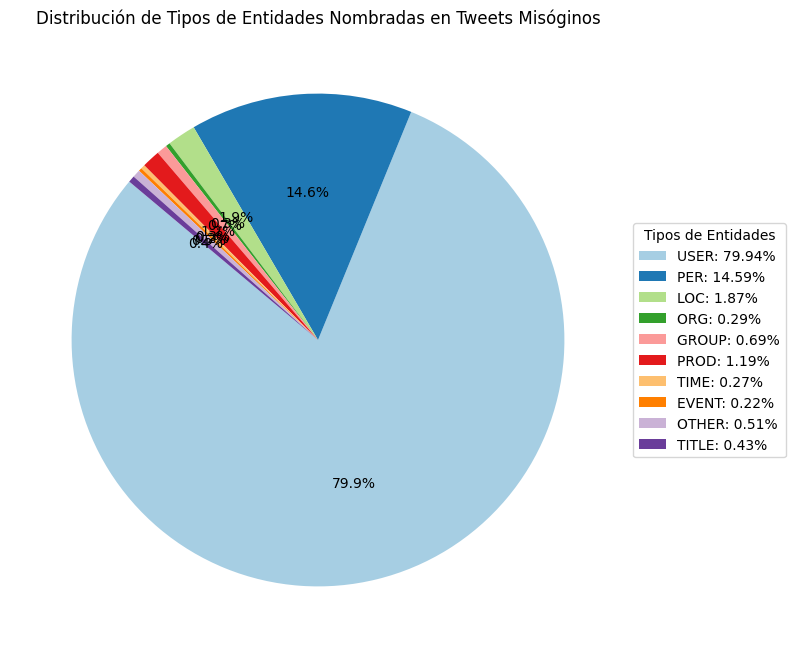

In [144]:
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(overall_entity_type_percentages_misogynous.values(), startangle=140, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
ax.set_title("Distribución de Tipos de Entidades Nombradas en Tweets Misóginos")
legend_labels = [f"{ent_type}: {percentage:.2f}%" for ent_type, percentage in overall_entity_type_percentages_misogynous.items()]
ax.legend(wedges, legend_labels, title="Tipos de Entidades", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()


-----------------------------------------------

### Tweets no misóginos

-----------------------------------------------


In [145]:
# NER en tweets no misoginos
text_not_misogynous = [text for text in df_ibereval[df_ibereval["misogynous"] == 0]["text"].tolist()]
results_ner_not_misogynous = [analyze_named_entities(text) for text in tqdm(text_not_misogynous)]


  1%|          | 15/1658 [00:00<00:22, 73.50it/s]

Texto analizado: Módulo 01 Invitados Directivos del Sindicato 'Mariano Otero' Tema: 'Mobbing o Acoso Laboral y Violacion a... https://t.co/xyHv9Inct3
Entidades encontradas: [('mariano otero', 'ORG')]
Texto analizado: @Causafiebres Claro, es que ha puesto imbécil y muchas se han dado por aludidas, por eso ahora están con ella a acoso y derribo.
Entidades encontradas: [('@causafiebres', 'USER')]
Texto analizado: Quiero pegarte pq estás bien imbécil y después darte un besito. 🙂
Entidades encontradas: []
Texto analizado: @PoderFeminazi Eso es! Cojones!
Entidades encontradas: [('@poderfeminazi', 'USER')]
Texto analizado: Miss perra: Valentinaaa amo mucho tu icon y header son re lindos,te mereces todo con tus ídolos y te mereces tanto abrazar a camila & ariana *al igual que todos tus ídolos*tu cuenta en general es perfecta y una de mis favoritas, eres una personita muy especial para mi+
Entidades encontradas: [('perra', 'PER'), ('valentinaaa', 'PER'), ('camila', 'PER'), ('ariana', 'PER')]
Te


  2%|▏         | 31/1658 [00:00<00:22, 72.42it/s]

Texto analizado: @Wachit0 @100Akshat @_Midoriyaa_ @NeohSJ La idea está la polla con cebolla pero obviamente no todos van a entrar por desconfianza, pero entrarán los que quieran ir y tengan confianza
Entidades encontradas: [('@wachit0', 'USER'), ('@100akshat', 'USER'), ('@_midoriyaa', 'USER'), ('@neohsj', 'USER')]
Texto analizado: @ngelSnchezC1 @jfitzgerald_86 @JavaliVerruga @LeticiaDolera No son horas de estar tocándonos en coño a 1 de enero, caballeros, dispérsense.
Entidades encontradas: [('@ngelsnchezc1', 'USER'), ('@jfitzgerald_86', 'USER'), ('@javaliverruga', 'USER'), ('@leticiadolera', 'USER'), ('enero', 'TIME')]
Texto analizado: le dije a mi mamá que extrañaba a un pibito y me tiró los pelos jajajajajajajjaja enseñandome como en los viejos tiempos perra
Entidades encontradas: []
Texto analizado: @Dlagox no sabes cuanto
Entidades encontradas: [('@dlagox', 'USER')]
Texto analizado: @vignaxnnayar No tenes nada que agradecer, te lo merecesssss blda !!! Te amo mas zorra💙💙
Entidades 


  2%|▏         | 39/1658 [00:00<00:22, 70.45it/s]


Texto analizado: @Reforma @aurelionuno No seas hijo de puta Nuño según tu eres representante de la educación puto viejo chismoso chupate mi verga.....
Entidades encontradas: [('@reforma', 'USER'), ('@aurelionuno', 'USER'), ('nuño', 'PER')]
Texto analizado: Entiendo que el acoso puede terminar en violación o muerte (en el peor de los casos) y las drogas normalmente dañan al que las consume. Uno es un daño infligido y el otro daño es autoinducido. https://t.co/BRv1dUD71r
Entidades encontradas: []
Texto analizado: @Barbijaputa Por culpa de los petardos tengo unos amigos locos por encontrar a su perrita. Se les escapó y salió huyendo por el ruido. https://t.co/pw4b7kWwoc
Entidades encontradas: [('@barbijaputa', 'USER')]
Texto analizado: DIPUTADOS.HIJOS DE PUTA Q. VAN A PROVOCAR A LOS GENDARMES . QUIENES SON ?? KMAXIMO DEL CAÑO MORO BREGMAN CUANDO LUCHARON ×LOS JUBILADOS??
Entidades encontradas: [('kmaximo del caño moro bregman', 'PER')]
Texto analizado: Pegarte en la cara con un sartén > v

  4%|▍         | 65/1658 [00:00<00:20, 78.31it/s]

Texto analizado: @OrgMujeresCI Estoy de acuerdo, pero no sé puede minimizar o relativizar la violación o el acoso sexual. Sea de rocas y famosas o no
Entidades encontradas: [('@orgmujeresci', 'USER')]
Texto analizado: @anaisbernal Pásalo muy bien,te lo mereces 😘😘
Entidades encontradas: [('@anaisbernal', 'USER')]
Texto analizado: @HuxGeneraI « hijo de perra. Por supuesto no lo haría, solo el muy bastardo se lo merecía por intentar siempre menospreciarle .... Si los golpes no funcionaban, habría de intimidarlo aún de la manera más repugnante —
Entidades encontradas: [('@huxgenerai', 'USER')]
Texto analizado: @erreleny @Fel_blan Buena descripción, aunque se te ha olvidado decir la puta moralina. Todos tienen que ENSEÑARTE y EDUCARTE con su puta moralina de los cojones. Es una serie muy milenial.
Entidades encontradas: [('@erreleny', 'USER'), ('@fel_blan', 'USER')]
Texto analizado: Esa gente insultando y condenando al asesino de Diana Quer pero que luego le quitan importancia al acoso, vio


  4%|▍         | 74/1658 [00:00<00:19, 79.50it/s]

Texto analizado: Una violación cada 8 horas en españa Más de 1000 asesinatos machistas desde 2003 Todas hemos sufrido acoso callejero alguna vez Pero oye, son casos aislados y somos unas exageradas porque 'vivimos en uno de los mejores países del mundo' https://t.co/mcSF1sGWQn
Entidades encontradas: [('españa', 'LOC')]
Texto analizado: @raykrai tú eres ninini: ni estudias, ni trabajas, ni haces puta gracia
Entidades encontradas: [('@raykrai', 'USER'), ('ninini', 'PER')]
Texto analizado: Hoy es lunes con l de LA PUTA MADRE KIRKMAN, CARL NO MERECIA MORIR
Entidades encontradas: [('lunes', 'TIME'), ('kirkman', 'PER'), ('carl', 'PER')]
Texto analizado: Ole tu, solo le falto decir que con Franco eso no pasaba https://t.co/27hVQOiL1K
Entidades encontradas: [('franco', 'PER')]
Texto analizado: A Benzema le va a nacer un embrión en la garganta de tanto chuparle la polla a Zidane
Entidades encontradas: [('benzema', 'PER'), ('zidane', 'PER')]
Texto analizado: @effeditallup Star Wars: crea un pers


  5%|▌         | 91/1658 [00:01<00:20, 77.98it/s]

Texto analizado: @Mzavalagc Oiga ¿y todas las victimas de acoso y violacion consecuencia de la espiral de violencia desatada por @FelipeCalderon para desviar la atención del fraude de 2006? Esas que no tienen voz por no ser figura pública ¿usted ahora sí las va a represen
Entidades encontradas: [('@mzavalagc', 'USER'), ('@felipecalderon', 'USER')]
Texto analizado: Hijos de puta! Os merecéis lo peor... Q asco me dais! 😭😠 https://t.co/MOHv2yINgd
Entidades encontradas: []
Texto analizado: @TimoFARC @ONU_es @antonioguterres Cinico hijo de puta lo unico que te mereces es indumil corrido
Entidades encontradas: [('@timofarc', 'USER'), ('@onu_es', 'USER'), ('@antonioguterres', 'USER')]
Texto analizado: @KobaML Claro, es un hoyo(coño) que se abre con una tuneladora(polla) sin consentimiento de la naturaleza. Una macabra violación de libro.
Entidades encontradas: [('@kobaml', 'USER')]
Texto analizado: Mira estoy hasta los cojones de que por enseñar una teta y no ser tío me llamen guarra,por ense


  7%|▋         | 109/1658 [00:01<00:19, 78.14it/s]

Texto analizado: 'No eres una perra para advertir enseñando los dientes. Ahora, ven conmigo. Siéntate, observemos a los humanos celebrar su nuevo ciclo anual.'
Entidades encontradas: []
Texto analizado: @cristinadevonne Ni tú eres perra ni yo soy un gato, mi corazón de repuesto, se muere por latir siempre a tu lado.
Entidades encontradas: [('@cristinadevonne', 'USER')]
Texto analizado: @anaisbernal Esta es la justicia en españa para estos indeseables una puta verguenza
Entidades encontradas: [('@anaisbernal', 'USER')]
Texto analizado: @ViktorBautista @DGii Hijo de perra como tú eres una botella...te conviene
Entidades encontradas: [('@viktorbautista', 'USER'), ('@dgii', 'USER')]
Texto analizado: @el_pais Más d 17 denuncias por acoso sexual incluyendo Una violacion a su propia esposa y una relación promiscua con su hija Ivanka.Universidad y fundación Trump en NY cerrados por fraude y lavado d dinero,Siete bancarrotas,este delincuente tiene d todo 
Entidades encontradas: [('@el_pais', 'U


  8%|▊         | 126/1658 [00:01<00:20, 73.99it/s]

Texto analizado: @PhilipMarlowe10 @quimforn Tu eres un poco bastante hijo de la gran puta no? Y no es una pregunta cabronazo. Es una jodida afirmación #alertaporhijodeputa #alertacabronazo #alertatuputamadre
Entidades encontradas: [('@philipmarlowe10', 'USER'), ('@quimforn', 'USER')]
Texto analizado: La puta escena en la que la asiática salva a Finn? Pero tu eres subnormal o como va?
Entidades encontradas: [('finn', 'PER')]
Texto analizado: Y por la PEDERASTIA, VIOLACIÓN y ACOSO IMBÉCIL @SandovalIniguez?? Por esos PECADOS DEBERÍA TEMBLAR TU IGLESIA de VERGÜENZA!! @Pontifex_es Póngales un bozal a esos curas hocicones, lengua de diablos, machines, misóginos, homófobos, DENIGRAN su Iglesia y OFENDEN a la Sociedad #Asco https://t.co/96KjZa8rFq
Entidades encontradas: [('@sandovaliniguez', 'USER'), ('@pontifex_es', 'USER')]
Texto analizado: Que guarra tienes que ser en el catre — Cuando quiero con quien quiero https://t.co/nBUSE7ejJb
Entidades encontradas: []
Texto analizado: @AndyToughCooki


  9%|▊         | 142/1658 [00:01<00:21, 71.54it/s]

Texto analizado: @DonHarbano @iqsolita Jajajaja hijo de perra deja de enseñar mis alternas!
Entidades encontradas: [('@donharbano', 'USER'), ('@iqsolita', 'USER')]
Texto analizado: Las mujeres son libres de vestirse como se les de la puta gana. https://t.co/ekqJuPDuYa
Entidades encontradas: []
Texto analizado: @LaailaMontiel Ensuciar a alguien por resentida por así decirlo o algún motivo que no sea acoso , violación o maltrato es una pelotudes tremenda !!! Dejen vivir a la gente que no hizo nada y ensucien al que en verdad se lo merece.
Entidades encontradas: [('@laailamontiel', 'USER')]
Texto analizado: hijo de puta t dije q te iba a enseñar de sonido
Entidades encontradas: []
Texto analizado: 'Y ésta canción se la dedico a mi perra (Laika) . Tú eres mi Laiki Mi Laiki , Laiki , Laiki . Mi Laiki , Laiki , Laiki Perra perra perra Lai Lai ' Ahr lo que es estar al pedo. ' :v https://t.co/fN6Mj5tRQt
Entidades encontradas: [('laika', 'PER'), ('laiki', 'PER'), ('laiki', 'PER'), ('laiki', 'PE


  9%|▉         | 150/1658 [00:02<00:23, 63.73it/s]

Texto analizado: Antonio Caballero y como ser de mal gusto e ignorante a la vez. Claro que no es lo mismo acoso sexual y violación pero hay varias conductas que componen la violencia sexual.
Entidades encontradas: [('antonio caballero', 'PER')]
Texto analizado: Es estúpido pensar que te tratan de inmaduro, o que haces acoso cibernético. No todos somos perfectos, y esta bien. Vos con aquel tweet te fuiste al carajo, pero bueno, todos cometemos errores. @itsjoelpimentel
Entidades encontradas: [('@itsjoelpimentel', 'USER')]
Texto analizado: @RebecaS72720624 @TowandaRebels En serio lo de ser puta te parece Bien ? Gran Trabajo del regimen Franco-Hitler ...
Entidades encontradas: [('@rebecas72720624', 'USER'), ('@towandarebels', 'USER'), ('franco-hitler', 'PER')]
Texto analizado: Relaja la polla que nadie se merece a semejante imbecil como tú, no te preocupes que nadie se va a acercar a un idiota integral https://t.co/Y5A65WAUtj
Entidades encontradas: []
Texto analizado: @anaisbernal @Amparo


 10%|▉         | 164/1658 [00:02<00:25, 59.44it/s]

Texto analizado: Literal vivimos en un mundo donde si una chica es violada es 'por perra', 'por descuidada', siempre tiene la culpa la chica agredida, nunca el que agrede... sinceramente la gente que piensa así me da un puto asco.
Entidades encontradas: []
Texto analizado: La insistencia en flirsteo sin correspondencia es: Acoso - La violación es un delito- No admito otra interpretación que justifique estas situaciones- Ver video https://t.co/TVx2jFE2aM
Entidades encontradas: []
Texto analizado: @Mata974 @lorefeliz @iuandalucia @ciktricstrans @Barbijaputa @iunida @PSOE @ahorapodemos Zorra y puta no son machistas? Vaya hombre, el premio a la feminista del año ya tiene dueño
Entidades encontradas: [('@mata974', 'USER'), ('@lorefeliz', 'USER'), ('@iuandalucia', 'USER'), ('@ciktricstrans', 'USER'), ('@barbijaputa', 'USER'), ('@iunida', 'USER'), ('@psoe', 'USER'), ('@ahorapodemos', 'USER')]
Texto analizado: Tanta denuncia de acoso sexual y violación y yo tengo un año sin coger.
Entidades en


 10%|█         | 171/1658 [00:02<00:25, 57.77it/s]

Texto analizado: @Judasthefucker a ver si vas a tener que reflexionar sobre no hacer caso a 4 tonterias que diga y no tener ni puta idea de quien es
Entidades encontradas: [('@judasthefucker', 'USER')]
Texto analizado: -¿porque los hombres se casan con las mujeres? -porque las cabras no saben fregar los platos.
Entidades encontradas: []
Texto analizado: @zombyerss hola zombie eres un ovni te pego en la cara a ver si empiezas con esta batalla yea
Entidades encontradas: [('@zombyerss', 'USER')]
Texto analizado: @camilaarbonaa8 Por acoso y violación a la intimidad
Entidades encontradas: [('@camilaarbonaa8', 'USER')]
Texto analizado: @IrantzuVarela Hay dictadores que han hecho menos daño a la sociedad que tú, con tu pensamiento nazi. Coño ya! muy buen argumento
Entidades encontradas: [('@irantzuvarela', 'USER')]
Texto analizado: @enbocadetodosof Ptm que hace ese Seudo conductor dizque de Santi. Escoria de ATV. Cómo jalaron a ese imbecil que hablo mal de Guerrero y la selección !!
Entidades


 11%|█         | 185/1658 [00:02<00:24, 59.78it/s]

Texto analizado: Al dueño borracho d este coche q m acabo d encontrar abandonado en una cuneta: mereces lo q t ha pasado hijo d puta. X suerte nadie se cruzó en tu camino. https://t.co/YlGaDuRUGw
Entidades encontradas: []
Texto analizado: @HowToSnorlax @s0ymia Diego me caguen tu puta madre callate ya ostia puta me caguen diso
Entidades encontradas: [('@howtosnorlax', 'USER'), ('@s0ymia', 'USER'), ('diego', 'PER')]
Texto analizado: El mismo chorro cara dura nos viene a vender las cadenas que nos robó en invierno, ojalá pronto terminés donde merecés hijo de re mil puta
Entidades encontradas: []
Texto analizado: @BusiPiscinas Será el texto? 🤔 Que la gente es muy guarra...
Entidades encontradas: [('@busipiscinas', 'USER')]
Texto analizado: @Relatofeminista Su puta madre (No lo paro de oír).
Entidades encontradas: [('@relatofeminista', 'USER')]
Texto analizado: @Pajaropolitico En México no solo es acoso y/o violación sino hasta feminicidio y dónde están los gritos de justicia, no se llevaro


 12%|█▏        | 199/1658 [00:02<00:24, 59.99it/s]

Texto analizado: Mmm.. espera, ¿cómo dices? https://t.co/EqktqoDn6t
Entidades encontradas: []
Texto analizado: Espero que tengan un buen año y reciban lo que merezcan menos yo porque yo me jodería por puta JAJAJAJAJJAJAAJAJAJAJJAJAJAJA
Entidades encontradas: []
Texto analizado: @miquelreyes23 miquel reyes ni puta idea de quien eres pero me estoy descoñando te mereces mi follow
Entidades encontradas: [('@miquelreyes23', 'USER'), ('miquel reyes', 'PER')]
Texto analizado: Ya cállate a la verga pls men, quiero comer en puta paz
Entidades encontradas: []
Texto analizado: @LeticiaDolera Es la que interpreto a la hija de Arnold. Por aquel entonces tenia 14 años.
Entidades encontradas: [('@leticiadolera', 'USER'), ('arnold', 'PER')]
Texto analizado: Me parece mal que veáis cultura de violación por ahí y hasta os parezca gracioso que violen a mujeres. Soys escoria.
Entidades encontradas: []
Texto analizado: Que hijos de puta como estos estén en la calle solo pueden provocar este tipo d cosas. E


 13%|█▎        | 213/1658 [00:03<00:24, 59.51it/s]

Texto analizado: ¡¡SEMEN!! Movimiento machista internacional. Únete.
Entidades encontradas: []
Texto analizado: @anaisbernal Claaaarooo como no le gritó estaba actuando de manera respetuosa... porque si yo te digo zorra mentirosa pero te lo digo suavecito no paaaasaaaa naaaadaaaa... que falta de empatía tan deleznable. Esta no es la justicia que queremos
Entidades encontradas: [('@anaisbernal', 'USER')]
Texto analizado: Cuando Albiol deje la política le pueden contratar como director de Okdiario porque lo de inventarse cosas y difamar se le da de puta madre.
Entidades encontradas: [('albiol', 'PER'), ('okdiario', 'ORG')]
Texto analizado: @vozdelatierra Basura, tú eres quien no tiene la talla para representarnos en el Congreso, no haz hecho ni mierda en tu perra vida!
Entidades encontradas: [('@vozdelatierra', 'USER')]
Texto analizado: Sois unos farsantes hijos de puta que merecéis mi más profundo desprecio. Durante un año he sido vuestro bufón. ¡Me avergüenza no haber tenido el coraje 


 14%|█▎        | 225/1658 [00:03<00:26, 54.16it/s]

Texto analizado: Insisto, maldita la hora en la que, por culpa de los propios peruanos, tengamos un Congreso lleno de escoria. Al... https://t.co/KCJ4uZDEmL
Entidades encontradas: []
Texto analizado: Y llega cantando. Lo mato. Que te calles ya hasta la puta gala, que me vas a dar el día #OTDirecto18D
Entidades encontradas: []
Texto analizado: LA PUTA MADRE LO Q HABÍA LLORADO XQ ENCIMA LO RE AMABA A RAMA SE MERECÍA EL MUNDO https://t.co/zXG0vg0VgD
Entidades encontradas: [('rama', 'PER')]
Texto analizado: @reuvenmx Ya càllate hijo de tu puta perra madre a nadie le importa culero!
Entidades encontradas: [('@reuvenmx', 'USER')]
Texto analizado: ¿Habéis votadoya a algún hombre del PP? ¡Aunque sea Esperanza el partido vela por nuestro machismo! ¡DALES TU VOTO! #CONFIA
Entidades encontradas: []
Texto analizado: En la perrera de mi corazón, tú eres la perra que más ladra. #BatiArjona
Entidades encontradas: []
Texto analizado: Funcionaria denuncia acoso y violación en el Poder Judicial: 'Me vio


 14%|█▍        | 231/1658 [00:03<00:28, 50.95it/s]

Texto analizado: @AjitPaiFCC mereces morirte pedazo de mierda hijo de puta ojalá te entren un millón de tumores en el p uto cerebro hijo de la gran zorra.
Entidades encontradas: [('@ajitpaifcc', 'USER')]
Texto analizado: @LaDivinaDiva Callate maldita perra. O seguro eres un pobre marico detras de un user femenino. Chavista colaborador
Entidades encontradas: [('@ladivinadiva', 'USER')]
Texto analizado: Ya era hora coño una puta actuación como se merecía bravo Cepeda. #OTGala9
Entidades encontradas: [('cepeda', 'PER')]
Texto analizado: @laverde1976 Podrá sentir lo que usted quiera, pero no es violación ni acoso sexual. Y es usted quien debe detenerlo.
Entidades encontradas: [('@laverde1976', 'USER')]
Texto analizado: Sacar a un imbécil borracho no es la mejor idea para acreditar la realidad del acoso que practican los golpistas de la estelada. https://t.co/SVF5zLapb2
Entidades encontradas: []
Texto analizado: @anaisbernal Esto no puede ser ni puta vergüenza tienen estos jueces
Entidades 


 15%|█▍        | 242/1658 [00:03<00:28, 49.02it/s]

Texto analizado: @feminiciD10S @jimenaofficial Callate hijo de tu puta madre una mas con jimena y te parto tu madre
Entidades encontradas: [('@feminicid10s', 'USER'), ('@jimenaofficial', 'USER'), ('jimena', 'PER')]
Texto analizado: Ves pues si denunciamos el acoso sexual y la violación sexual, acabaremos con la especie humana... lo mismo dijeron del voto femenino, la unión marital y el lenguage incluyente claro está! https://t.co/u3ZoTEGPZm
Entidades encontradas: []
Texto analizado: @TowandaRebels Justamente los violadores son la escoria de los hombres, la forma más baja de vida animal
Entidades encontradas: [('@towandarebels', 'USER')]
Texto analizado: @Relatofeminista Hay que ser un verdadero imbécil para hacer 'bromas' con un asunto tan serio como el acoso callejero, y encima se creerá gracioso y todo pfff
Entidades encontradas: [('@relatofeminista', 'USER')]
Texto analizado: Ahhh claro, captas eso pero no todos los malditos palos que te tiro y andas con el que 'te boludean', te peg


 15%|█▌        | 252/1658 [00:03<00:29, 46.88it/s]

Texto analizado: @Tomichillado @agusbertin_ Sos un hijo de puta pero te mereces q te de un sanguche de milanesa
Entidades encontradas: [('@tomichillado', 'USER'), ('@agusbertin', 'USER')]
Texto analizado: @HenriFalconLara No digas nada que tú eres cómplice de lo que está pasando... y recuerda seguirás siendo la perra más perra de Venezuela
Entidades encontradas: [('@henrifalconlara', 'USER'), ('venezuela', 'LOC')]
Texto analizado: @ElInformanteMX @Cabify_Mexico Pinche bastardo ojalá un dia me lo tope para enseñarle a no ser un hijo de su puta madre
Entidades encontradas: [('@elinformantemx', 'USER'), ('@cabify_mexico', 'USER')]
Texto analizado: @diegobranca Cállate pedazo de hijo de puta lacras como me gustaría encontrarte Sorete mal cagado esta noche te busco por América bancatela Cagon
Entidades encontradas: [('@diegobranca', 'USER'), ('américa', 'LOC')]
Texto analizado: @BrokenDreamss__ Mina: ¡YO QUE CARAJOS SE! ¡NO TENGO NI PUTA IDEA DEL PORQUE ME QUIEREN A MI! ¡HASTA PIENSO QUE TU


 16%|█▌        | 267/1658 [00:04<00:23, 59.89it/s]

Texto analizado: El arbol este es un pesao, por que tiene bigote? — Cállate la puta boca y disfruta del best gaem https://t.co/sOysnbMbGJ
Entidades encontradas: []
Texto analizado: @garciabanchs Tu eres un grandisimo hijo de puta!!! Porque no intervienes al coñosimo de la madre q te parió? A estas alturas los animales piensan q una guerra es la opción!!!
Entidades encontradas: [('@garciabanchs', 'USER')]
Texto analizado: Vergüenza da cerrar el 2017 con el asesinato de Diana Quer, la violación de los San Fermines y el acoso que aun hay, ya es hora de pararlo, mujeres y hombres por el feminismo, por la IGUALDAD, porque locos hay pocos, pero han causado demasiada desgracia ya #noalaviolenciamachista
Entidades encontradas: [('diana quer', 'PER'), ('san fermines', 'EVENT')]
Texto analizado: @joohexnlee // QUE NO TE PEGO UNA PEGATINA EN LA CARA NO MÁS
Entidades encontradas: [('@joohexnlee', 'USER')]
Texto analizado: Movimiento SEMEN! https://t.co/O9SInApXXR
Entidades encontradas: []
Texto an


 17%|█▋        | 282/1658 [00:04<00:20, 66.31it/s]

Texto analizado: @Barbijaputa Chica, la verdad me da igual que tengas coño o falo y pelotas, lo importante para mí es lo escribes y la verdad lo haces más bien con el cerebro que con los genitales. Así sigue dando guerra!
Entidades encontradas: [('@barbijaputa', 'USER')]
Texto analizado: Tenés que ser muy hijo de puta para decir que eras su novio, le cagaste la vida chabón. Y te mereces lo peor corta.
Entidades encontradas: []
Texto analizado: @MaestroChuli A mi ponme la polla en la cara y ya veremos quien no ve nada.
Entidades encontradas: [('@maestrochuli', 'USER')]
Texto analizado: Nombre a buena perra hora se le ocurre a mi hermano mayor enseñarle a manejar a mi otro hermano:( adiós mundo cruel
Entidades encontradas: []
Texto analizado: @salvameoficial Esto es lo que os merecéis en la puta boca los de salvame? https://t.co/DbYLJIkwhz
Entidades encontradas: [('@salvameoficial', 'USER')]
Texto analizado: @IaraPicatto1 Callate que yo tmb te extraño perra
Entidades encontradas: [('@iar


 18%|█▊        | 297/1658 [00:04<00:19, 68.94it/s]

Texto analizado: @nikolas79jf Imbécil nivel escoria de alcantarilla
Entidades encontradas: [('@nikolas79jf', 'USER')]
Texto analizado: Yo veo a mujeres destruidas por acoso laboral y callejero. Otras con depresión debido a violación sexual o maltrato físico. Y conocí a varias que se suicidaron por este tipo de comportamientos machistas. Vas a seguir con tu show pobre? https://t.co/JE6MEgvIh4
Entidades encontradas: []
Texto analizado: Qué bueno que vives lejos por qué tengo ganas de pegarte en la cara por marik😡😡
Entidades encontradas: []
Texto analizado: @Pankedios @Barbijaputa La historia popular se la inventa el pueblo. Ella decide inventarse su parte, aprovechando para provocar a gente como tú. Yo soy un tio y me molesta ver como os poneis a corregir ciertas gilipolleces mientras q luego os escandaliza
Entidades encontradas: [('@pankedios', 'USER'), ('@barbijaputa', 'USER')]
Texto analizado: Por favor... http://t.co/NS6D55DTdu
Entidades encontradas: []
Texto analizado: @BebeVitaReal


 19%|█▉        | 313/1658 [00:04<00:18, 72.25it/s]

Texto analizado: @el_dinamo Callate viejo culiao. Hijo de puta. Las mil perras q te parieron....complice de asesinatos y torturas a compatriotas. Muerete de una vez.....maldito.
Entidades encontradas: [('@el_dinamo', 'USER')]
Texto analizado: @passion_vigna Igual lei que le decian perra a laurita ipocrita que no se merecia el bailando cornuda muchas cosas feas y lei cosas de las fans de lau tambien es horrible
Entidades encontradas: [('@passion_vigna', 'USER'), ('laurita', 'PER'), ('bailando', 'EVENT'), ('lau', 'PER')]
Texto analizado: Acusan al exrapero y productor musical Russell Simmons por violación y acoso sexual https://t.co/9LHdi1VyyQ https://t.co/ZUgreTzoEo
Entidades encontradas: [('russell simmons', 'PER')]
Texto analizado: RT SEMEN!! Una ayuda para expandir un movimiento necesario @ElMachistaQamas
Entidades encontradas: [('@elmachistaqamas', 'USER')]
Texto analizado: Los exjugadores de la #Arandina acusados de un delito de #abuso #sexual conocían la edad de la menor. Ninguno 


 20%|█▉        | 329/1658 [00:05<00:17, 74.13it/s]

Texto analizado: @alvaro_delgado @NegroMontesMX @ManceraMiguelMX 'operativo'??? Eso es acoso, prepotencia y violacion a derechos civiles. Esos sujetos que fungen como policía son para secuestrar.
Entidades encontradas: [('@alvaro_delgado', 'USER'), ('@negromontesmx', 'USER'), ('@manceramiguelmx', 'USER')]
Texto analizado: @grunppy @Antoniuruizd @Relatofeminista 'Yo soy puta y feminista. Ser puta es el trabajo más feminista que existe no lo sabíais? ' Las idioteces que hay que leer pfff 😒😒😒
Entidades encontradas: [('@grunppy', 'USER'), ('@antoniuruizd', 'USER'), ('@relatofeminista', 'USER')]
Texto analizado: ¿Desde cuando una chica es zorra por el simple hecho de tener amistades con pene? Las mujeres podemos tener amigos hombres sin necesidad de que haya algo más que una simple amistad, que triste que ella no pueda tener amigos famosos sin que la tachen de zorra y robafama https://t.co/arYrEY8Lhy
Entidades encontradas: []
Texto analizado: @3LigasEn10Anos @alvaroojeda80 Tu eres el alemán


 21%|██        | 346/1658 [00:05<00:17, 76.17it/s]

Texto analizado: @LeticiaDolera @ofdachurch Si no fuera porque no tiene ni puta gracia, me reiría
Entidades encontradas: [('@leticiadolera', 'USER'), ('@ofdachurch', 'USER')]
Texto analizado: una chica dijo que no le gustaron los chistes sobre acoso y violación en el video de Rubén y esto le contestaban algunos de sus fans https://t.co/F2SKl21D4B
Entidades encontradas: [('rubén', 'PER')]
Texto analizado: @asukasexual comemela tu a mi mamon XDDDD
Entidades encontradas: [('@asukasexual', 'USER')]
Texto analizado: @LeticiaDolera Educar en igualdad. Nada más. Enseñar a respetar.
Entidades encontradas: [('@leticiadolera', 'USER')]
Texto analizado: Tengo el Twitter de Celeste en mi celular y yo no puedo creer que con poner 'Milton callate' se llene de favs, la puta madre
Entidades encontradas: [('twitter', 'PROD'), ('celeste', 'PER'), ('milton', 'PER')]
Texto analizado: @takenbypilots EL DE LA IZQUIERDA TE PEGO UNA PATADA EN LA CARA QUE COSITA MONA AHRSJLSV
Entidades encontradas: [('@takenby


 22%|██▏       | 362/1658 [00:05<00:17, 73.39it/s]

Texto analizado: Entendía la diferencia entre acoso, violación y coqueteo hasta que la nación del fuego atacó.
Entidades encontradas: []
Texto analizado: @LeticiaDolera Madre mia! Y mi hijo me quiere dar nietos! Pero si el mundo es una puta mierda😱😡
Entidades encontradas: [('@leticiadolera', 'USER')]
Texto analizado: @EsDeNegritos un RT para difundir SEMEN! Movimiento machista internacional. Únete como activista!!
Entidades encontradas: [('@esdenegritos', 'USER')]
Texto analizado: @LaRetuerka @mivecinayyo @MonederoJC Tú eres un hijo de perra!!!
Entidades encontradas: [('@laretuerka', 'USER'), ('@mivecinayyo', 'USER'), ('@monederojc', 'USER')]
Texto analizado: @gabii_Rp Mereces ser cartonero hijo de puta jaja
Entidades encontradas: [('@gabii_rp', 'USER')]
Texto analizado: Vamos la puta madre, te lo mereces flor 💖
Entidades encontradas: [('flor', 'PER')]
Texto analizado: Si nunca has sido víctima de acoso, abuso o violación es complicadísimo que entiendas el dolor, miedo e impotencia que


 23%|██▎       | 379/1658 [00:05<00:16, 77.48it/s]

Texto analizado: El acoso cibernético y la violación a la intimidad son faltas graves. #DENÚNCIALO
Entidades encontradas: []
Texto analizado: Ahora soplar verdades y evidencias en la cara de los homeópatas es acoso y violencia. https://t.co/XC0Bz4beFO Pobrechitos que han vendido un 14% menos de sus “medicamentos INVENT” y ahora se quejan... #STOPBullyingHomeopático ⚪️
Entidades encontradas: []
Texto analizado: @JKCorden Oh por favor cinico de mierda !!! Pegarte una patada en la cara seria poco.Que asco de tipo
Entidades encontradas: [('@jkcorden', 'USER')]
Texto analizado: Gracias a dios mis papas me enseñaron hablar bastante bien y no ando por la calle gritandome puta con 'amigas' 😊
Entidades encontradas: []
Texto analizado: @generoenaccion @Barbijaputa A mi anterior perra guía la teniamos que atar para que no se escapara del panico que le daba. Charley al menos lo lleva mejor.
Entidades encontradas: [('@generoenaccion', 'USER'), ('@barbijaputa', 'USER'), ('charley', 'PER')]
Texto ana


 24%|██▍       | 396/1658 [00:05<00:15, 79.59it/s]

Texto analizado: 3 estoy hasta la polla que para la prensa @MichelGonzalez hasta cuando se nos caga en la cara nos está dando una lección de humildad y saber estar y 4 si algún día ahí una manifestación por algo importante de verdad (sanidad, educación o derechos laborales) espero que no vaya...
Entidades encontradas: [('@michelgonzalez', 'USER')]
Texto analizado: @finger_pies @Martattack88 @Relatofeminista @selenamanero14 Las mujeres son mujeres tengan polla o no, no son mujeres atrapadas en cuerpos de hombre ni hombres q se sienten mujeres, por dios que me están sangrando los ojos de leer tal pego. Y cuidao, que 
Entidades encontradas: [('@finger_pies', 'USER'), ('@martattack88', 'USER'), ('@relatofeminista', 'USER'), ('@selenamanero14', 'USER')]
Texto analizado: hasta la polla que pongáis en las noticias PRESUNTA violacion os tiraba una piedra
Entidades encontradas: []
Texto analizado: @IU_Madrid Que panda de hijos de puta estáis hechos. El único sitio en el que merecía estar es ent


 25%|██▍       | 413/1658 [00:06<00:15, 79.67it/s]

Texto analizado: #HaceMuchoQue no me la comes
Entidades encontradas: []
Texto analizado: Me preguntaron por qué mi perro tiene collar rosado y mi perra uno verde. 'No será al revés?'. No amis porfa callate.
Entidades encontradas: []
Texto analizado: @logela También he visto usar “escarceos amorosos” para referirse a sus intentos de violacion y acoso. Es penoso.
Entidades encontradas: [('@logela', 'USER')]
Texto analizado: @LeticiaDolera @policia @zoidoJI A saber el “orden “ que pone en su casa ante su familia. Hijo de puta cobarde!!!!
Entidades encontradas: [('@leticiadolera', 'USER'), ('@policia', 'USER'), ('@zoidoji', 'USER')]
Texto analizado: @jesus_prez Tú eres grande tt y @23_ricard tú comemela con mucho amor 💕
Entidades encontradas: [('@jesus_prez', 'USER'), ('@23_ricard', 'USER')]
Texto analizado: Me desagradan las personas que ven una publicación de un perrito y van y comentan una foto del suyo, callate perra falta de atención, no me interesa ver tu adorable perro, en este mome


 26%|██▌       | 429/1658 [00:06<00:15, 77.48it/s]

Texto analizado: hay que cortarle los huevos con un alicate a los que dicen que las mujeres denuncian acoso y violación solo porque el tipo es feo.
Entidades encontradas: []
Texto analizado: @SergioRamos Hundido ? Tu como los gorrinos, te mezclas con la mierda,bueno tu eres la mierda, hijo de puta. Das asco como persona eres escoria. Sólo eres basura
Entidades encontradas: [('@sergioramos', 'USER')]
Texto analizado: @JonatanViale @Intratablestv Cállate lacra hijo de puta. Mercenario, forro indigno
Entidades encontradas: [('@jonatanviale', 'USER'), ('@intratablestv', 'USER')]
Texto analizado: @Valeria_Martell @NopaIep Si, estoy de acuerdo. A ningún hombre le pasaría por la cabeza que una mujer es puta por subir fotos semi desnuda. Libertad y respeto.
Entidades encontradas: [('@valeria_martell', 'USER'), ('@nopaiep', 'USER')]
Texto analizado: Me obligan a tragar polla y me mean en la cara 😮 https://t.co/8SHYnivgXa
Entidades encontradas: []
Texto analizado: @carolino54 Tio ke Guarra ke er


 27%|██▋       | 445/1658 [00:06<00:16, 75.50it/s]

Texto analizado: @schwarzferd @SalvadorAlianza @radioamericahn Si tu no eres hondureño porque no quedas con la puta trompa callada
Entidades encontradas: [('@schwarzferd', 'USER'), ('@salvadoralianza', 'USER'), ('@radioamericahn', 'USER')]
Texto analizado: Desde el New York Times y The New Yorker publicó por primera vez las acusaciones de acoso sexual y violación contra Harvey Weinstein por Rose McGowan, Gwyneth Paltrow, Ashley Judd y docenas de otros, el productor desgracia ha sido despedido de su empresa y fiscal d ...
Entidades encontradas: [('new york times', 'ORG'), ('the', 'ORG'), ('new yorker', 'ORG'), ('harvey weinstein', 'PER'), ('rose mcgowan', 'PER'), ('gwyneth paltrow', 'PER'), ('ashley judd', 'PER')]
Texto analizado: «Q paso mi lic no lo veo desde el año pasado jejeje» Sí sí cállate hijo de perra
Entidades encontradas: []
Texto analizado: Chaval equipos que piensan con la parte imbécil de la polla chaval
Entidades encontradas: []
Texto analizado: SEMEN. Difundamos un movim


 28%|██▊       | 461/1658 [00:06<00:16, 74.45it/s]

Texto analizado: @PrincipeVaron @_Brix__ @Re152005 @Barbijaputa @Yiyefly Coño eso parece un lobo xdios..donde esta el lazo del pelo ehhhh 😈😈😈😈😈
Entidades encontradas: [('@principevaron', 'USER'), ('@_brix', 'USER'), ('@re152005', 'USER'), ('@barbijaputa', 'USER'), ('@yiyefly', 'USER')]
Texto analizado: @GustavoBruzone No digas tonterías. HAY QUE DEFENDER A LOS JUBILADOS DE EDTOS REPRESORES PROVOCSDORES SINIESTROS HIJOS DR PUTA
Entidades encontradas: [('@gustavobruzone', 'USER')]
Texto analizado: @acciomalfxy JAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJA LA PUTA MADRE TE LO MERECES POR USARME COMO MEME SIEMPRE
Entidades encontradas: [('@acciomalfxy', 'USER')]
Texto analizado: @samantavillar @dicaro101 @cielikolindo @TradxAbolicion @NIKITALY_FM @1620emaraa @Abolicion_Prost El siendo puta por un día, pa cuándo?
Entidades encontradas: [('@samantavillar', 'USER'), ('@dicaro101', 'USER'), ('@cielikolindo', 'USER'), ('@tradxabolicion', 'USER'), ('@nikitaly_fm', 'USER'), ('@1620emaraa


 29%|██▉       | 478/1658 [00:06<00:15, 76.83it/s]

Texto analizado: Siempre su hija preferida tiene que tener todo,pero por que no entras en tu culo hijo de puta
Entidades encontradas: []
Texto analizado: Mi amor, ¿crees en el amor a primera vista? - ¡Claro! Si te hubiera mirado dos veces no me habría casado. #Humor
Entidades encontradas: []
Texto analizado: @eljueves Los ultras son escoria, cierto, pero no todos llevan tirantes con la bandera d españa, s os ve el plumero demasiado
Entidades encontradas: [('@eljueves', 'USER')]
Texto analizado: En resumen, que si tu novia te llama malparido imbécil o tu novio te llama zorra trimaldita, da igual. Si te mete bien es worth.
Entidades encontradas: []
Texto analizado: Igual no me la baja nada porque me estoy re perra está imbécil me va a venir a decir algo toca de acá
Entidades encontradas: []
Texto analizado: Ayer me estaba muriendo de una perra infección en la garganta y hoy me la peló, ya estoy mejor. 😎
Entidades encontradas: []
Texto analizado: El acoso callejero está a la orden del día


 30%|██▉       | 494/1658 [00:07<00:15, 77.19it/s]

Texto analizado: @gliclazida @dotfanny @el_pais Pero el escenario que describe no es de acoso. Es de violación y asesinos
Entidades encontradas: [('@gliclazida', 'USER'), ('@dotfanny', 'USER'), ('@el_pais', 'USER')]
Texto analizado: @EternoBlanco_ Cállate perra por un partido no hay vergüenza para alguien que lleva 5 titulos
Entidades encontradas: [('@eternoblanco', 'USER')]
Texto analizado: El karma existe, algún día recibirás lo que mereces por haber sido tan hijx de puta 😇
Entidades encontradas: []
Texto analizado: Iusport: << El israelí Gilady seguirá en el COI pese a las acusaciones de acoso y violación https://t.co/bW9ogxSuz3 >> https://t.co/pDTlcX2V77
Entidades encontradas: [('iusport', 'ORG'), ('israelí', 'OTHER'), ('gilady', 'PER'), ('coi', 'ORG')]
Texto analizado: @Pantolomeo Si no tuviéramos probabilidades de ser víctimas de acoso y violación NO TENDRÍAMOS MIEDO! Es un atentado contra la libertad de la mujer para hacer lo que quiera, sin tener que tener miedo de que alguien 


 30%|███       | 502/1658 [00:07<00:15, 76.36it/s]

Texto analizado: @FlanaganMcPhee @Zurine3 Necesito pintarme el coño y salir con el al aire
Entidades encontradas: [('@flanaganmcphee', 'USER'), ('@zurine3', 'USER')]
Texto analizado: NO TE PEGO UN SILLAZO EN LA CARA PORQUE RESPETO A LA SILLA
Entidades encontradas: []
Texto analizado: Mi hermana está escuchando la puta BSO de Guardianes de la Galaxia, cuando vence Star Lord a Ronan. LA ESTOY ENSEÑANDO BIEN.
Entidades encontradas: [('guardianes de la galaxia', 'TITLE'), ('star lord', 'TITLE'), ('ronan', 'PER')]
Texto analizado: #HaceMuchoQue no friegas el suelo
Entidades encontradas: []
Texto analizado: Violencia machista, acoso escolar, violación de derechos humanos, privación de libertades, homofobia, racismo, precariedad, corrupción ... Que en 2018 avancemos para terminar con todo esto. Salud y felicidad 😘❤️
Entidades encontradas: []
Texto analizado: @Zurine3 Gastarse la pasta en investigar en cosmeticos para el coño tiene cojones!! ¿No debería gastarse ese dinero en investigaciones m


 31%|███       | 518/1658 [00:07<00:16, 70.98it/s]

Texto analizado: No te pego un sillazo en la cara por respeto a la silla... https://t.co/EVIWYHR67A
Entidades encontradas: []
Texto analizado: @TowandaRebels esto pasa cuando no tienes ni puta idea de lo que hablas y pretendes ir de moderna y salvadora de las prostitutas y te pegan un zasca espectacular #HolaAbolicionista
Entidades encontradas: [('@towandarebels', 'USER')]
Texto analizado: Todos: -#NoTodosLosHombres -PPK, presidente de lujo -Perú no va al mundial 2017: Já, ilusos.
Entidades encontradas: [('mundial 2017', 'EVENT')]
Texto analizado: No voy a llorar y decir que no merezco esto porque es probable que lo merezcaPOR ZORRA
Entidades encontradas: []
Texto analizado: @YoconYunes no es contigo Pendejo con quien el gran Obrador deba debatir.. tu eres un corrupto más del sistema hijo de tu puta madre
Entidades encontradas: [('@yoconyunes', 'USER'), ('obrador', 'PER')]
Texto analizado: @Gremio ahora decidle al imbécil que tenéis de entrenador que ladre algo sobre Cristiano. A CHUPA


 32%|███▏      | 534/1658 [00:07<00:15, 74.68it/s]

Texto analizado: Agos te voy a extrañar bocha perra pero te mereces el mejor viaje de todos t amo mil, te voy a extrañar mucho mucho enserio https://t.co/PhRKFBNuYb
Entidades encontradas: [('agos', 'PER')]
Texto analizado: ¡¡¡Ahora si!!! ¡¡Hoy empieza la lucha!! Esto es cosa de hombres!!
Entidades encontradas: []
Texto analizado: Alice Glass acusa a su ex compañero en Crystal Castles de violación y acoso https://t.co/2plla8m1zB vía @PlayGrounder https://t.co/jeK56MtY0z
Entidades encontradas: [('alice glass', 'PER'), ('crystal castles', 'ORG'), ('@playgrounder', 'USER')]
Texto analizado: No tengo ninguna bronca sobre las actrices hablalndo del machismo, acoso y violación en Hollywood (como una manera de exponenciar la situación en otros ámbitos de trabajo) pero ¿Y las consecuencias a los perpetradradores? ¿Metieron a @WeinsteinFilms a la cárcel? #Accountability
Entidades encontradas: [('hollywood', 'LOC'), ('@weinsteinfilms', 'USER')]
Texto analizado: @TowandaRebels #arandina #pozobland


 33%|███▎      | 551/1658 [00:07<00:14, 77.00it/s]

Texto analizado: Mi amigo que veía las Muñecas de la Mafia la terminó y me dijo: 'We ahora entiendo, tú eres Lucrecia, la perra mayor que experiencia tiene, todos los que quisieron ser cómo tú fracasaron' Se los juró que me hizo la noche.
Entidades encontradas: [('lucrecia', 'PER')]
Texto analizado: @hugo_gonzalez1 @orgullorayado @Rayados @PUMAmexico @pumafootball CÀLLATE EL PUTO HOCICO HIJO DE TU PERRA MADRE PINCHE MANOS GUANGAS, LÀRGO DE MI EQUIPO PERRO! ..hoy ganamos.
Entidades encontradas: [('@hugo_gonzalez1', 'USER'), ('@orgullorayado', 'USER'), ('@rayados', 'USER'), ('@pumamexico', 'USER'), ('@pumafootball', 'USER')]
Texto analizado: @AriiSayago Ay callate perra si siempre voy a tu casa bueno hiba porque hsce cuanto no voy jajajaj
Entidades encontradas: [('@ariisayago', 'USER')]
Texto analizado: @panchielgana Te fuiste a las 3 hijo de puta callate
Entidades encontradas: [('@panchielgana', 'USER')]
Texto analizado: #ElSalvador: Jefe policial detenido por violación y acoso sexual h


 34%|███▍      | 568/1658 [00:08<00:13, 78.02it/s]

Texto analizado: @MichelGonzalez jodete!!!!estás donde mereces, EN LA PUTA CALLE
Entidades encontradas: [('@michelgonzalez', 'USER')]
Texto analizado: Mientras no te afecte, cállate la puta boca, que os la sude lo que haga la gente, pesaos, cansinos, callad ya uf
Entidades encontradas: []
Texto analizado: @PabloFonta86 @TowandaRebels pero tu eres un auténtico imbécil y un potencial machista? ideología de izquierdas? Tú eres una vergüenza.
Entidades encontradas: [('@pablofonta86', 'USER'), ('@towandarebels', 'USER')]
Texto analizado: @Duune_ @Juan3256426 @Emocristo CALLATE TU HIJO DE PERRA ay las mayus
Entidades encontradas: [('@duune', 'USER'), ('@juan3256426', 'USER'), ('@emocristo', 'USER')]
Texto analizado: @danlntifada @fatinascidi @manolivizoso @Zurine3 @Jvillaver2 https://t.co/HG4ljNlwR3, coño entonces tu eres de lo que te guias por el antes de cristo y despues de cristo,cuando llegamos los Españoles,y le contagiamos todas clases de enfermedades Europeas 
Entidades encontradas: [


 35%|███▌      | 585/1658 [00:08<00:13, 77.07it/s]

Texto analizado: - Deseo que los hombres se mueran por machirulos y opresores. + Y yo deseo pegarte una hostia con la mano abierta por imbécil y me contengo.
Entidades encontradas: []
Texto analizado: Yo a mi perra: tú eres mi regalo de reyes ♡ Mi madre: *con cara de asco* qué cursi...
Entidades encontradas: []
Texto analizado: no sé como enseñar a mi gata a que no se meta en la puta olla
Entidades encontradas: []
Texto analizado: Feliz Novidad @Juanpelota, tu eres una fuerte Perra https://t.co/keYmgcOiCS
Entidades encontradas: [('@juanpelota', 'USER')]
Texto analizado: la mujer es una perla no una perra
Entidades encontradas: []
Texto analizado: @iamyamille Últimamente a la gran mayoría de actores/cantantes famosos los están acusando de violación u acoso. Btw, gracias por responder
Entidades encontradas: [('@iamyamille', 'USER')]
Texto analizado: @ierrejon Día 8 de Diciembre a 3 Grados Celsius. Por favor Iñigo dime si esto es precariedad, acoso, violacion de derechos... y sí es el ejé


 36%|███▌      | 601/1658 [00:08<00:14, 74.92it/s]

Texto analizado: Acoso, violacion a la integridad de una persona, está siendo utilizada una persona para satisfacer el morbo de cientos , cochinada de canal doble moral https://t.co/fzZ72Ye89X
Entidades encontradas: []
Texto analizado: @kroketen Años llevo esperando el Winds of Winter y aquí estoy, callada como una perra.
Entidades encontradas: [('@kroketen', 'USER')]
Texto analizado: @Barbijaputa @lorenagm7 Wow, es que tienes el PRIVILEGIO de no poder enseñar la cara porque te han amenazado de muerte centenares de veces, vaya morro, qué vidorra, ¿eh? En fin.
Entidades encontradas: [('@barbijaputa', 'USER'), ('@lorenagm7', 'USER')]
Texto analizado: 'COMO???? NO NO NO PUEDE SER QUE CARAJO NO MERECIA ESO QUE HIJO DE PUTA' la reaccion de mi tia con >>>las series Mi hermano con >>>sus videojuegos Y yo con >>>los libros Diferent place same feeling
Entidades encontradas: []
Texto analizado: @Benavidesgraa 12 veces en media hora? Pero esta chica es la puta ama!!!! LOL
Entidades encontradas: [


 37%|███▋      | 618/1658 [00:08<00:13, 77.21it/s]

Texto analizado: El juez cita a declarar a la menor que denunció abusos por parte de jugadores de la #Arandina https://t.co/vD92Mxs04Q https://t.co/kbTiYIpwol
Entidades encontradas: [('arandina', 'LOC')]
Texto analizado: @Ndemoniado @Zurine3 Coño hay una GRAN cantidad de vídeos porno amateur y son bastante buscados la verdad, porque son chicas 'normales', la gente se imagina su vecina, su amiga, etc. Bueno, pero ¿que tiene que ver? Habláis del porno como tal no de sus cir
Entidades encontradas: [('@ndemoniado', 'USER'), ('@zurine3', 'USER')]
Texto analizado: @diarioas Buaffff con la Iglesia hemos topado los que dicen que son periodistas sois la mayoría no todos sois escoria
Entidades encontradas: [('@diarioas', 'USER')]
Texto analizado: @parejasexnovato Busca en https://t.co/l5H8kI9cz8. Pagina muy guarra. Talvez ahí
Entidades encontradas: [('@parejasexnovato', 'USER')]
Texto analizado: @Faitelson_ESPN Hijo de perra ya callate chingada madre! @cuauhtemocb10 dale otro santo puyazo mi emp


 38%|███▊      | 635/1658 [00:09<00:13, 78.25it/s]

Texto analizado: Los cargos menos grave son por violación a los artículos 1.35 y 1.36 del Código Penal (acoso sexual).
Entidades encontradas: []
Texto analizado: Cuando mi crush dice que esta buscando novia es como 'la puta madre mirame a mi aki estoy yo mi amor, donde tengo q anotarme'
Entidades encontradas: []
Texto analizado: @SadracH Cállate conchetumare e insulta a la madre perra culiá. Mamon culiao.
Entidades encontradas: [('@sadrach', 'USER')]
Texto analizado: @Wismichu Callate hijo de puta... Déjame dormir más coño
Entidades encontradas: [('@wismichu', 'USER')]
Texto analizado: @VickyGomes0 @matisztajn CALLATE HIJO DE RE MIL PUTA
Entidades encontradas: [('@vickygomes0', 'USER'), ('@matisztajn', 'USER')]
Texto analizado: Y esta es la parte que mi perra no para de torear y mi papá le grita 'cloe callate' y así hasta las 4 am
Entidades encontradas: [('cloe', 'PER')]
Texto analizado: @Alechaschas 12 años jugando a la Play le enseñaron bastante. Que hijo de remil puta!!!!!!
Entidade


 39%|███▉      | 651/1658 [00:09<00:13, 77.38it/s]

Texto analizado: @ejutv Ahora defiendes a la. Iglesia hijo. De perra? Eres una mierda, no mereces llamarte humano, en que mala hora habras nacido
Entidades encontradas: [('@ejutv', 'USER')]
Texto analizado: Russell Simmons recibe nueve denuncias más por violación y acoso sexual https://t.co/41y1DLKAYI
Entidades encontradas: [('russell simmons', 'PER')]
Texto analizado: @TetasHD Movimiento SEMEN RT please!
Entidades encontradas: [('@tetashd', 'USER')]
Texto analizado: Sidra el gaitero, comemela por el mundo entero
Entidades encontradas: []
Texto analizado: @Ializar @lauradlcalle @VenACenarTV Es incierto! Te olvidaste lo de ZORRA! Pero bueno si tú eres feliz así adelante! No voy há gastar mis energias cn alguien cm tú por alguien cm Carolina. Solo daba mi opinión! No me vale la pena. Buenas noches
Entidades encontradas: [('@ializar', 'USER'), ('@lauradlcalle', 'USER'), ('@venacenartv', 'USER'), ('carolina', 'PER')]
Texto analizado: @yonhy_lescano Tu eres el traidor hijo de puta... ubiera


 40%|████      | 667/1658 [00:09<00:13, 72.52it/s]

Texto analizado: @ivanzarak eres un cinico mereces que te caiga un rayo para que te mueras rabiblanco hijo puta. Perra la madre que te parió.
Entidades encontradas: [('@ivanzarak', 'USER')]
Texto analizado: @NexusSep @ximicomics @Barbijaputa Pues aki tenemos a los nietos y tataranietos de un genocida viviendo de puta madre
Entidades encontradas: [('@nexussep', 'USER'), ('@ximicomics', 'USER'), ('@barbijaputa', 'USER')]
Texto analizado: Ahhh.siiii...el idiota de antes. Te paso las fotos de esta noche. Tu eres un hijo de puta especial. Pra ti si....
Entidades encontradas: []
Texto analizado: No hay nada que merezca más la pena, que mi perra 🖤
Entidades encontradas: []
Texto analizado: Ni tú eres una zorra hambrienta ni yo un incorregible depredador.
Entidades encontradas: []
Texto analizado: @Andresaurio_ Cállate perra, ¡déjame ser! 😂😂😂 Pero neta si se llevo mi corazón, ya se lo que sentía Davy Jones.
Entidades encontradas: [('@andresaurio', 'USER'), ('davy jones', 'PER')]
Texto analizad


 41%|████      | 683/1658 [00:09<00:13, 74.95it/s]

Texto analizado: @_iamsteve_ Cállate ya y se justo hijo de puta haber si te mueres ya Putin pringau de mierda me tienes hasta la poya
Entidades encontradas: [('@_iamsteve', 'USER'), ('putin', 'PER')]
Texto analizado: GRAVISIMO, PERSECUCION Y ACOSO, VIOLACION DE DDHH. REGIMEN IMPIDE SALIDA DE NIÑOS VENEZOLANOS A REENCONTRARSE CON SUS PADRES EN EL PERU. LOS DETIENE. https://t.co/NmcZdipCDL @TAMARA_SUJU @alfredoromero
Entidades encontradas: [('peru', 'LOC'), ('@tamara_suju', 'USER'), ('@alfredoromero', 'USER')]
Texto analizado: @Lud_Army @TeamVChile @KCA_2018 @CNCOmusic @BTS_twt Mejor callate basura las mierdas como tu no deberian de existir perra tu y tu familia
Entidades encontradas: [('@lud_army', 'USER'), ('@teamvchile', 'USER'), ('@kca_2018', 'USER'), ('@cncomusic', 'USER'), ('@bts_twt', 'USER')]
Texto analizado: @ricardo_hausman mereces el paredón, lame-botas hijo de puta.
Entidades encontradas: [('@ricardo_hausman', 'USER')]
Texto analizado: Las mujeres tb son libres de ligarse a l


 42%|████▏     | 699/1658 [00:09<00:12, 77.24it/s]

Texto analizado: @oscargeek @Relatofeminista jajajaja 👍 muy buena esa. Ya no hablo en serio,xq estoy hasta el coño dl tema
Entidades encontradas: [('@oscargeek', 'USER'), ('@relatofeminista', 'USER')]
Texto analizado: El acoso, el abuso o la violacion como trofeo de la belleza. Mononeuronal https://t.co/G66EFZ1s7D
Entidades encontradas: []
Texto analizado: @calbert57 Y que calidad moral tienes tú para criticar a todo mundo, si el juega basura tu eres una basura hijo de perra
Entidades encontradas: [('@calbert57', 'USER')]
Texto analizado: @ladelatienda24 Dan ganas como de tirarle con todo el patriarcado encima a ver si reaccionan, y el man un imbécil y la vieja escoria,
Entidades encontradas: [('@ladelatienda24', 'USER')]
Texto analizado: Es que no sois conscientes algunos de lo mal que lo pasan los perros por culpa de los petardos de la polla
Entidades encontradas: []
Texto analizado: @TarekWiliamSaab Tu eres de los bocones que lloran y dicen 'ya por favor ya' cuando le parten la cara


 43%|████▎     | 716/1658 [00:10<00:11, 78.95it/s]

Texto analizado: Acoso, abuso o violación - (https://t.co/DQLGU3qhzO)
Entidades encontradas: []
Texto analizado: @Relatofeminista El es un cabron y la otra una zorra dependiendo de si sabía o no la situación del tio
Entidades encontradas: [('@relatofeminista', 'USER')]
Texto analizado: OLIMPISMO | Pese a las acusaciones de acoso y violación en su país, el israelí Alex Gilady seguirá trabajando en Comisión de Coordinación para @Tokyo2020, informó @Olympics https://t.co/TKHd3hmUC6
Entidades encontradas: [('olimpismo', 'OTHER'), ('israelí', 'OTHER'), ('alex gilady', 'PER'), ('@tokyo2020', 'USER'), ('@olympics', 'USER')]
Texto analizado: ¿todavía piensan que una mujer es perra porque habla de sexo? O ya dejaron atrás ese estúpido pensamiento.
Entidades encontradas: []
Texto analizado: Hijo de puta, te crees la victima siempre y no te das cuenta que te mereces muchas cosas que te pasan, ni te das cuenta del daño que haces guevon https://t.co/UkHyw3KaTs
Entidades encontradas: []
Texto analiz


 44%|████▍     | 733/1658 [00:10<00:11, 79.71it/s]

Texto analizado: @vico_volkov Tú eres un puto transexual hijo de perra.
Entidades encontradas: [('@vico_volkov', 'USER')]
Texto analizado: @PogbaKing6 @CampoyYT @LMDshw @KNekro @DjMaRiiO_90 Joder tío callate que soy un puto adolescente de mierda queriendo llamar la puta atención
Entidades encontradas: [('@pogbaking6', 'USER'), ('@campoyyt', 'USER'), ('@lmdshw', 'USER'), ('@knekro', 'USER'), ('@djmariio_90', 'USER')]
Texto analizado: @feminiciD10S @lopezobrador_ Callate hijo de perra eso no lo veras, te iras a chingar tu madre junto con el pri pinche asalariado de mierda, y cuando quieras nos rompemos la madre pendejo
Entidades encontradas: [('@feminicid10s', 'USER'), ('@lopezobrador', 'USER')]
Texto analizado: @andahazi Rata ya te va a tocar y en tu familia una enfermedad lenta y cruel es lo que te mereces hijo de una perra porque de ahí venís,nada dura para siempre Divertite ahora ya llegará la hora...
Entidades encontradas: [('@andahazi', 'USER')]
Texto analizado: Dice Sisú que no se


 45%|████▌     | 749/1658 [00:10<00:12, 74.13it/s]

Texto analizado: Mi mamá está dándole la callada de hocico más perra a mi papá, WHAT A QUEEN
Entidades encontradas: []
Texto analizado: Las personas y la manía de creer que por que la mujer es sexy tiene que ser puta seguro pues NO dejen el mojón mental.
Entidades encontradas: []
Texto analizado: @feminicidio No solo eso sino que hay miles de denuncias falsas de acoso y de violación y escraches arruinando la vida a hombres inocentes. ¿Cuál es el motivo de la marcha? ¿Brecha salarial? no existe. Eligen distintas carreras. Y es mas en algunos casos 
Entidades encontradas: [('@feminicidio', 'USER')]
Texto analizado: Que odioso cuando te hablan apenas abríS UN OJO LA PUTA MADRE CÁLLATE QUE TODAVÍA NO REACCIONÓ
Entidades encontradas: []
Texto analizado: @emahallak17 @claudiociviello Callate la boca la puta madre. . . . . . . . . DEJÁ DE RECORDARME QUE TIRAMOS 3 PALOS VERDES Y MEDIO A LA BASURA POR PERRUZZI, Y QUE ENCIMA BOCA NO VA A PODER RECUPERAR LO 'INVERTIDO' 😒
Entidades encontradas: [(


 46%|████▌     | 765/1658 [00:10<00:11, 76.14it/s]

Texto analizado: @JoseAMeadeK @aurelionuno Hijo de tu perra como el gazolinazo verdad si ya sabemos que tu eres hechos para joder mas al país o como tu y cordero que decían que en mexicano con 6mil al mes pagaba casa automóvil colegio y no que tanta mamada que sabes tu de
Entidades encontradas: [('@joseameadek', 'USER'), ('@aurelionuno', 'USER'), ('cordero', 'PER'), ('mexicano', 'OTHER')]
Texto analizado: Cuarto. Tienes 13/14 años ¿por qué aún piensas de esa forma? DEJA DE PENSAR QUE UNA MUJER ES UNA GUARRA POR ENSEÑAR SU CUERPO. Empieza a echar cabeza cielo, porque el mundo se te come.
Entidades encontradas: []
Texto analizado: Mi goals mujer es tener una vajilla súper súper súper súper perra con oro ylm.
Entidades encontradas: []
Texto analizado: A mí no me mires con esos ojos que te como toda la boca. — Comemela. https://t.co/7L2yeCsIMN
Entidades encontradas: []
Texto analizado: @JxstAnAngel No eres aburrido, eres sincero. No es culpa tuya que no te guste la polla de alguien.
Entida


 47%|████▋     | 782/1658 [00:10<00:11, 78.40it/s]

Texto analizado: @gabrielawiener @NewYorkTimes_es Lo que hace Catherine Millet es hablar sobre la violación y el acoso sexual con una ignorancia y una frivolidad pasmosas. Resulta repugnante y demuestra vivir fuera de la realidad. Enhorabuena por tu artículo, Yo te acoso,
Entidades encontradas: [('@gabrielawiener', 'USER'), ('@newyorktimes_es', 'USER'), ('catherine millet', 'PER')]
Texto analizado: @AlwaysCCamila Se justifica sino tenes pruebas e inventas una violación o acoso. para dejar mal parada a la otra parte, hoy es fácil hacer eso.
Entidades encontradas: [('@alwaysccamila', 'USER')]
Texto analizado: @Rubiaaa31 Cuando cumplas 18 te denuncio por violación y acoso
Entidades encontradas: [('@rubiaaa31', 'USER')]
Texto analizado: @Adriadpg @maxzgz @buszaragoza Toda la razón deberían limpiar más, y la gente ser menos guarra y no tirar mierda al bus, comer dentro, poner los pies encima de los asientos, tirar papelitos.....
Entidades encontradas: [('@adriadpg', 'USER'), ('@maxzgz', 'US


 48%|████▊     | 799/1658 [00:11<00:10, 78.28it/s]

Texto analizado: El acoso sexual empieza a destaparse en la industria musical: poderoso magnate acusado de violación por varias ... https://t.co/g8ZpzWEWeS
Entidades encontradas: []
Texto analizado: @lauty489 Merecias ser ahogado hijo de perra pero mildis
Entidades encontradas: [('@lauty489', 'USER')]
Texto analizado: @sr_hater_ Guarra es la persona que no se lava, no una chica libre de enseñar lo que quiera y como quiera :)
Entidades encontradas: [('@sr_hater', 'USER')]
Texto analizado: como puede ser que justifiquen un acoso o una violación porque 'estaba borracho' loco yo también el finde estaba borracha y no por eso viole a una mina DEJEN DE JUSTIFICAR MACHITOS
Entidades encontradas: []
Texto analizado: 5. El típico gilipollas que te grita puta y de todo por llevar un escote o ir enseñando un poco las nalgas. VOY A VESTIR COMO YO QUIERA SUBNORMAL DE MIERDA.
Entidades encontradas: []
Texto analizado: @prssrx yo podría ser un terrorista e ir facilmente en burkini por la playa sin ser


 49%|████▉     | 816/1658 [00:11<00:10, 78.48it/s]

Texto analizado: @anaisbernal Puta envidia de la juventud y de la libertad.
Entidades encontradas: [('@anaisbernal', 'USER')]
Texto analizado: @Relatofeminista Mucho imbécil suelto por el mundo.
Entidades encontradas: [('@relatofeminista', 'USER')]
Texto analizado: La casa de mi novia es la puta leche, vecinos streamers, casa del porno, lo tiene todo!
Entidades encontradas: []
Texto analizado: 'Easyjet quiere duplicar el número de mujeres piloto' Verás tú para aparcar el avión.. http://t.co/46NuLkm09x
Entidades encontradas: [('easyjet', 'ORG')]
Texto analizado: @verobecker Por la violacion de la democracia en Centro y Sur América. .. donde la escoria de izquierda quiere imponer su fracaso.
Entidades encontradas: [('@verobecker', 'USER'), ('centro', 'LOC'), ('sur américa', 'LOC')]
Texto analizado: Vuestras madres no son tela pesadas enseñándoos vídeos d mierda del wha kno hacen NI PUTA GRACIA????????
Entidades encontradas: []
Texto analizado: @cristinabernxl Y bien que hace. No eres nin


 50%|████▉     | 824/1658 [00:11<00:11, 72.50it/s]

Texto analizado: @incredi_boi Por lo del productor que acusaron varias actrices de violacion o acoso. Una dijo que meryl sabia y no dijo nada, Meryl despues dijo que era mentira que nunca supo nada y ahora en eeuu hay pegados carteles en contra de ella
Entidades encontradas: [('@incredi_boi', 'USER'), ('meryl', 'PER'), ('meryl', 'PER'), ('eeuu', 'LOC')]
Texto analizado: Me despierto con mi vieja gritandome 'Se murio el perro', la puta madre, esta mujer es peor que yo con las bromas
Entidades encontradas: []
Texto analizado: @EdBatiPoeta Cómo le hacen, yo no puedo ni enseñar a dar la patita a mi perra.
Entidades encontradas: [('@edbatipoeta', 'USER')]
Texto analizado: @Albiitanolove @JRuizOrtiz96 Una de dos, o dices que todas las mujeres son tontas, o no tienes ni zorra idea del significado de las palabras que usas, Por otro lado, 'maricón' es muy despectivo, a ver si vigilias un poco esa homofobia que estamos en el si
Entidades encontradas: [('@albiitanolove', 'USER'), ('@jruizortiz96'


 51%|█████     | 840/1658 [00:11<00:10, 74.72it/s]

Texto analizado: Artistas francesas critican el 'puritanismo' de la campaña contra el acoso.'La violación es un crimen. Pero el flirteo insistente o torpe no es un delito, ni la caballerosidad una agresión machista' https://t.co/HIetXJEJiU vía @Elperiodico
Entidades encontradas: [('@elperiodico', 'USER')]
Texto analizado: Legendario productor de hip-hop es acusado de acoso sexual y violación https://t.co/AgkVh50UPU https://t.co/dfhHkSV1JU
Entidades encontradas: []
Texto analizado: @kalipolis @OlabiagaOk FAV es acoso... RT es violación (?)
Entidades encontradas: [('@kalipolis', 'USER'), ('@olabiagaok', 'USER')]
Texto analizado: @Ren_Masters @luisjuantp ¿Será broma no? ¿Estas relacionando algo tan grave como los casos de acoso o violación con la etnia, religión o preferencia sexual de una persona?
Entidades encontradas: [('@ren_masters', 'USER'), ('@luisjuantp', 'USER')]
Texto analizado: @PrincipeVaron @_Brix__ @Re152005 @Barbijaputa @Yiyefly Coño que callados estáis 😂😂😂😂😂
Entidades enco


 52%|█████▏    | 857/1658 [00:11<00:10, 76.44it/s]

Texto analizado: @elultrafunk @adelarosa_espn tu puta madre no te queria ofender.pero te lo mereces.
Entidades encontradas: [('@elultrafunk', 'USER'), ('@adelarosa_espn', 'USER')]
Texto analizado: @cirovitale__ yo se q soy la persona indicada para estos momentos, no te lo mereces, pero sos mi hermano hijo de mil puta, ahi t hablo
Entidades encontradas: [('@cirovitale', 'USER')]
Texto analizado: @sr_hater_ No es guarra por vestirse como quiera o enseñar más o menos, como si quiere subir fotos desnuda, a ti que coño te importa? Tu tienes un problema grave
Entidades encontradas: [('@sr_hater', 'USER')]
Texto analizado: @AnitaBotwin Presentar a las firmantes del manifiesto como defensoras de la violación y el acoso es, como poco, exagerado, yo creo que malintencionado
Entidades encontradas: [('@anitabotwin', 'USER')]
Texto analizado: #JUGONES Pedrerol, tienes la polla de Guardiola atravesada en la garganta y no puedes ni respirar de la tirria que le tienes.Mira que Guardiola no es santo de


 53%|█████▎    | 873/1658 [00:12<00:10, 75.99it/s]

Texto analizado: @MrKalimotxo @DisorientedDuck @DayoScript Si, pero el acoso y asesinato por resistirse a una violación es mucho más grande en la población femenina que en la masculina. A las mujeres se les mata más por el simple hecho de que aún existen enfermos que sólo
Entidades encontradas: [('@mrkalimotxo', 'USER'), ('@disorientedduck', 'USER'), ('@dayoscript', 'USER')]
Texto analizado: QUÉ HACESSSSS COMO QUE VETE IMBECIL QUE TE PEGO
Entidades encontradas: []
Texto analizado: Cuando dicen que saques gente tóxica de tu vida para ser feliz, pero tú eres lo más tóxico que tienes en tu perra vida. https://t.co/W6WayOYLkH
Entidades encontradas: []
Texto analizado: @joseantoniokast @clautierna Callate NAZI CTM tu y todos los hijos de puta de derecha se tomaron todos los poderes durante 16 años enjuiciando y desapareciendo gente , matandola y tienes cara de hablar estupideses
Entidades encontradas: [('@joseantoniokast', 'USER'), ('@clautierna', 'USER')]
Texto analizado: @Zurine3 @robotro


 54%|█████▎    | 889/1658 [00:12<00:09, 77.11it/s]

Texto analizado: La pelea entre mujeres son tan ????¿¿ —cállate puta que tienes extensiones —cállate tú maldita perra que tú broceado es más falso que tú
Entidades encontradas: []
Texto analizado: Que no es presunto 🐍 @informativost5 que ESCORIA😈 es CULPABLE del ASESINATO,DESAPARICION,SECUESTRO Y VIOLACIÓN de #DianaQuer angelico 😓🌷💕🐾🌛 D.E.P que este ESCORIA😈q su trastorno solo es #HijoPutismoAgudo va a pagarlo 😈😈 #TodasSomosDiana 💕🐾🌛
Entidades encontradas: [('@informativost5', 'USER'), ('dianaquer', 'PER'), ('angelico', 'PER')]
Texto analizado: @zieglersengel Es que he leído cosas como: ¿Y el próximo álbum? HOLA?? CÁLLATE LA PUTA BOCA SI TIENES UN MÍNIMO DE RESPETO POR TU IDOLO
Entidades encontradas: [('@zieglersengel', 'USER')]
Texto analizado: @cvaloor Tú ni tu puta coalición me van a enseñar de izquierdas... fracasados!
Entidades encontradas: [('@cvaloor', 'USER')]
Texto analizado: @Pipescorcia te amo mi hermano, tu eres mi única perra fiel
Entidades encontradas: [('@pipescorcia', '


 55%|█████▍    | 905/1658 [00:12<00:10, 72.02it/s]

Texto analizado: @ivanantoniocam3 @FutbolStarsCF Para qué no lees, tu eres el hijo de perra
Entidades encontradas: [('@ivanantoniocam3', 'USER'), ('@futbolstarscf', 'USER')]
Texto analizado: Cuatro bomberos en EEUU suspendidos por acoso homofóbico y tentativa de violación a un recluta https://t.co/7VrzGkPp5q vía @MenMagazineGay
Entidades encontradas: [('eeuu', 'LOC'), ('@menmagazinegay', 'USER')]
Texto analizado: hay santi el no se la robo. ella se fue encantada, ya para de llorar por esa zorra que ni se lo merecia #CaerEnTentacion
Entidades encontradas: [('santi', 'PER')]
Texto analizado: @esquivelgerardo Las expresiones del imbecil @ferbelaunzaran son reflejo de lo es el @PRDMexico una escoria, recuerden no votar por ellos
Entidades encontradas: [('@esquivelgerardo', 'USER'), ('@ferbelaunzaran', 'USER'), ('@prdmexico', 'USER')]
Texto analizado: @JorgeCalabres Tú eres lo peor del mundo grandísimo hijo de perra
Entidades encontradas: [('@jorgecalabres', 'USER')]
Texto analizado: No es 


 56%|█████▌    | 922/1658 [00:12<00:09, 75.97it/s]

Texto analizado: Sería la puta hostia! Pero no sé quién le puede enseñar algo, eso sí, desfibriladores a mano, eskerrik askoooo!!! https://t.co/HrFunTjFwh
Entidades encontradas: []
Texto analizado: Mí sobrino le acaba de enseñar a mí perra como subirse a la cama. Presiento q ya no voy a dormir solo nunca más. 🐕
Entidades encontradas: []
Texto analizado: Le grité a mi vieja y me contesta 'HIJA, CALLATE QUE HAY UN HOMBREEEE' jajajajajaja la puta madreeeeeeeee
Entidades encontradas: []
Texto analizado: @ShawnMendessArg Y bueno mamita no es culpa de nosotras que la tomemos con zorra cuando la vemos con cameron shawn y ahora con jack en modo cariñoso :v
Entidades encontradas: [('@shawnmendessarg', 'USER'), ('zorra', 'PER'), ('cameron', 'PER'), ('shawn', 'PER'), ('jack', 'PER')]
Texto analizado: @letra_escarlata @Zurine3 Pero qué coño está pasando con los hombres, algunos deben creer q la veda está abierta. Exigiimos MANO DURA!!!
Entidades encontradas: [('@letra_escarlata', 'USER'), ('@zurin


 57%|█████▋    | 938/1658 [00:13<00:09, 75.92it/s]

Texto analizado: @IrantzuVarela @redequomujeres Eso es no tener ni puta idea de gestión ni dos dedos de frente, al margen de lo patriarcal.
Entidades encontradas: [('@irantzuvarela', 'USER'), ('@redequomujeres', 'USER')]
Texto analizado: Nos jodieron en el Bernabéu, pero se merecían un día como hoy! Puta Sevilla Vamosssss @Cristina_garm 💚💚🔝⚽️⚽️⚽️⚽️⚽️
Entidades encontradas: [('bernabéu', 'LOC'), ('sevilla', 'LOC'), ('@cristina_garm', 'USER')]
Texto analizado: Novia me hizo papas fritas esta mujer es todo lo que esta bien la puta madreeeeeeeeeee
Entidades encontradas: []
Texto analizado: Yo pensé que llevaba a mi sobrinito a clases de karate pero había un pinche doctor que ni para enseñar karate se quita la puta bata.
Entidades encontradas: []
Texto analizado: @Csanchezberzain @DLasAmericas Callate hijo de perra no soy masista. Tu eres de la misma calaña q quintana. Hijo de puta no toenes moral para reclamar nada. !!!
Entidades encontradas: [('@csanchezberzain', 'USER'), ('@dlasamericas'


 58%|█████▊    | 954/1658 [00:13<00:09, 75.58it/s]

Texto analizado: A veces me da ganas de pegarte un patazo en la cara 😒😡
Entidades encontradas: []
Texto analizado: Cuatro mujeres señalan a Paul Haggis como culpable en casos de acoso sexual y violación https://t.co/yM2auMrrSr https://t.co/L9i0r96uUF
Entidades encontradas: [('paul haggis', 'PER')]
Texto analizado: @DrballackJuanma @policia Por supuesto que no todos son así,la mayoría son como el como la escoria de al lado, por cierto a lo segundo en que mundo vives? Xdd
Entidades encontradas: [('@drballackjuanma', 'USER'), ('@policia', 'USER')]
Texto analizado: No quiero poner cervezas, ni vinos, ni nada de eso, quiero enseñar puta lengua española, coño ya.
Entidades encontradas: []
Texto analizado: Ahora mirad la actuación de Raoul y decidme a mi puta cara que merecía quedarse frente a Cepeda. DECÍDMELO.
Entidades encontradas: [('raoul', 'PER'), ('cepeda', 'PER')]
Texto analizado: @backsideval35 Jajajaja 😁 yo sé tú eres esa perra 🐩 que termina mordiendo el santa 🎅
Entidades encontrada


 59%|█████▊    | 970/1658 [00:13<00:09, 71.71it/s]

Texto analizado: @SergioMassa Calláte chorro hijo de puta!!! Parásito!!!
Entidades encontradas: [('@sergiomassa', 'USER')]
Texto analizado: @hectorguimarey Lo unico que quiero es que te calles hijo de puta flequillos
Entidades encontradas: [('@hectorguimarey', 'USER')]
Texto analizado: @RafaelVazquez21 te hice un dibujo pero la verdad me da puta pena enseñarlo xD Es horrible xDDD
Entidades encontradas: [('@rafaelvazquez21', 'USER')]
Texto analizado: @Vale_Landeyra @letianabadiannn Cállate no me hagas hablar la puta madre
Entidades encontradas: [('@vale_landeyra', 'USER'), ('@letianabadiannn', 'USER')]
Texto analizado: @GHmomentazos @RubenGHRV @HugoGHRV Cállate de una puta vez fantasmon
Entidades encontradas: [('@ghmomentazos', 'USER'), ('@rubenghrv', 'USER'), ('@hugoghrv', 'USER')]
Texto analizado: La gente que dice que pasa en los putos libros que tienen en la cabeza, me da igual que sean 5 que 350 páginas, cállate la puta boca
Entidades encontradas: []
Texto analizado: Como no lo cag


 59%|█████▉    | 986/1658 [00:13<00:09, 73.10it/s]

Texto analizado: @Tetas_Y_Culos RT Movimiento SEMEN!
Entidades encontradas: [('@tetas_y_culos', 'USER')]
Texto analizado: Hola soy Leo y tú? AHHH sí, tú eres Pendejo porque MARCAS VUELTA CUANDO YA LA ESTÁS DANDO hijo de tu puta madre
Entidades encontradas: [('leo', 'PER')]
Texto analizado: vicente fuentes callate la puta boca solo queremos oir a jl
Entidades encontradas: [('vicente fuentes', 'PER'), ('jl', 'PER')]
Texto analizado: Como odio cuando están comiendo y hacen ruido CALLATE UN POCO ME PONES NERVIOSA LA PUTA QUE TE PARIO NO PODES COMER EN SILENCIO LA CONCHA DE TU MADRE
Entidades encontradas: []
Texto analizado: @FunesCartagena Cállate serote vos ya no sos de aqui podrías en ese país hijo de puta
Entidades encontradas: [('@funescartagena', 'USER')]
Texto analizado: Cabron tú no eres patrón tú eres la puta de pina
Entidades encontradas: [('pina', 'PER')]
Texto analizado: Me caga que los hombres digan que una mujer es 'puta' o la insulten con ese tipo de palabras denigrantes. ¿Ne


 60%|██████    | 1002/1658 [00:13<00:08, 74.71it/s]

Texto analizado: Un día me dieron un consejo muy bueno: si no vas a decir nada inteligente, CÁLLATE LA PUTA BOCA. Aplicároslo porfa.
Entidades encontradas: []
Texto analizado: Mauro la puta madre no te mereces irte de ninguna manera, lo voy a extrañar muchísimo
Entidades encontradas: [('mauro', 'PER')]
Texto analizado: wey fíjate primero en lo que hace tu fandom y/u otros fandoms para que te calles la puta boca de una vez.
Entidades encontradas: []
Texto analizado: @Fukensito Y por que Miriam y no Mireya? Ana se merecía la salvación por que hizo una actuación de puta madre. #OTDirecto13D
Entidades encontradas: [('@fukensito', 'USER'), ('miriam', 'PER'), ('mireya', 'PER'), ('ana', 'PER')]
Texto analizado: Tu puta madre pinche chamaco, mejor cállate
Entidades encontradas: []
Texto analizado: @auronplay Tú eres subnormal, ya te dije que ni puta gracia.
Entidades encontradas: [('@auronplay', 'USER')]
Texto analizado: @Ivinortiz @KingRuckFules @vteodosio @_AguustinaR @IvannCai_ callate hijo


 61%|██████    | 1010/1658 [00:14<00:08, 72.60it/s]

Texto analizado: @hramosallup Maldito hijo de puta, tu eres cómplice de toda esta vagabundería, falso, vendido, arrastrado, cierra ese pico que ya nadie te cree, políticamente estás muerto basura.
Entidades encontradas: [('@hramosallup', 'USER')]
Texto analizado: Es que nadie va a ser capaz de no cagarla de una puta vez? Coño ya con las tonterías
Entidades encontradas: []
Texto analizado: vale, vengo a enseñar la puta obra de arte del siglo 21 https://t.co/3PEJCXTgxn
Entidades encontradas: []
Texto analizado: @lamacope Tu eres tonto y no tienes ni puta idea de fútbol, payaso
Entidades encontradas: [('@lamacope', 'USER')]
Texto analizado: 'Que ningún hijo de puta os de menos de lo que os merecéis.'
Entidades encontradas: []
Texto analizado: @cristobalsoria Retrasado callate la puta boca asqueroso , encima el puto arbitro no nos pita un penalti legal
Entidades encontradas: [('@cristobalsoria', 'USER')]
Texto analizado: @newells_cami @mellopez00 Jajajajjajaja callate la puta madre
Entidad


 62%|██████▏   | 1025/1658 [00:14<00:10, 62.29it/s]

Texto analizado: Q hijo d puta. Cállate 😂😂😂😂 #LQSAForever
Entidades encontradas: []
Texto analizado: @abiipaolinelli Callate que con vos tampoco se puede ver una puta película, gila
Entidades encontradas: [('@abiipaolinelli', 'USER')]
Texto analizado: QUE HERMOSA MUJER ES NORMANI LA PUTA MADRE
Entidades encontradas: [('normani', 'PER')]
Texto analizado: @DaamiWeht @LuViera_Carp La puta madre Damián cállate jajajaja
Entidades encontradas: [('@daamiweht', 'USER'), ('@luviera_carp', 'USER'), ('damián', 'PER')]
Texto analizado: @iiPoK3 @AmazingKily No juego al FIFA como tú pedazo de hijo de puta hazte youtuber de fortnite y callate
Entidades encontradas: [('@iipok3', 'USER'), ('@amazingkily', 'USER'), ('fifa', 'TITLE'), ('fortnite', 'PROD')]
Texto analizado: @hardbambi_ @NaiaDolan encima por una puta nominación que no se merecía. Si por lo menos fuera una nominación merecida...
Entidades encontradas: [('@hardbambi', 'USER'), ('@naiadolan', 'USER')]
Texto analizado: @KRLS Cállate de una put


 63%|██████▎   | 1038/1658 [00:14<00:10, 57.28it/s]

Texto analizado: Es que,que puta injusticia de verdad! Mireya se lo ha comido, y para comenzar no se merecía estar nominada esta semana... #OTGala7
Entidades encontradas: [('mireya', 'PER')]
Texto analizado: Aca enseñandole a mi hermanito como comer una costillita😂 la cara de asco con la q m miraba la puta madre JAJAJAJA
Entidades encontradas: []
Texto analizado: macri no te mereces ni ser hijo de una puta forro
Entidades encontradas: [('macri', 'PER')]
Texto analizado: Todo es una provocación. Absolutamente todo. Desde cualquier lado de la puta grieta en que se mire.
Entidades encontradas: []
Texto analizado: La vida es una puta mierda a veces... Justo acaba de regresar, se merecia lo mejor despues de toda la mierda que paso... Se me parte el corazon... #AnimoPaige #ThankYouPaige https://t.co/dO4ZUubUgf
Entidades encontradas: []
Texto analizado: Sabes provocar eructos aposta sin necesidad de beber cocacola ni nada con gas? — Sois una puta pesadilla. https://t.co/e8arK9voDg
Entidades e


 63%|██████▎   | 1050/1658 [00:14<00:10, 56.54it/s]

Texto analizado: @salvameoficial madre mía Gustavo.. cállate la puta boca de una vez si no quieres hacer más daño. Todos los hombres son gilipollas perdidos no saben medir hasta dónde se puede hablar y hasta donde no si no se quiere hacer daño.
Entidades encontradas: [('@salvameoficial', 'USER'), ('gustavo', 'PER')]
Texto analizado: @MuyLiberal Que te calles y a la cárcel, eso es lo que tienes que hacer de una puta vez
Entidades encontradas: [('@muyliberal', 'USER')]
Texto analizado: 2018 será mi perra y no me voy a quedar callada como otras personas, ya basta, guarden éste maldito tweet.
Entidades encontradas: []
Texto analizado: -ahhhhh es que tu eres gocha +sí -y también eres puta?
Entidades encontradas: []
Texto analizado: Un día largo CALLATE HIJO DE PUTA ESTABAS JUGANDO AL PÁDEL
Entidades encontradas: []
Texto analizado: Soy tan hija de puta que estoy segura que el karma me va hacer mierda, pero me la voy a fumar de callada 💪
Entidades encontradas: []
Texto analizado: @Martinpdis


 64%|██████▍   | 1062/1658 [00:14<00:10, 57.41it/s]

Texto analizado: @zamue23 @ivancastello Tú eres un poeta, pero sin puta idea de fútbol. Si hace mal su trabajo, a la mierda. Aquí o en Perú.
Entidades encontradas: [('@zamue23', 'USER'), ('@ivancastello', 'USER'), ('perú', 'LOC')]
Texto analizado: Lo estaba retando a facundo y me grita 'sh puta callate'! Pendejo del orto me quiere hacer callar y siquiera le sale pronunciarlo bien!
Entidades encontradas: [('facundo', 'PER')]
Texto analizado: @gabrielrufian @jcvelez Tipejo, callate, de una puta vez Y si estas tan desconteto , no cobres nada de Espańa, Capullo
Entidades encontradas: [('@gabrielrufian', 'USER'), ('@jcvelez', 'USER'), ('espańa', 'PROD')]
Texto analizado: “Dalas cállate la puta boca” Es aplicable a cualquier cosa que diga.
Entidades encontradas: [('dalas', 'PER')]
Texto analizado: MI GANADORA GRACIAS! TE LO MERECES!!! ERES LA PUTA VOZ ❤ @AlbaGilLaVoz #FinalLaVoz
Entidades encontradas: [('@albagillavoz', 'USER')]
Texto analizado: @Ketonto Jajja no digas tonterías. Jordi le ha


 65%|██████▍   | 1075/1658 [00:15<00:10, 57.22it/s]

Texto analizado: Yao caverga te comiste 2 piñas por hijo de mil puta y te mereces mucho mas que eso forro
Entidades encontradas: [('yao caverga', 'PER')]
Texto analizado: Si lo que vas a decir no es más hermoso que el silencio, cállate la puta boca.
Entidades encontradas: []
Texto analizado: Me re estresa ser tan hija de puta pero a ver viejo de mierda cállate que quiero dormir
Entidades encontradas: []
Texto analizado: - Es que tu eres muy fría... - Acaso tengo cara de una puta fogata o que?
Entidades encontradas: []
Texto analizado: @RobleisIUTU PUTA que emoción!💛 Gracias por ser un Yotuber Genial y enseñarnos que tu fandom es uno de los mejores 💛💛💛
Entidades encontradas: [('@robleisiutu', 'USER')]
Texto analizado: CUANDO ESTÁS DE NOVIA ES NORMAL QUE UNA PERSONA SE PONGA TANNNNN HIJA DE PUTA??????
Entidades encontradas: []
Texto analizado: @Droidcraft_YT @CriistianDraw @httpsJoao_ @La_Avionetah callate hijo de tu puta madre
Entidades encontradas: [('@droidcraft_yt', 'USER'), ('@criis


 65%|██████▌   | 1081/1658 [00:15<00:10, 56.06it/s]

Texto analizado: @juanma_rguez pues blokea a quien te de la gana comepollas de florentino gordo q no ves la puta realidad callate ya botijo
Entidades encontradas: [('@juanma_rguez', 'USER'), ('florentino', 'PER')]
Texto analizado: Por qué viene aca a tratar de enseñarnos moralidad HIJOS DE LA VALIENTE PUTA enseñen eso a sus hijos sobrinos no a personas que ni conocen
Entidades encontradas: []
Texto analizado: @madruga_8 Tú eres un hijo de la gran puta subnormal cuando te vea te voy a meter tantos puñetazos que te voy a dejar la cabeza como una tele de plasma hijo de puta cabron, vete a la mierda desgraciado que hay que ser muy cabron pa hacer esto no tienes co
Entidades encontradas: [('@madruga_8', 'USER')]
Texto analizado: @chochos Tu eres de los culeros a los que les tengo que agradecer estos aumentos no? Hijo de tu puta madre, por culeros priistas como tu, es que nos imponen estos aumentos de mierda, gracias hijo de tu puta madre!
Entidades encontradas: [('@chochos', 'USER')]
Texto 


 66%|██████▌   | 1093/1658 [00:15<00:10, 53.56it/s]

Texto analizado: Miriam se merecía estar entre los tres favoritos me cago en la puta #OTGala9
Entidades encontradas: [('miriam', 'PER')]
Texto analizado: LO HERMOSA QUE ES CAMKLA LA PUTA AMDRE ESTA MUJER ES ARTEEE
Entidades encontradas: [('camkla', 'PER')]
Texto analizado: Los amigos de verdad son los que se pueden reír de ti y al mismo tiempo no te faltan el respeto cállate la puta boca y a estar agradecido de que somos lo mejor especialmente yo https://t.co/BGqkI2pF2X
Entidades encontradas: []
Texto analizado: @SuspendemeeEsta @femitana Haz un favor a las mujeres y DESAPARECE. Deja de respirar, no te mereces el aire que respiras, hijo de puta
Entidades encontradas: [('@suspendemeeesta', 'USER'), ('@femitana', 'USER')]
Texto analizado: Esta tarde me dan un regalo de reyes que aún no había llegado. Ya os enseñaré la puta pasada...
Entidades encontradas: []
Texto analizado: Jajajajajajjajajajajajajjaa ay Dios la mujer es maldad me voy de aqui, que puta pavera.
Entidades encontradas: []



 67%|██████▋   | 1105/1658 [00:15<00:11, 50.13it/s]

Texto analizado: Mal nacido, retorcido, lameculo de los gringos, tu eres una mugre. Eres igual de hijo de puta que Arana https://t.co/oDOCpdbc6s
Entidades encontradas: [('arana', 'PER')]
Texto analizado: Aula 21, chica de jersey amarillo con rayas. No me importa una puta mierda lo que te entre en el examen. Cállate por favor 😥
Entidades encontradas: []
Texto analizado: @DjLamYT @MarinaMayrin CALLATE LA PUTA BOCA TIO
Entidades encontradas: [('@djlamyt', 'USER'), ('@marinamayrin', 'USER')]
Texto analizado: Hijo de tu puta madre, eres un pesado callate ya. https://t.co/QBtbRVJa14
Entidades encontradas: []
Texto analizado: @dparamooficial Eres un hijo de puta! tú eres el que nos crees tontos, todos tus comentarios son vendidos. Déjate de mamadas y mejor dinos que todos los políticos están mal menos los del PRI
Entidades encontradas: [('@dparamooficial', 'USER')]
Texto analizado: 1ro De Enero Accidentado Hmanito Y Familia PREOCUpaDos...Hay Q Ser Muy HIJOS DE PUTA PARA PROVOCAR UN ACCIDENTE 


 67%|██████▋   | 1111/1658 [00:15<00:10, 50.73it/s]

Texto analizado: Feliz cumpleaños @RamonxxxnomaR, un año más siendo LEYENDA! Que tengas un día de puta madre y celébralo como te mereces! Un abrazo!
Entidades encontradas: [('@ramonxxxnomar', 'USER')]
Texto analizado: @C5N @AlbericoBarrios Nada perdón ni la puteada que te mereces, hijo de puta
Entidades encontradas: [('@c5n', 'USER'), ('@albericobarrios', 'USER')]
Texto analizado: @elrod_g @jonawoodz35 Jajajajajajajajajajajaajaj mike cb yo te amo cc tu eres una puta comida cb sabe que nos debe una comidita 😂😂😂😂😂😂😂😂😂😂😂
Entidades encontradas: [('@elrod_g', 'USER'), ('@jonawoodz35', 'USER'), ('mike', 'PER')]
Texto analizado: #MacriConFantino deja hablar fantino una puta vez! callateeeee, hace la pregunta MAS CORTA que las respuestas ! NO INTERRUMPAS ! no te soporto. lo veo porque esta mi presidente nada mas
Entidades encontradas: [('macriconfantino', 'PER'), ('fantino', 'PER')]
Texto analizado: @nofilteregi Claro es que nosotras somos las culpables por provocarlos por vestir como nos de l


 68%|██████▊   | 1123/1658 [00:16<00:10, 49.62it/s]

Texto analizado: e tios soy sallanman barrabaja cat callate ya deja ... — Ni puta idea. Hay tanta peña que podria escribirme ... https://t.co/SZKW4RTTmQ
Entidades encontradas: [('sallanman', 'PER'), ('barrabaja', 'PER')]
Texto analizado: @sextaNoticias 52% de Catalanes quieren que te calles la puta boca
Entidades encontradas: [('@sextanoticias', 'USER')]
Texto analizado: Hijo e puta tu eres bueno pero yo soy el mejor
Entidades encontradas: []
Texto analizado: Que odio me da mirar pelis con mis hnos, todo me preguntan. MIRALA Y CALLATE LA PUTA MADREEEEEE, ME EXASPERAN!!!!!!!
Entidades encontradas: []
Texto analizado: No me gusta el queso una puta mierda, huele mal y sabe peor, que pasa? Algún problema? Con las tonterías ya
Entidades encontradas: []
Texto analizado: @inakibustos @ismarengue11 @muyevil Mentira! Tu crees que el hijo puta de Messi va a enseñar la camiseta o se va a encarar con la grada si hubiese un capitán como Hierro sin ir más lejos? Le sacaba de ahí a hostias! #FaltaMad


 68%|██████▊   | 1133/1658 [00:16<00:10, 48.45it/s]

Texto analizado: Yo queria que ganeee Feede y Lauritaaa,se lo reee mereciaan,encima Bailaron Perfectamente biennnn❣️ 😍 LA PUTA MADREEEE💔😢👎🏻
Entidades encontradas: [('feede', 'PER'), ('lauritaaa', 'PER')]
Texto analizado: Que injusto... hijos de puta no merecíais ni el empate xd @CDeportivoLugo
Entidades encontradas: [('@cdeportivolugo', 'USER')]
Texto analizado: ya no uses el puto “we” — Cállate puto maricon hijo de perra https://t.co/186gAlnjrG
Entidades encontradas: []
Texto analizado: @lniestismoFCB Callate ya puta basura humana.
Entidades encontradas: [('@lniestismofcb', 'USER')]
Texto analizado: @MashiRafael Vergüenza mundial dan ! Ratas! 🐀 y vos correa hijo de puta no te mereces la ciudadanía ecuatoriana igual q ese Jorge Glas! Repudio total a la mañoseria y caretucada de tu gobierno!
Entidades encontradas: [('@mashirafael', 'USER'), ('correa', 'PER'), ('jorge glas', 'PER')]
Texto analizado: @Anilinda007 Callate bot hijo de puta
Entidades encontradas: [('@anilinda007', 'USER')]
T


 69%|██████▉   | 1147/1658 [00:16<00:08, 58.00it/s]

Texto analizado: Alfred se merecía estar nominado en serio. Qué puta vergüenza #OTGala9
Entidades encontradas: [('alfred', 'PER')]
Texto analizado: Pobre no casa un fulbo y el resto ni puta idea de ingles. Mi deber como ciudadana es enseñarle palabras como culia y ocote
Entidades encontradas: []
Texto analizado: @obrequejorge1 Cállate nazi hijo de la perra que de vómito'
Entidades encontradas: [('@obrequejorge1', 'USER')]
Texto analizado: @Queraltmt @JComajuncosa @numer344 Ni puta idea tienes d nada como todos pq os enseñaron lo q les dio la gana para haceros indepes y perpetuar a pujol y cyu en el poder Yo estudie en Alemania pq soy hijo d emigrantes y por eso tengo una visión neutral. Y 
Entidades encontradas: [('@queraltmt', 'USER'), ('@jcomajuncosa', 'USER'), ('@numer344', 'USER'), ('pujol', 'PER'), ('cyu', 'PER'), ('alemania', 'LOC')]
Texto analizado: @vigalondo No hay nada como empezar una conversación con un 'qué cojones dices tú, listo?' o con un 'tú cállate que no tienes ni pu


 70%|███████   | 1162/1658 [00:16<00:07, 65.05it/s]

Texto analizado: @Pablo_Torello @vikidonda @Leonardo_Grosso Van a provocar a las balas con sus pieles oscuras. Hijo de puta renunciá. Vas a ser juzgado
Entidades encontradas: [('@pablo_torello', 'USER'), ('@vikidonda', 'USER'), ('@leonardo_grosso', 'USER')]
Texto analizado: @FilmusDaniel Represión? Hijo de mil puta! Mereces que te caguen de un piedrazo los negros de mierda y sientas en carne propia!!
Entidades encontradas: [('@filmusdaniel', 'USER')]
Texto analizado: @EnterateCali CALLATE QUE LA LLUVIA DAÑO TODO ANDATE A DORMIR LA PUTA QUE TE PARIO.
Entidades encontradas: [('@enteratecali', 'USER')]
Texto analizado: @guillen95_J Cállate la puta boca que te voy a reventar a hostias, payaso. (?)
Entidades encontradas: [('@guillen95_j', 'USER')]
Texto analizado: @Matrisuu @RaccoonLover_ @Soniban_69 que te calles hijo de puta
Entidades encontradas: [('@matrisuu', 'USER'), ('@raccoonlover', 'USER'), ('@soniban_69', 'USER')]
Texto analizado: VAAAAAAMOOS FLORENCIA VIGNA LA PUTA MADREEEEEE! SO


 71%|███████   | 1178/1658 [00:17<00:06, 69.91it/s]

Texto analizado: – Querer es poder. – Entonces puedo que te calles la puta boca.
Entidades encontradas: []
Texto analizado: Vamo y la puta madre por fin algo justo Mica merecía estar entre los seis mejores hoy bailo mejor que todos vamos por el campeonato ahora la puta madre que felicidad gracias diosito Me calme @MicaViciconte @MoliniersReal @DelfiGEscudero https://t.co/FwoZu16Gvl
Entidades encontradas: [('mica', 'PER'), ('@micaviciconte', 'USER'), ('@moliniersreal', 'USER'), ('@delfigescudero', 'USER')]
Texto analizado: No sé qué tan cierto sea eso de 'tenes lo que mereces', conozco mucha gente de la gran puta que tiene como pareja un enorme sorete, así que algo no anda bien con la frasecita eh
Entidades encontradas: []
Texto analizado: Ana War ya puede inventarse la letra y llamarme hijo de puta que la voy a adorar igual #OTDirecto14D
Entidades encontradas: [('ana war', 'PER')]
Texto analizado: Los peronchos nos quieren enseñar a gobernar , hijos de puta
Entidades encontradas: []
Te


 72%|███████▏  | 1194/1658 [00:17<00:06, 73.22it/s]

Texto analizado: Al hijo de puta que hizo el video de havana con el gallo, te mereces todo, en serio
Entidades encontradas: [('havana', 'TITLE')]
Texto analizado: Doy gracias a mis profes x enseñarme a usar un compás pero llevo un cuarto se puta vida vivido y aun no he tenido k usar uno
Entidades encontradas: []
Texto analizado: flor vigna te mereces todo la puta madre
Entidades encontradas: [('flor vigna', 'PER')]
Texto analizado: @Orii_zapata Callateeeee, Si serás hermosa la puta madre!!!! Te amamos
Entidades encontradas: [('@orii_zapata', 'USER')]
Texto analizado: 😧¿De donde salió este pendejo?!. Un reflejo de la escoria social que abunda por todos lados... Pinche imbécil https://t.co/iuIK00DVdA
Entidades encontradas: []
Texto analizado: 'Ya lo tenia compa, al chile me agarraron, le iba a dar en su puta madre'... Cállate joto y dale un vergazo...
Entidades encontradas: []
Texto analizado: @wladdiespin @MashiRafael Cállate hijo de la gran puta zorra de tu madre
Entidades encontradas:


 73%|███████▎  | 1210/1658 [00:17<00:06, 70.58it/s]

Texto analizado: @A3Noticias Jamas Ramos no t compares con ese Friky, ese hijo de puta separa y daña un pais, tu eres un crack
Entidades encontradas: [('@a3noticias', 'USER'), ('ramos', 'PER')]
Texto analizado: Beautyful reminder que Julian Casablancas no fue acusado de ningún acoso ni violación oki casamosno
Entidades encontradas: [('julian casablancas', 'PER')]
Texto analizado: @lautigarciaaa jajajajajajajajajajajajaajjaja callate hijo de puta y venite a casa por ese fernet
Entidades encontradas: [('@lautigarciaaa', 'USER'), ('fernet', 'PROD')]
Texto analizado: @TareckPSUV Si tu eres otro delincuente hijo de puta porque o sales del país porque sabes, lo que te pasa si dejas Venezuela maldito delincuente Horita te sientes grande pero todo algún se acaba y el día que pase eso cairas fondo malandro hijueputa
Entidades encontradas: [('@tareckpsuv', 'USER'), ('venezuela', 'LOC')]
Texto analizado: Una persona pública, que diga 'mi novia es sevillista, es una puta más' denota además de gili


 74%|███████▍  | 1226/1658 [00:17<00:06, 70.60it/s]

Texto analizado: @DrLazarus oye tu hijo de puta hasta cuándo con Tigo loco,mataste a una niña maldito mereces morir ojalá que en Colón te maten y si estás escondido que te encuentren
Entidades encontradas: [('@drlazarus', 'USER'), ('colón', 'LOC')]
Texto analizado: @marialozano777 Cuidadín que llamar hijo puta a un hijo puta te condenan y no lo digo por nadie que no merezca una guillotina. Al revés. Arriba la cuchilla y debajo la rugosidad oxidada. Sucio. Lo merece el gnomo.
Entidades encontradas: [('@marialozano777', 'USER')]
Texto analizado: Escuelas públicas enseñando a bebés a cantar: Cargol treubanya vuy sortir d'España. Lo estais haciendo de puta madre
Entidades encontradas: [('cargol', 'PER'), ('treubanya', 'ORG')]
Texto analizado: El portero del betis es un machista, al igual q todos los q cantais 'mi novia es del Sevilla y es una puta mas' morirse
Entidades encontradas: [('betis', 'GROUP'), ('sevilla', 'GROUP')]
Texto analizado: @BasketZaragoza Algo estilo 'Hijos de puta, sinv


 75%|███████▍  | 1242/1658 [00:17<00:05, 73.61it/s]

Texto analizado: Yo a mi perra: oye tu eres bollera verdad??? Te he visto intentando montar a otras perras a mi no me engañas
Entidades encontradas: []
Texto analizado: Fui muy hija de puta pero es que se lo merecía
Entidades encontradas: []
Texto analizado: acaso te digo lo hijo puta que pareces? o me quejo de que seas un amargado día tras día? pues cállate tu tambien
Entidades encontradas: []
Texto analizado: @Andreu_andre @DakkuMusic HIJO DE LA GRAN PUTA CALLATE
Entidades encontradas: [('@andreu_andre', 'USER'), ('@dakkumusic', 'USER')]
Texto analizado: Cepeda es el que peor lo hace de toda la puta academia. Hace muchas semanas que merecía estar fuera.
Entidades encontradas: [('cepeda', 'PER')]
Texto analizado: Me mata cuando en el celular te sale 'alarma pérdida' cuando te quedas dormido YA SE QUE ME QUEDÉ DORMIDA HIJO DE PUTA CALLATE
Entidades encontradas: []
Texto analizado: -Hey Fonsi - QUE VERGA QUERES DEMI, LA PUTA MADRE YA PASÓ, CALLATE.
Entidades encontradas: [('fonsi', 'PER


 76%|███████▌  | 1258/1658 [00:18<00:05, 75.11it/s]

Texto analizado: @abc_es Hijos de puta! Que en la tierra vive más gente! Enseñarnos la polla y quién encule con más dolor al otro gana. Y el que más gana... El resto del mundo! Anormales!
Entidades encontradas: [('@abc_es', 'USER')]
Texto analizado: SE LO MERECÍA TANTO LA PUTA MADRE VAMOS FLORENCIA ES SEMIFINALISTA
Entidades encontradas: [('florencia', 'PER')]
Texto analizado: Son mentías preciosa; tu siempre serás mi bebe. #sorento tú eres mi gordita y el #GLI es mi perra 😂🤘🏽 https://t.co/01TqPLw5sC
Entidades encontradas: []
Texto analizado: @Pablo_Iglesias_ Tu no te sientes ni te as sentido nunca español. Tu eres un populista q tuviste suerte con la puta crisis, pero poco a poco la gente te va conociendo y por eso cada vez os vota menos gente. Con lo mal q lo están haciendo otros partidos y 
Entidades encontradas: [('@pablo_iglesias', 'USER')]
Texto analizado: QUE NO SON NI LAS OCHO DE LA MAÑANA, CALLATE Y ECHATE A DORMIR EN VEZ DE HABLAR DE LA PUTA ESPICHA.
Entidades encontradas: []


 77%|███████▋  | 1275/1658 [00:18<00:04, 77.29it/s]

Texto analizado: Que gente mas desubicada la que tiene plata, no te enseñaron a saludar de chico la concha de tu madre hijo de puta?????
Entidades encontradas: []
Texto analizado: LOOOUUUU SOS UN AMOR LA PUTA MADRE, VOS TAMBIÉN TE MERECES EL MUNDO 💙✨💗 https://t.co/Hlj2oqpIzE
Entidades encontradas: []
Texto analizado: movimiento naran CÁLLATE EL HOCICO HIJO DE TU PUTA MADRE OTRO MEME COMO ESOS Y TE VOY A AGARRAR A VERGAZOS
Entidades encontradas: []
Texto analizado: '¿Mesut porque tú eres bien flaca y yo tengo esta pansota?' Mi hermanita de 3 años, la puta madre lo que dice
Entidades encontradas: []
Texto analizado: Grabenselo en la cabeza Baekhyun no es ninguna gata ni puta ni zorra ni es mujer es hombre saben gracias
Entidades encontradas: [('baekhyun', 'PER')]
Texto analizado: 17. tú eres un hijo de la gran puta la vd, haces cosas muy feas con motivos que más vale que sean de peso (confío que sí) pero luego hablo contigo y se me pasa todo porque sueltas una tontería y ya me alegras?? 


 78%|███████▊  | 1292/1658 [00:18<00:04, 75.58it/s]

Texto analizado: @mundodeportivo Callate fillo da puta,k te haga él pasillo tu puta mai,payaso de merda.
Entidades encontradas: [('@mundodeportivo', 'USER')]
Texto analizado: @quintinLLP dejá de provocar hijo de puta porque cuando se de vuelta la tortilla te vas a arrodillar llorando pidiendo clemencia y la presidencia del Bazofi
Entidades encontradas: [('@quintinllp', 'USER')]
Texto analizado: @federicoalves @ConCiliaFlores Tu eres imbecil hijo de puta vendido. Ojalá te maten.
Entidades encontradas: [('@federicoalves', 'USER'), ('@conciliaflores', 'USER')]
Texto analizado: Sinceramente te mereces pasar roncha y comer mierda, con chavez hubiese pasado igual, el fue otra puta de Fidel y una gran maldicion para este pais, fue un ladron, resentido y un fracasado, pa que sepais https://t.co/lQq997uhBV
Entidades encontradas: [('chavez', 'PER'), ('fidel', 'PER')]
Texto analizado: ojalá poder pegarle un puñetazo a mi cerebro y decirle que me deje ya en paz macho que insistente eres cállate ya


 79%|███████▉  | 1308/1658 [00:18<00:04, 74.12it/s]

Texto analizado: @Revolucion3_0 Cierto tú eres un hijo de puta más ratero y corrupto de este narcoestado y AMLO es decente hasta la comparación ofende!
Entidades encontradas: [('@revolucion3_0', 'USER'), ('amlo', 'PER')]
Texto analizado: #A24 Rossi la reprecionla provocaron ustedes golpista hijo de puta
Entidades encontradas: [('rossi', 'PER')]
Texto analizado: @joseantoniokast @TrinidadMaria17 Cállate re concha de tu madre hijo de perra con caca @biobio @Chileokulto @Cooperativa
Entidades encontradas: [('@joseantoniokast', 'USER'), ('@trinidadmaria17', 'USER'), ('@biobio', 'USER'), ('@chileokulto', 'USER'), ('@cooperativa', 'USER')]
Texto analizado: Lo quiero tanto al gil culiao, me hace los días con sus tonterías. Odio que me lleve la contraria, pero puta que lo extrañaba. No te alejes más, pequeño Zky. https://t.co/Bs3G7etf52
Entidades encontradas: [('zky', 'PER')]
Texto analizado: @alessito_ Neneeee callate yo estaba mas mojau que una puta resibiendo por los dos rrrrrtos. Tambn me 


 80%|███████▉  | 1325/1658 [00:18<00:04, 76.97it/s]

Texto analizado: me puse a repasar todo lo que me enseñaron en zoonosis extraño la puta madre
Entidades encontradas: []
Texto analizado: @TurokJr Si, eso es lo “terrorifico” del cine de horror, pero cuál es la gracia de las malditas tonterías, para eso veo una puta comedia 😒
Entidades encontradas: [('@turokjr', 'USER')]
Texto analizado: @PabloHiriart Tú eres hijo de puta no de Dios
Entidades encontradas: [('@pablohiriart', 'USER')]
Texto analizado: Leandro groffoy la re concha de tu puta madre mereces morirte por pelotudo
Entidades encontradas: [('leandro groffoy', 'PER')]
Texto analizado: En serio Seokjin no esta entre los rostros mas guapos??? Me quieren ver la cara de estúpida EL MERECIA EL PUESTO NÚMERO UNO HIJOS DE PUTA
Entidades encontradas: [('seokjin', 'PER')]
Texto analizado: ME CAGO EN LA PUTA ALFRED MERECÍA SER FAVORITO. VIVA MICHAEL JACKSON, ETERNO EL REY. ALFRED ERES GRANDE NENE #OTGala7
Entidades encontradas: [('alfred', 'PER'), ('michael jackson', 'PER'), ('alfred', 'PER


 81%|████████  | 1342/1658 [00:19<00:04, 78.33it/s]

Texto analizado: HIJO DE MIL PUTA. HAY QUE ENSEÑARLO A VOLAR A ÉL POR SER UNA MIERDA, QUE BRONCA WEON https://t.co/Sm3Vgeph3p
Entidades encontradas: []
Texto analizado: E insisto con esto de 'libertad de expresión, puedo decir lo que quiero' claro, nunca en la puta historia enseñaron el concepto de libertad. Que claro, va de la mano con la Responsabilidad. Es decir, q lo que expreses de manera libre tiene q ser de forma responsable.
Entidades encontradas: []
Texto analizado: En mi casa parece a propósito, cuando duermo hablan casi gritando los hijos de puta les voy a enseñar a respetar a facazo limpio
Entidades encontradas: []
Texto analizado: @VTVcanal8 Maduro tu eres un maldito a ti lo que te sale es vala hijo de puta
Entidades encontradas: [('@vtvcanal8', 'USER'), ('maduro', 'PER')]
Texto analizado: Me he pasado toda mi puta vida teniendo que enseñar el carnet para demostrar que tengo la nacionalidad y que nací aquí. He tenido que decir dos veces o tres mi nombre. Porque María del C


 82%|████████▏ | 1358/1658 [00:19<00:03, 75.40it/s]

Texto analizado: Si quieres enseñar a hacer algo a un perro enseñalo bien y con amor, no reventandolo a palos hijo de la gran puta, de vd los que maltratan a los animales merecen la peor de las muertes, asi lo digo
Entidades encontradas: []
Texto analizado: @TheGotzReport El hijo de puta quiso estirar el pase al arquero hasta el último momento, merecía ser gol y que lo maten.
Entidades encontradas: [('@thegotzreport', 'USER')]
Texto analizado: 'Tu mujer es muy linda para verla con un solo ojo' la puta madre jajajajajajajjajaj
Entidades encontradas: []
Texto analizado: @Josesan67864527 @peIirubia Tu eres un hijo de puta. Error ir por la calle sola????
Entidades encontradas: [('@josesan67864527', 'USER'), ('@peiirubia', 'USER')]
Texto analizado: @nicolastomas El puta Cataluña me sale del corazón. El puta España me lo enseñaron en el colegio.
Entidades encontradas: [('@nicolastomas', 'USER'), ('cataluña', 'LOC'), ('españa', 'LOC')]
Texto analizado: PUTA MIERDA COÑO. Se merecía quedarse Mi


 83%|████████▎ | 1375/1658 [00:19<00:03, 77.92it/s]

Texto analizado: @pnique @Pablo_Iglesias_ Callate de una puta vez gilipollas a ti que cojones te importa lafgate para tu pais y dejanos en paz a la puta calle
Entidades encontradas: [('@pnique', 'USER'), ('@pablo_iglesias', 'USER'), ('lafgate', 'PER')]
Texto analizado: @Nosolopam Regalé el libro a mi hija de 14 años y no veas qué éxito...Le está encantando. Gracias de corazón, Pamela. A seguir currando. Feliz año! !
Entidades encontradas: [('@nosolopam', 'USER'), ('pamela', 'PER')]
Texto analizado: Maradona neta es un hijo de puta, ya hiciste lo que hiciste en tu tiempo, ya cállate la boca
Entidades encontradas: [('maradona', 'PER')]
Texto analizado: es una puta gilipollez alarmarse asi, enserio que hay de malo? no esta desnuda no tiene nada que enseñar, por que tanto revuelo? Para eso puedes poner ropa a tu pj si tanto te molesta verle 'desnudo' un poquito de logica
Entidades encontradas: []
Texto analizado: @M99BARRET @Jodete_K @mauriciomacri Callate hijo de re mil puta . La concha d


 84%|████████▍ | 1391/1658 [00:19<00:03, 75.73it/s]

Texto analizado: @Jaack Mirá que tú no lo sepas apreciar no te da el puto derecho de insultarle ok? Así que cállate la puta boca que él es mucho mejor persona que tú, Imbécil.
Entidades encontradas: [('@jaack', 'USER')]
Texto analizado: @BayasFb Cállate mmvg, hoy te saco la puta 🖕
Entidades encontradas: [('@bayasfb', 'USER')]
Texto analizado: @realmadrid @Benzema Ya retirate hijo de tu puta madre solo das pena en el campo no mereces estar en este equipo solo por que te ha de cojer el pelón de entrenador
Entidades encontradas: [('@realmadrid', 'USER'), ('@benzema', 'USER')]
Texto analizado: @Cinemascomics @BenAffleck Puta mierda Ben affleck es actor que se deje de tonterías y que vaya más al gimnasio que anda que no está gordo
Entidades encontradas: [('@cinemascomics', 'USER'), ('@benaffleck', 'USER'), ('ben affleck', 'PER')]
Texto analizado: #OTGala7 ostia puta!! Pedazo de actuación!!! Se esta comiendo a Cepeda... Vamos mireya te lo mereces, es muy grande!!! Menuda pedazo de artista!!!


 85%|████████▍ | 1407/1658 [00:20<00:03, 76.15it/s]

Texto analizado: @todonoticias Callate hijo de puta mentiroso son pelotudo que seguis mintiendo ladron andate de la Argentina
Entidades encontradas: [('@todonoticias', 'USER'), ('argentina', 'LOC')]
Texto analizado: @octavariumarg lo mereces maldito igo d perra
Entidades encontradas: [('@octavariumarg', 'USER')]
Texto analizado: @Juanmaherrera27 @YouTube a saber que hijo de puta te la enseñaria
Entidades encontradas: [('@juanmaherrera27', 'USER'), ('@youtube', 'USER')]
Texto analizado: @lasttriot CINTIA LA PUTA MADRE!!! TE LO MERECES UNA BANDS AMIGA 💕💕💕
Entidades encontradas: [('@lasttriot', 'USER'), ('cintia', 'PER')]
Texto analizado: @Albert_Rivera @manuelvalls Cállate tu puta boca cabron de mierda
Entidades encontradas: [('@albert_rivera', 'USER'), ('@manuelvalls', 'USER')]
Texto analizado: @alfreserramanci mira grandísimo hijo de puta, mal parido, rolo de cabron tú eres una grandísima plasta de mierda que solo pusiste al becerro de Maduro acabar con la economía de vnzla
Entidades e


 86%|████████▌ | 1424/1658 [00:20<00:03, 77.86it/s]

Texto analizado: Mira, estoy MUY HASTA LA PUTA POLLA de ver coreanos en mi TL solo porque Twitter decide que es buena idea enseñarme los putos likes de la gente, de verdad, hasta los putos cojones de ver a los tontos estos.
Entidades encontradas: [('twitter', 'PROD')]
Texto analizado: te mereces nada y yo te doy todo que hijo de mil puta, juro por lo que sea no volver a contestarte ni un solo puto mensaje, siempre haciendo cosas por vos y vos valorando un culo
Entidades encontradas: []
Texto analizado: @hezmick Y tú eres un auténtico #cateto No hables de lo que no tienes ni puta idea #payaso https://t.co/0LqVDlR8Ei
Entidades encontradas: [('@hezmick', 'USER')]
Texto analizado: @Carlos07_rcd @AntimadridVCF No mereceis estar en 1 division sois la verguenza de la liga puta depor
Entidades encontradas: [('@carlos07_rcd', 'USER'), ('@antimadridvcf', 'USER'), ('depor', 'GROUP')]
Texto analizado: Puta madre que paliza les metieron a los Kliver madre mía no merecían morir asi #lasmalcriadas
En


 87%|████████▋ | 1440/1658 [00:20<00:02, 75.37it/s]

Texto analizado: @diegobossio CALLATE CINICO HIJO DE PUTA...YO TE VI APLAUDIR CUANDO LA KRETINA LOS LLAMABA CARANCHOS!!!!
Entidades encontradas: [('@diegobossio', 'USER'), ('kretina', 'PER')]
Texto analizado: @AndreiusArdilla Me flipa😍 Me tienes que enseñar a hacer pelo me cago en la puta JAJAJA
Entidades encontradas: [('@andreiusardilla', 'USER')]
Texto analizado: @bysTaXx Let's go with all the videos No se si escribi biennial no y the parces a yordi el ninio polla y no solo en la Cara 😏😏😏😏😏
Entidades encontradas: [('@bystaxx', 'USER'), ('yordi', 'PER')]
Texto analizado: Quien coño esta votando me cago en la puta os merecéis un machete en la tráquea siempre fiel a las lentejas cabrones https://t.co/ifqcSLX3qi
Entidades encontradas: []
Texto analizado: @guarneto @nytimesES Jose tú vives en Venezuela? Eres venezolano? Si ambas respuestas son no te diría que te calles la puta jeta.
Entidades encontradas: [('@guarneto', 'USER'), ('@nytimeses', 'USER'), ('jose', 'PER'), ('venezuela', 'LOC'


 88%|████████▊ | 1456/1658 [00:20<00:02, 76.13it/s]

Texto analizado: YA CALLATE HIJO DE TU PUTA MADRE TENGO COSAS QUE HACER Y QUIERO DORMIRRRR PARA EVITARLAS
Entidades encontradas: []
Texto analizado: Si tu eres San Puto, no quiere decir que ella sea una puta.
Entidades encontradas: []
Texto analizado: AY LOCO CALLATE, NO ATOMICES MAS LA PUTA MADRE PELOTUDO DEL ORTO
Entidades encontradas: []
Texto analizado: ¡Que este año sea bueno para quien se lo merezca y una puta mierda para el que no!
Entidades encontradas: []
Texto analizado: @PedroArtZGFX @Smoshigames1999 Tu eres mio puta y te callas cabron
Entidades encontradas: [('@pedroartzgfx', 'USER'), ('@smoshigames1999', 'USER')]
Texto analizado: Yang merecia el segundo puesto, q puta verguenza #FinalGH
Entidades encontradas: [('yang', 'PER')]
Texto analizado: La mujer es LIBRE, puede vestirse, peinarse y comportarse como se le antoje y eso no te da derecho a llamarla 'puta'.
Entidades encontradas: []
Texto analizado: creo que soy trans... transpirado por el calor la puta madre frío volvé 


 88%|████████▊ | 1464/1658 [00:20<00:02, 74.12it/s]

Texto analizado: La puta madre no te enseñaron a golpear la puerta 😧
Entidades encontradas: []
Texto analizado: Noemí no se cansa de ser un icono y provocar a las trompetas y yo me lo estoy pasando de puta madre https://t.co/vgXpoA8cXJ
Entidades encontradas: [('noemí', 'PER')]
Texto analizado: @YoSoyAntrax el juego de puta madre tio te lodigo y el video la risa te tendria que enseñaryoajjaja mentira <3 cuidate bro
Entidades encontradas: [('@yosoyantrax', 'USER')]
Texto analizado: me estoy echando #ELCHISMESITO (porque mi puta tableta fallo) y NO ES POSIBLE EL DRAMA QUE PUEDE PROVOCAR UN PUTO DIBUJO, DIOSITO.
Entidades encontradas: []
Texto analizado: No me viste borracha, no me viste loca por nadie, simplemente no me viste. Así que cállate la puta boca.
Entidades encontradas: []
Texto analizado: NO A VER CALLATE VALE ME CAGO EN LA PUTA SIGUE Y CALLATE VAMOS ESCRIBE BASTA DE DOLOR EN EL PECHO https://t.co/zydY3XNreX
Entidades encontradas: []
Texto analizado: Marco Arana @vozdelatierra, 


 89%|████████▉ | 1481/1658 [00:21<00:02, 76.69it/s]

Texto analizado: @feliballero Bue cállate porque te mando a la policia a que te revise toda la casa, tenes medio placard mío hijo de puta
Entidades encontradas: [('@feliballero', 'USER')]
Texto analizado: @TSanchisG @DeluxeSabado @antena3com Tu eres un friki y un ladrón...paga lo q debes.Te vas a quedar en la puta calle.
Entidades encontradas: [('@tsanchisg', 'USER'), ('@deluxesabado', 'USER'), ('@antena3com', 'USER')]
Texto analizado: @JoseAGemio13 @ManuelPandolfo @Jose85hu Antes de inventar cállate la puta boca, no sabéis ni qué hacer ya. Escuece, escuece mucho!!!! https://t.co/h0OgLt3mDc
Entidades encontradas: [('@joseagemio13', 'USER'), ('@manuelpandolfo', 'USER'), ('@jose85hu', 'USER')]
Texto analizado: @mfp777 @CONCEPCINMARTNE @japtapias @LaVanguardia Que tonterías dices tío... No tienes ni puta idea de nada... Xd los bots pueden decir todas las cosas emotivas k sus programadores quieran y además ya hay IAs que emula sentimientos hace décadas xd típico 
Entidades encontradas: [('


 90%|█████████ | 1498/1658 [00:21<00:02, 78.44it/s]

Texto analizado: @iTzAngelZzz @xxxeyeless Haber pendejo tu ni eres top ni de tu puta casa mejor callate ya alv
Entidades encontradas: [('@itzangelzzz', 'USER'), ('@xxxeyeless', 'USER')]
Texto analizado: @tv3cat, ese agujero lleno de hijos de puta. Os mereceis que gane Inés y cierre vuestra basura de televisión. https://t.co/K8Mmva5FOD
Entidades encontradas: [('@tv3cat', 'USER'), ('inés', 'PER')]
Texto analizado: @patricionavia @ferperezc Cállate weon vendió. Cómo si no trabajáramos hijo de la gran puta!
Entidades encontradas: [('@patricionavia', 'USER'), ('@ferperezc', 'USER')]
Texto analizado: @CamiOlaviaga Cállate ojalá, encima lo que me había gustado me quedaba grande puta vida
Entidades encontradas: [('@camiolaviaga', 'USER')]
Texto analizado: Que tan hijo de puta tenes que ser, que tan enfermo tenes que estar para hacerle daño a un animal. Te mereces la peor de las muertes.
Entidades encontradas: []
Texto analizado: — Yo prefiero mandar audios de dos minutos por whatssap en vez de


 91%|█████████▏| 1515/1658 [00:21<00:01, 76.10it/s]

Texto analizado: @Solanopo Se merecían 40 balazos en la nuca hijos de puta la represiónque no fue tal fue pq agredieron con todo ustedes forros
Entidades encontradas: [('@solanopo', 'USER')]
Texto analizado: @vozdelatierra Puta que te pasaste de pendejo para salir a decir una sola palabra, tú eres tan o más responsable de esta calamidad con tu pensamiento arcaico e irracional.
Entidades encontradas: [('@vozdelatierra', 'USER')]
Texto analizado: siempre me enseñaron a defender mis opiniones pero puta que es mejor quedarse callada aunque me hierva la sangre
Entidades encontradas: []
Texto analizado: @PabloSobrado7 claro, como tu eres un subnormal retrasado venido de otra planeta. Voy a ir a tu puta casa a romperte un brazo.
Entidades encontradas: [('@pablosobrado7', 'USER')]
Texto analizado: @3gerardpique Tú eres lo más hijo de puta que ha pisado la tierra. Fuera de la selección cabrón!
Entidades encontradas: [('@3gerardpique', 'USER')]
Texto analizado: @JovesSCC @guardiacivil Estos mise


 92%|█████████▏| 1532/1658 [00:21<00:01, 78.20it/s]

Texto analizado: Pegar y putear a una mujer es tan de cagón. Hijos de puta
Entidades encontradas: []
Texto analizado: @JordiWild bua que buena Jordi los five finger dead punch 🔥🔥🔥🔥🔥🔥🔥 yeah pásatelo de puta madre te lo mereces muchísimo yeah a rockear siempr
Entidades encontradas: [('@jordiwild', 'USER'), ('jordi', 'PER')]
Texto analizado: @Gersoto88 @goguevar @gobierno Ya cállate de una puta vez Gerardo
Entidades encontradas: [('@gersoto88', 'USER'), ('@goguevar', 'USER'), ('@gobierno', 'USER'), ('gerardo', 'PER')]
Texto analizado: @FacuFernandez53 ay facu la puta madree Vas a crecer muchísimo mas, sos un genio y te mereces de todo Te amo🔆 Siempre juntos
Entidades encontradas: [('@facufernandez53', 'USER'), ('facu', 'PER')]
Texto analizado: Jorge, cállate la puta boca xddd Dices eso de que lo de Rubén lo ha beneficiado como si hubiese quedado como víctima y haya ganado por eso cuando si ha ganado ha sido por lo genial concursante que fue en todo momento, no jodas. #FinalGH
Entidades en


 93%|█████████▎| 1548/1658 [00:21<00:01, 76.84it/s]

Texto analizado: Y la Puta madre como nunca hicieron este baile 🤦‍♀️ las más niñas merecían la versión mejorada hecha por fede y Lau by Mati Napp 😢 podrían meter remake de peli 😢 #ModoFan https://t.co/f4yT65zbwv
Entidades encontradas: [('fede', 'PER'), ('lau', 'PER'), ('mati napp', 'PER')]
Texto analizado: Ah no podes ser tan hijo de re mil puta la re cajeta de tu madre pendejo del orto mereces ser torturado https://t.co/hktW1IMIC2
Entidades encontradas: []
Texto analizado: MORITE GOLPEADOR HIJO DE RE MIL PUTA NO TENDRÍAN NI QUE DARTE CÁMARA FORRO SOS UNA MIERDA. NO TE MERECES TENER UNA MINA COMO LAURA AL LADO.
Entidades encontradas: [('laura', 'PER')]
Texto analizado: Maduro grandisimo hijo de puta cállate la boca no te cansas de cagarla cada vez que abres la boca que tipo tan aberrante y pesado!!
Entidades encontradas: [('maduro', 'PER')]
Texto analizado: Tiene lo que te mereces jodida rata. Eres un analfabeto y una lacra para la raza humana @Albiol_XG a tu puta casa con la cara de l


 94%|█████████▍| 1564/1658 [00:22<00:01, 77.50it/s]

Texto analizado: @K3RIIZMA @skrapzg @Bance @GiantsGaming Que si que te calles mono, a la puta selva a llorar basura
Entidades encontradas: [('@k3riizma', 'USER'), ('@skrapzg', 'USER'), ('@bance', 'USER'), ('@giantsgaming', 'USER')]
Texto analizado: Encima callada porque claro, no puedo decir que yo estoy de puta madre así que bebo más. Veremos si salgo de aquí a 4 patas del pedo jajaja
Entidades encontradas: []
Texto analizado: No puedo parar de llorar, de reír, de cantar, de festejar. Como merecíamos esto, la re puta madre que los parió. DALE CAMPEOOOOON
Entidades encontradas: []
Texto analizado: si el Leonel hijo de puta no me quiere enseñar a tocar la guitarra lo voy hacer sola, y ni pija le pienso pagar al rata de mi tío
Entidades encontradas: [('leonel', 'PER')]
Texto analizado: No te mereces que te coman el coño peor que yo😎 — Qué os pasa en la puta cabeza para escribirle a alguien estas cosas? Pregunto https://t.co/R7zDdKTtqj
Entidades encontradas: []
Texto analizado: había un c


 95%|█████████▌| 1581/1658 [00:22<00:00, 79.06it/s]

Texto analizado: Hermano el que el que dice puta a una mujer ofende al hombre también porque si las mujeres son putas todos nosotros somos cabrones y aparte como le diríamos a la mujer que nos pario madre puta o puta madre https://t.co/TPzI2p4sv7
Entidades encontradas: []
Texto analizado: el perro de mi vecina no para de ladrar la puta madre callatee
Entidades encontradas: []
Texto analizado: @el_pais Tu te as ido por que no tienes ni puta idea de lo que es un hombre de idea tu eres un chaquetero fascista naci
Entidades encontradas: [('@el_pais', 'USER')]
Texto analizado: Iros a la PUTA MIERDA Mireya se merecía más quedarse #OTGala7
Entidades encontradas: [('mireya', 'PER')]
Texto analizado: @rodotailhade CALLATE NEGRO DEL ORTO...TE LE HACES EL MALO A UNA MUJER...LA RE PUTA MADRE QUE TE PARIO...CAGON!!!!
Entidades encontradas: [('@rodotailhade', 'USER')]
Texto analizado: @Republicana2018 Callate troll y la concha de tu puta madre. Dejá de decir pelotudeces que sólo te pueden creer los 


 96%|█████████▋| 1598/1658 [00:22<00:00, 77.22it/s]

Texto analizado: @Pepe_ElEzequiel Puta!? Puta con las que vos te metes Esa mujer es un ángel enviado por Jesucristo nuestro señor para darnos esa paz que buscamos sólo con verla
Entidades encontradas: [('@pepe_elezequiel', 'USER'), ('jesucristo', 'PER')]
Texto analizado: Y los que no se denuncian... hagamos números. El acoso a las mujeres es diario. No todos los hombres son acosadores, pero todas las mujeres han sido acosadas. https://t.co/jza9llhqWA
Entidades encontradas: []
Texto analizado: @SoyPutoImbecil me he leido el mismo numero de enciclopedias que lo que te mide la polla
Entidades encontradas: [('@soyputoimbecil', 'USER')]
Texto analizado: @pachalou23 @TSanchisG No digas más tonterías acoso no la veas y punto pero lo vuestro es asqueroso sólo sabéis insultar ni la conoces
Entidades encontradas: [('@pachalou23', 'USER'), ('@tsanchisg', 'USER')]
Texto analizado: @SoyPutoImbecil espero quw tengas mas de 9000 cm de polla
Entidades encontradas: [('@soyputoimbecil', 'USER')]
Texto a


 97%|█████████▋| 1615/1658 [00:22<00:00, 78.82it/s]

Texto analizado: @ArnaldoOtegi @osakidetzaEJGV Los vascos son de Puta madre SIEMPRE. Tu eres un hideputa.
Entidades encontradas: [('@arnaldootegi', 'USER'), ('@osakidetzaejgv', 'USER'), ('vascos', 'OTHER')]
Texto analizado: @VicenteFoxQue @JoseAMeadeK Tu eres el pendejo que ofreció a sacar a las víboras del pri de los pinos, entoloachado hijo de puta???
Entidades encontradas: [('@vicentefoxque', 'USER'), ('@joseameadek', 'USER'), ('pri', 'ORG'), ('los pinos', 'LOC')]
Texto analizado: @Cristinard99 Cállate que a mí me tienen que ir guiando porque sino no gano en mi puta vida
Entidades encontradas: [('@cristinard99', 'USER')]
Texto analizado: Cierto. Y ni se diga en bici, no tienes la carcasa, así que si traes falda ahí les encargo el acoso y los prejuicios. Bueno de TODAS formas y en donde sea, les encargo el acoso y los prejuicios 🙄 https://t.co/AZ9CQxNg1r
Entidades encontradas: []
Texto analizado: @AlvaritoMorales Eres el mas estupido comentarista que existe en verdad tu eres una esco


 98%|█████████▊| 1632/1658 [00:22<00:00, 77.28it/s]

Texto analizado: cepeda está ahí por la cara bonita lo siento porque MIMI, RICKY, THALIA Y MIREYA MERECÍAN ESTAR EN LA PUTA ACADEMIA Y NO CEPEDA LO ENTENDÉIS Y DE VERDAD QUE SE PIRE LA SEMANA QUE VIENE
Entidades encontradas: [('cepeda', 'PER'), ('mimi', 'PER'), ('ricky', 'PER'), ('thalia', 'PER'), ('mireya', 'PER'), ('cepeda', 'PER')]
Texto analizado: Que puta INJUSTICIA... MIREYA MERECIA CRUZAR LA PASARELA ESTA NOCHE !!! #OTGala7 #OTDirecto11D
Entidades encontradas: [('mireya', 'PER')]
Texto analizado: hasta la polla de inventarse palabras y tendencias de cosas que existen desde a saber cuanto tiempo y se llama COMER SANO Y OMNIVORO AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA https://t.co/v9W3gYHb0E
Entidades encontradas: []
Texto analizado: Mireya te merecias quedarte tbh, no merecias la nominación lo hiciste de puta madre #OTGala7
Entidades encontradas: [('mireya', 'PER')]
Texto analizado: @FaustoCoboM3 @Expresoec @MashiRafael Cállate viejo odiador , escoria como tú ha 


 99%|█████████▉| 1648/1658 [00:23<00:00, 77.22it/s]

Texto analizado: @mjossandon @guillier Cállate hijo de puta vendido!!
Entidades encontradas: [('@mjossandon', 'USER'), ('@guillier', 'USER')]
Texto analizado: @Hobby_Consolas FFX2 no estuvo al nivel del X, pero tampoco merecia el acoso que recivió de los machirulos de turno en gran medida por estar protagonizado por tres chicas y no por hombre atractivos y musculosos..... A mi me gustó mucho y espero un X-3 alg
Entidades encontradas: [('@hobby_consolas', 'USER'), ('ffx2', 'PROD')]
Texto analizado: @VicenteFoxQue @JoseAMeadeK. Porque no te vas mucho A chingar a t uu puta madre perroo mereces morir
Entidades encontradas: [('@vicentefoxque', 'USER'), ('@joseameadek', 'USER')]
Texto analizado: Hay un hijo de puta llamando a ofrecerme trabajo de scort, de casa de citas y un poco de tonterías. Es una estafa.!
Entidades encontradas: []
Texto analizado: 41. Me encantan los memes y las tonterias de twitter y Facebook, me parto la polla
Entidades encontradas: [('twitter', 'PROD'), ('facebook', '


100%|██████████| 1658/1658 [00:23<00:00, 71.05it/s]

Texto analizado: @CiroGomezL @JoseAMeadeK @RicardoAnayaC @lopezobrador Será esto el 'cállate chachalaca' que le costó perder ante @VicenteFoxQue la zorra?
Entidades encontradas: [('@cirogomezl', 'USER'), ('@joseameadek', 'USER'), ('@ricardoanayac', 'USER'), ('@lopezobrador', 'USER'), ('@vicentefoxque', 'USER')]
Texto analizado: @valecmn @mauroveneno24 Veridico. En la calle 'rica mi amor' y uno: 'que le pasa imbécil' el de nuevo: 'o zorra malparida' 😒 #resentidos
Entidades encontradas: [('@valecmn', 'USER'), ('@mauroveneno24', 'USER')]
Texto analizado: Ana se merecía una puta canción para lucirse después de como la ha dejado el jurado esta semana. Es que eso es una mierda #OtDirecto12D
Entidades encontradas: [('ana', 'PER')]
Texto analizado: @MRojoMan Tú eres un perfecto hijo de puta, que defiendes asesinos como Otegui. Mierda de chusma perro flauta, ojalá te quedes tetraplejico y la embolia para tu padre y el infarto a tu madre gilipollas
Entidades encontradas: [('@mrojoman', 'USER'), 

In [146]:
total_entity_type_percentages_not_misogynous = Counter()
most_referenced_entities_not_misogynous = {}
examples_per_entity_type_not_misogynous = defaultdict(list)

In [147]:
for result in tqdm(results_ner_not_misogynous):
    if len(result) == 3:
        entity_type_percentages, most_referenced_entity, named_entities = result
    else:
        entity_type_percentages, most_referenced_entity = result
        named_entities = []

    total_entity_type_percentages_not_misogynous.update(entity_type_percentages)
    if most_referenced_entity:
        most_referenced_entities_not_misogynous[most_referenced_entity] = most_referenced_entities_not_misogynous.get(most_referenced_entity, 0) + 1

    for entity_text, entity_type in named_entities:
        if len(examples_per_entity_type_not_misogynous[entity_type]) < 100:
            examples_per_entity_type_not_misogynous[entity_type].append(entity_text)  # Guardar hasta 10 ejemplos por tipo



100%|██████████| 1658/1658 [00:00<00:00, 165087.74it/s]


In [148]:
total_entities_across_texts_not_misogynous = sum(total_entity_type_percentages_not_misogynous.values())
overall_entity_type_percentages_not_misogynous = {ent_type: (count / total_entities_across_texts_not_misogynous) * 100 for ent_type, count in total_entity_type_percentages_not_misogynous.items()}

In [149]:
print("\nPorcentajes de Tipos de Entidades Nombradas en tweets no misóginos:")
for ent_type, percentage in overall_entity_type_percentages_not_misogynous.items():
    print(f"{ent_type}: {percentage:.2f}%")


Porcentajes de Tipos de Entidades Nombradas en tweets no misóginos:
ORG: 1.15%
USER: 70.91%
PER: 20.38%
TIME: 0.27%
LOC: 2.84%
TITLE: 0.81%
OTHER: 0.89%
EVENT: 0.29%
PROD: 1.76%
GROUP: 0.71%


In [150]:
# Mostrar ejemplos
print("\nEjemplos de cada tipo de entidad en tweets no misóginos:")
for ent_type, example in examples_per_entity_type_not_misogynous.items():
    print(f"{ent_type}: {example}")


Ejemplos de cada tipo de entidad en tweets no misóginos:
ORG: ['mariano otero', "c's", 'super size', 'interpol', 'podemos', 'fundación trump', 'abc', 'atv', 'okdiario', 'fedex', 'new york times', 'the', 'new yorker', 'iusport', 'coi', 'crystal castles', 'uacm', 'wwe', 'issste', 'easyjet', 'pri', 'anses', 'institut nova', 'treubanya', 'amazon', 'pri', 'concejo']
USER: ['@causafiebres', '@poderfeminazi', '@leticiadolera', '@shimatrek', '@dsilvao', '@kirarapixel', '@dalasreview', '@jk_rowling', '@wachit0', '@100akshat', '@_midoriyaa', '@neohsj', '@ngelsnchezc1', '@jfitzgerald_86', '@javaliverruga', '@leticiadolera', '@dlagox', '@vignaxnnayar', '@samusg', '@teleshowtv', '@edgarcamarasa', '@_barbarablade', '@vanessagirona', '@krls', '@mossos', '@reforma', '@aurelionuno', '@barbijaputa', '@tinaletina', '@guru_socket', '@joaquinbarucco', '@barbijaputa', '@faunafeminazi', '@aloayzah', '@mangesuazo', '@joseantoniokast', '@relatofeminista', '@oneforalldeku', '@xkingxexplosion', '@orgmujeresci',

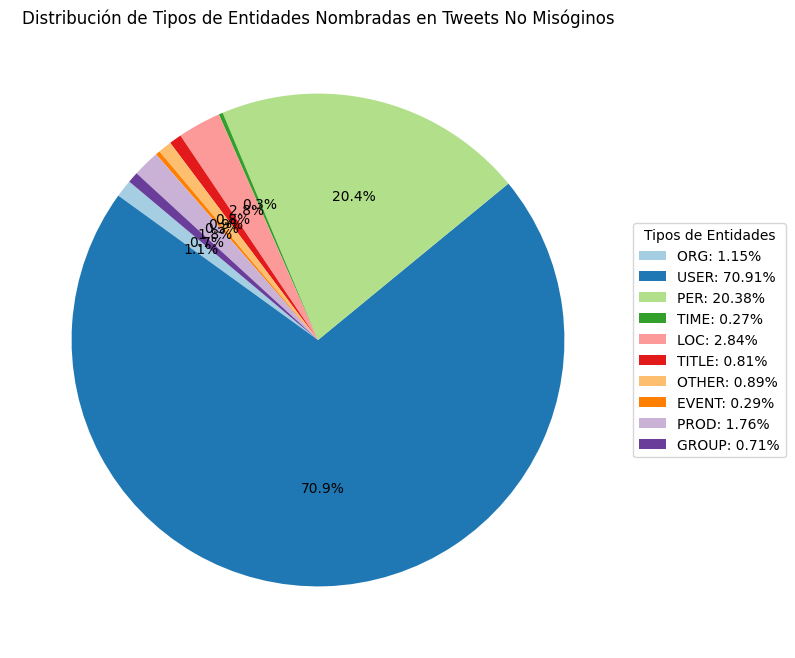

In [151]:
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(overall_entity_type_percentages_not_misogynous.values(), startangle=140, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
ax.set_title("Distribución de Tipos de Entidades Nombradas en Tweets No Misóginos")
legend_labels = [f"{ent_type}: {percentage:.2f}%" for ent_type, percentage in overall_entity_type_percentages_not_misogynous.items()]
ax.legend(wedges, legend_labels, title="Tipos de Entidades", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [151]:
import numpy as np

all_pos_tags = list(set(overall_entity_type_percentages_not_misogynous.keys()).union(set(overall_entity_type_percentages_misogynous.keys())))

not_misogynous_percentages = [overall_entity_type_percentages_not_misogynous.get(tag, 0) for tag in all_pos_tags]
misogynous_percentages = [overall_entity_type_percentages_misogynous.get(tag, 0) for tag in all_pos_tags]

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(all_pos_tags))

bar1 = ax.bar(index - bar_width/2, not_misogynous_percentages, bar_width, label='Not misogynous', color='lightblue')
bar2 = ax.bar(index + bar_width/2, misogynous_percentages, bar_width, label='Misogynous', color='salmon')

for i, v in enumerate(not_misogynous_percentages):
  ax.text(index[i] - bar_width/2, v + 1, f'{v:.1f}', ha='center', fontsize=11, color='black')
for i, v in enumerate(misogynous_percentages):
  ax.text(index[i] + bar_width/2, v + 1, f'{v:.1f}', ha='center', fontsize=11, color='black')

ax.set_xlabel('Entity Types', fontsize=18)
ax.set_ylabel('Percentage (%)', fontsize=18)
ax.set_title('Comparison of Named Entity Type Percentages (Misogynous vs Not misogynous)', fontsize=18)
ax.set_xticks(index)
ax.set_xticklabels(all_pos_tags, rotation=45, ha='right', fontsize=15)
ax.legend(fontsize=15)

plt.tight_layout()
plt.show()